## Les Données Disponibles 
- Numéro de la commande
- Etat de la commande
- Date et heure de la commande
- Nom prénom
- Adresse de livraison
- Jour de livraison
- Prix de la livraison (1300F)
- Valeur de la commande


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [ ]:
# On monte le drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# On importe le dataset
sales_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/e_commerce project/orders.csv', encoding="unicode_escape", sep= ";",error_bad_lines=False)
sales_df

Numéro de commande  ... Montant total de la commande
0                 28320  ...                        62500
1                 28260  ...                        23000
2                 28239  ...                         8550
3                 27717  ...                        21150
4                 26988  ...                        13750
..                  ...  ...                          ...
244                9564  ...                        55100
245                9556  ...                        22250
246                9451  ...                        23800
247                9435  ...                        21850
248                9378  ...                        25600

[249 rows x 12 columns]

In [ ]:
# Regardons les types de donnée
sales_df.dtypes

Numéro de commande                   int64
État de la commande                 object
Date de commande                    object
Prénom (Facturation)                object
Nom de famille (Facturation)        object
Adresse 1 & 2 (Facturation)         object
Ville (Facturation)                 object
Adresse 1 & 2 (Livraison)           object
Ville (Livraison)                   object
Titre de la méthode de livraison    object
Montant de la livraison              int64
Montant total de la commande         int64
dtype: object

In [ ]:
# Convertir la date de la commande en format Datetime
sales_df['Date de commande'] = pd.to_datetime(sales_df['Date de commande'])
sales_df.dtypes

Numéro de commande                           int64
État de la commande                         object
Date de commande                    datetime64[ns]
Prénom (Facturation)                        object
Nom de famille (Facturation)                object
Adresse 1 & 2 (Facturation)                 object
Ville (Facturation)                         object
Adresse 1 & 2 (Livraison)                   object
Ville (Livraison)                           object
Titre de la méthode de livraison            object
Montant de la livraison                      int64
Montant total de la commande                 int64
Mois                                         int64
Année                                        int64
Jour                                         int64
dtype: object

In [ ]:
# Vérifier s'il y-a les valeurs nulles
sales_df.info()

# Vérifier le nombre de valeurs nulles 
sales_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Numéro de commande                249 non-null    int64         
 1   État de la commande               249 non-null    object        
 2   Date de commande                  249 non-null    datetime64[ns]
 3   Prénom (Facturation)              249 non-null    object        
 4   Nom de famille (Facturation)      249 non-null    object        
 5   Adresse 1 & 2 (Facturation)       249 non-null    object        
 6   Ville (Facturation)               235 non-null    object        
 7   Adresse 1 & 2 (Livraison)         249 non-null    object        
 8   Ville (Livraison)                 249 non-null    object        
 9   Titre de la méthode de livraison  249 non-null    object        
 10  Montant de la livraison           249 non-null    

Numéro de commande                   0
État de la commande                  0
Date de commande                     0
Prénom (Facturation)                 0
Nom de famille (Facturation)         0
Adresse 1 & 2 (Facturation)          0
Ville (Facturation)                 14
Adresse 1 & 2 (Livraison)            0
Ville (Livraison)                    0
Titre de la méthode de livraison     0
Montant de la livraison              0
Montant total de la commande         0
dtype: int64

In [ ]:
# Obtenir le nombre de valeurs uniques dans chaque colonne
sales_df.nunique()

Numéro de commande                  249
État de la commande                   4
Date de commande                    247
Prénom (Facturation)                 86
Nom de famille (Facturation)         77
Adresse 1 & 2 (Facturation)         115
Ville (Facturation)                  69
Adresse 1 & 2 (Livraison)           123
Ville (Livraison)                    46
Titre de la méthode de livraison      6
Montant de la livraison               1
Montant total de la commande        201
dtype: int64

In [ ]:
sales_df['Ville (Livraison)'].value_counts().index

Index(['Ouakam', 'Mermoz', 'Yoff', 'Cité Keur Gorgui', 'Liberté 6', 'Mamelles',
       'Ouest Foire', 'Fann hock', 'Plateau', 'Sicap Foire', 'Maristes',
       'Sacré cur 3', 'Dalifort', 'Almadies', 'Ngor', 'Fenêtre Mermoz',
       'Golf Sud', 'Point E', 'Ouest Foire Extension Vdn', 'Nord Foire',
       'Centre ville', 'Fann', 'Ouest Foire ', 'Keur massar', 'Sacré cur 1',
       'Sipres 2', 'Liberté 6 extension', 'Sicap Karack', 'Sacré Cur',
       'Liberté 5', 'Hlm grand medine', 'Sacré coeur 1', 'Cité avion',
       'Sacré cur 2', 'Nord foire', 'Gibraltar 1', 'Fann résidence',
       'Gibraltar 2', 'Sacré coeur 3', 'Scat urbam', 'Fann Hock', 'Liberté 2',
       'Cambéréne', 'Sicap amitié 2', 'Sud Foire', 'Mbao'],
      dtype='object')

In [ ]:
sales_df['Titre de la méthode de livraison'].value_counts().index

Index(['Livraison le Mardi', 'Livraison le Jeudi', 'Livraison le Samedi',
       'Livraison le Mercredi', 'Livraison le Vendredi', 'Expédition'],
      dtype='object')

In [ ]:
sales_df['Ville (Livraison)'].value_counts()

Ouakam                       42
Mermoz                       26
Yoff                         16
Cité Keur Gorgui             15
Liberté 6                    13
Mamelles                     12
Ouest Foire                  11
Fann hock                    11
Plateau                      10
Sicap Foire                   9
Maristes                      8
Sacré cur 3                  8
Dalifort                      6
Almadies                      6
Ngor                          5
Fenêtre Mermoz                4
Golf Sud                      4
Point E                       4
Ouest Foire Extension Vdn     3
Nord Foire                    3
Centre ville                  3
Fann                          2
Ouest Foire                   2
Keur massar                   2
Sacré cur 1                  2
Sipres 2                      2
Liberté 6 extension           1
Sicap Karack                  1
Sacré Cur                    1
Liberté 5                     1
Hlm grand medine              1
Sacré co

In [ ]:
sales_df['Titre de la méthode de livraison'].value_counts()

Livraison le Mardi       114
Livraison le Jeudi        53
Livraison le Samedi       49
Livraison le Mercredi     22
Livraison le Vendredi     10
Expédition                 1
Name: Titre de la méthode de livraison, dtype: int64

In [ ]:
# On crée une fonction pour visualiser le comptage des articles dans la colonne donnée.
# On note que Plotly est une bibliothèque graphique Python qui permet de réaliser des graphiques interactifs de qualité. 
# Voir: https://plotly.com/python/
# Note: px (plotly_express) est une enveloppe de haut niveau autour de Plotly pour l'exploration rapide des données et la génération de figures
# Voir: https://plotly.github.io/plotly_express

def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = sales_df[x].value_counts().index, y = sales_df[x].value_counts(), color = sales_df[x].value_counts().index, height = 600)
  fig.show()

In [ ]:
# On invoque la fonction précédente 'Ville (Livraison)'
barplot_visualization('Ville (Livraison)')

In [ ]:
barplot_visualization('Titre de la méthode de livraison')

In [ ]:
barplot_visualization('État de la commande')

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Numéro de commande                249 non-null    int64         
 1   État de la commande               249 non-null    object        
 2   Date de commande                  249 non-null    datetime64[ns]
 3   Prénom (Facturation)              249 non-null    object        
 4   Nom de famille (Facturation)      249 non-null    object        
 5   Adresse 1 & 2 (Facturation)       249 non-null    object        
 6   Ville (Facturation)               235 non-null    object        
 7   Adresse 1 & 2 (Livraison)         249 non-null    object        
 8   Ville (Livraison)                 249 non-null    object        
 9   Titre de la méthode de livraison  249 non-null    object        
 10  Montant de la livraison           249 non-null    

In [ ]:
# On supprime les variables inutiles 
sales_df.drop(columns= ['Adresse 1 & 2 (Facturation)', 'Ville (Facturation)', 'Adresse 1 & 2 (Facturation)', 'Montant de la livraison'], inplace = True)
sales_df

In [ ]:
sales_df.drop(columns= ['Adresse 1 & 2 (Livraison)'], inplace=True)
sales_df

Numéro de commande  ... Montant total de la commande
0                 28320  ...                        62500
1                 28260  ...                        23000
2                 28239  ...                         8550
3                 27717  ...                        21150
4                 26988  ...                        13750
..                  ...  ...                          ...
244                9564  ...                        55100
245                9556  ...                        22250
246                9451  ...                        23800
247                9435  ...                        21850
248                9378  ...                        25600

[249 rows x 8 columns]

In [ ]:
# Avoir le nom complet des clients
sales_df["Clients"] = sales_df["Prénom (Facturation)"] +" "+ sales_df["Nom de famille (Facturation)"]
sales_df

Numéro de commande  ...                        Clients
0                 28320  ...              Ndeye Filly Gueye
1                 28260  ...                      Mimi Kane
2                 28239  ...                     Rose Sende
3                 27717  ...                     Nancy Mass
4                 26988  ...               Ndeye Fatou Kane
..                  ...  ...                            ...
244                9564  ...                    Fatou Diouf
245                9556  ...                  NIHMATOU NDAO
246                9451  ...  Sokhna Sophie Isabelle Ndiaye
247                9435  ...                  Mathilde SARR
248                9378  ...        Fatou Sady Ndiaye DIENG

[249 rows x 9 columns]

In [ ]:
sales_df.drop(columns= ['Prénom (Facturation)', 'Nom de famille (Facturation)', 'État de la commande'], inplace=True)
sales_df

Numéro de commande  ...                        Clients
0                 28320  ...              Ndeye Filly Gueye
1                 28260  ...                      Mimi Kane
2                 28239  ...                     Rose Sende
3                 27717  ...                     Nancy Mass
4                 26988  ...               Ndeye Fatou Kane
..                  ...  ...                            ...
244                9564  ...                    Fatou Diouf
245                9556  ...                  NIHMATOU NDAO
246                9451  ...  Sokhna Sophie Isabelle Ndiaye
247                9435  ...                  Mathilde SARR
248                9378  ...        Fatou Sady Ndiaye DIENG

[249 rows x 6 columns]

In [ ]:
sales_df.drop(columns= ['Numéro de commande'], inplace=True)
sales_df

Date de commande  ...                        Clients
0   2021-08-03 10:26:00  ...              Ndeye Filly Gueye
1   2021-07-03 11:42:00  ...                      Mimi Kane
2   2021-07-03 05:07:00  ...                     Rose Sende
3   2021-02-27 00:01:00  ...                     Nancy Mass
4   2021-02-15 14:59:00  ...               Ndeye Fatou Kane
..                  ...  ...                            ...
244 2020-03-06 14:56:00  ...                    Fatou Diouf
245 2020-03-06 13:00:00  ...                  NIHMATOU NDAO
246 2020-02-06 02:14:00  ...  Sokhna Sophie Isabelle Ndiaye
247 2020-01-06 21:26:00  ...                  Mathilde SARR
248 2020-01-06 01:40:00  ...        Fatou Sady Ndiaye DIENG

[249 rows x 5 columns]

In [ ]:
# On va ajouter les colonnes "Mois" et "Année"
sales_df['Mois'] = pd.DatetimeIndex(sales_df['Date de commande']).month
sales_df['Année'] = pd.DatetimeIndex(sales_df['Date de commande']).year
sales_df['Jour'] = pd.DatetimeIndex(sales_df['Date de commande']).day
sales_df['Heure'] = sales_df['Date de commande'].dt.time
sales_df

Numéro de commande État de la commande  ... Jour     Heure
0                 28320    Attente paiement  ...    3  10:26:00
1                 28260            En cours  ...    3  11:42:00
2                 28239            En cours  ...    3  05:07:00
3                 27717            En cours  ...   27  00:01:00
4                 26988            En cours  ...   15  14:59:00
..                  ...                 ...  ...  ...       ...
244                9564            Terminée  ...    6  14:56:00
245                9556            Terminée  ...    6  13:00:00
246                9451            Terminée  ...    6  02:14:00
247                9435            Terminée  ...    6  21:26:00
248                9378            Terminée  ...    6  01:40:00

[249 rows x 16 columns]

In [ ]:
# On crée une fonction qui va remplacer les variables catégorielles en variables "dummies"

def dummies(x):
  dummy = pd.get_dummies(sales_df[x])
  sales_df.drop(columns = x , inplace = True)
  return pd.concat([sales_df, dummy], axis = 1)

In [ ]:
sales_df = dummies('Titre de la méthode de livraison')
sales_df

Date de commande  ... Livraison le Vendredi
0   2021-08-03 10:26:00  ...                     0
1   2021-07-03 11:42:00  ...                     0
2   2021-07-03 05:07:00  ...                     0
3   2021-02-27 00:01:00  ...                     0
4   2021-02-15 14:59:00  ...                     0
..                  ...  ...                   ...
244 2020-03-06 14:56:00  ...                     0
245 2020-03-06 13:00:00  ...                     0
246 2020-02-06 02:14:00  ...                     0
247 2020-01-06 21:26:00  ...                     0
248 2020-01-06 01:40:00  ...                     0

[249 rows x 14 columns]

In [ ]:
sales_df = dummies('Ville (Livraison)')
sales_df

Date de commande  Montant total de la commande  ... Sud Foire  Yoff
0   2021-08-03 10:26:00                         62500  ...         0     0
1   2021-07-03 11:42:00                         23000  ...         0     0
2   2021-07-03 05:07:00                          8550  ...         0     0
3   2021-02-27 00:01:00                         21150  ...         0     0
4   2021-02-15 14:59:00                         13750  ...         0     0
..                  ...                           ...  ...       ...   ...
244 2020-03-06 14:56:00                         55100  ...         0     0
245 2020-03-06 13:00:00                         22250  ...         0     0
246 2020-02-06 02:14:00                         23800  ...         0     0
247 2020-01-06 21:26:00                         21850  ...         0     0
248 2020-01-06 01:40:00                         25600  ...         0     0

[249 rows x 59 columns]

In [ ]:
# On extrait les noms des clients
clients = pd.Categorical(sales_df['Clients'])
y = pd.Categorical(sales_df['Clients']).codes
y

array([77, 62, 89, 71, 76, 59, 36, 85, 76, 20, 37, 71, 36, 36, 89, 41, 36,
       33, 25, 80, 76, 20,  4, 22, 63, 63, 13, 58, 71, 23, 40, 76, 76, 37,
       74, 80, 85, 85, 13, 71, 42, 22, 76,  4, 25,  4, 37, 75, 67, 33, 92,
       71, 31, 55, 27, 63, 82, 82, 29, 80, 13, 50, 22, 85,  2, 53, 59, 21,
       74, 64, 76, 79, 68, 63, 10, 70, 76, 18, 17, 91,  2, 46, 80, 85, 78,
       76, 13, 63, 71, 69, 56, 72, 37, 27,  4, 88, 75, 17, 21, 59, 96, 11,
        9, 49, 19, 54, 80, 18, 12, 63, 85, 17, 76, 71, 39,  3, 63, 71,  0,
       29, 34, 17, 68, 13, 76, 47, 88, 63, 23, 17, 74,  0, 80, 97,  1, 21,
       84, 37, 85, 85, 30, 44, 56, 16, 75, 63, 27, 37, 78, 25, 31, 85, 53,
       37, 76, 83, 46, 18, 23, 80, 73, 42, 94, 80, 18, 88, 76, 85, 80, 13,
       63, 57,  1,  7, 59, 52, 74, 17, 78, 22, 51, 76, 90, 23, 60, 97, 27,
        8, 55, 55, 76, 95, 36, 85, 37, 31, 36, 87, 80, 18, 97, 29, 28, 23,
       46, 76, 13, 35, 15, 30, 85, 17, 63, 26,  4, 27, 61,  8, 59, 53, 17,
       97, 81, 37, 45,  5

In [ ]:
# On encode le nom des clients 
sales_df['Clients'] = pd.Categorical(sales_df['Clients']).codes
sales_df

Date de commande  Montant total de la commande  ...  Sud Foire  Yoff
0   2021-08-03 10:26:00                         62500  ...          0     0
1   2021-07-03 11:42:00                         23000  ...          0     0
2   2021-07-03 05:07:00                          8550  ...          0     0
3   2021-02-27 00:01:00                         21150  ...          0     0
4   2021-02-15 14:59:00                         13750  ...          0     0
..                  ...                           ...  ...        ...   ...
244 2020-03-06 14:56:00                         55100  ...          0     0
245 2020-03-06 13:00:00                         22250  ...          0     0
246 2020-02-06 02:14:00                         23800  ...          0     0
247 2020-01-06 21:26:00                         21850  ...          0     0
248 2020-01-06 01:40:00                         25600  ...          0     0

[249 rows x 59 columns]

In [ ]:
# Maintenant on groupe le dataset en fonction du temps
sales_df_group = sales_df.groupby(by = "Date de commande").sum()
sales_df_group

Numéro de commande  ...  Montant total de la commande
Date de commande                      ...                              
01/02/2021 15:40               26081  ...                         23800
01/06/2020 01:40                9378  ...                         25600
01/06/2020 21:26                9435  ...                         21850
01/07/2020 11:25               11518  ...                         10450
01/07/2020 13:06               11524  ...                         20350
...                              ...  ...                           ...
30/06/2020 15:41               11453  ...                          9350
30/08/2020 09:05               15650  ...                         14500
30/08/2020 12:47               15664  ...                         14900
31/08/2020 15:42               15744  ...                        182000
31/08/2020 15:58               15747  ...                         21800

[247 rows x 3 columns]

In [ ]:
# On fait la représentation graphique des ventes
fig = px.line(x = sales_df_group.index, y = sales_df_group['Montant total de la commande'], title = 'Les Ventes')
fig.show()

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 4.9MB/s 


In [ ]:
import chart_studio

In [ ]:
username = 'taphadiop' # your username
api_key = 'r6FdlVwB6R28r9hLkqU8' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [ ]:
# On va pusher les graphiques dans mon compte Plotly
import chart_studio.plotly as py
chart_ventes_url = py.plot(fig, filename = 'les_ventes', auto_open=True)
chart_ventes_url

'https://plotly.com/~taphadiop/3/'

In [ ]:
# Maintenant on peut supprimer la variable qui contient la date de la commande et conserver le reste
sales_df.drop("Date de commande", axis = 1, inplace = True)
sales_df

Montant total de la commande  Clients  Mois  ...  Sipres 2  Sud Foire Yoff
0                           62500       77     8  ...         0          0    0
1                           23000       62     7  ...         0          0    0
2                            8550       89     7  ...         0          0    0
3                           21150       71     2  ...         0          0    0
4                           13750       76     2  ...         0          0    0
..                            ...      ...   ...  ...       ...        ...  ...
244                         55100       27     3  ...         0          0    0
245                         22250       66     3  ...         0          0    0
246                         23800       93     2  ...         0          0    0
247                         21850       60     1  ...         0          0    0
248                         25600       29     1  ...         0          0    0

[249 rows x 58 columns]

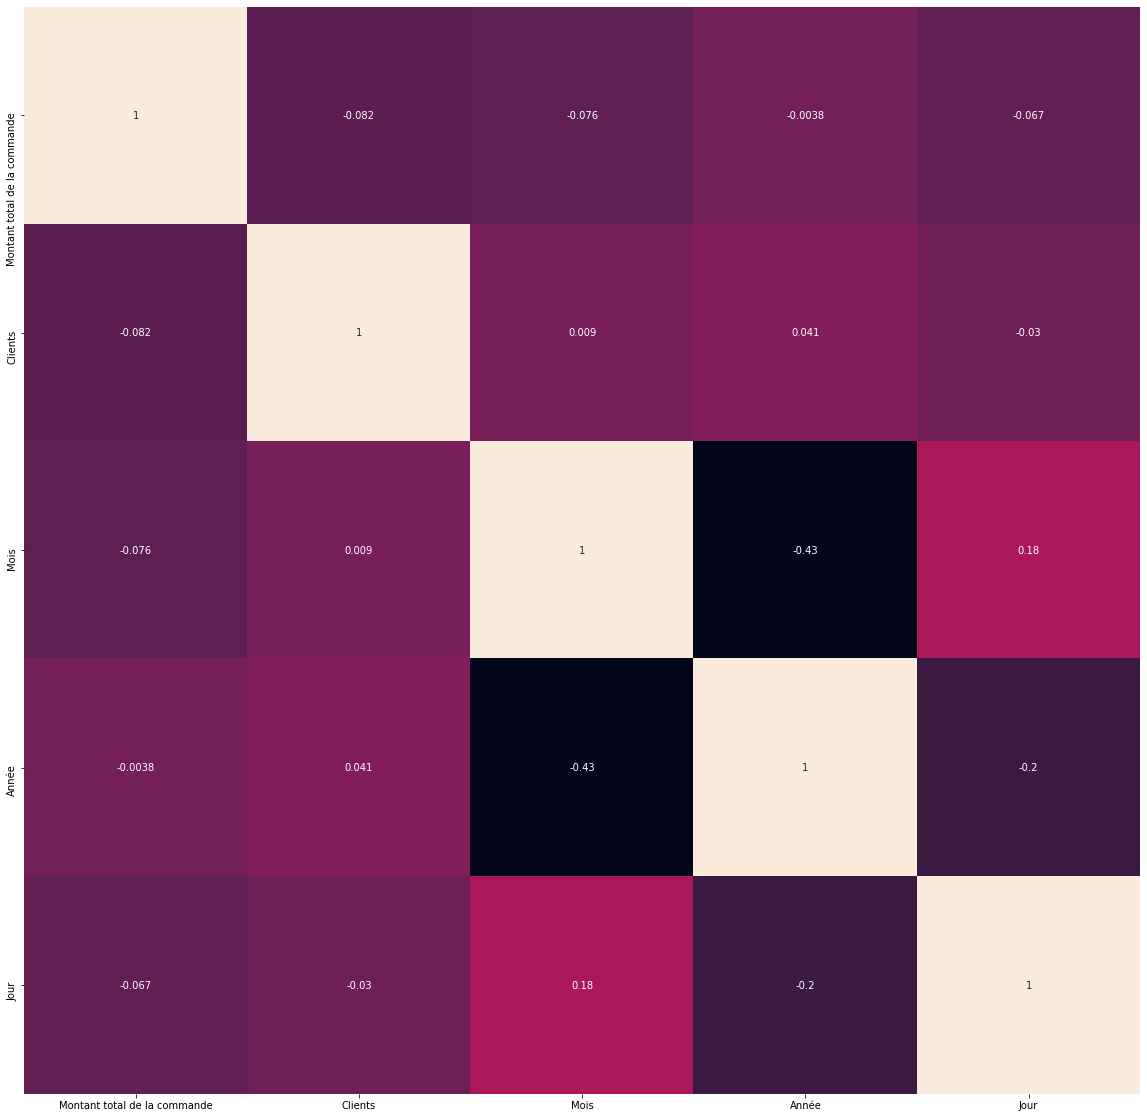

In [ ]:
# Maintenant on va représenter la matrice de correlation
plt.figure(figsize = (20, 20))
corr_matrix = sales_df.iloc[:, :6].corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)

In [ ]:
# On représente les "distplots"
# Distplot montre (1) histogram, (2) kde plot and (3) rug plot.
# (1) Histogram: il s'agit d'une représentation graphique des données à l'aide de barres de différentes hauteurs. Chaque barre regroupe des nombres en fourchettes et les barres plus hautes indiquent que davantage de données se trouvent dans cette fourchette.
# (2) Kde Plot: Le "Kernel Density Estimate" est utilisé pour visualiser la densité de probabilité d'une variable continue.
# (3) Rug plot: un diagramme de données pour une variable quantitative unique, affiché sous forme de marques le long d'un axe (diagramme de dispersion unidimensionnel). 

import plotly.figure_factory as ff

plt.figure(figsize = (10, 10))

for i in range(5):
  fig = ff.create_distplot([sales_df[sales_df.columns[i]].apply(lambda x: float(x))], ['distplot'])
  fig.update_layout(title_text = sales_df.columns[i])
  fig.show()


<Figure size 720x720 with 0 Axes>

In [ ]:
# On visualise les relations entre les variables avec les "pairplots"
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(sales_df,
    dimensions = sales_df.columns[:6], color = 'Mois')

fig.update_layout(
    title = 'Les données de ventes',
    width = 1100,
    height = 1100,
)
fig.show()

<Figure size 1080x1080 with 0 Axes>

## Mise en Place du Réseau de Neurones et Entrainement du modèle

In [ ]:
#sales_df['Montant total de la commande'].apply(lambda x: np.float64(x))
sales_heure = sales_df['Heure']
sales_df.drop(columns= ['Heure'], inplace=True)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Montant total de la commande  249 non-null    float64
 1   Clients                       249 non-null    int8   
 2   Mois                          249 non-null    int64  
 3   Année                         249 non-null    int64  
 4   Jour                          249 non-null    int64  
 5   Expédition                    249 non-null    uint8  
 6   Livraison le Jeudi            249 non-null    uint8  
 7   Livraison le Mardi            249 non-null    uint8  
 8   Livraison le Mercredi         249 non-null    uint8  
 9   Livraison le Samedi           249 non-null    uint8  
 10  Livraison le Vendredi         249 non-null    uint8  
 11  Almadies                      249 non-null    uint8  
 12  Cambéréne                     249 non-null    uint8  
 13  Centr

In [ ]:
# from keras.optimizers import SGD

input_df = Input(shape = (57,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(57, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - used for dimensionality reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
autoencoder.fit(sales_df, sales_df, batch_size = 128, epochs = 500, verbose = 1)

Epoch 1/500
2/2 [==============================] - 1s 59ms/step - loss: 15432429.3333
Epoch 2/500
2/2 [==============================] - 0s 57ms/step - loss: 5668314.6667
Epoch 3/500
2/2 [==============================] - 0s 61ms/step - loss: 3915244.6667
Epoch 4/500
2/2 [==============================] - 0s 56ms/step - loss: 498780.1979
Epoch 5/500
2/2 [==============================] - 0s 56ms/step - loss: 3112528.0000
Epoch 6/500
2/2 [==============================] - 0s 54ms/step - loss: 3349674.6667
Epoch 7/500
2/2 [==============================] - 0s 54ms/step - loss: 2016526.5000
Epoch 8/500
2/2 [==============================] - 0s 53ms/step - loss: 716443.3542
Epoch 9/500
2/2 [==============================] - 0s 56ms/step - loss: 1375437.9167
Epoch 10/500
2/2 [==============================] - 0s 54ms/step - loss: 454708.7917
Epoch 11/500
2/2 [==============================] - 0s 61ms/step - loss: 588432.8958
Epoch 12/500
2/2 [==============================] - 0s 52ms/step -

In [ ]:
# On enregistre les poids du modèle 
autoencoder.save_weights('autoencoder_sylla.h5')

In [ ]:
# On normalise les données en supprimant la moyenne et en divisant par la variance
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [ ]:
sales_df_scaled.shape

(249, 57)

In [ ]:
# Maintenant on prédit sur les données normalisées
pred = encoder.predict(sales_df_scaled)

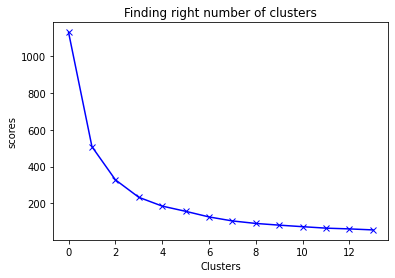

In [ ]:
# Méthode Elbow pour déterminer les centroïds
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [ ]:
# On détermine les centroïdes ou les clients typiques
kmeans = KMeans(2)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(sales_df_scaled)

In [ ]:
# On insére les cluster de chaque client
df_cluster_dr = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr

Montant total de la commande  Clients  Mois  ...  Sud Foire  Yoff  cluster
0                         62500.0       77     8  ...          0     0        1
1                         23000.0       62     7  ...          0     0        0
2                          8550.0       89     7  ...          0     0        1
3                         21150.0       71     2  ...          0     0        0
4                         13750.0       76     2  ...          0     0        0
..                            ...      ...   ...  ...        ...   ...      ...
244                       55100.0       27     3  ...          0     0        0
245                       22250.0       66     3  ...          0     0        1
246                       23800.0       93     2  ...          0     0        0
247                       21850.0       60     1  ...          0     0        0
248                       25600.0       29     1  ...          0     0        0

[249 rows x 58 columns]

In [ ]:
# Les clusters
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers

Montant total de la commande   Clients  ... Sud Foire      Yoff
0                     4.699977 -0.958822  ... -0.063500 -0.262049
1                    -0.116049  0.023675  ...  0.001568  0.006470

[2 rows x 57 columns]

In [ ]:
# On effectuer une inversion pour retrouver les valeurs avant normalisation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

Montant total de la commande    Clients  ... Sud Foire      Yoff
0                116750.000000  23.000000  ...  0.000000  0.000000
1                 19283.168724  50.506173  ...  0.004115  0.065844

[2 rows x 57 columns]

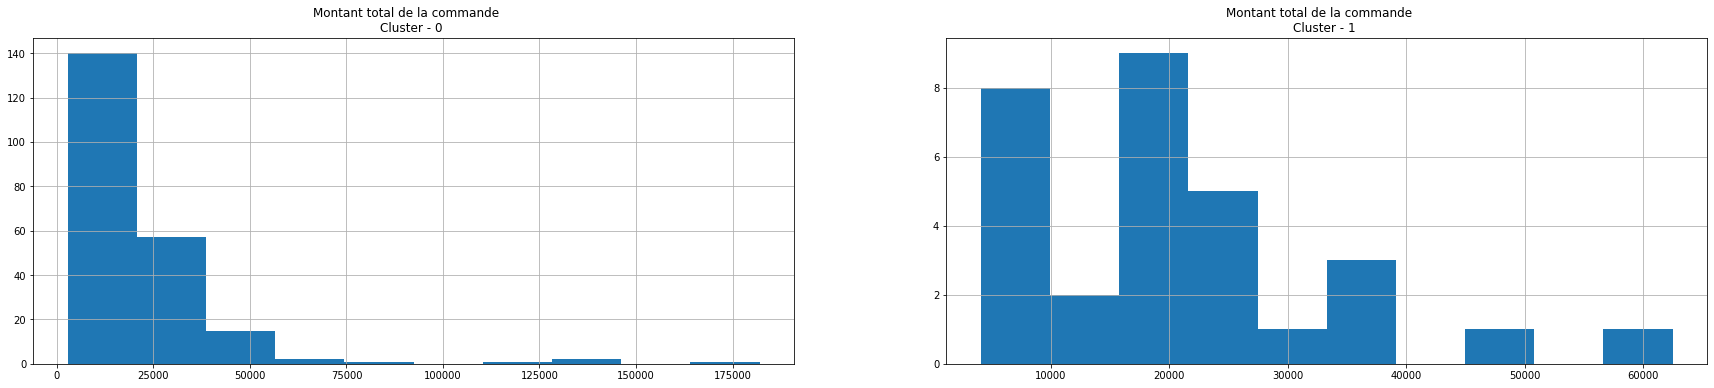

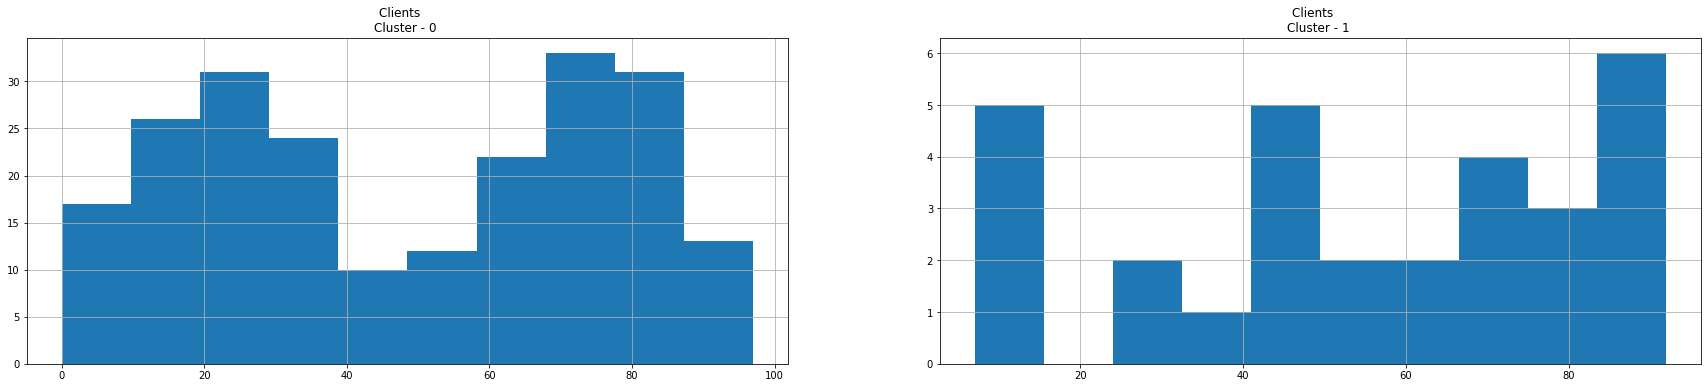

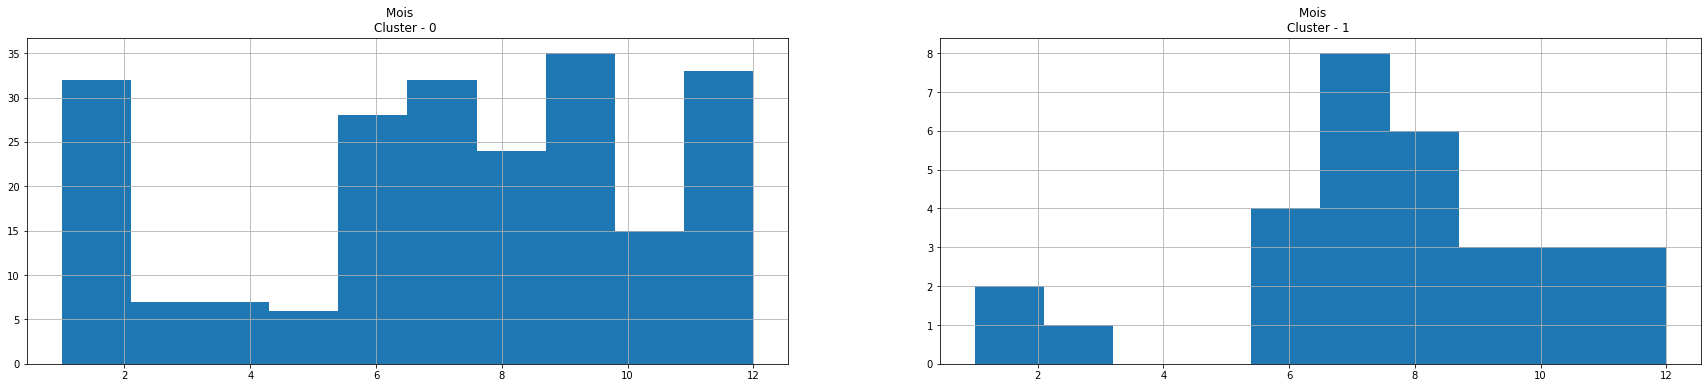

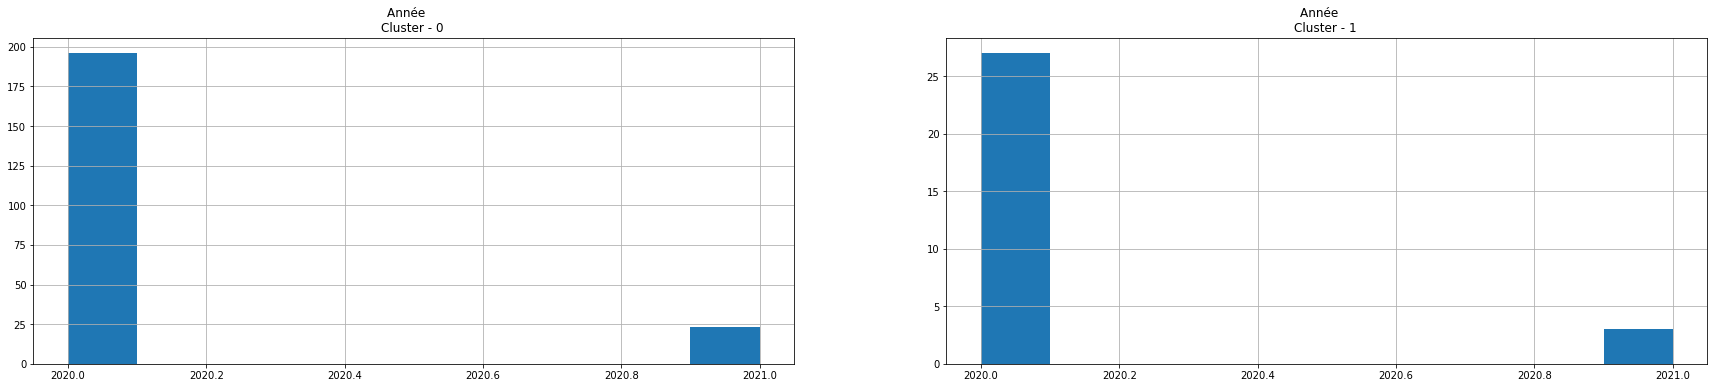

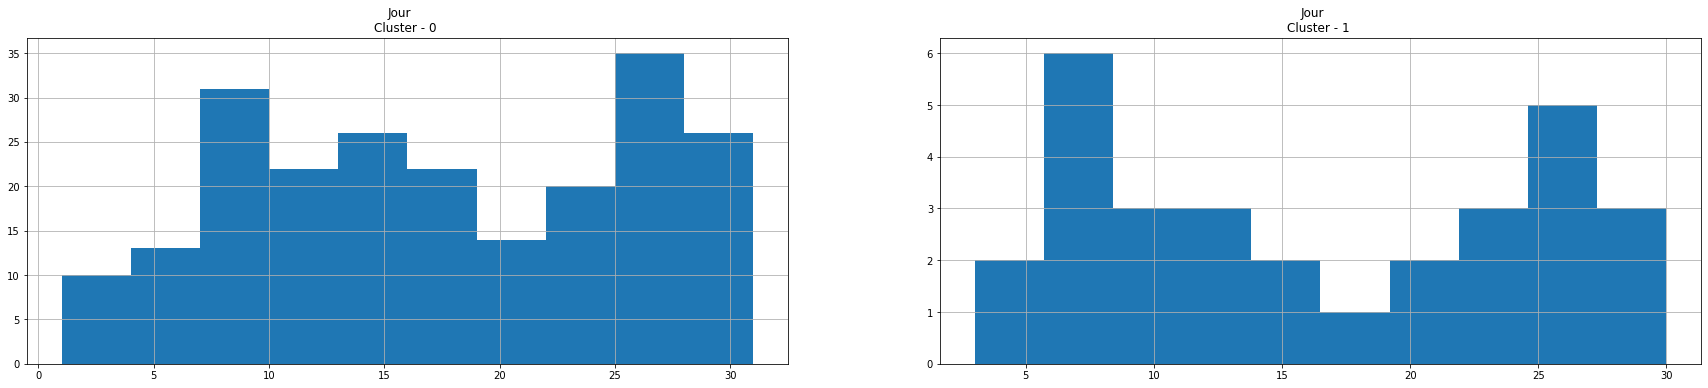

In [ ]:
# Représenter un histogramme pour chaque variable en fonction des clusters 
for i in sales_df.columns[:5]:
  plt.figure(figsize = (30, 6))
  for j in range(2):
    plt.subplot(1, 2, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()

In [ ]:
# Reduire les données originales sur 3 dimensions en utilisant le PCA pour visualiser les clusters
pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(sales_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

pca1      pca2      pca3
0  1.350329  5.685013  0.047868
1 -1.099880  2.659356  0.107547
2 -2.494739  4.690963  0.450172
3 -1.747094  1.787724  1.610341
4 -1.677873  2.786172  0.227959

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2      pca3  cluster
0  1.350329  5.685013  0.047868        1
1 -1.099880  2.659356  0.107547        0
2 -2.494739  4.690963  0.450172        1
3 -1.747094  1.787724  1.610341        0
4 -1.677873  2.786172  0.227959        0

In [ ]:
# Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'clients':clients})], axis = 1)
pca_df.head()

pca1      pca2      pca3  cluster            Clients            clients
0  1.350329  5.685013  0.047868        1  Ndeye Filly Gueye  Ndeye Filly Gueye
1 -1.099880  2.659356  0.107547        0          Mimi Kane          Mimi Kane
2 -2.494739  4.690963  0.450172        1         Rose Sende         Rose Sende
3 -1.747094  1.787724  1.610341        0         Nancy Mass         Nancy Mass
4 -1.677873  2.786172  0.227959        0   Ndeye Fatou Kane   Ndeye Fatou Kane

In [ ]:
# Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='clients', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

## NEW Process

In [ ]:
# On importe le dataset
new_sales_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/e_commerce project/orders.csv', encoding="unicode_escape", sep= ";",error_bad_lines=False)
new_sales_df

Numéro de commande  ... Montant total de la commande
0                 28320  ...                        62500
1                 28260  ...                        23000
2                 28239  ...                         8550
3                 27717  ...                        21150
4                 26988  ...                        13750
..                  ...  ...                          ...
244                9564  ...                        55100
245                9556  ...                        22250
246                9451  ...                        23800
247                9435  ...                        21850
248                9378  ...                        25600

[249 rows x 12 columns]

In [ ]:
# Convertir la date de la commande en format Datetime
new_sales_df['Date de commande'] = pd.to_datetime(new_sales_df['Date de commande'])
new_sales_df.dtypes

Numéro de commande                           int64
État de la commande                         object
Date de commande                    datetime64[ns]
Prénom (Facturation)                        object
Nom de famille (Facturation)                object
Adresse 1 & 2 (Facturation)                 object
Ville (Facturation)                         object
Adresse 1 & 2 (Livraison)                   object
Ville (Livraison)                           object
Titre de la méthode de livraison            object
Montant de la livraison                      int64
Montant total de la commande                 int64
dtype: object

In [ ]:
# On supprime les variables inutiles 
new_sales_df.drop(columns= ['Adresse 1 & 2 (Facturation)', 'Ville (Facturation)', 'Adresse 1 & 2 (Livraison)', 'Montant de la livraison', 'État de la commande', 'Numéro de commande'], inplace = True)
new_sales_df

Date de commande  ... Montant total de la commande
0   2021-08-03 10:26:00  ...                        62500
1   2021-07-03 11:42:00  ...                        23000
2   2021-07-03 05:07:00  ...                         8550
3   2021-02-27 00:01:00  ...                        21150
4   2021-02-15 14:59:00  ...                        13750
..                  ...  ...                          ...
244 2020-03-06 14:56:00  ...                        55100
245 2020-03-06 13:00:00  ...                        22250
246 2020-02-06 02:14:00  ...                        23800
247 2020-01-06 21:26:00  ...                        21850
248 2020-01-06 01:40:00  ...                        25600

[249 rows x 6 columns]

In [ ]:
new_sales_df['Nbres Articles'] = 1

In [ ]:
new_sales_df['Ville (Livraison)'].value_counts().index

Index(['Ouakam', 'Mermoz', 'Yoff', 'Cité Keur Gorgui', 'Liberté 6', 'Mamelles',
       'Fann hock', 'Ouest Foire', 'Plateau', 'Sicap Foire', 'Maristes',
       'Sacré cur 3', 'Almadies', 'Dalifort', 'Ngor', 'Golf Sud',
       'Fenêtre Mermoz', 'Point E', 'Centre ville',
       'Ouest Foire Extension Vdn', 'Nord Foire', 'Sipres 2', 'Ouest Foire ',
       'Keur massar', 'Fann', 'Sacré cur 1', 'Mbao', 'Sicap Karack',
       'Liberté 5', 'Liberté 6 extension', 'Fann Hock', 'Cité avion',
       'Liberté 2', 'Gibraltar 2', 'Sacré coeur 3', 'Sacré cur 2',
       'Sacré Cur', 'Sud Foire', 'Nord foire', 'Cambéréne', 'Sacré coeur 1',
       'Scat urbam', 'Sicap amitié 2', 'Fann résidence', 'Gibraltar 1',
       'Hlm grand medine'],
      dtype='object')

In [ ]:
new_sales_df['Clients'] = new_sales_df['Prénom (Facturation)'] + " " + new_sales_df['Nom de famille (Facturation)']  
new_sales_df

Date de commande  ...                        Clients
0   2021-08-03 10:26:00  ...              Ndeye Filly Gueye
1   2021-07-03 11:42:00  ...                      Mimi Kane
2   2021-07-03 05:07:00  ...                     Rose Sende
3   2021-02-27 00:01:00  ...                     Nancy Mass
4   2021-02-15 14:59:00  ...               Ndeye Fatou Kane
..                  ...  ...                            ...
244 2020-03-06 14:56:00  ...                    Fatou Diouf
245 2020-03-06 13:00:00  ...                  NIHMATOU NDAO
246 2020-02-06 02:14:00  ...  Sokhna Sophie Isabelle Ndiaye
247 2020-01-06 21:26:00  ...                  Mathilde SARR
248 2020-01-06 01:40:00  ...        Fatou Sady Ndiaye DIENG

[249 rows x 8 columns]

In [ ]:
new_sales_df.drop(columns= ['Prénom (Facturation)', 'Nom de famille (Facturation)'], inplace=True)

In [ ]:
new_sales_df['Ville (Livraison)'].value_counts()

Ouakam                       42
Mermoz                       26
Yoff                         16
Cité Keur Gorgui             15
Liberté 6                    13
Mamelles                     12
Fann hock                    11
Ouest Foire                  11
Plateau                      10
Sicap Foire                   9
Maristes                      8
Sacré cur 3                  8
Almadies                      6
Dalifort                      6
Ngor                          5
Golf Sud                      4
Fenêtre Mermoz                4
Point E                       4
Centre ville                  3
Ouest Foire Extension Vdn     3
Nord Foire                    3
Sipres 2                      2
Ouest Foire                   2
Keur massar                   2
Fann                          2
Sacré cur 1                  2
Mbao                          1
Sicap Karack                  1
Liberté 5                     1
Liberté 6 extension           1
Fann Hock                     1
Cité avi

In [ ]:
new_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date de commande                  249 non-null    datetime64[ns]
 1   Ville (Livraison)                 249 non-null    object        
 2   Titre de la méthode de livraison  249 non-null    object        
 3   Montant total de la commande      249 non-null    int64         
 4   Clients                           249 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.9+ KB


In [ ]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].apply(remove_whitespace)

In [ ]:
new_sales_df['Ville (Livraison)'].value_counts()

Ouakam                    42
Mermoz                    26
Yoff                      16
CitéKeurGorgui            15
OuestFoire                13
Liberté6                  13
Mamelles                  12
Fannhock                  11
Plateau                   10
SicapFoire                 9
Maristes                   8
Sacrécur3                 8
Dalifort                   6
Almadies                   6
Ngor                       5
FenêtreMermoz              4
GolfSud                    4
PointE                     4
OuestFoireExtensionVdn     3
NordFoire                  3
Centreville                3
Sipres2                    2
Fann                       2
Sacrécur1                 2
Keurmassar                 2
Mbao                       1
Liberté5                   1
SicapKarack                1
Nordfoire                  1
Liberté6extension          1
Scaturbam                  1
Sacrécur2                 1
SudFoire                   1
Cambéréne                  1
Citéavion     

In [ ]:
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('CitéKeurGorgui', 'Cité Keur Gorgui')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('OuestFoireExtensionVdn', 'Ouest Foire')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('OuestFoire', 'Ouest Foire')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Liberté6', 'Liberté 6')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Fannhock', 'Fann')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('SicapFoire', 'Sicap Foire')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Sacrécur3', 'Sacré coeur 3')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('GolfSud', 'Golf Sud')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('FenêtreMermoz', 'Mermoz')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('PointE', 'Point E')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('NordFoire', 'Nord Foire')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Plateau', 'Centre ville - Plateau')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Centreville', 'Centre ville - Plateau')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Keurmassar', 'Keur massar')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Sacrécur1', 'Sacré coeur 1')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('SudFoire', 'Sud Foire')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('FannHock', 'Fann')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Sacrécur2', 'Sacré coeur 2')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('SacréCur', 'Sacré coeur 1')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Sacrécoeur3', 'Sacré coeur 3')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Citéavion', 'Ouakam')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Liberté5', 'Liberté 5')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Liberté6extension', 'Liberté 6')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Liberté6', 'Liberté 6')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Gibraltar1', 'Gibraltar')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Gibraltar2', 'Gibraltar')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Scaturbam', 'Scat urbam')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Nordfoire', 'Nord Foire')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Liberté2', 'Liberté 2')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Fannrésidence', 'Fann')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Sicapamitié2', 'Sicap Amitié 2')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('SicapKarack', 'Sicap Karack')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Sacrécoeur1', 'Sacré coeur 1')
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Hlmgrandmedine', 'Hlm grand medine')

In [ ]:
new_sales_df['Ville (Livraison)'].value_counts()

Ouakam                    43
Mermoz                    30
Yoff                      16
Ouest Foire               16
Cité Keur Gorgui          15
Fann                      15
Liberté 6                 13
Centre ville - Plateau    13
Mamelles                  12
Sicap Foire                9
Sacré coeur 3              9
Maristes                   8
Dalifort                   6
Almadies                   6
Ngor                       5
Nord Foire                 4
Sacré coeur 1              4
Point E                    4
Golf Sud                   4
Sipres2                    2
Gibraltar                  2
Keur massar                2
Sud Foire                  1
Sacré coeur 2              1
Mbao                       1
Cambéréne                  1
Scat urbam                 1
Liberté 2                  1
Sicap Amitié 2             1
Sicap Karack               1
Liberté 5                  1
Liberté 6extension         1
Hlm grand medine           1
Name: Ville (Livraison), dtype: int64

In [ ]:
new_sales_df['Ville (Livraison)'] = new_sales_df['Ville (Livraison)'].str.replace('Liberté 6extension', 'Liberté 6')
new_sales_df['Ville (Livraison)'].value_counts()

Ouakam                    43
Mermoz                    30
Ouest Foire               16
Yoff                      16
Fann                      15
Cité Keur Gorgui          15
Liberté 6                 14
Centre ville - Plateau    13
Mamelles                  12
Sicap Foire                9
Sacré coeur 3              9
Maristes                   8
Dalifort                   6
Almadies                   6
Ngor                       5
Nord Foire                 4
Sacré coeur 1              4
Point E                    4
Golf Sud                   4
Sipres2                    2
Gibraltar                  2
Keur massar                2
Sud Foire                  1
Liberté 5                  1
Sacré coeur 2              1
Mbao                       1
Scat urbam                 1
Liberté 2                  1
Sicap Karack               1
Cambéréne                  1
Sicap Amitié 2             1
Hlm grand medine           1
Name: Ville (Livraison), dtype: int64

In [ ]:
# Function to add dummy variables to replace categorical variables

def dummies(x):
  dummy = pd.get_dummies(new_sales_df[x])
  new_sales_df.drop(columns = x , inplace = True)
  return pd.concat([new_sales_df, dummy], axis = 1)

In [ ]:
new_sales_df = dummies('Ville (Livraison)')

In [ ]:
new_sales_df = dummies('Titre de la méthode de livraison')

In [ ]:
# On va ajouter les colonnes "Mois" et "Année"
new_sales_df['Mois'] = pd.DatetimeIndex(new_sales_df['Date de commande']).month
new_sales_df['Année'] = pd.DatetimeIndex(new_sales_df['Date de commande']).year
new_sales_df['Jour'] = pd.DatetimeIndex(new_sales_df['Date de commande']).day
new_sales_df.drop(columns=['Date de commande'], inplace=True)
new_sales_df

Montant total de la commande  Nbres Articles  ... Année  Jour
0                           62500               1  ...  2021     3
1                           23000               1  ...  2021     3
2                            8550               1  ...  2021     3
3                           21150               1  ...  2021    27
4                           13750               1  ...  2021    15
..                            ...             ...  ...   ...   ...
244                         55100               1  ...  2020     6
245                         22250               1  ...  2020     6
246                         23800               1  ...  2020     6
247                         21850               1  ...  2020     6
248                         25600               1  ...  2020     6

[249 rows x 44 columns]

In [ ]:
dict_mois = {'1': 'Janvier', '2': 'Février', '3': 'Mars', '4': 'Avril', '5': 'Mai', '6': 'Juin', '7': 'Juillet', '8': 'Août',
             '9': 'Septembre', '10': 'Octobre', '11': 'Novembre', '12': 'Décembre'}

new_sales_df['Mois'] = new_sales_df['Mois'].astype(str) 
new_sales_df['Mois'] = new_sales_df['Mois'].replace('1', dict_mois['1'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('2', dict_mois['2'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('3', dict_mois['3'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('4', dict_mois['4'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('5', dict_mois['5'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('6', dict_mois['6'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('7', dict_mois['7'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('8', dict_mois['8'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('9', dict_mois['9'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('10', dict_mois['10'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('11', dict_mois['11'])
new_sales_df['Mois'] = new_sales_df['Mois'].replace('12', dict_mois['12'])
new_sales_df

Montant total de la commande  Nbres Articles  ... Année  Jour
0                           62500               1  ...  2021     3
1                           23000               1  ...  2021     3
2                            8550               1  ...  2021     3
3                           21150               1  ...  2021    27
4                           13750               1  ...  2021    15
..                            ...             ...  ...   ...   ...
244                         55100               1  ...  2020     6
245                         22250               1  ...  2020     6
246                         23800               1  ...  2020     6
247                         21850               1  ...  2020     6
248                         25600               1  ...  2020     6

[249 rows x 44 columns]

In [ ]:
new_sales_df = dummies('Jour')
new_sales_df = dummies('Mois')
new_sales_df = dummies('Année')
new_sales_df

Montant total de la commande  Nbres Articles  ... 2020  2021
0                           62500               1  ...    0     1
1                           23000               1  ...    0     1
2                            8550               1  ...    0     1
3                           21150               1  ...    0     1
4                           13750               1  ...    0     1
..                            ...             ...  ...  ...   ...
244                         55100               1  ...    1     0
245                         22250               1  ...    1     0
246                         23800               1  ...    1     0
247                         21850               1  ...    1     0
248                         25600               1  ...    1     0

[249 rows x 84 columns]

In [ ]:
new_sales_df_group = new_sales_df.groupby(by = ["Clients"]).sum()
new_sales_df_group2 = new_sales_df.groupby(by = ["Clients"]).sum().reset_index()
new_sales_df_group

Montant total de la commande  ...  2021
Clients                                                      ...      
AISSATOU DIEYE KELLY                                  34950  ...     0
Adama Diagne DIEME                                    51550  ...     0
Adja Khadidiatou Faye                                 46700  ...     0
Aminata Diop                                          11650  ...     0
Aminata Kaloga                                        86935  ...     1
...                                                     ...  ...   ...
Sokhna Sophie Isabelle Ndiaye                         23800  ...     0
Wone Maguee                                            8050  ...     0
Yacine Ndour                                          25650  ...     0
Yasmin akhdar                                         13100  ...     0
Yasmina Akkouh                                        79850  ...     0

[98 rows x 83 columns]

In [ ]:
# Select the ones I want
ville = new_sales_df_group.iloc[:,2:34]
ville

Almadies  Cambéréne  ...  Sud Foire  Yoff
Clients                                             ...                 
AISSATOU DIEYE KELLY                  0          0  ...          0     0
Adama Diagne DIEME                    0          0  ...          0     0
Adja Khadidiatou Faye                 0          0  ...          0     0
Aminata Diop                          0          0  ...          0     1
Aminata Kaloga                        0          0  ...          0     0
...                                 ...        ...  ...        ...   ...
Sokhna Sophie Isabelle Ndiaye         0          0  ...          0     0
Wone Maguee                           0          0  ...          0     0
Yacine Ndour                          0          0  ...          0     0
Yasmin akhdar                         0          0  ...          0     0
Yasmina Akkouh                        0          0  ...          0     5

[98 rows x 32 columns]

In [ ]:
ville['Almadies'].sum()

6

In [ ]:
list_ville = list(ville.columns.values.tolist())
list_ville

['Almadies',
 'Cambéréne',
 'Centre ville - Plateau',
 'Cité Keur Gorgui',
 'Dalifort',
 'Fann',
 'Gibraltar',
 'Golf Sud',
 'Hlm grand medine',
 'Keur massar',
 'Liberté 2',
 'Liberté 5',
 'Liberté 6',
 'Mamelles',
 'Maristes',
 'Mbao',
 'Mermoz',
 'Ngor',
 'Nord Foire',
 'Ouakam',
 'Ouest Foire',
 'Point E',
 'Sacré coeur 1',
 'Sacré coeur 2',
 'Sacré coeur 3',
 'Scat urbam',
 'Sicap Amitié 2',
 'Sicap Foire',
 'Sicap Karack',
 'Sipres2',
 'Sud Foire',
 'Yoff']

In [ ]:
val_ville = []
# iterating the columns
for col in ville.columns:
    mt = ville[col].sum()
    val_ville.append(mt)

val_ville

[6,
 1,
 13,
 15,
 6,
 15,
 2,
 4,
 1,
 2,
 1,
 1,
 14,
 12,
 8,
 1,
 30,
 5,
 4,
 43,
 16,
 4,
 4,
 1,
 9,
 1,
 1,
 9,
 1,
 2,
 1,
 16]

In [ ]:
new_sales_df_group['Montant total de la commande'] = new_sales_df_group['Montant total de la commande'].apply(lambda x: float(x))

In [ ]:
new_sales_df_group.shape

(98, 83)

In [ ]:
# from keras.optimizers import SGD

input_df = Input(shape = (83,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(83, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - used for dimensionality reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
autoencoder.fit(new_sales_df_group, new_sales_df_group, batch_size = 128, epochs = 500, verbose = 1)

Epoch 1/500
1/1 [==============================] - 1s 535ms/step - loss: 131995896.0000
Epoch 2/500
1/1 [==============================] - 0s 43ms/step - loss: 130375168.0000
Epoch 3/500
1/1 [==============================] - 0s 38ms/step - loss: 116470208.0000
Epoch 4/500
1/1 [==============================] - 0s 39ms/step - loss: 89771720.0000
Epoch 5/500
1/1 [==============================] - 0s 39ms/step - loss: 51644232.0000
Epoch 6/500
1/1 [==============================] - 0s 40ms/step - loss: 19679716.0000
Epoch 7/500
1/1 [==============================] - 0s 41ms/step - loss: 36317680.0000
Epoch 8/500
1/1 [==============================] - 0s 49ms/step - loss: 17864106.0000
Epoch 9/500
1/1 [==============================] - 0s 43ms/step - loss: 2944586.5000
Epoch 10/500
1/1 [==============================] - 0s 49ms/step - loss: 5525863.0000
Epoch 11/500
1/1 [==============================] - 0s 40ms/step - loss: 12642449.0000
Epoch 12/500
1/1 [==============================] 

In [ ]:
# On enregistre les poids du modèle 
autoencoder.save_weights('new_autoencoder_sylla.h5')

In [ ]:
# On normalise les données en supprimant la moyenne et en divisant par la variance
scaler = StandardScaler()
new_sales_df_scaled = scaler.fit_transform(new_sales_df_group)

In [ ]:
# Maintenant on prédit sur les données normalisées
pred = encoder.predict(new_sales_df_scaled)

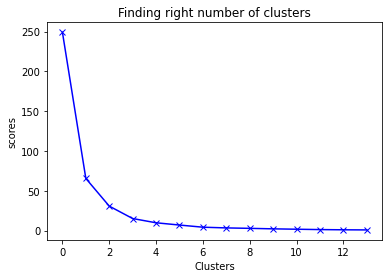

In [ ]:
# Méthode Elbow pour déterminer les centroïds
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [ ]:
# On détermine les centroïdes ou les clients typiques
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(new_sales_df_scaled)

In [ ]:
# On insére les cluster de chaque client
new_df_cluster_dr = pd.concat([new_sales_df_group2, pd.DataFrame({'cluster':labels})], axis = 1)
new_df_cluster_dr

Clients  Montant total de la commande  ...  2021  cluster
0            AISSATOU DIEYE KELLY                         34950  ...     0        1
1              Adama Diagne DIEME                         51550  ...     0        1
2           Adja Khadidiatou Faye                         46700  ...     0        1
3                    Aminata Diop                         11650  ...     0        1
4                  Aminata Kaloga                         86935  ...     1        0
..                            ...                           ...  ...   ...      ...
93  Sokhna Sophie Isabelle Ndiaye                         23800  ...     0        1
94                    Wone Maguee                          8050  ...     0        1
95                   Yacine Ndour                         25650  ...     0        1
96                  Yasmin akhdar                         13100  ...     0        1
97                 Yasmina Akkouh                         79850  ...     0        1

[98 rows x 85 columns]

In [ ]:
# Les clusters
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [new_sales_df_group.columns])
cluster_centers

Montant total de la commande Nbres Articles  ...      2020      2021
0                     2.225152       2.757699  ...  2.738715  1.451497
1                    -0.202961      -0.265243  ... -0.249373 -0.192327
2                     0.262305       1.545019  ...  0.284490  5.505160

[3 rows x 83 columns]

In [ ]:
# On effectuer une inversion pour retrouver les valeurs avant normalisation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [new_sales_df_group.columns])
cluster_centers

Montant total de la commande Nbres Articles  ...      2020      2021
0                252937.500000      10.500000  ...  9.250000  1.250000
1                 36904.606742       1.775281  ...  1.640449  0.134831
2                 78300.000000       7.000000  ...  3.000000  4.000000

[3 rows x 83 columns]

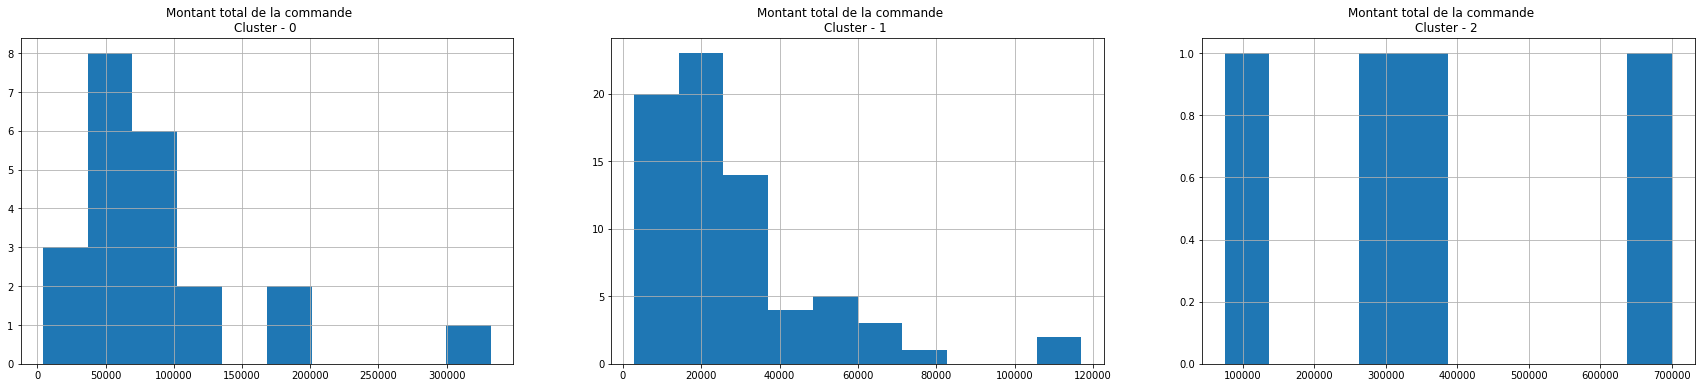

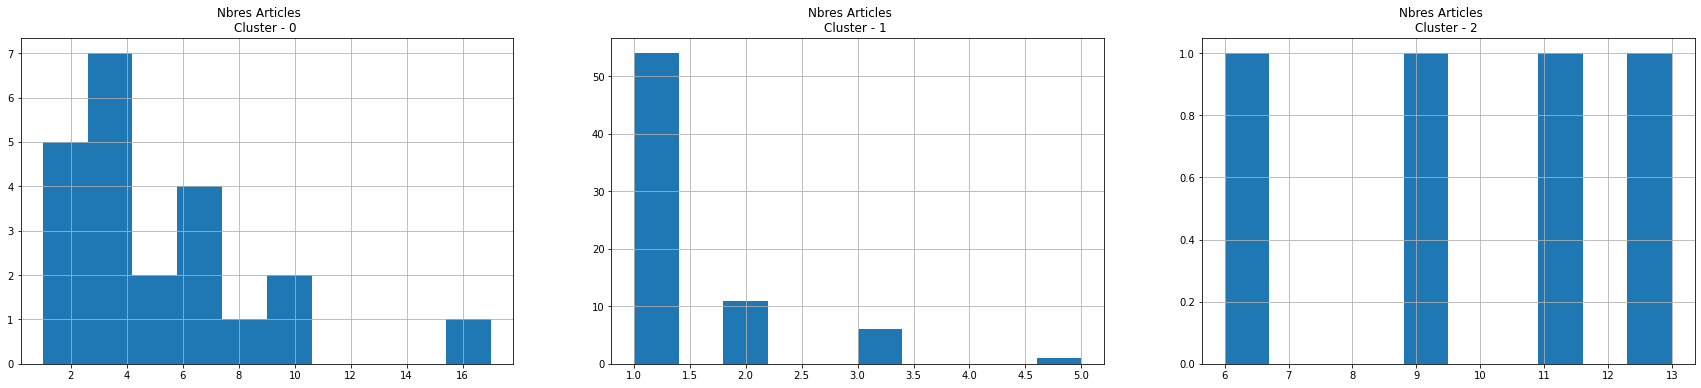

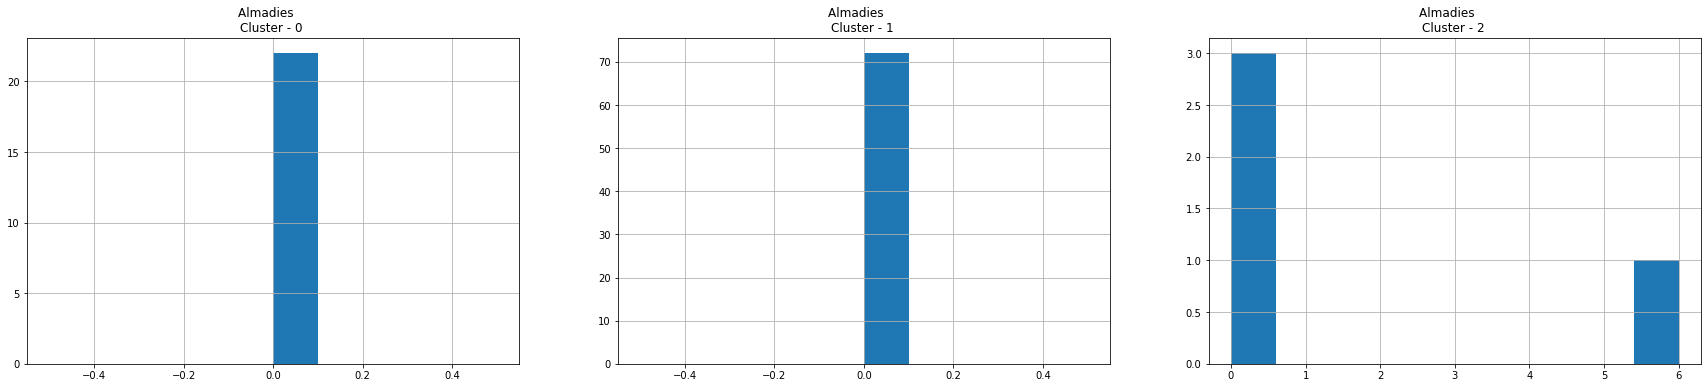

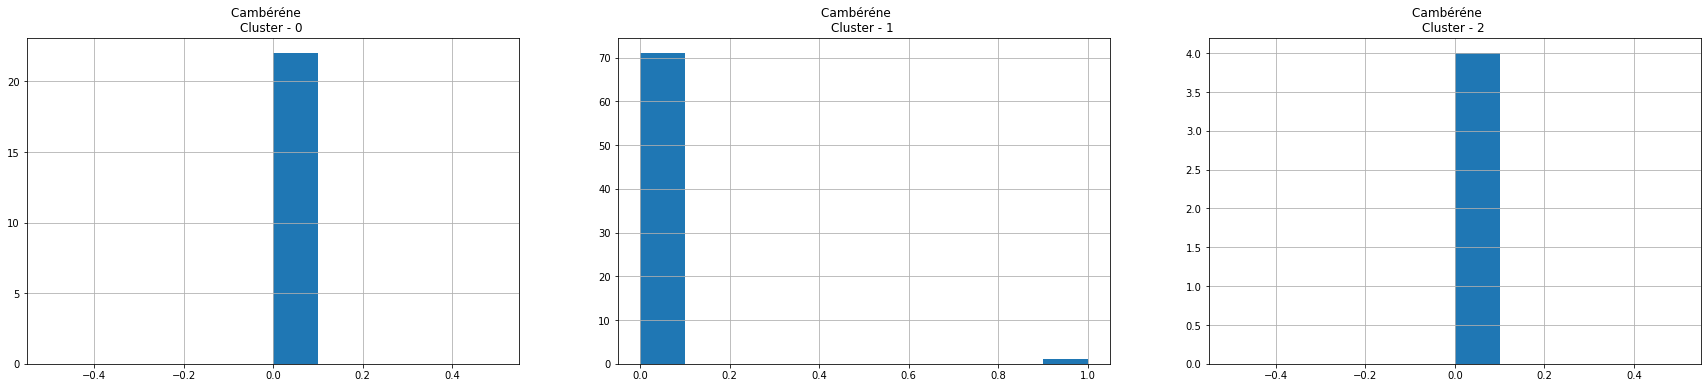

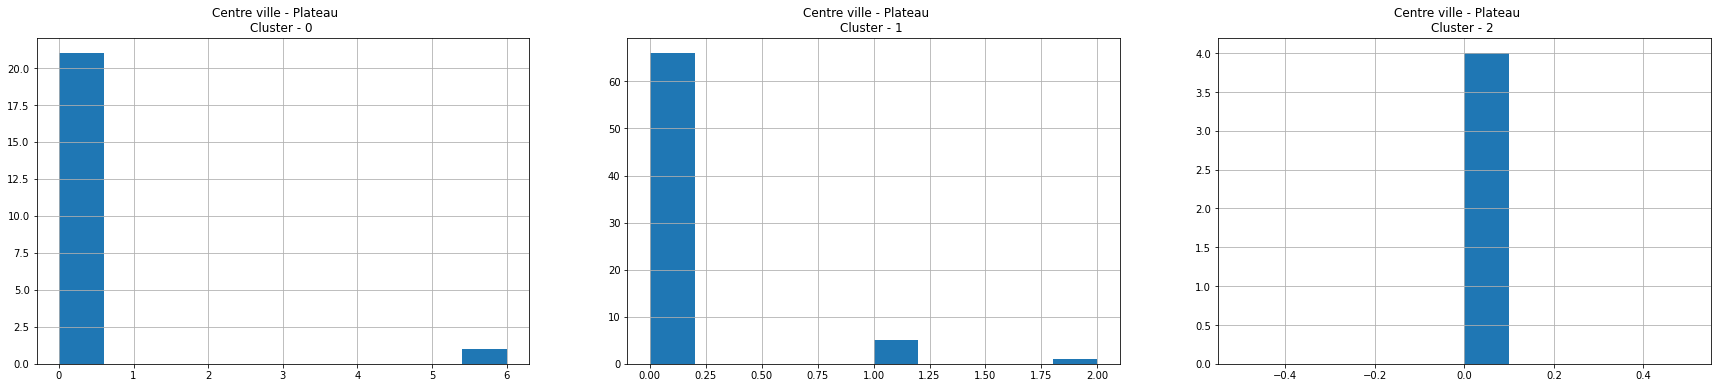

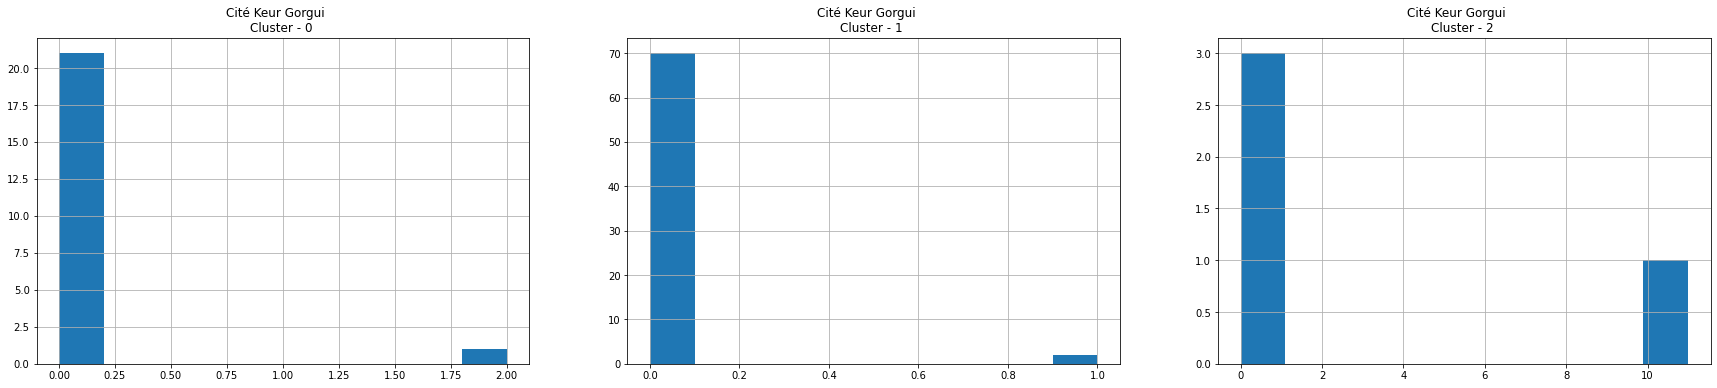

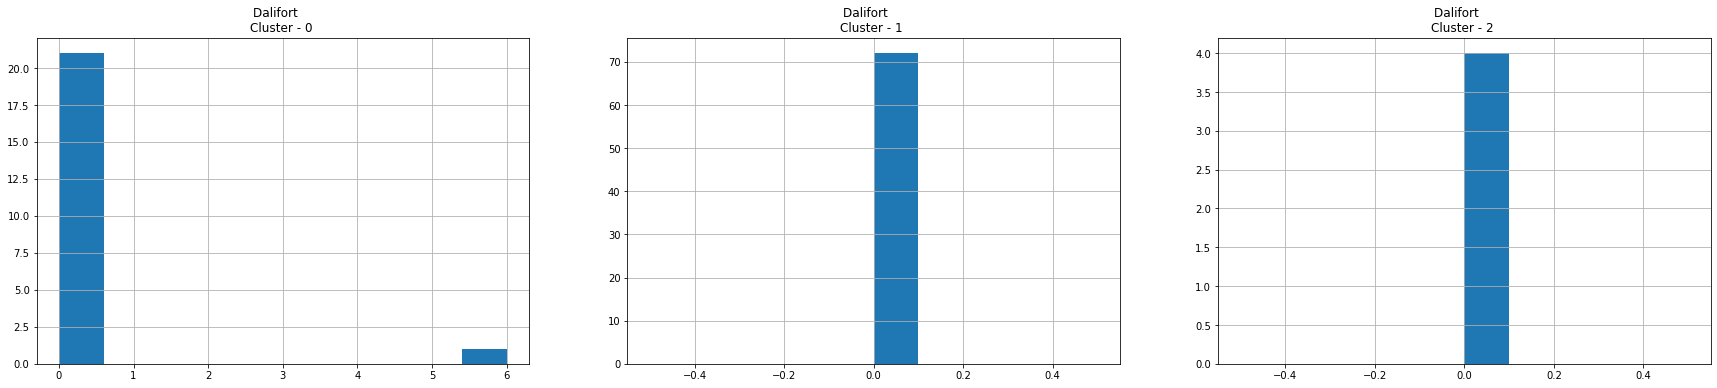

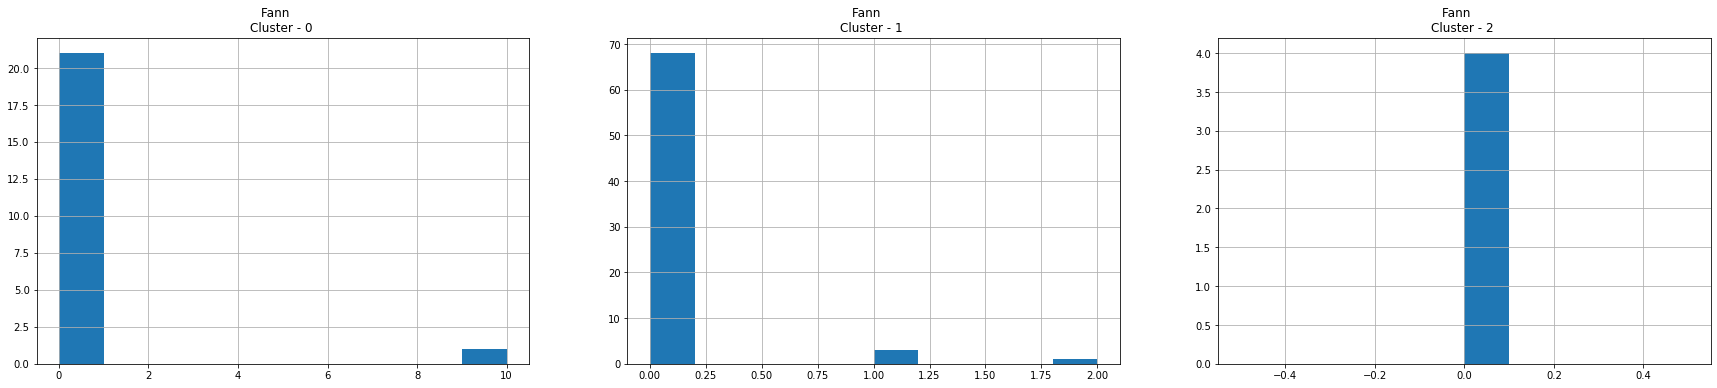

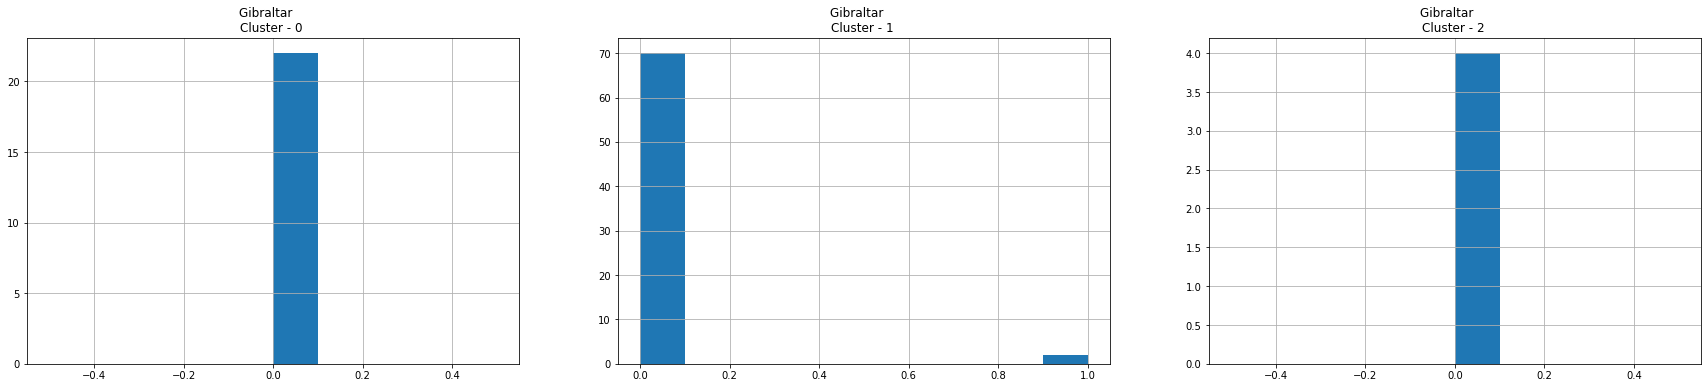

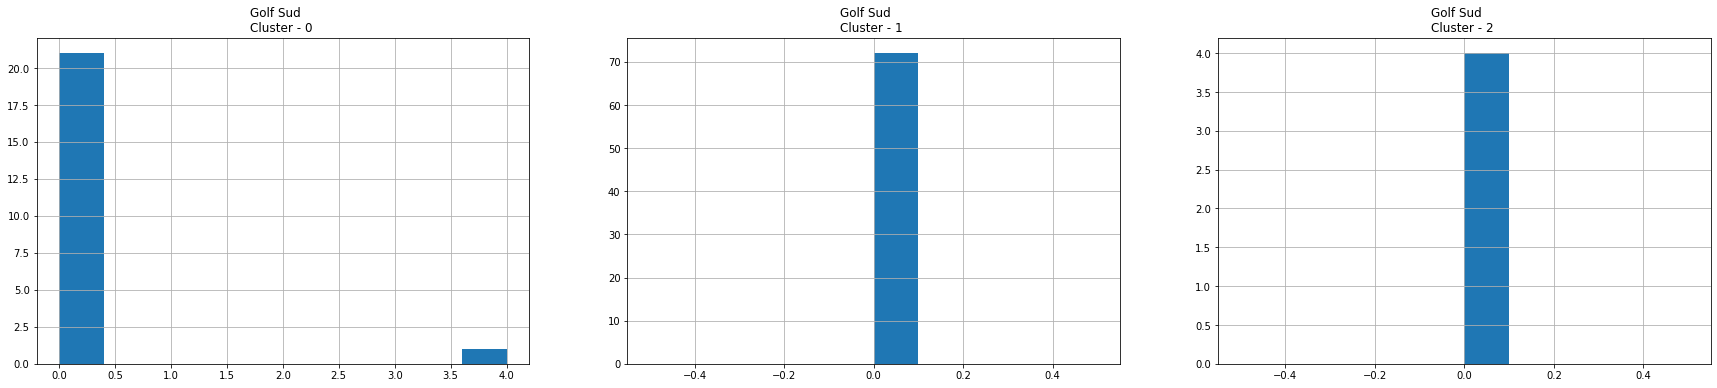

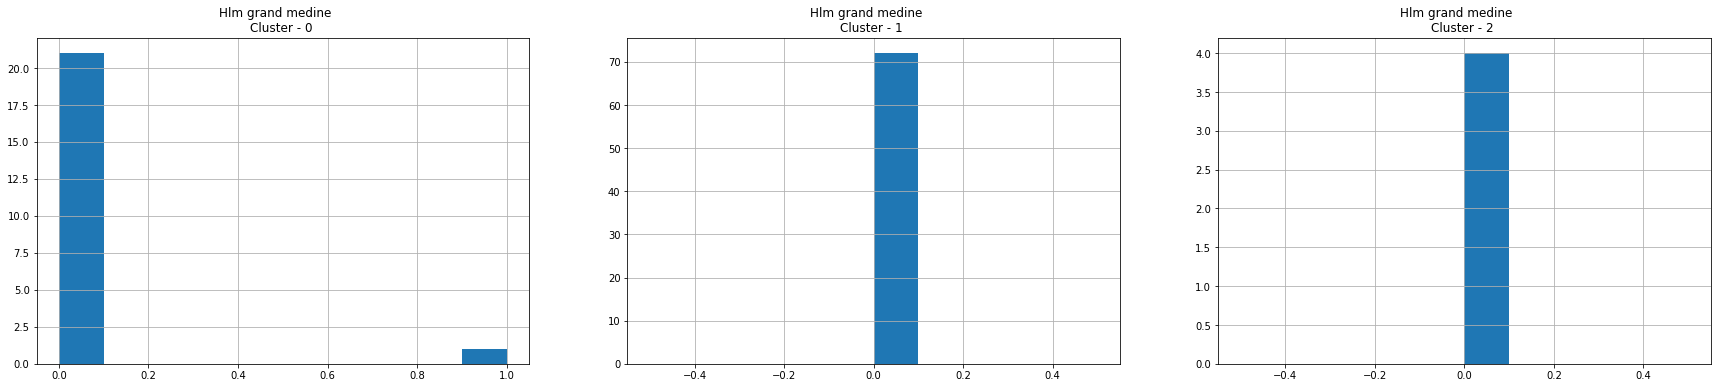

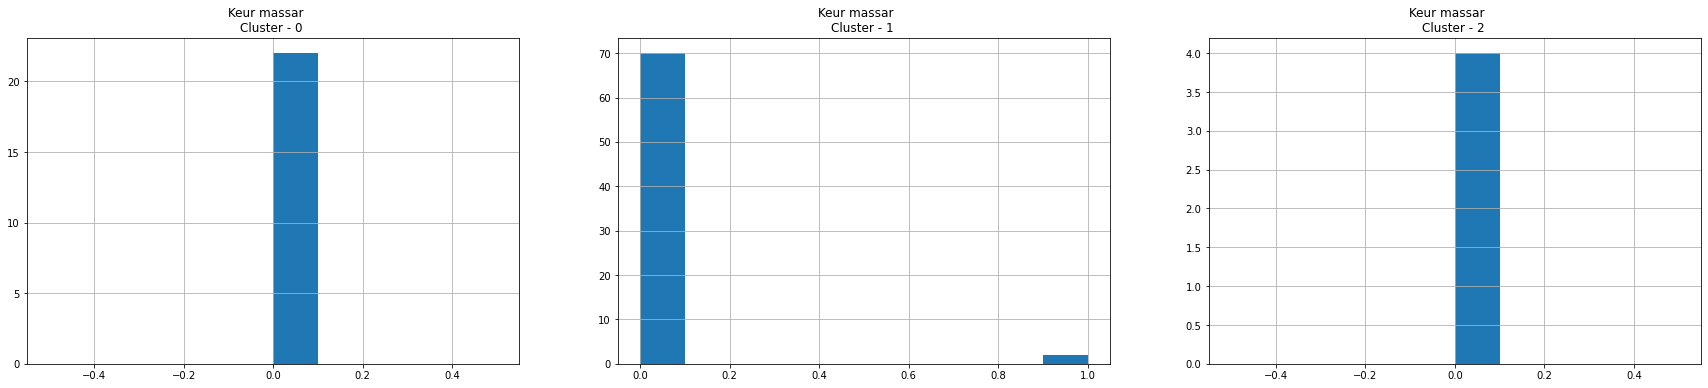

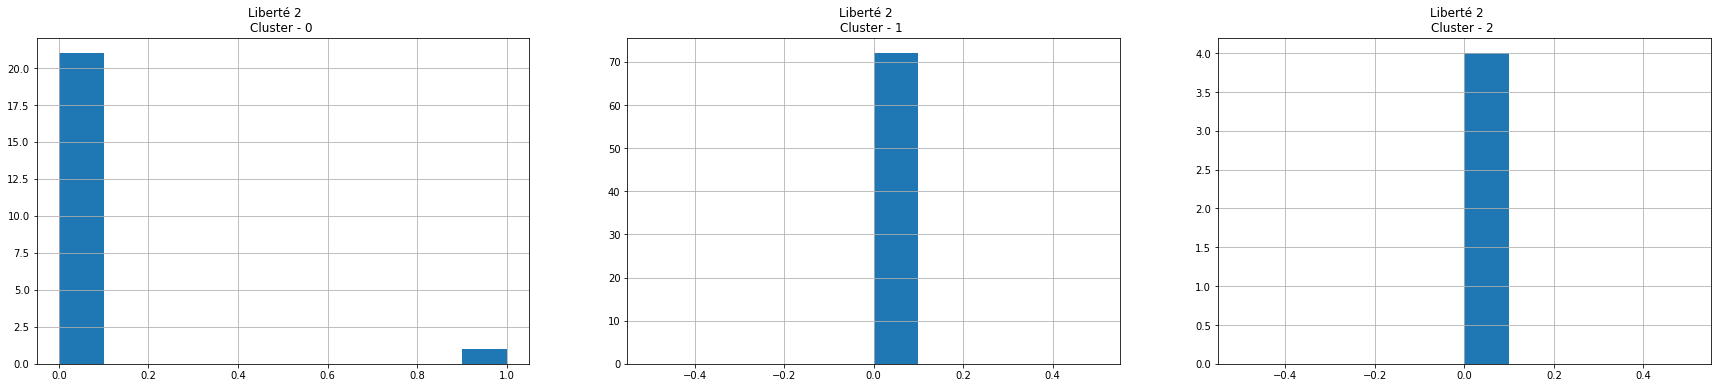

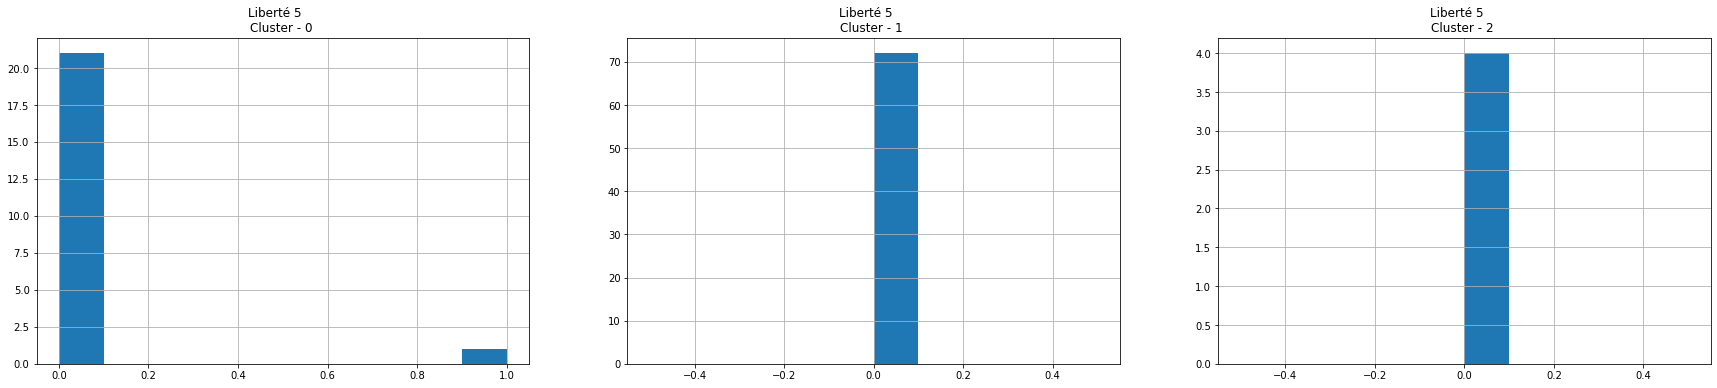

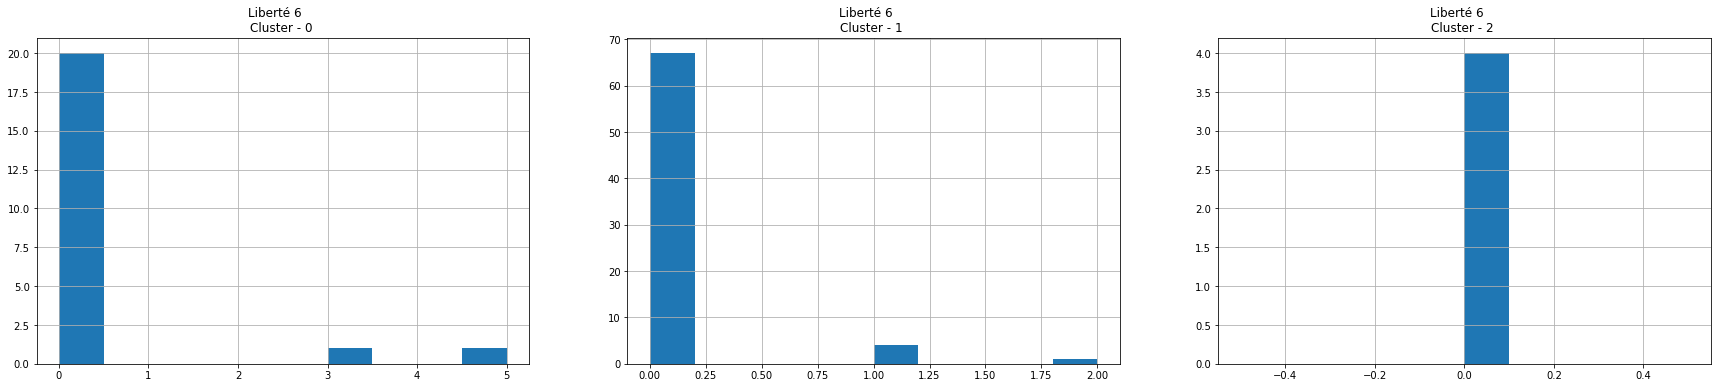

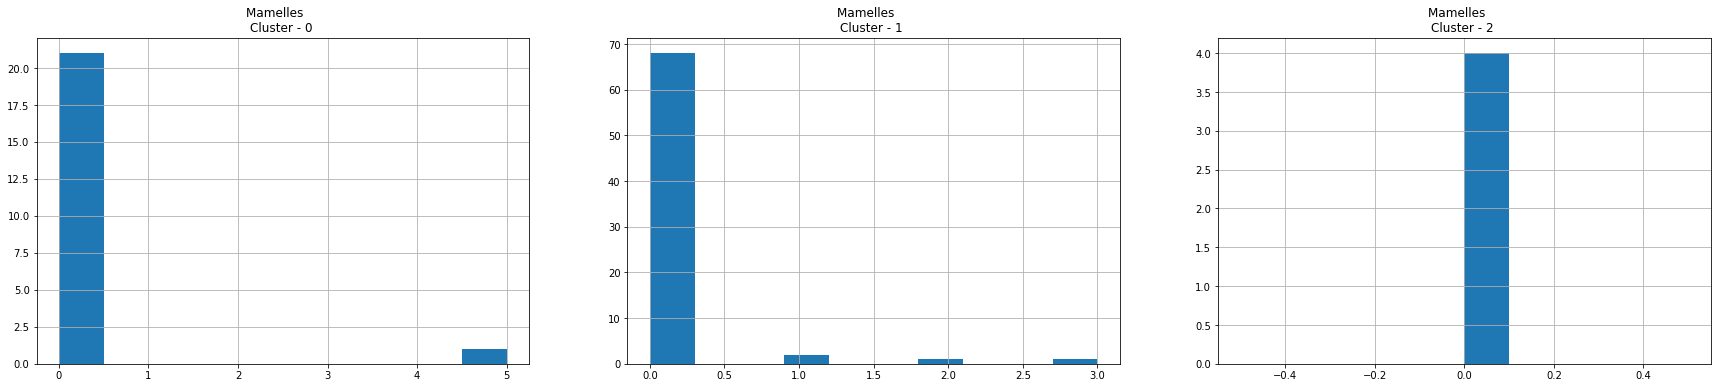

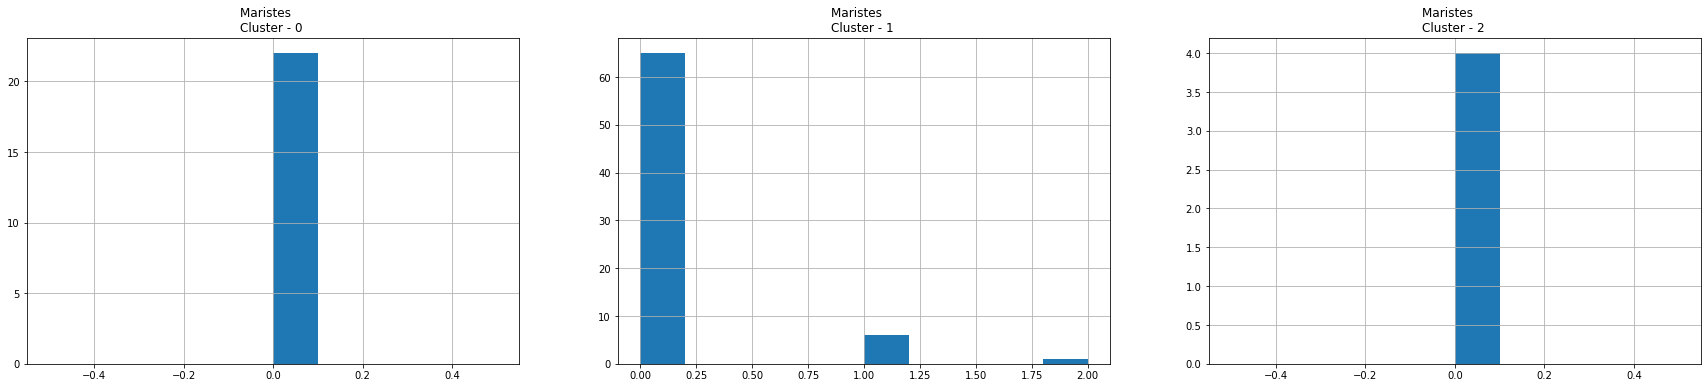

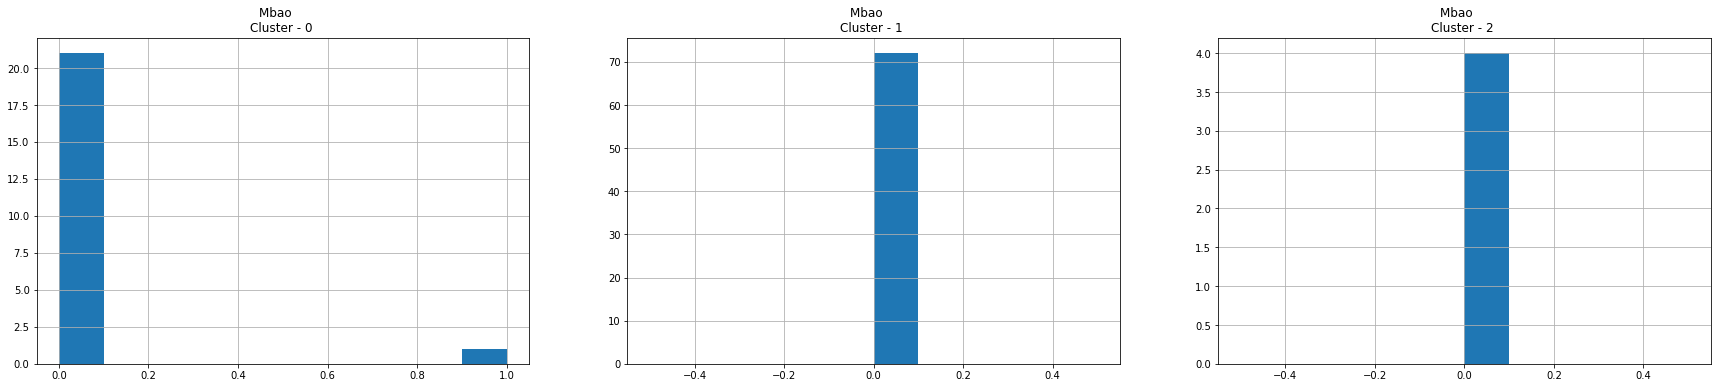

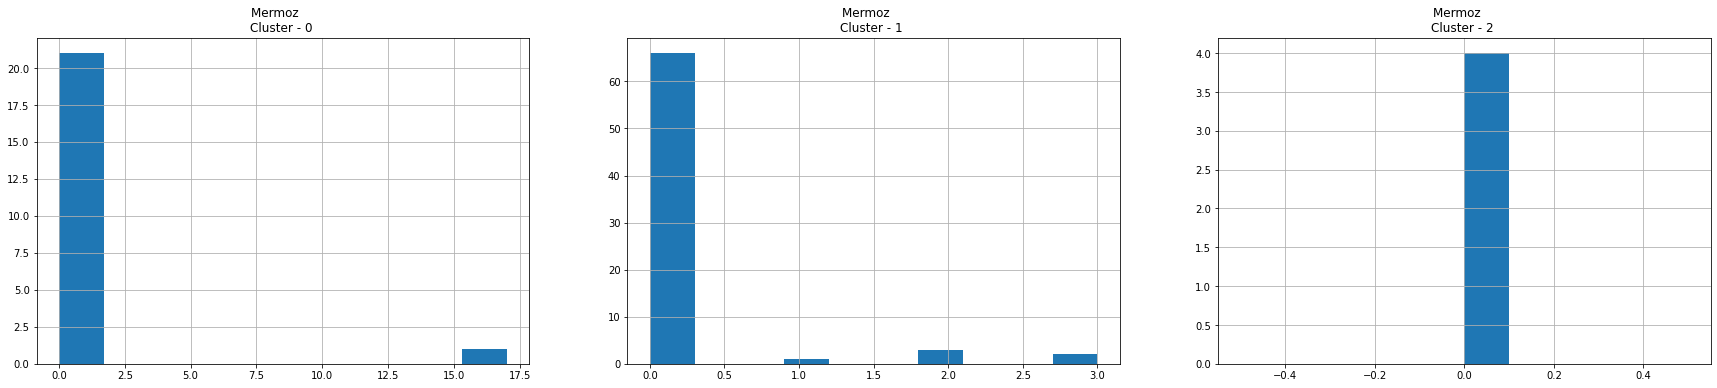

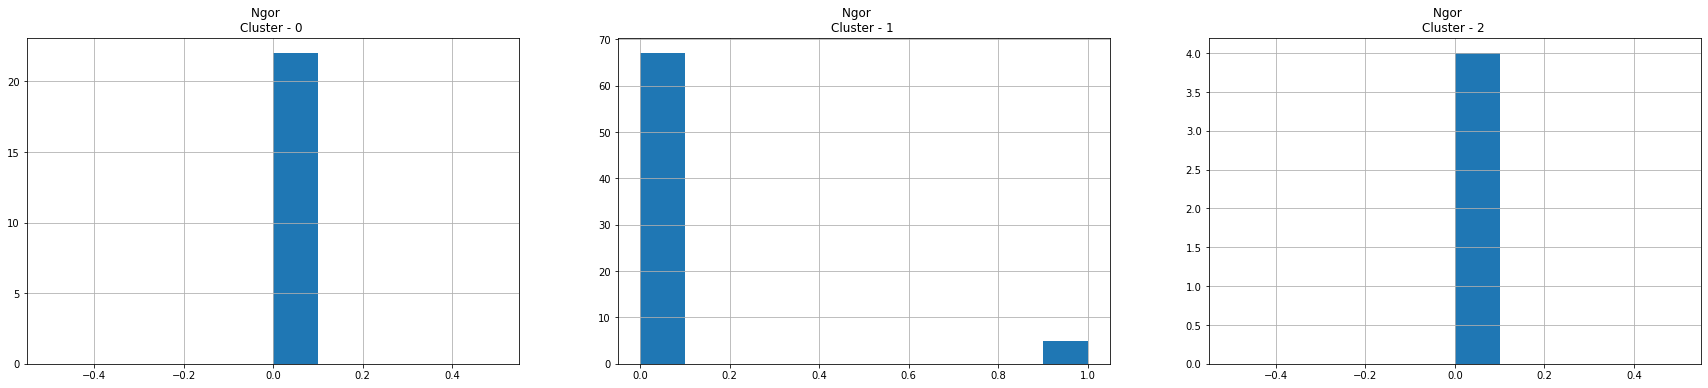

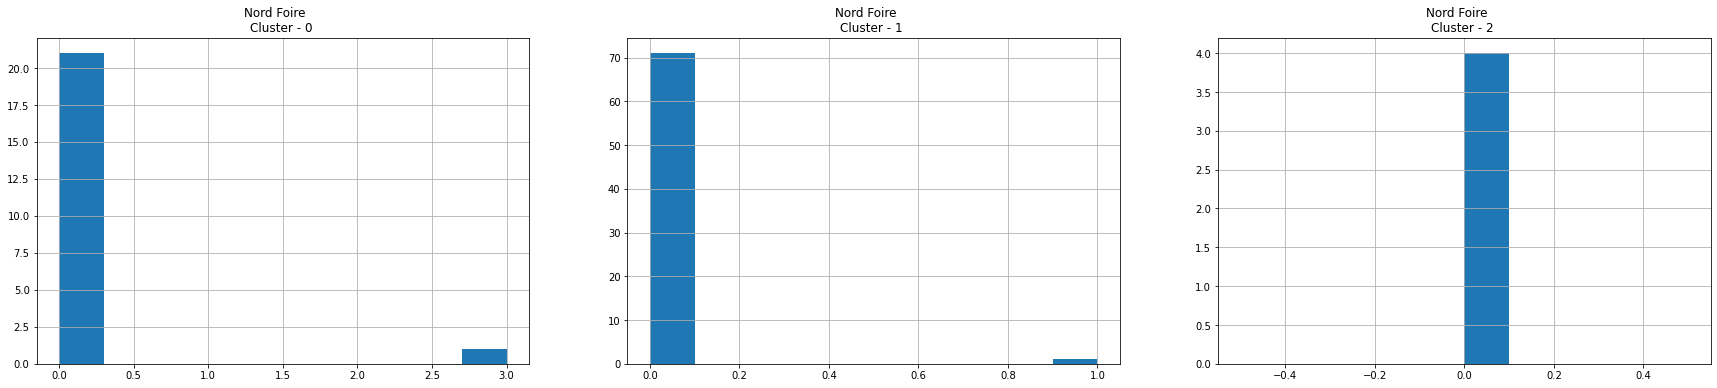

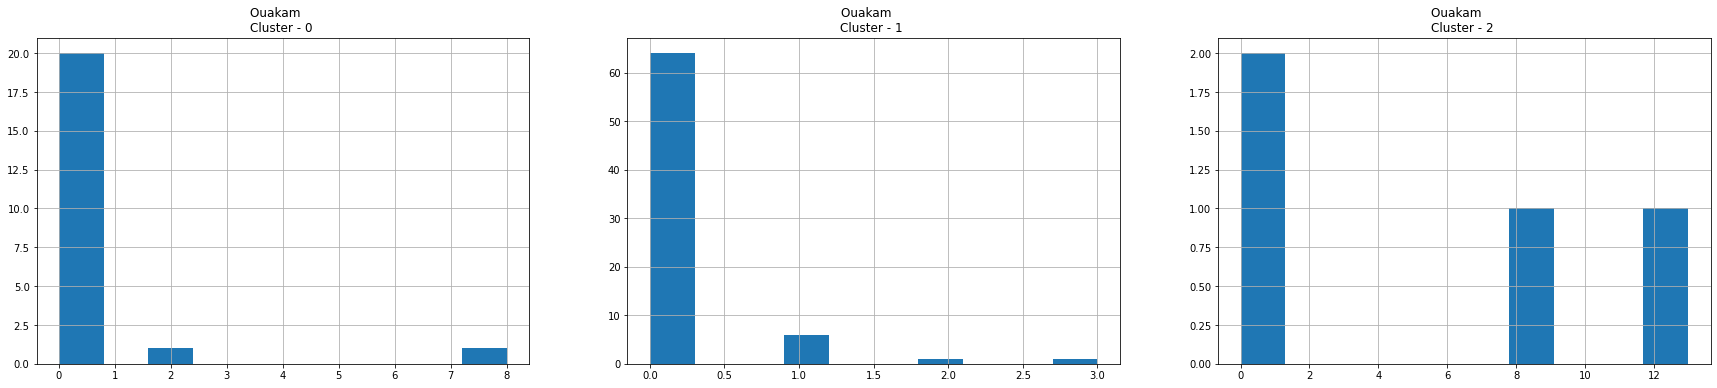

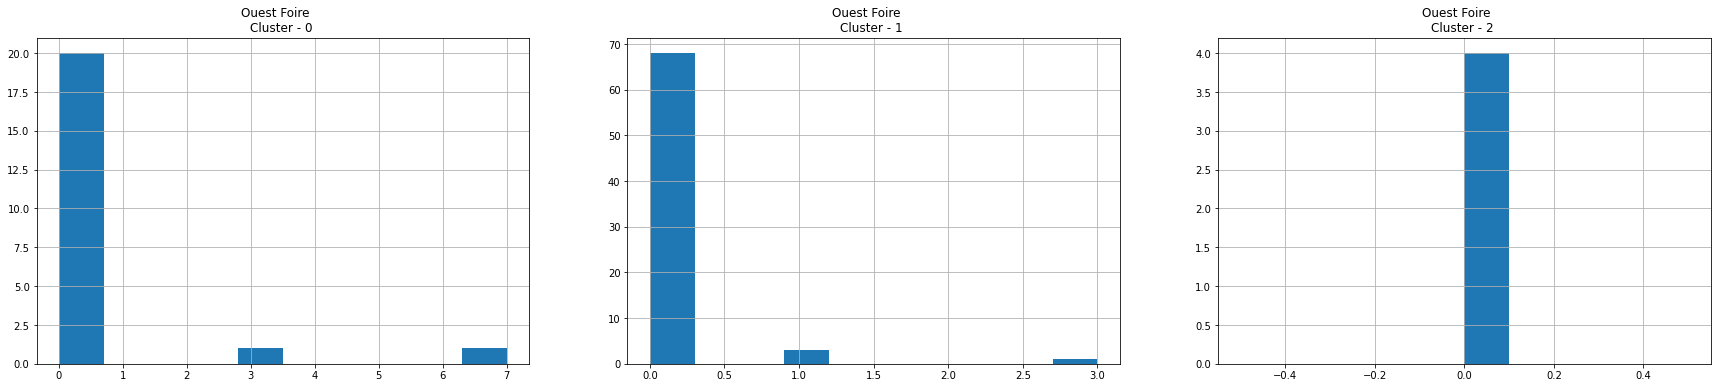

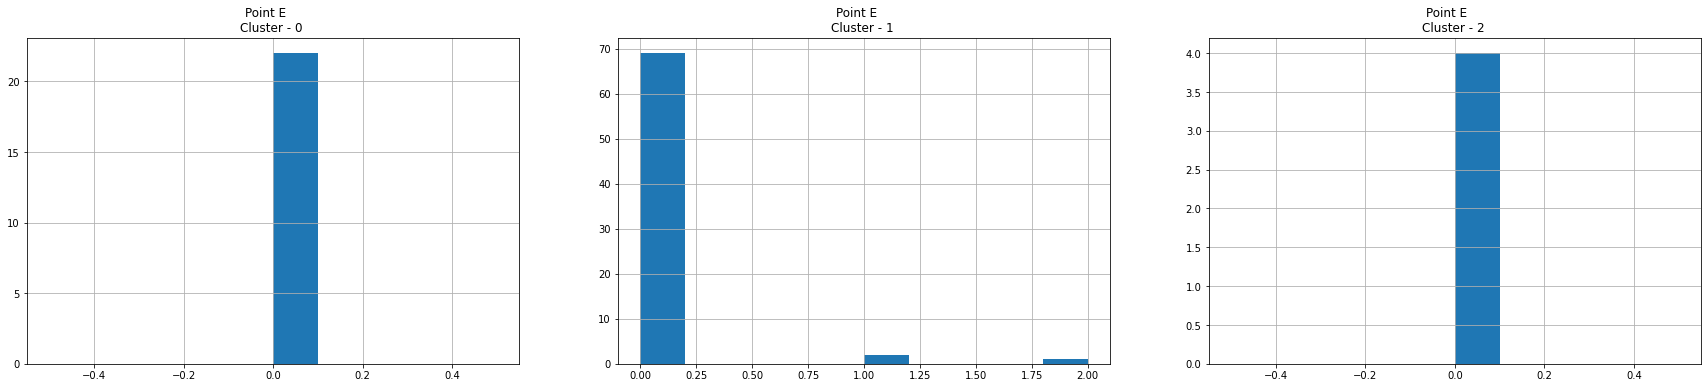

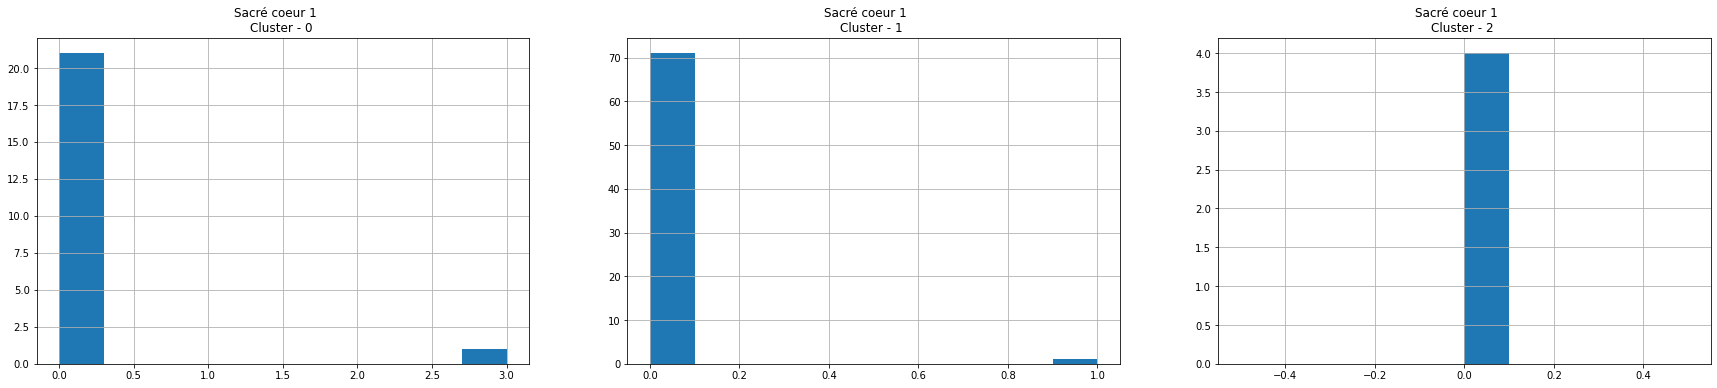

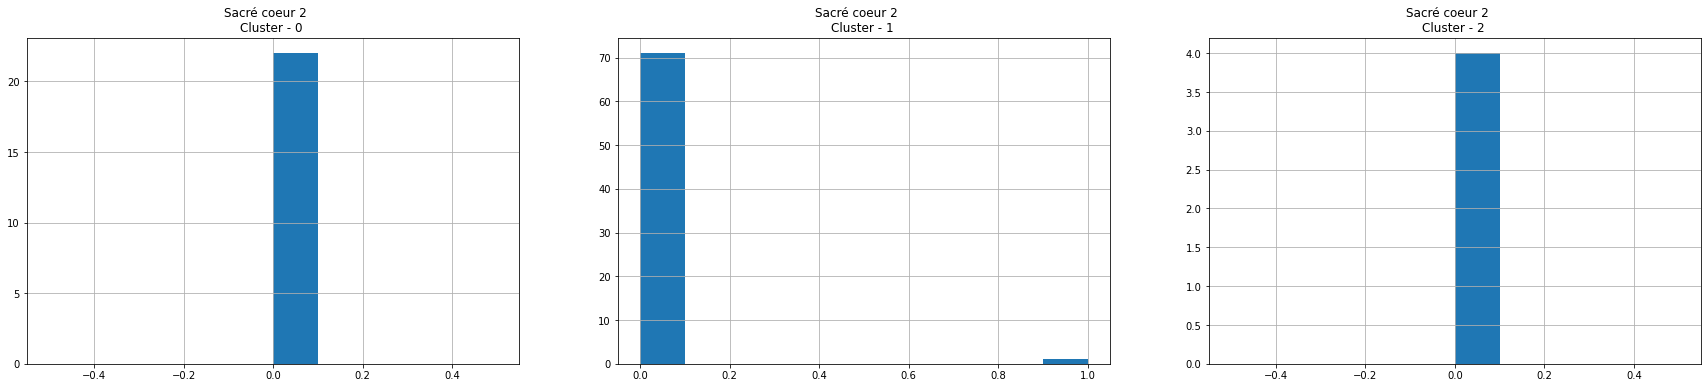

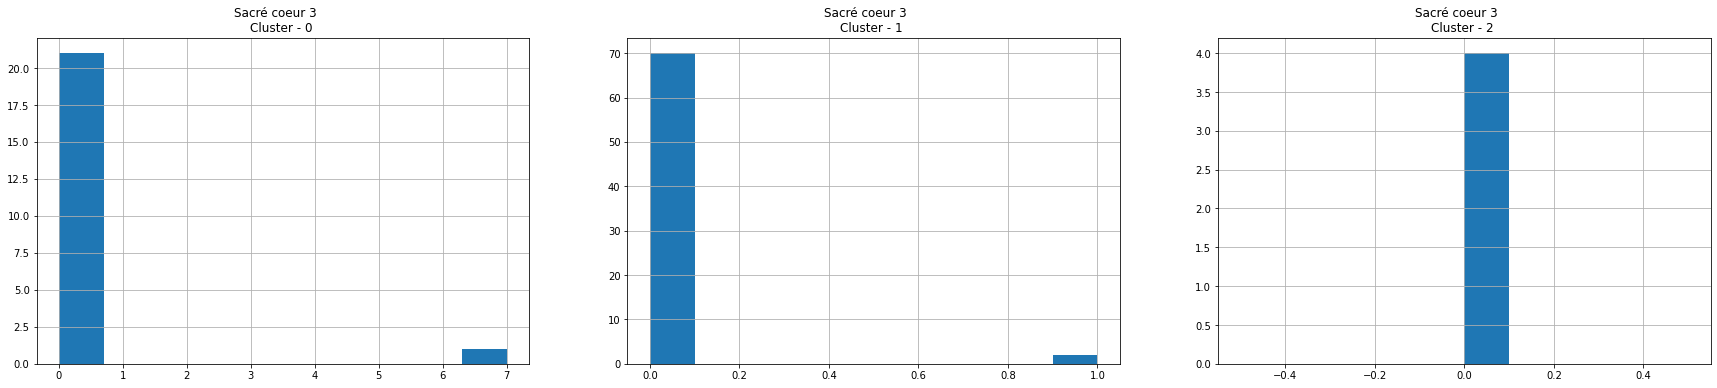

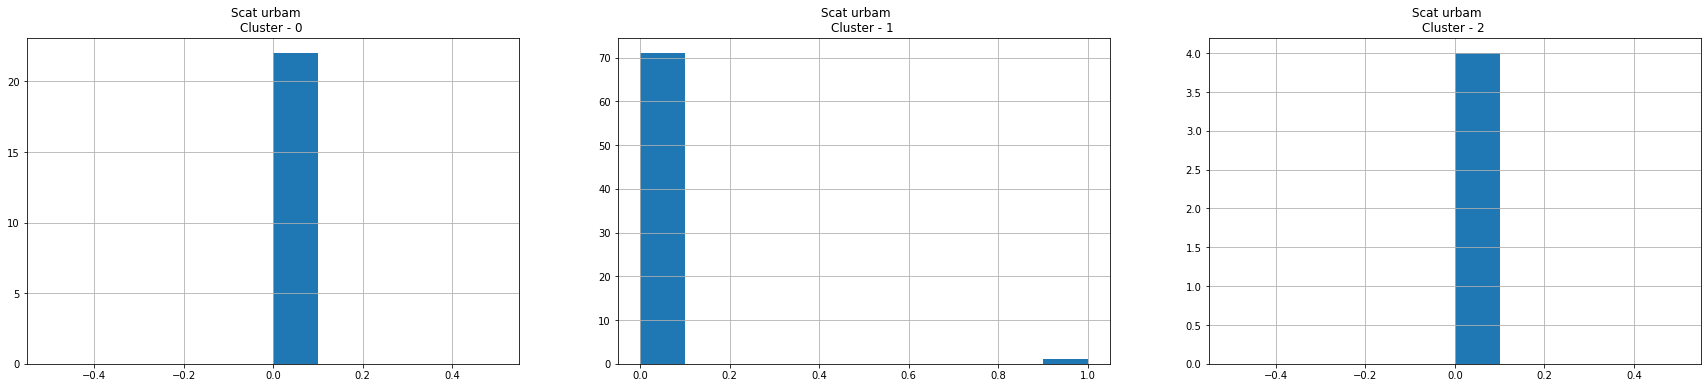

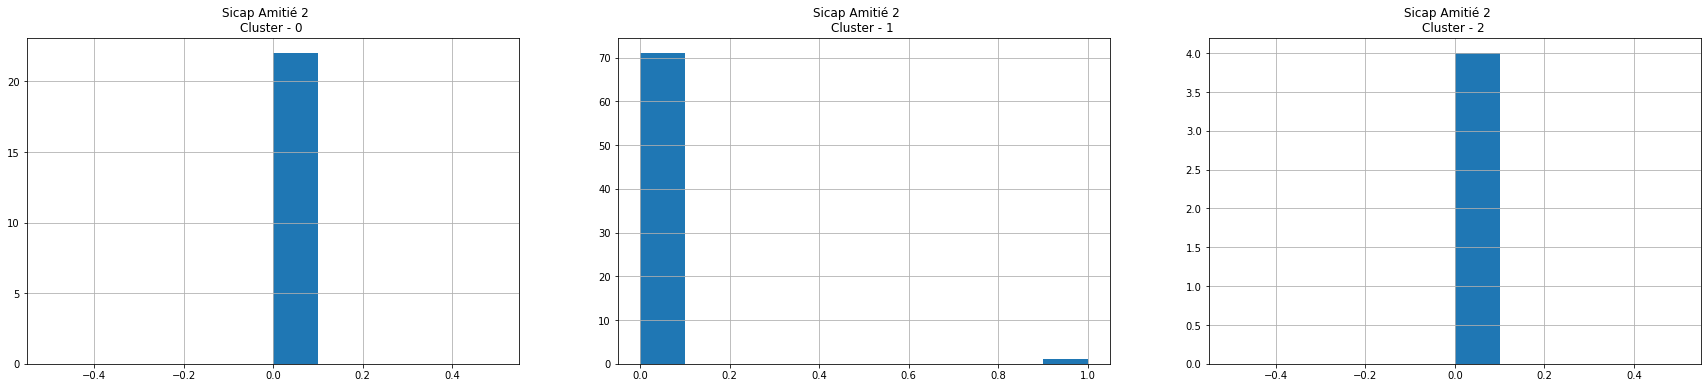

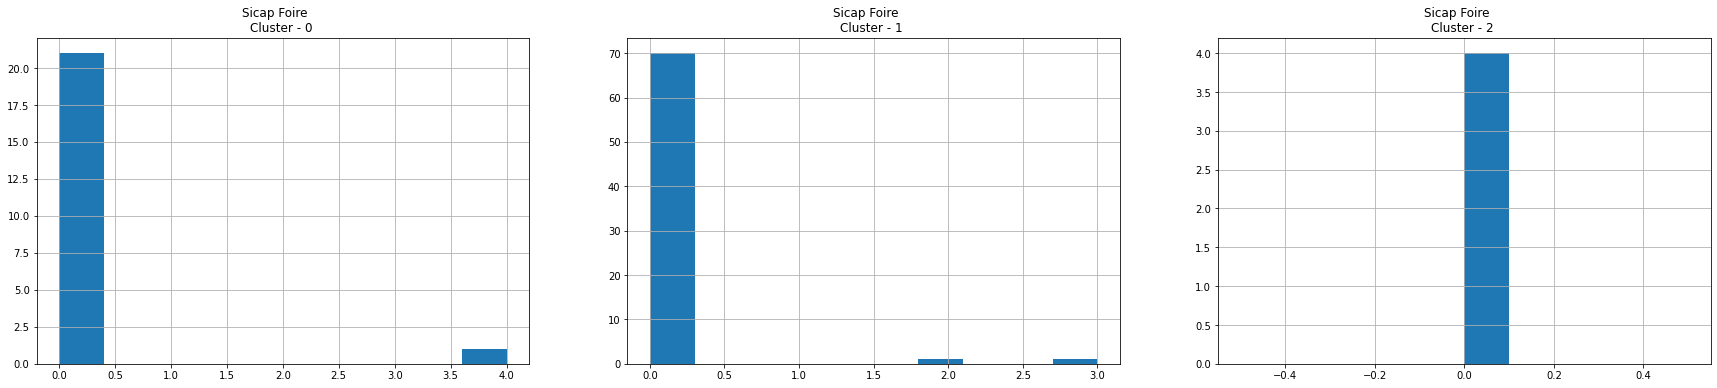

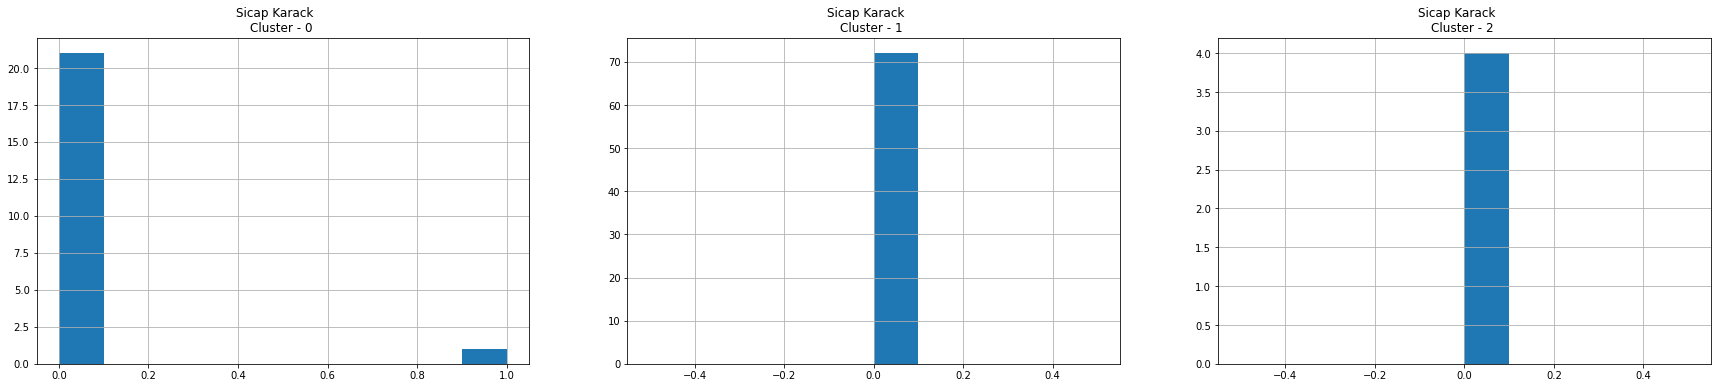

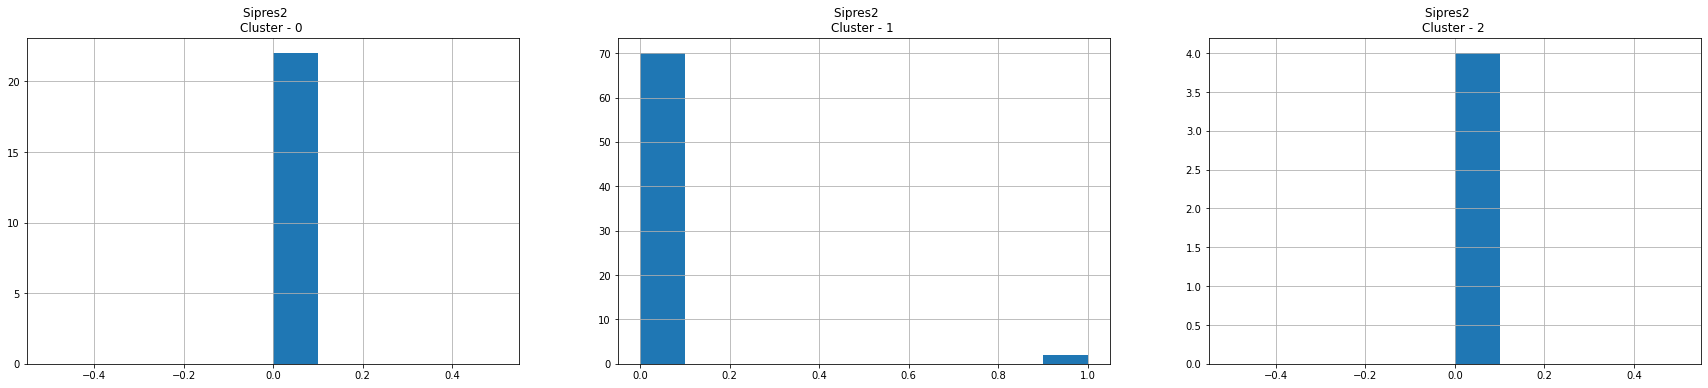

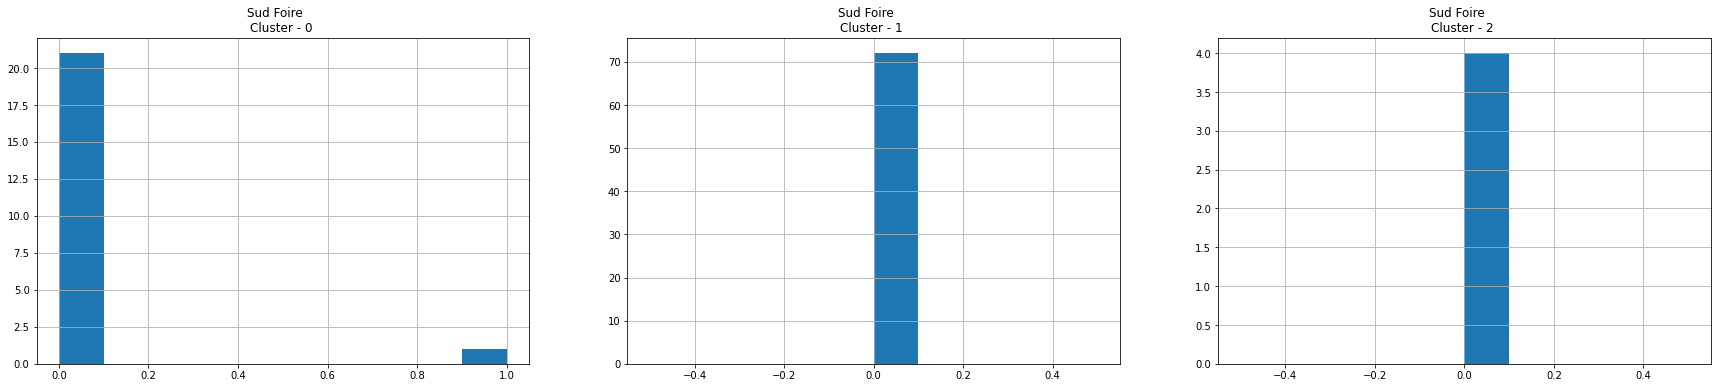

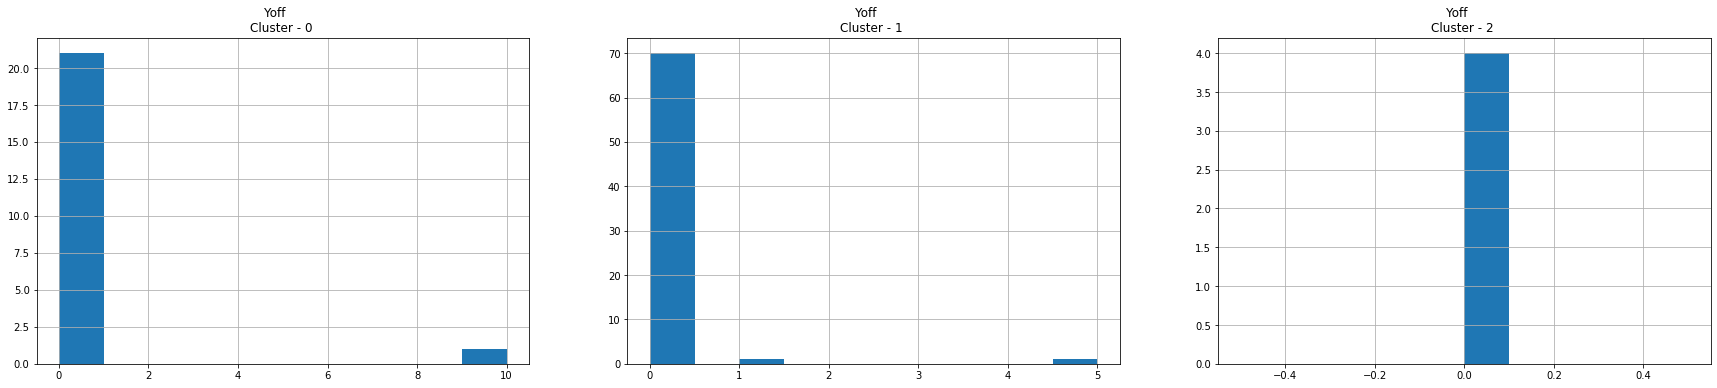

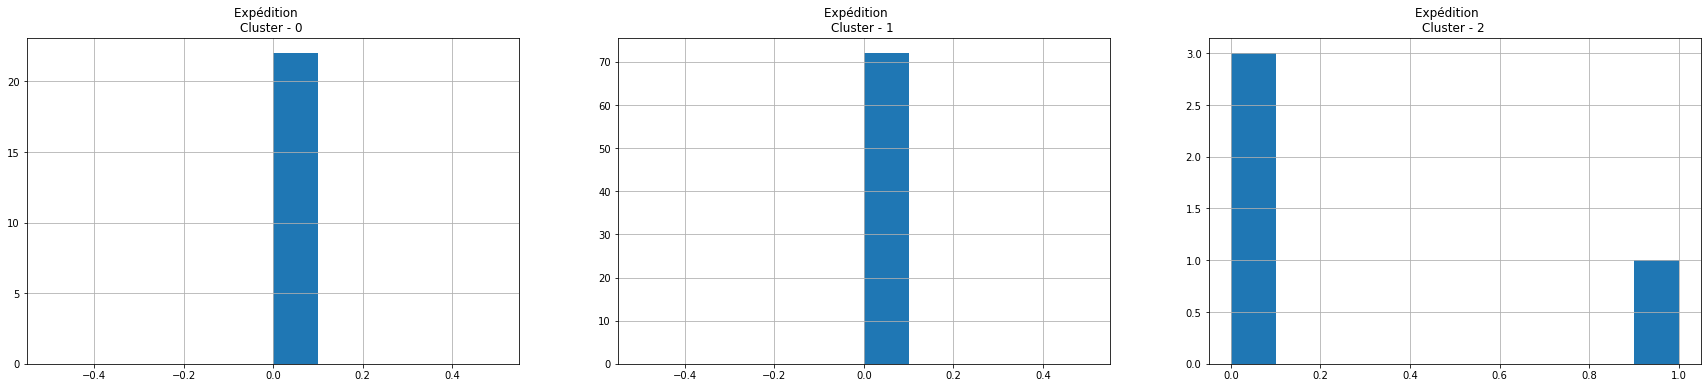

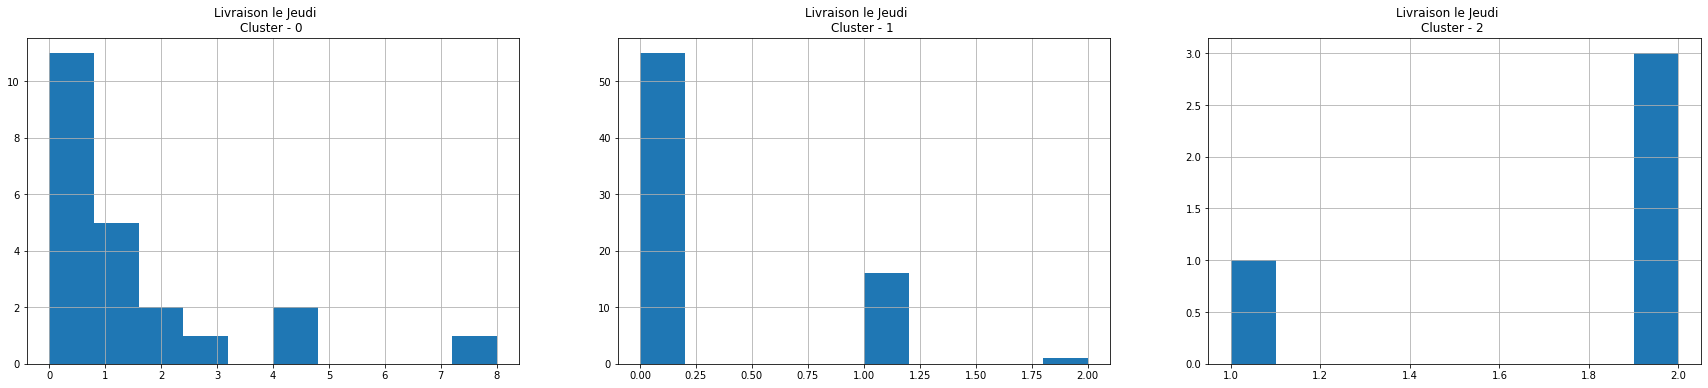

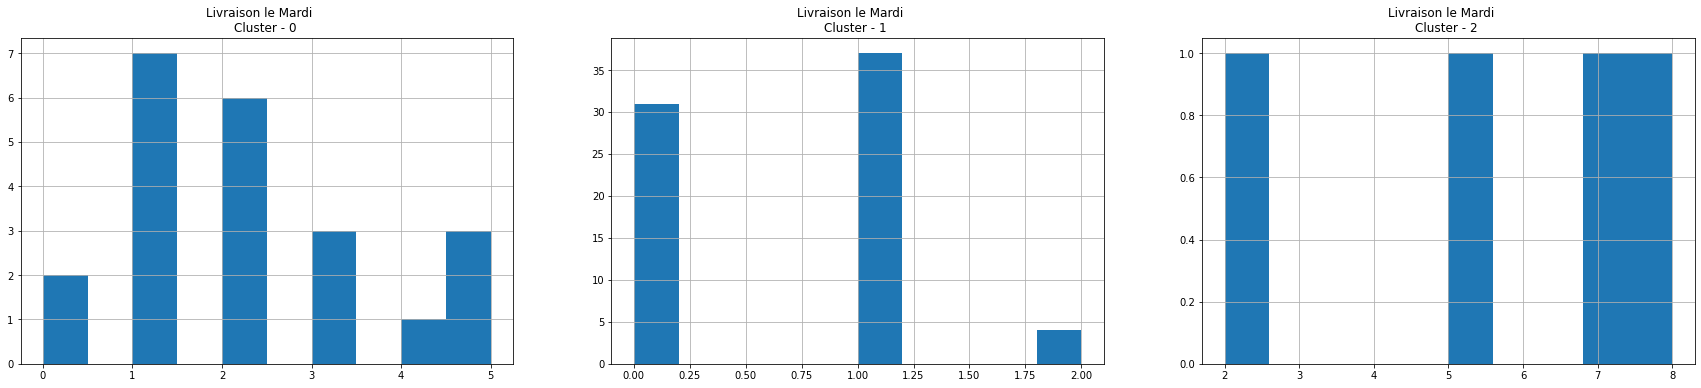

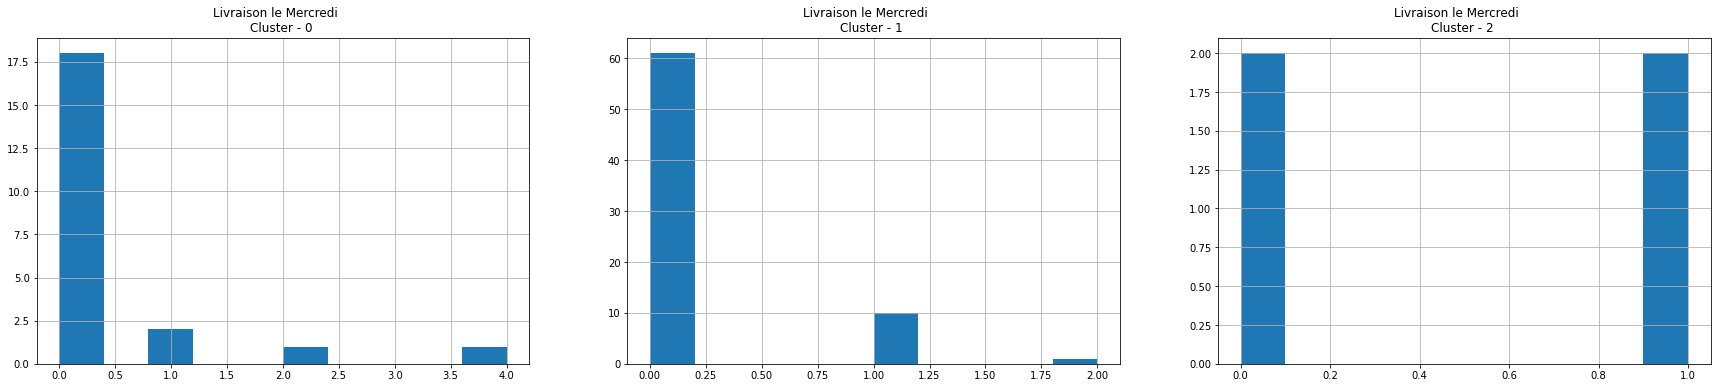

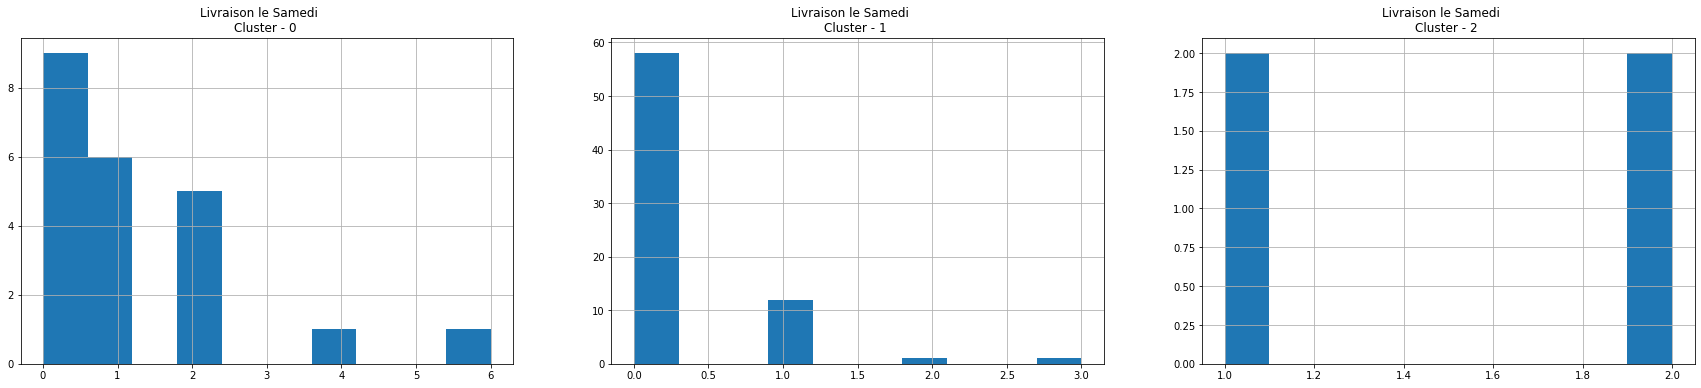

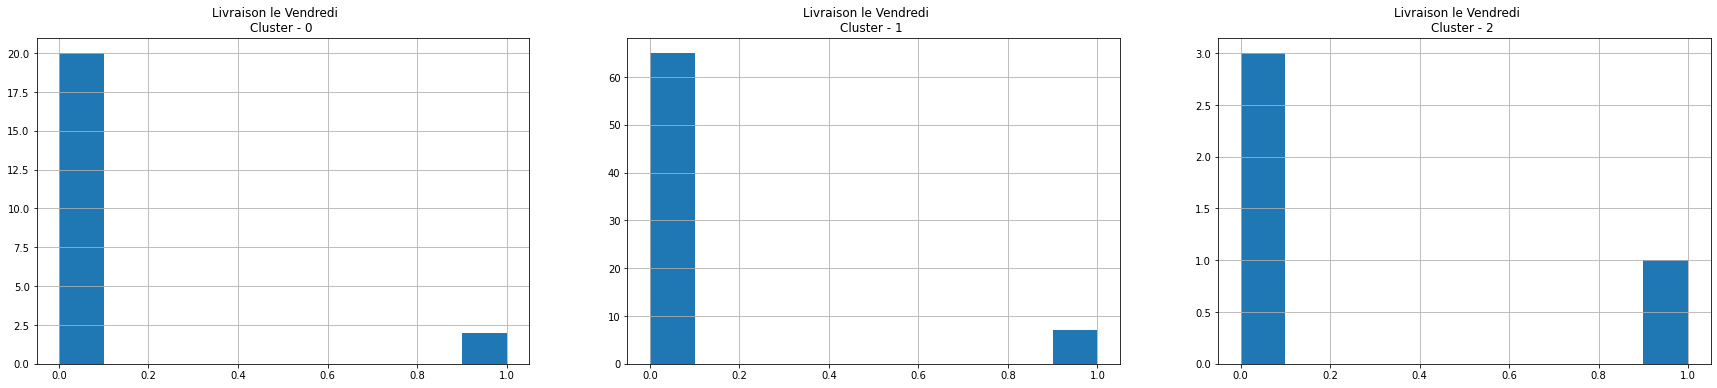

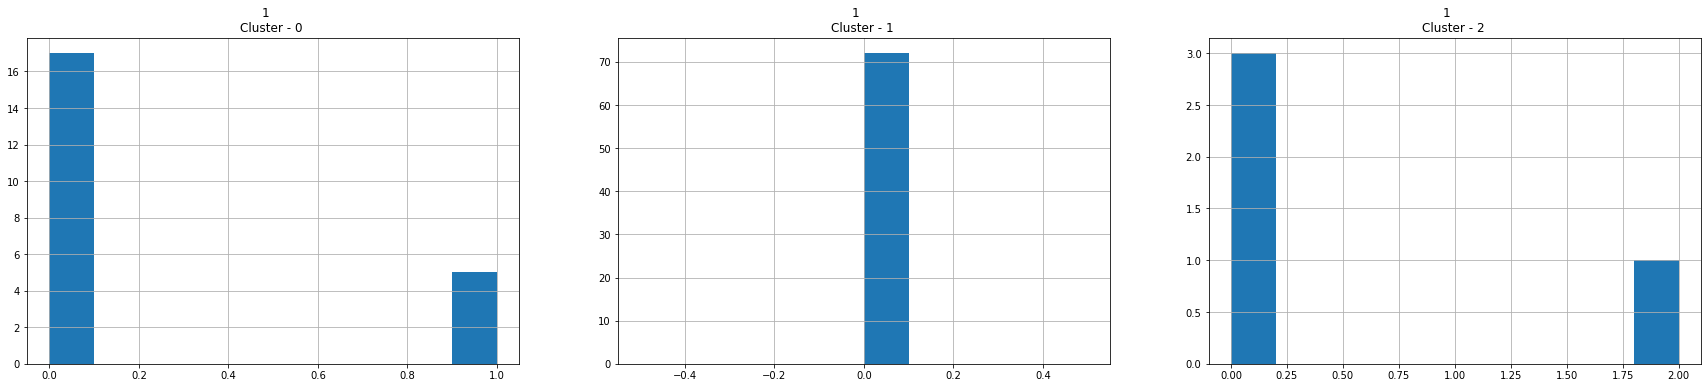

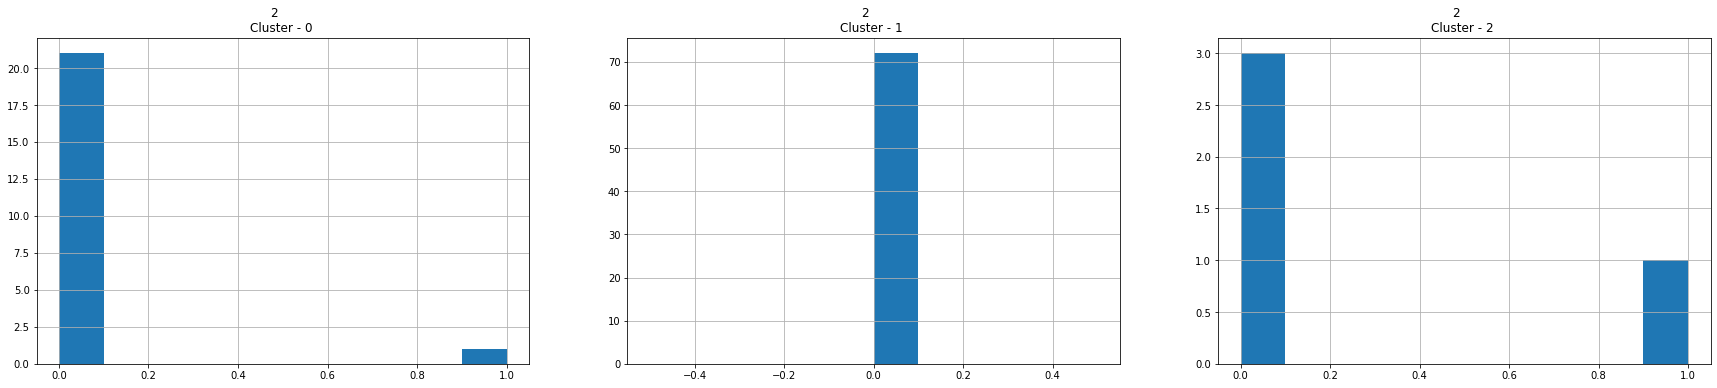

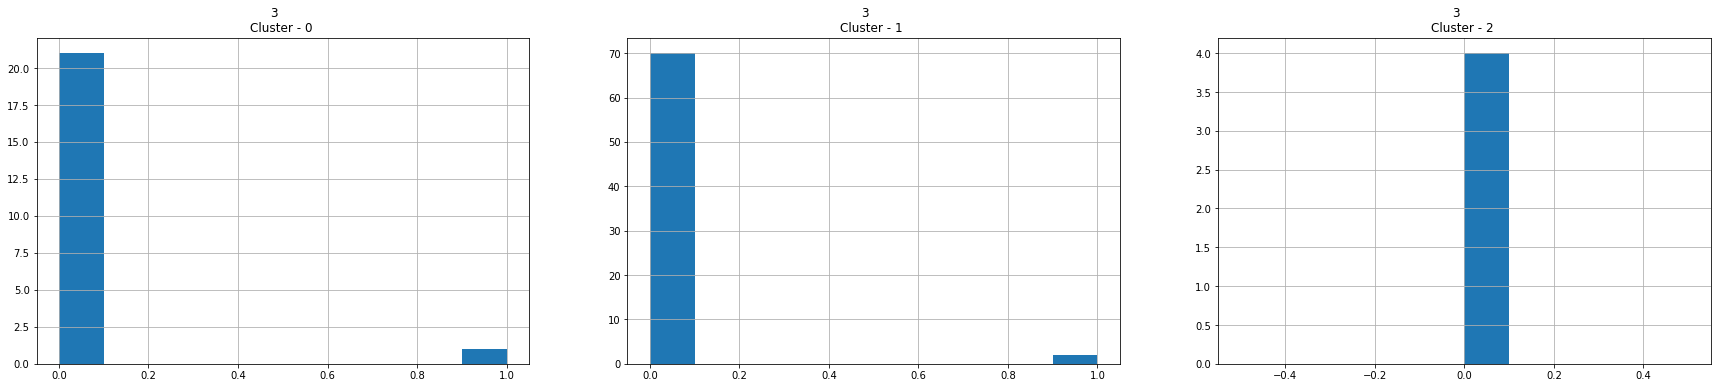

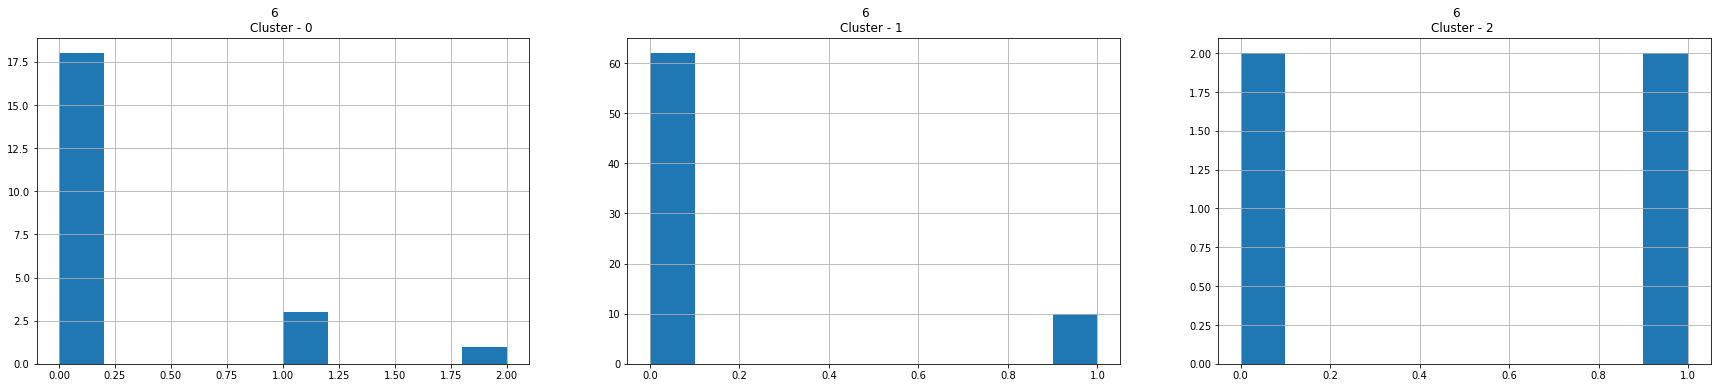

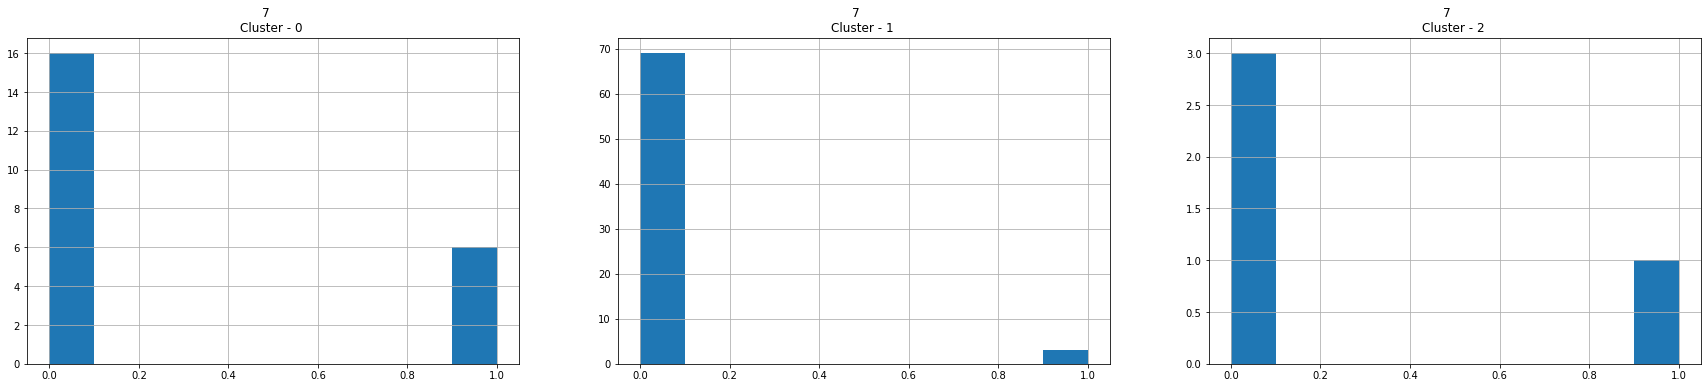

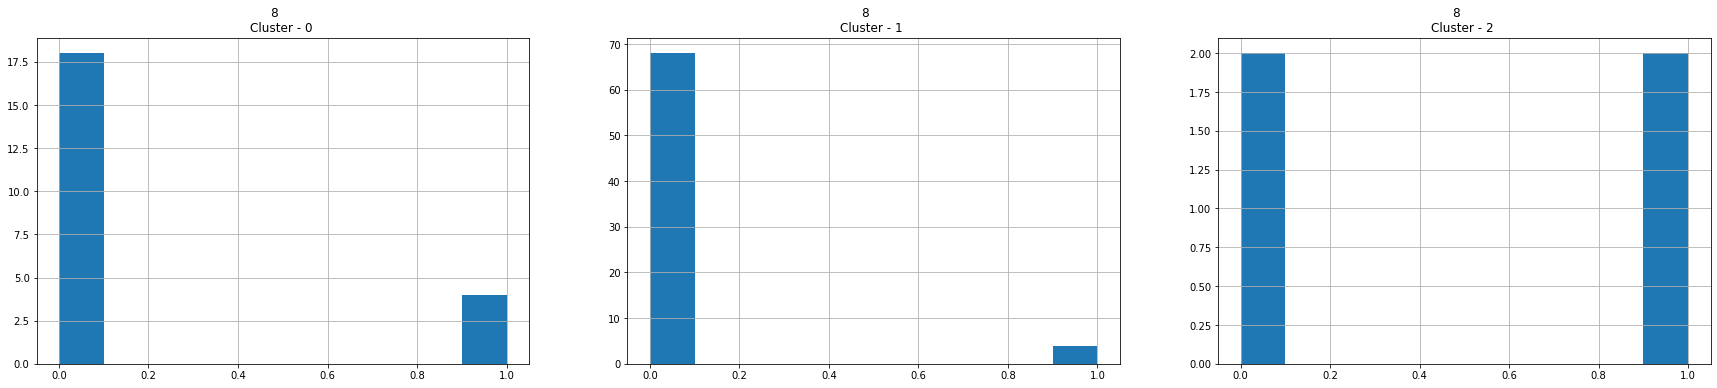

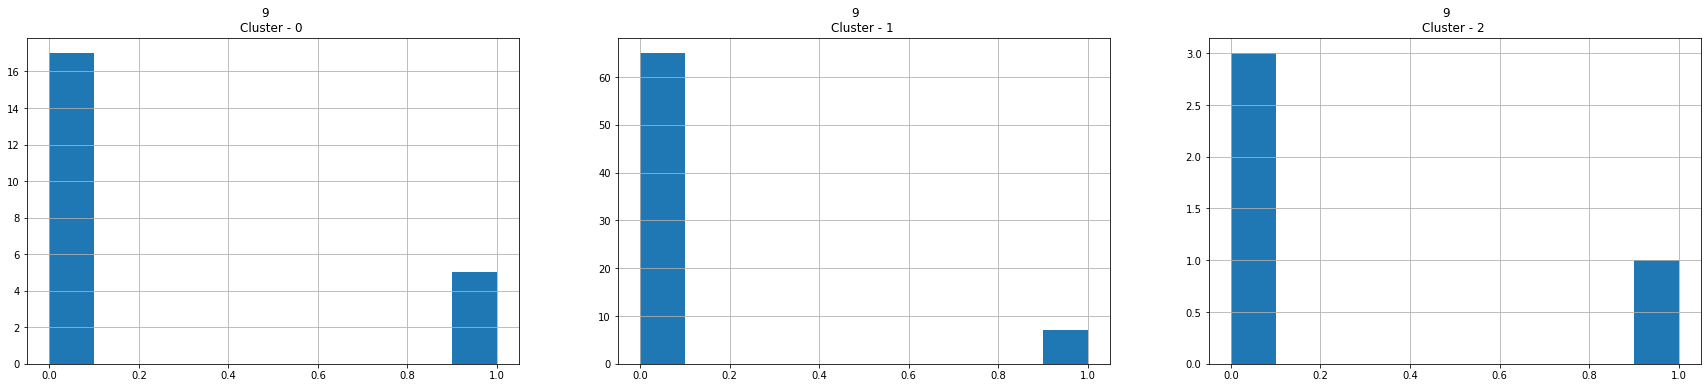

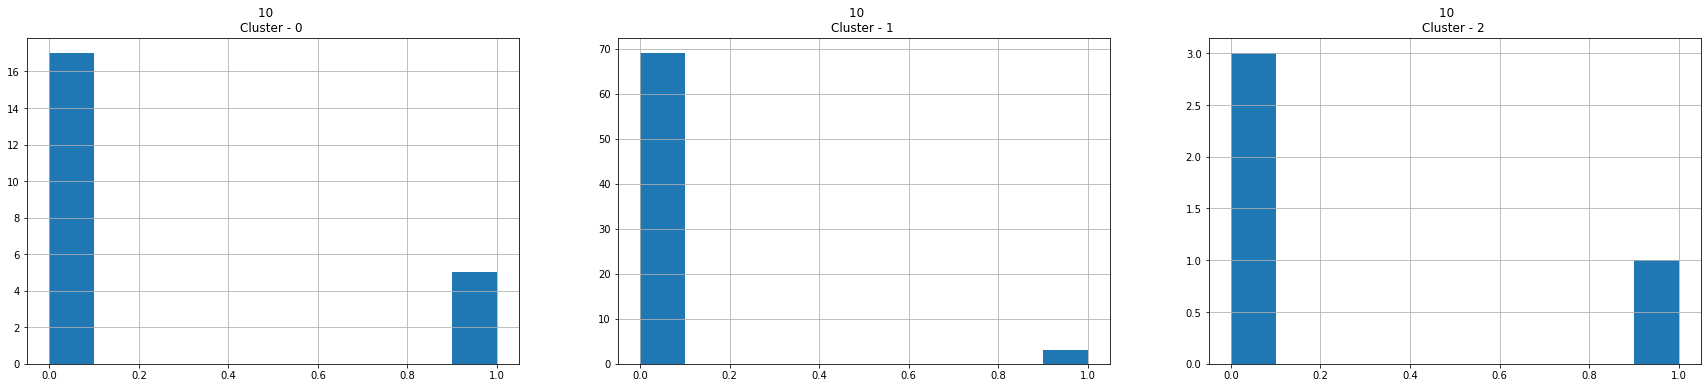

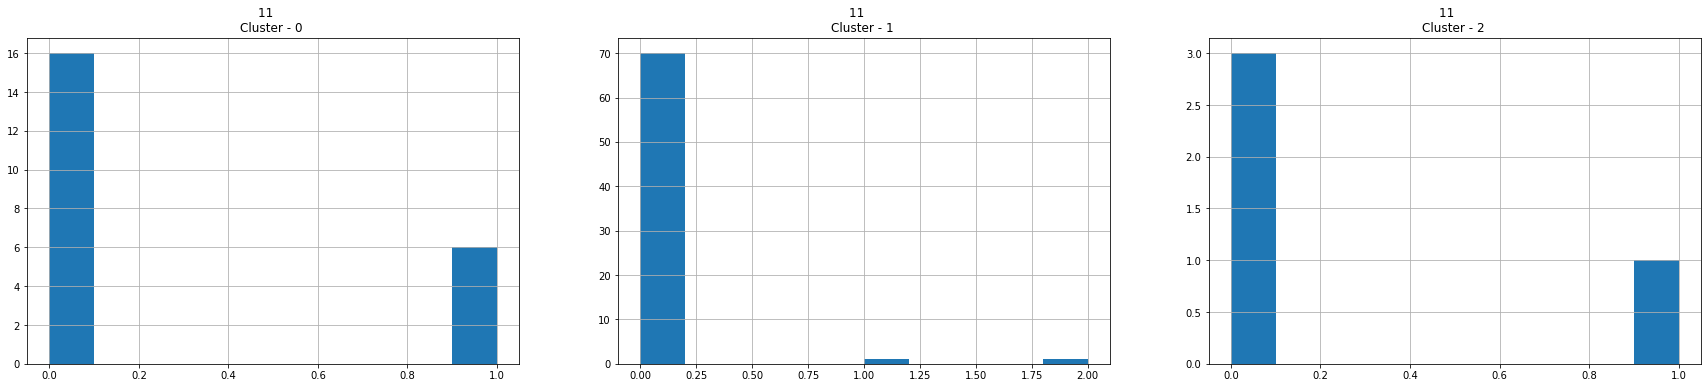

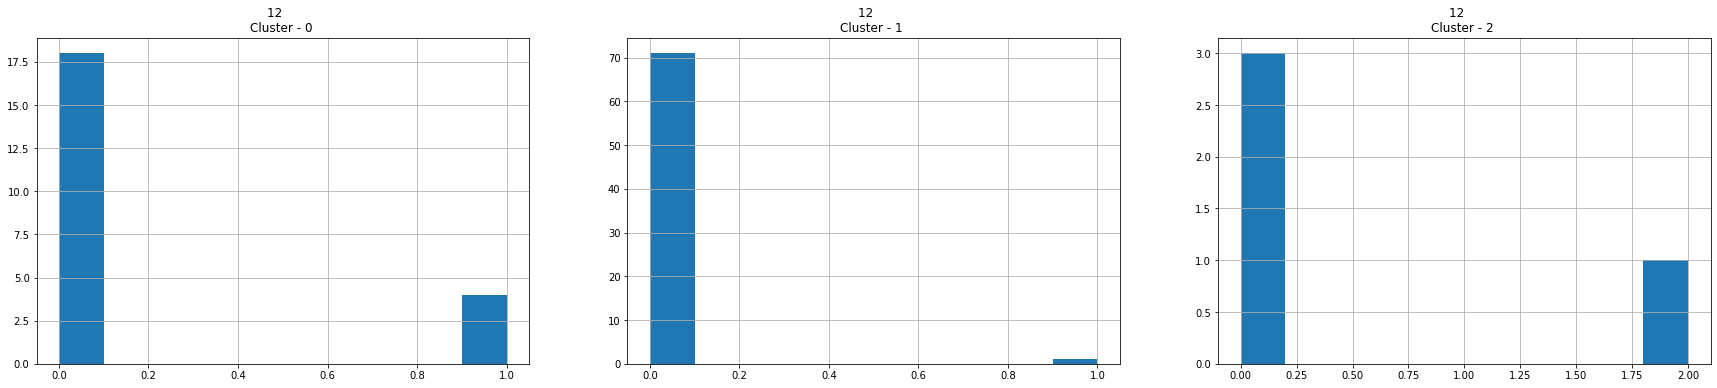

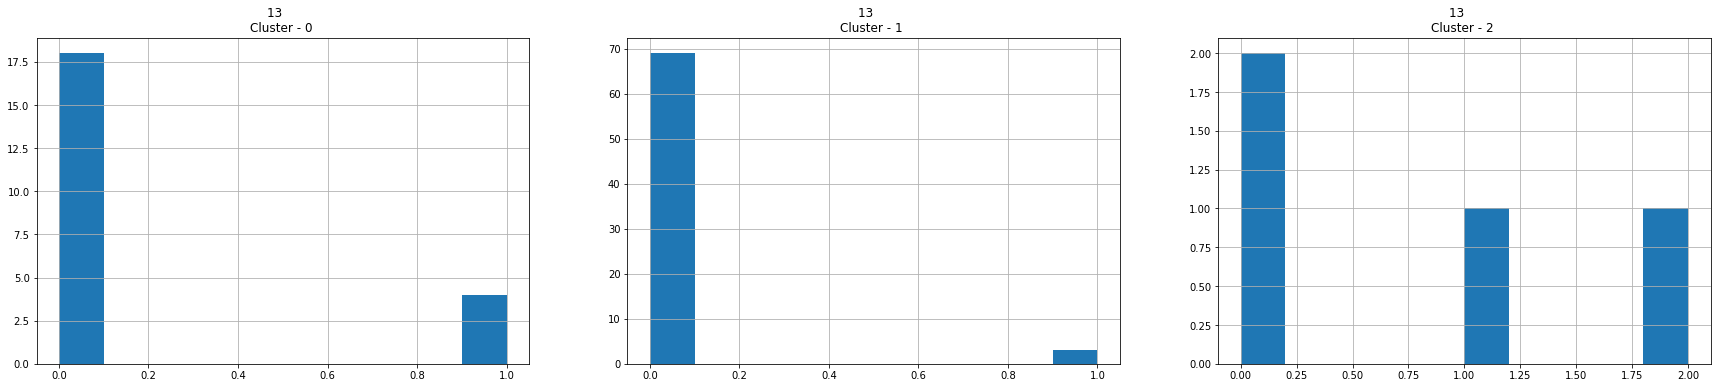

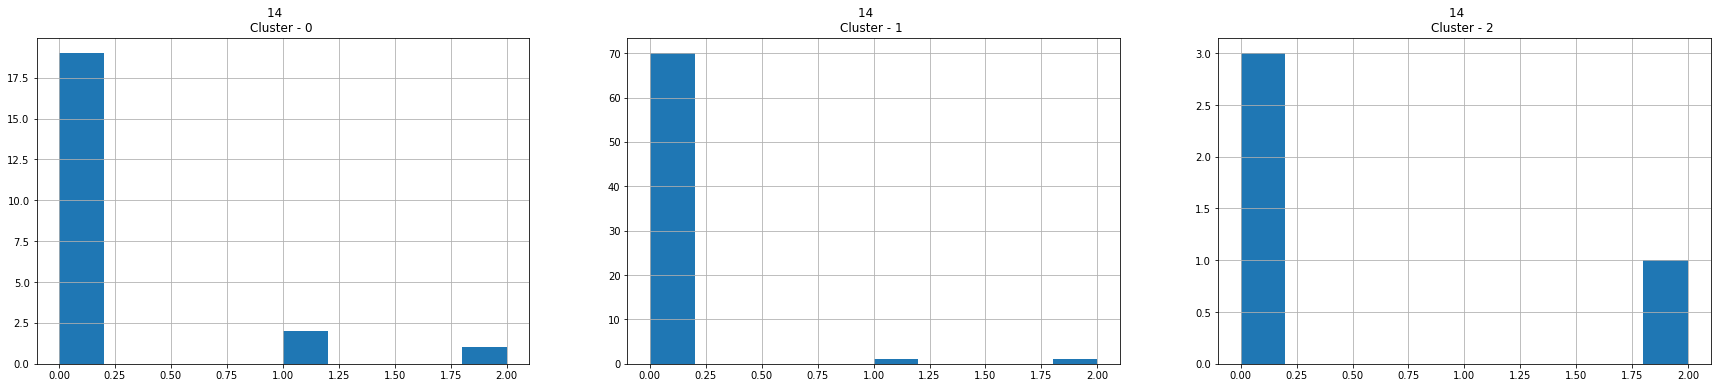

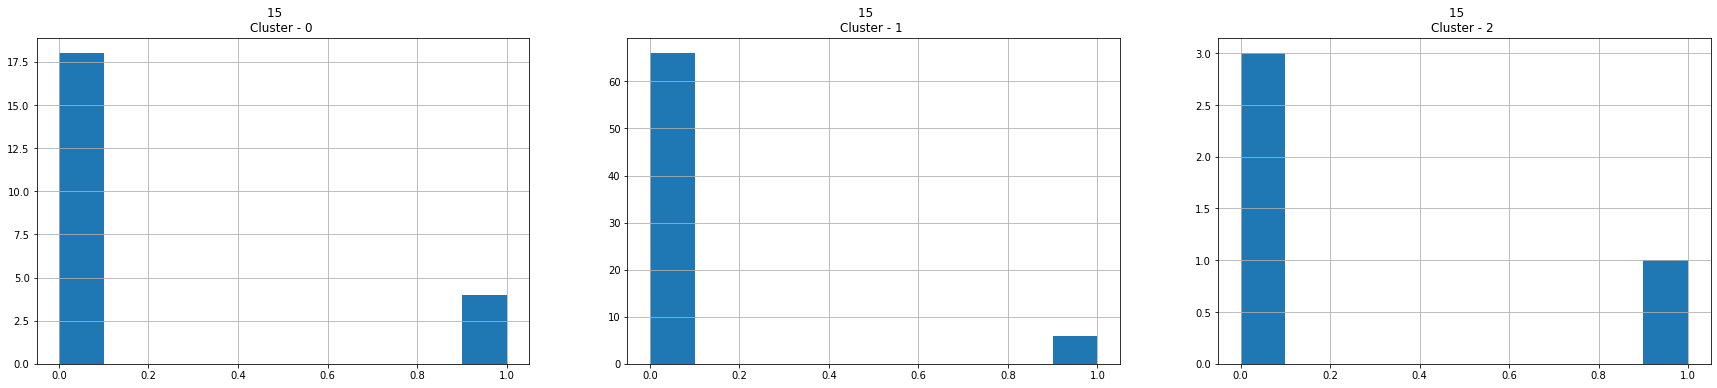

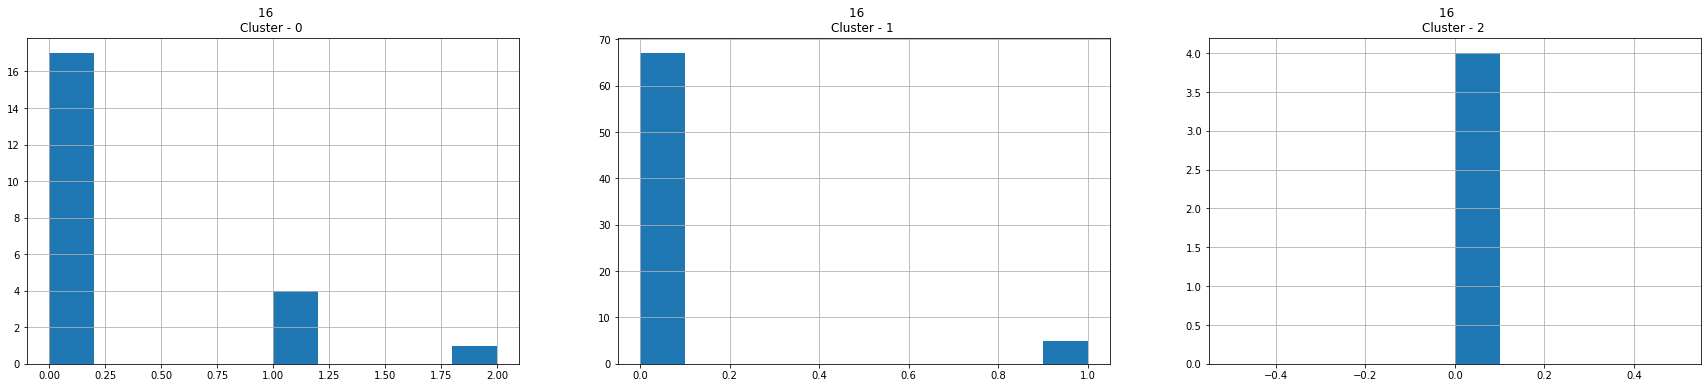

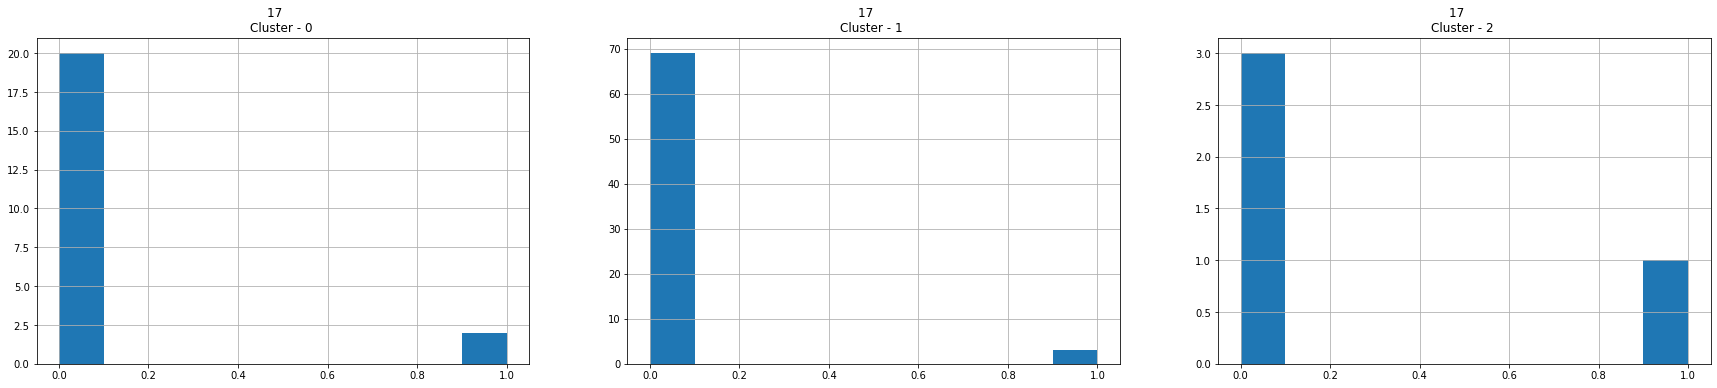

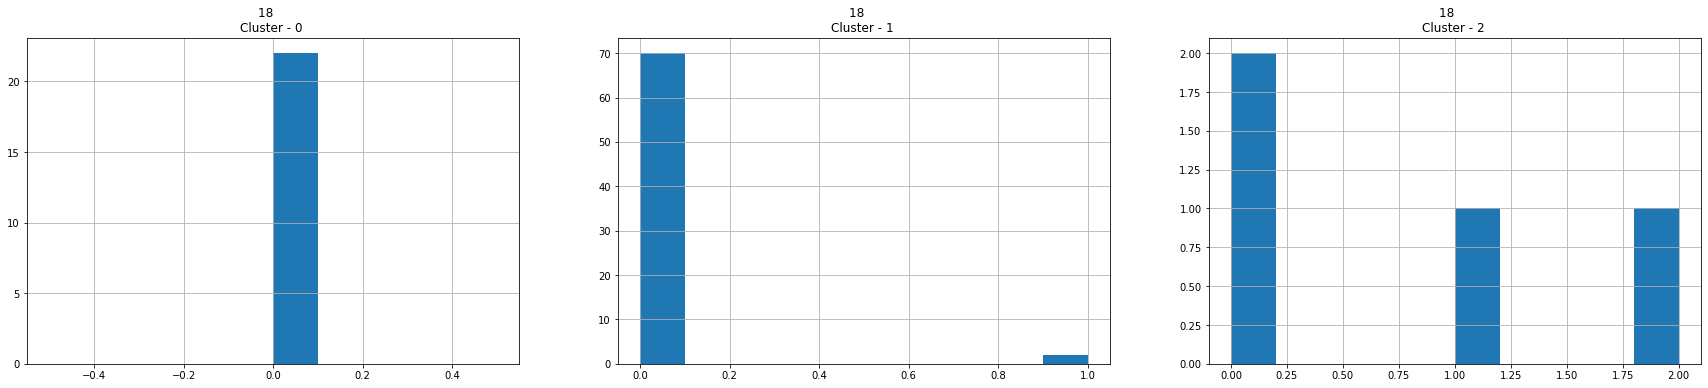

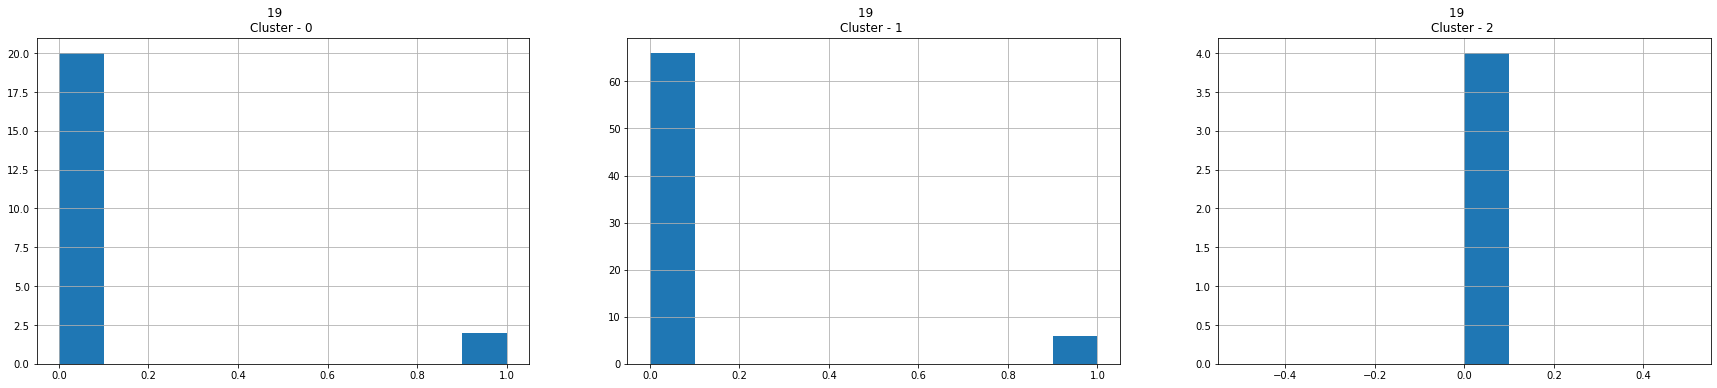

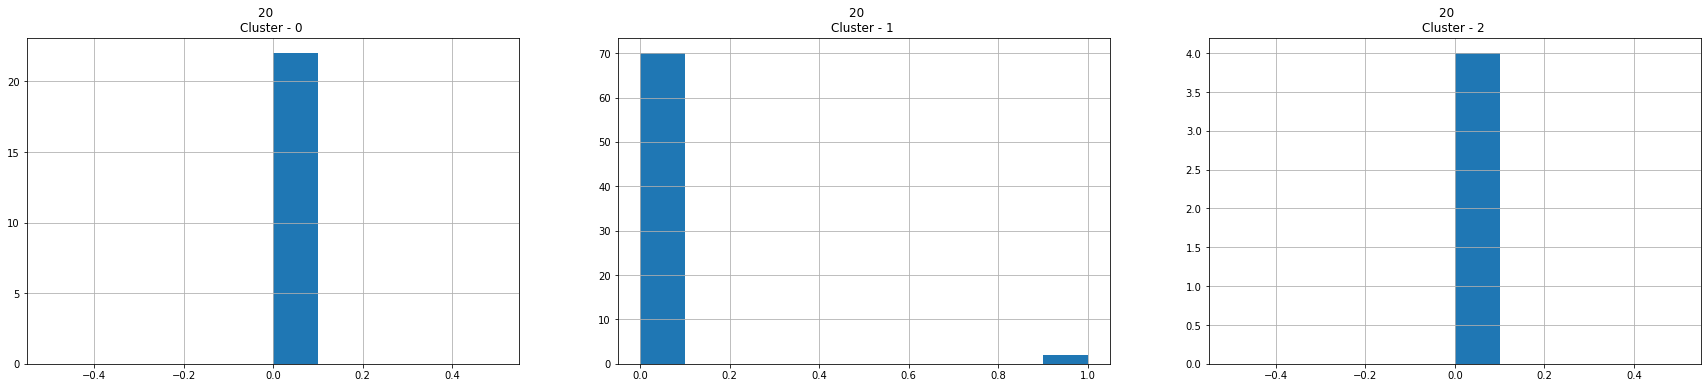

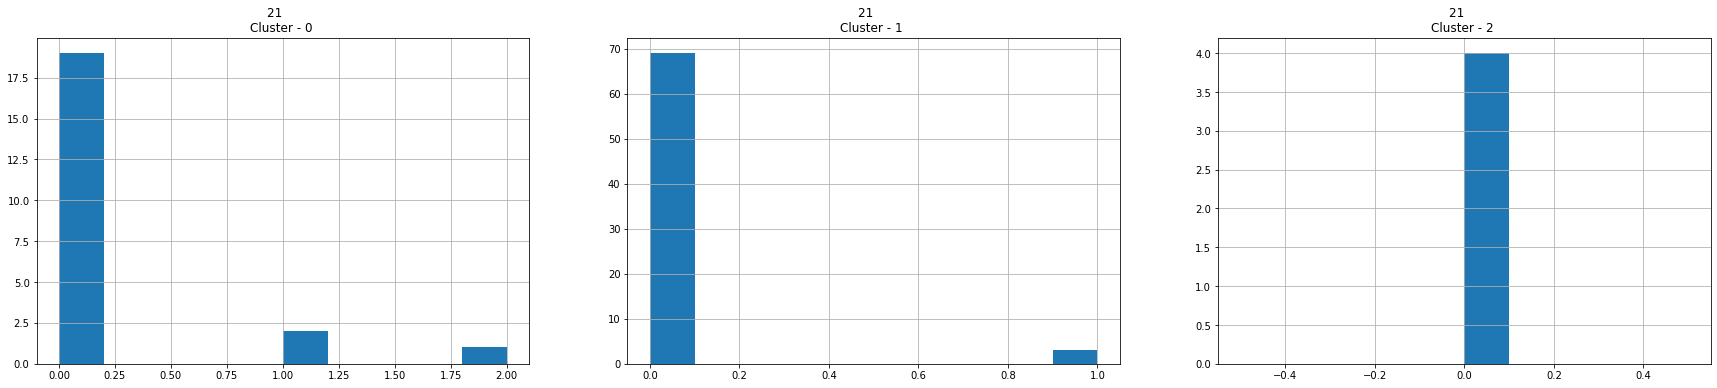

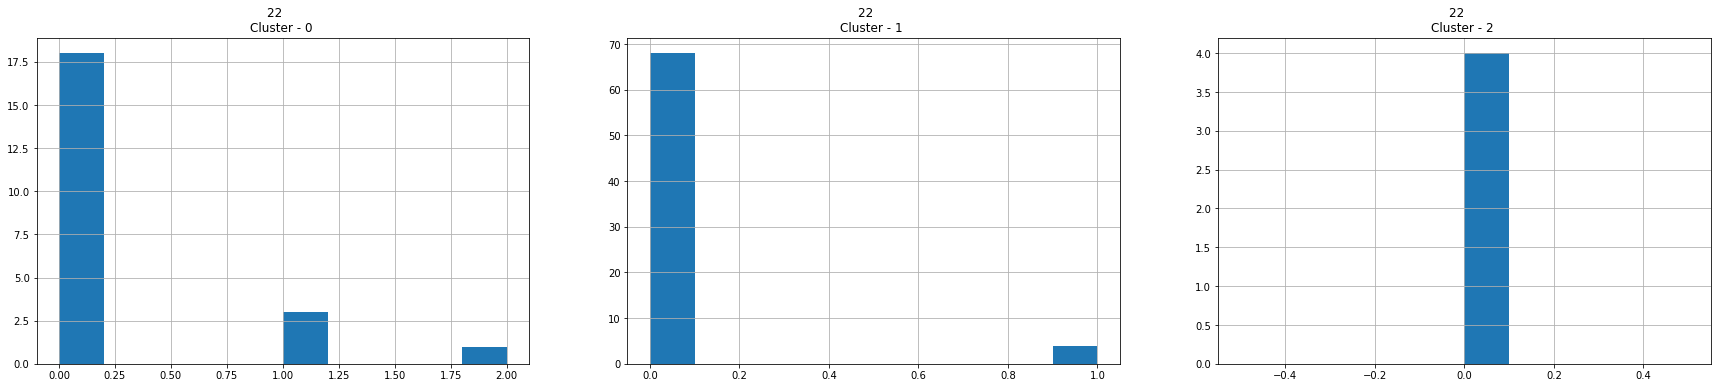

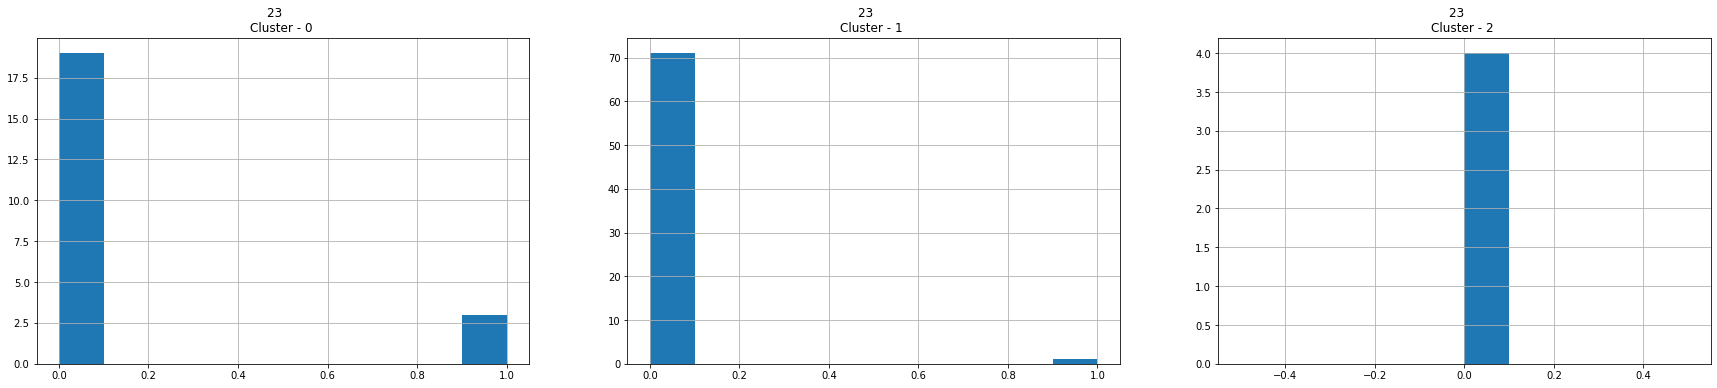

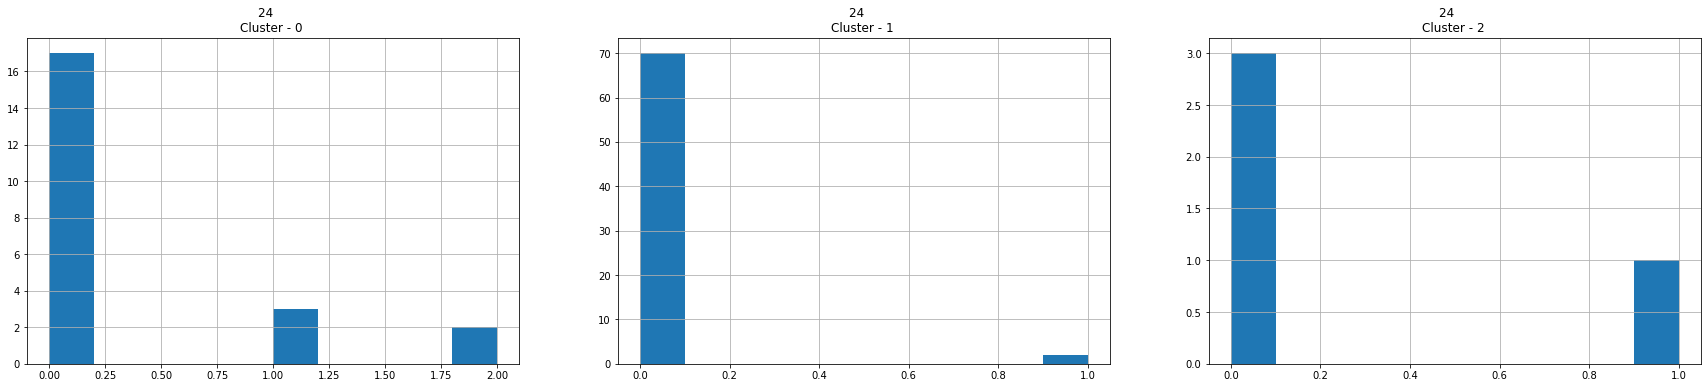

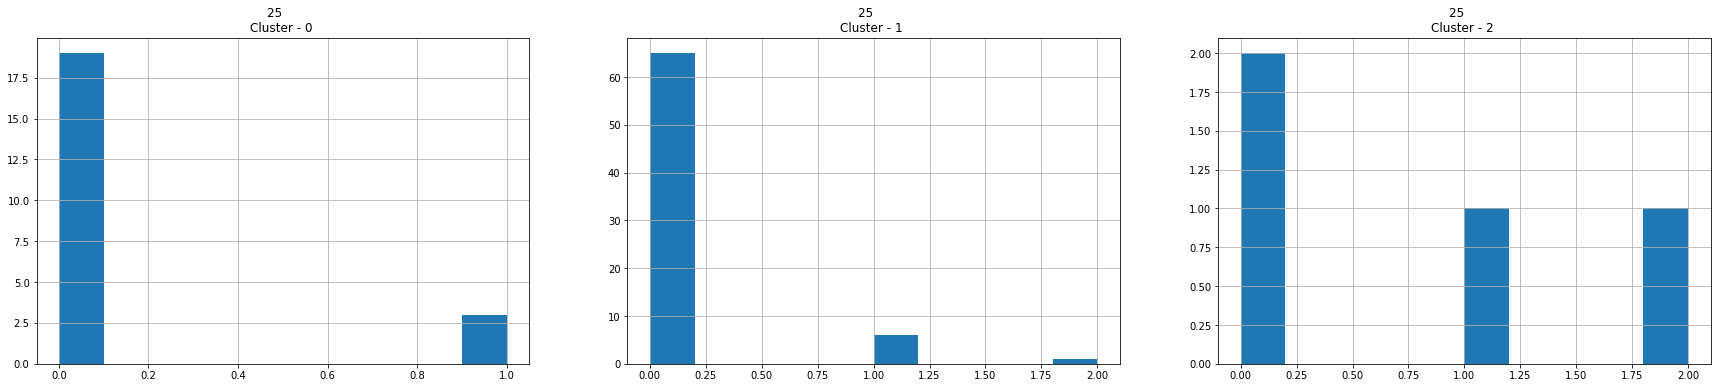

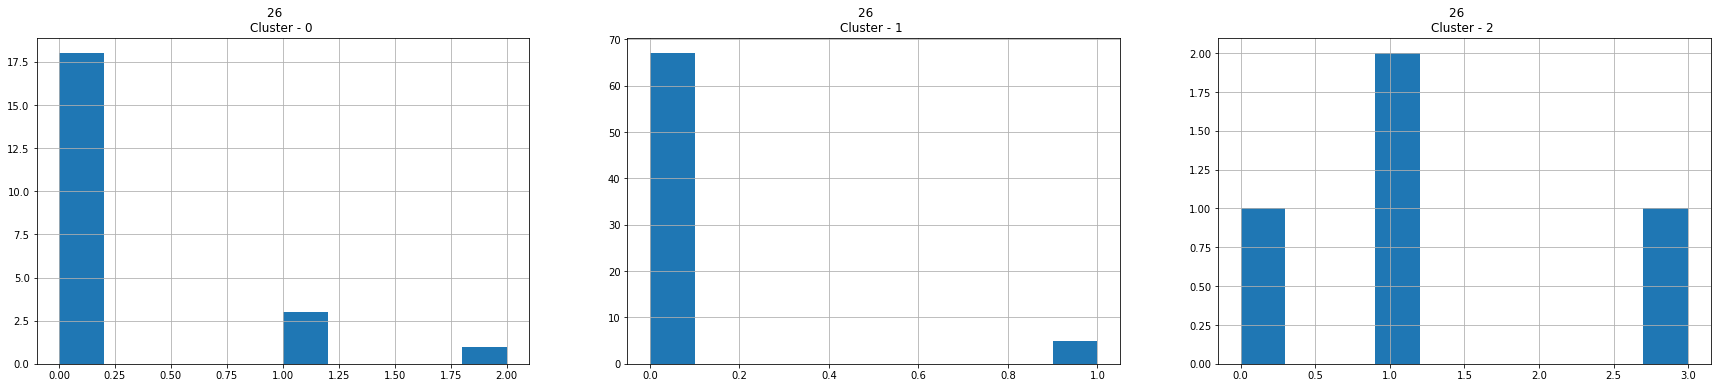

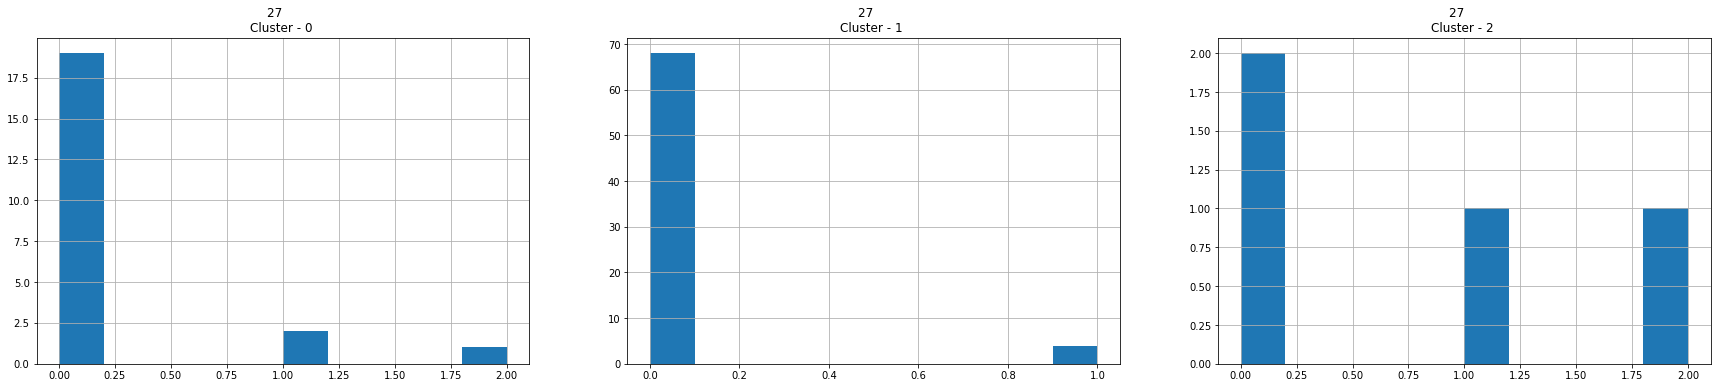

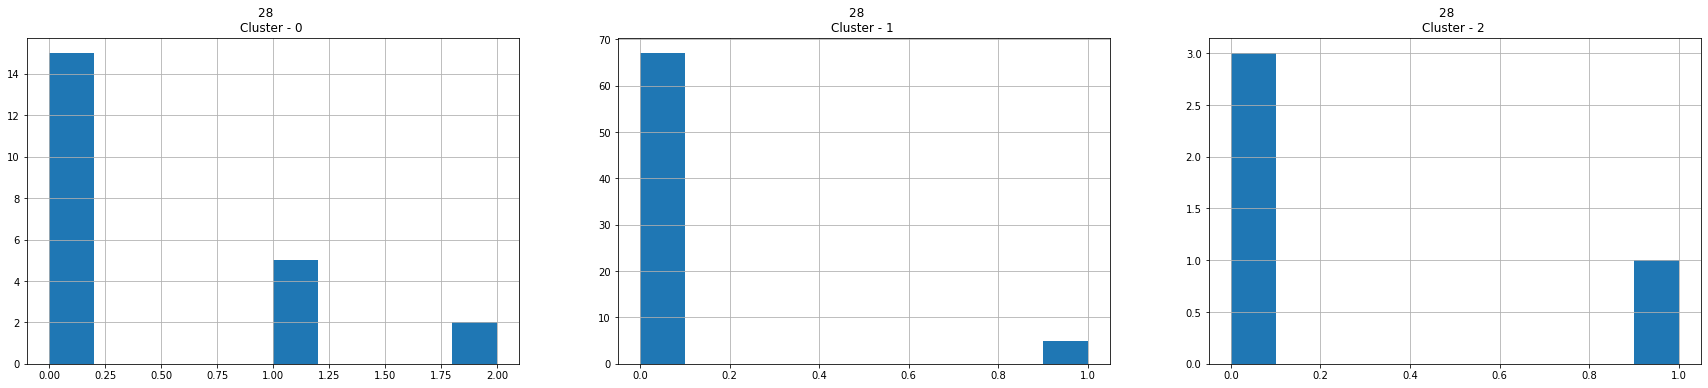

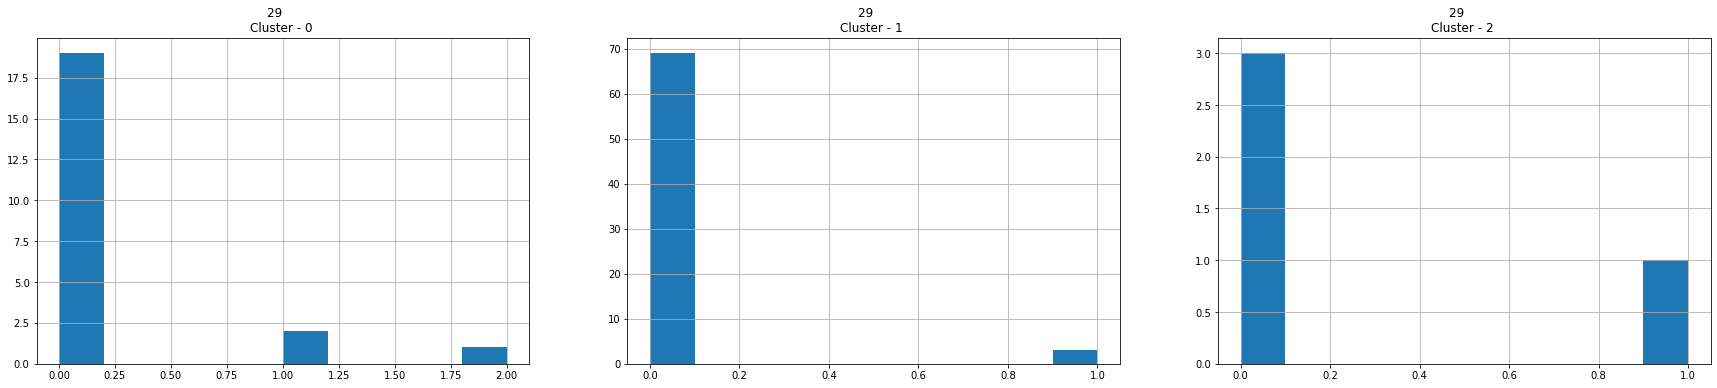

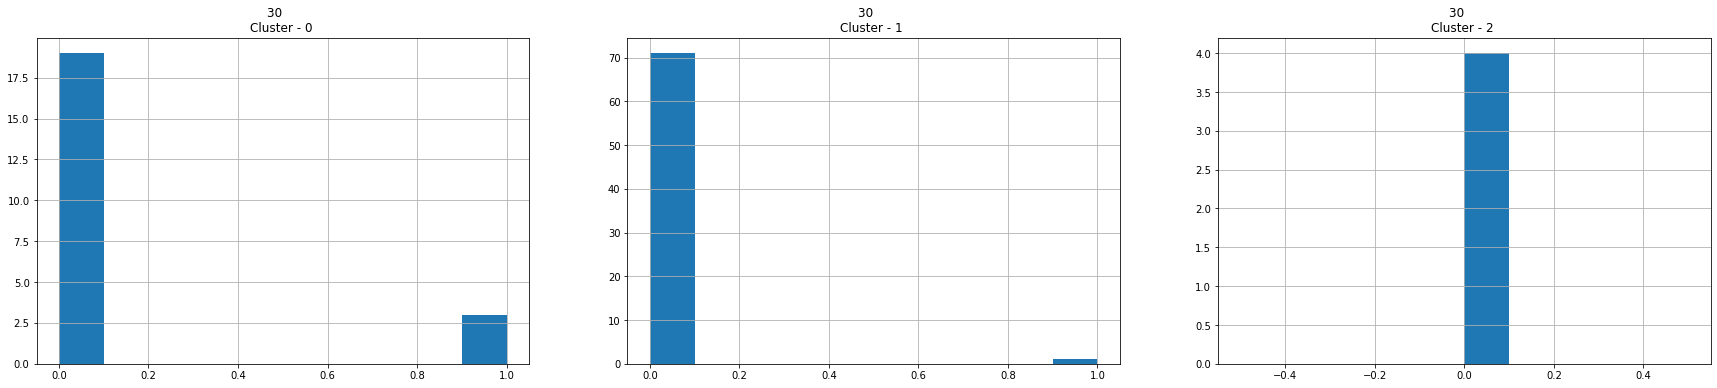

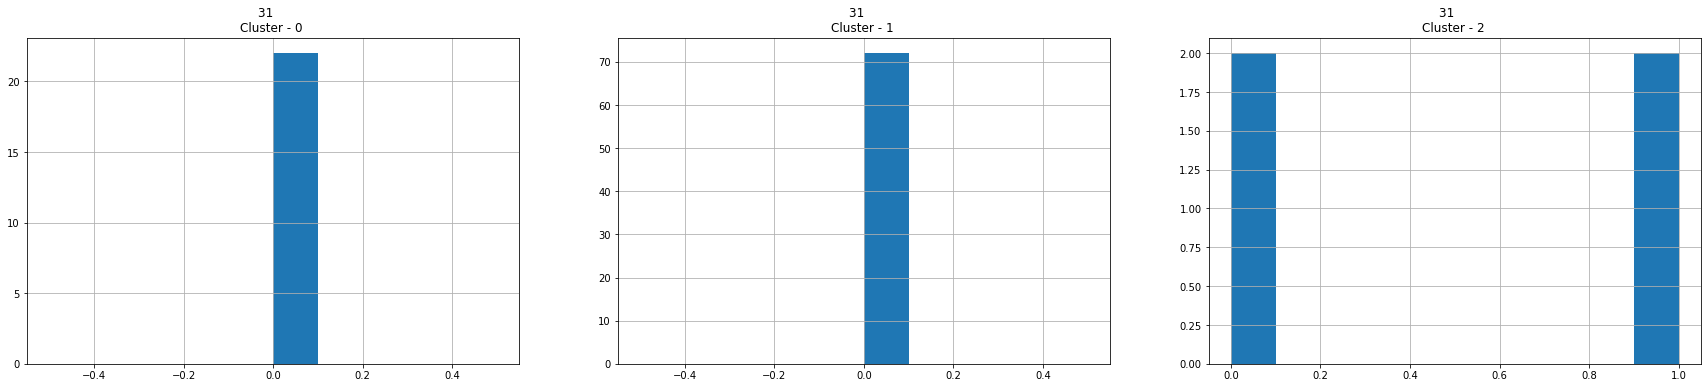

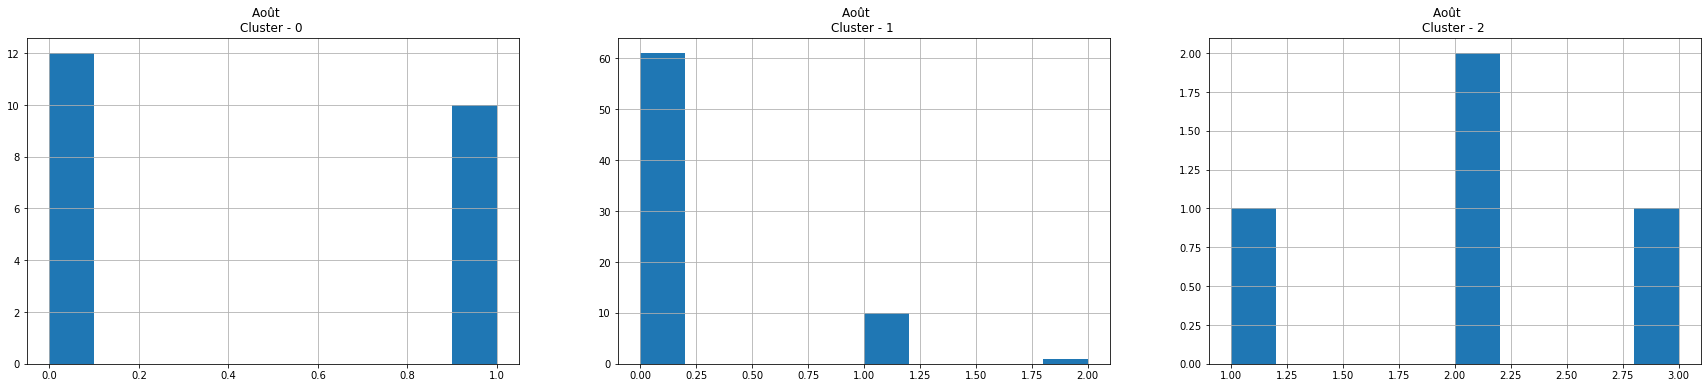

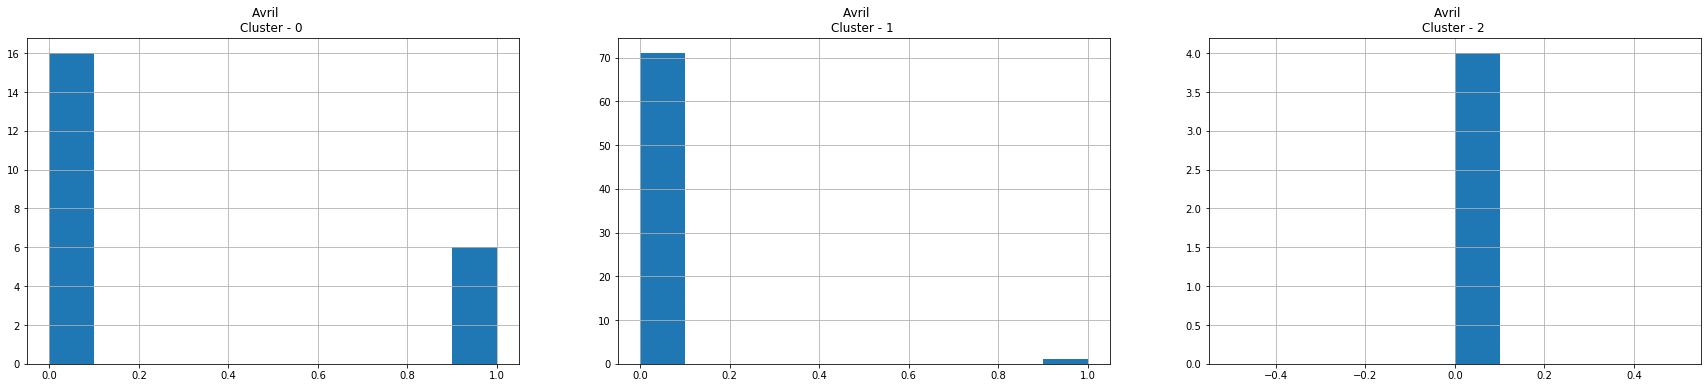

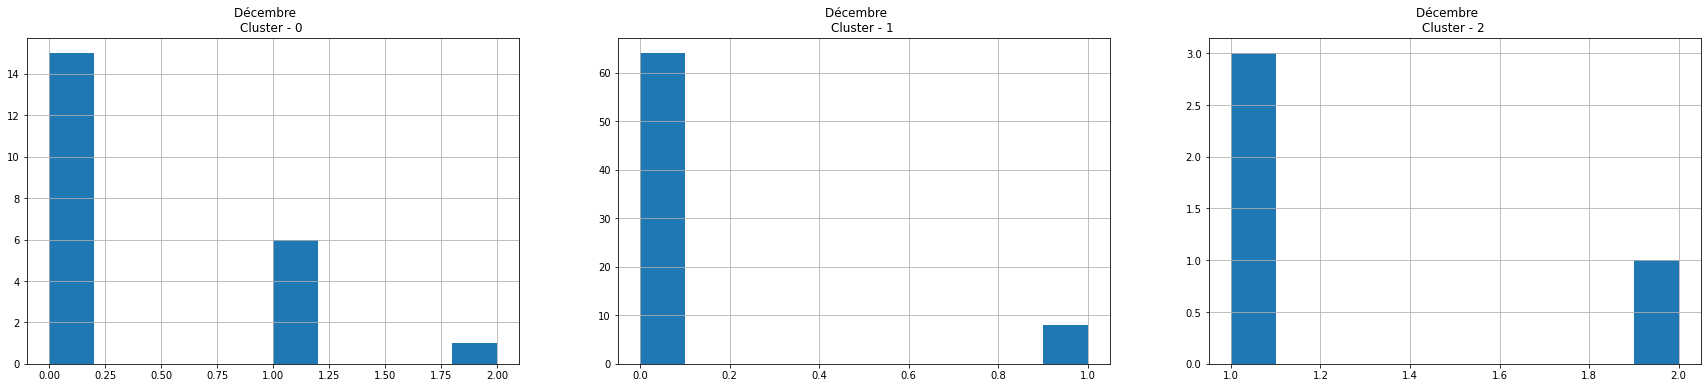

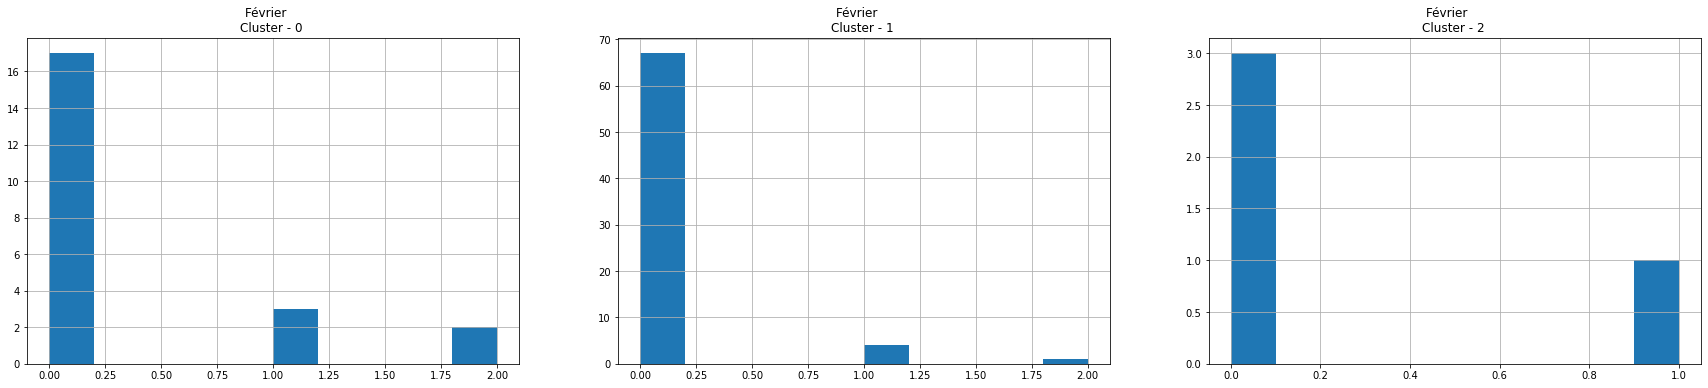

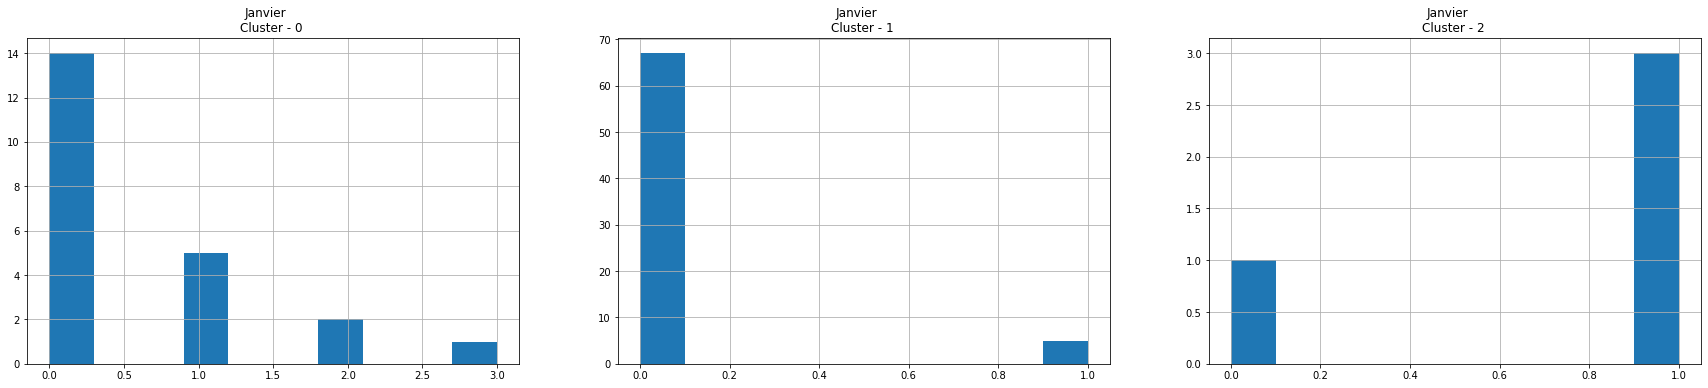

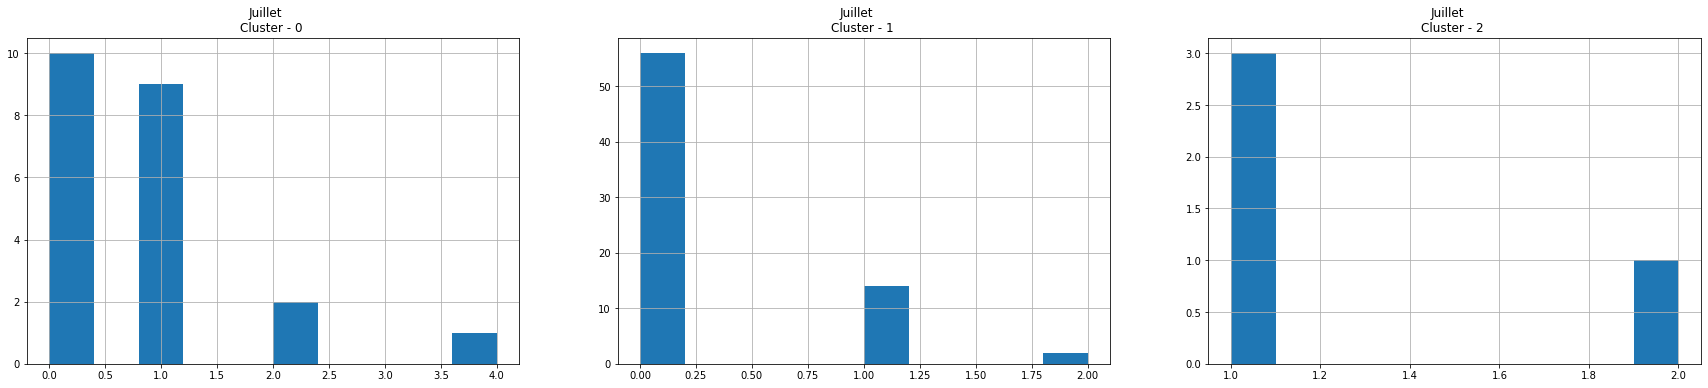

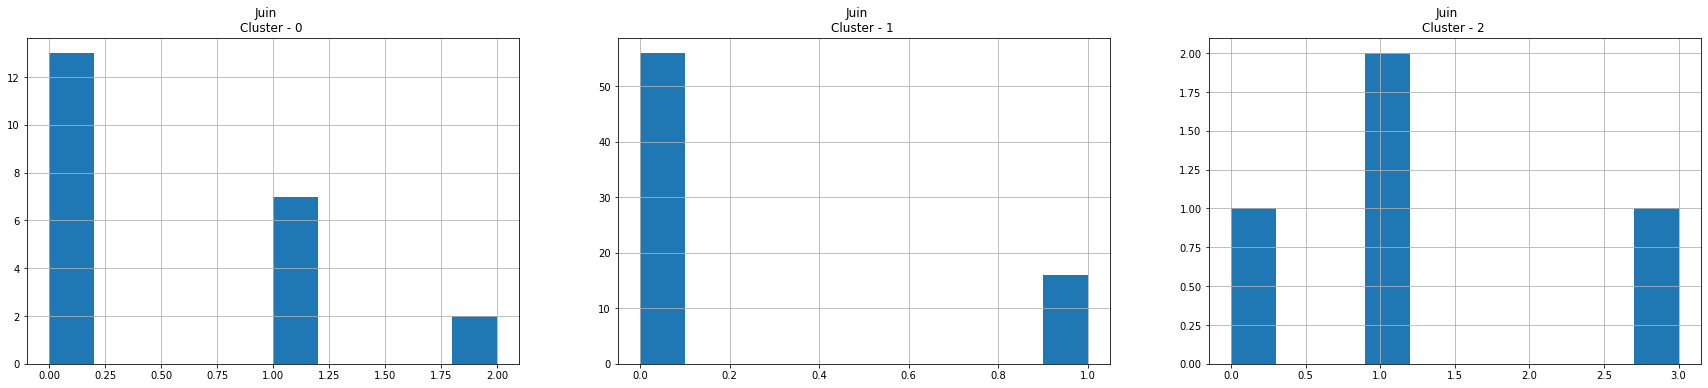

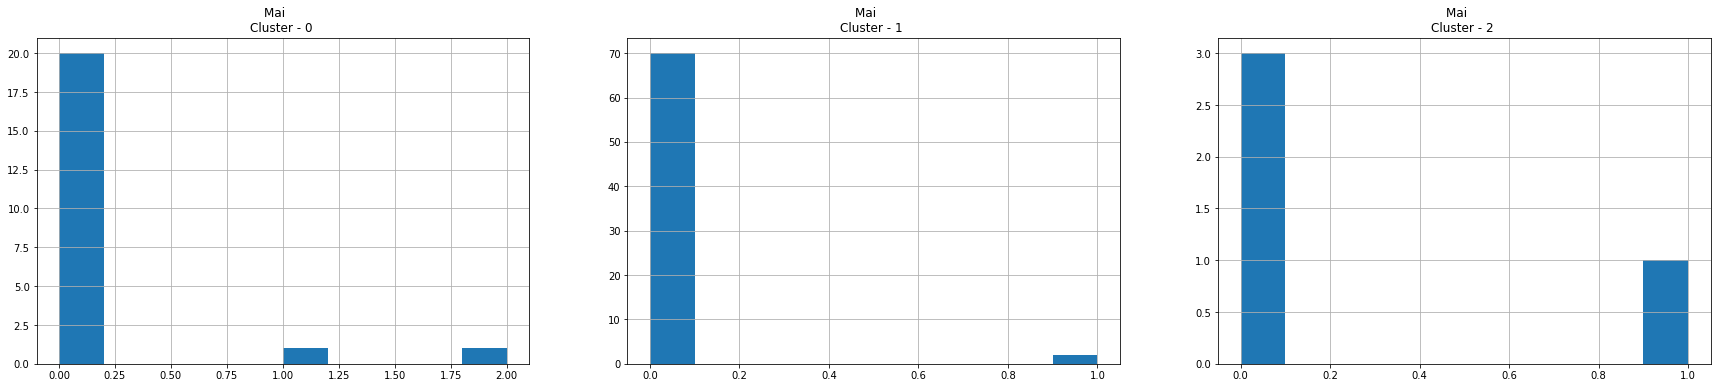

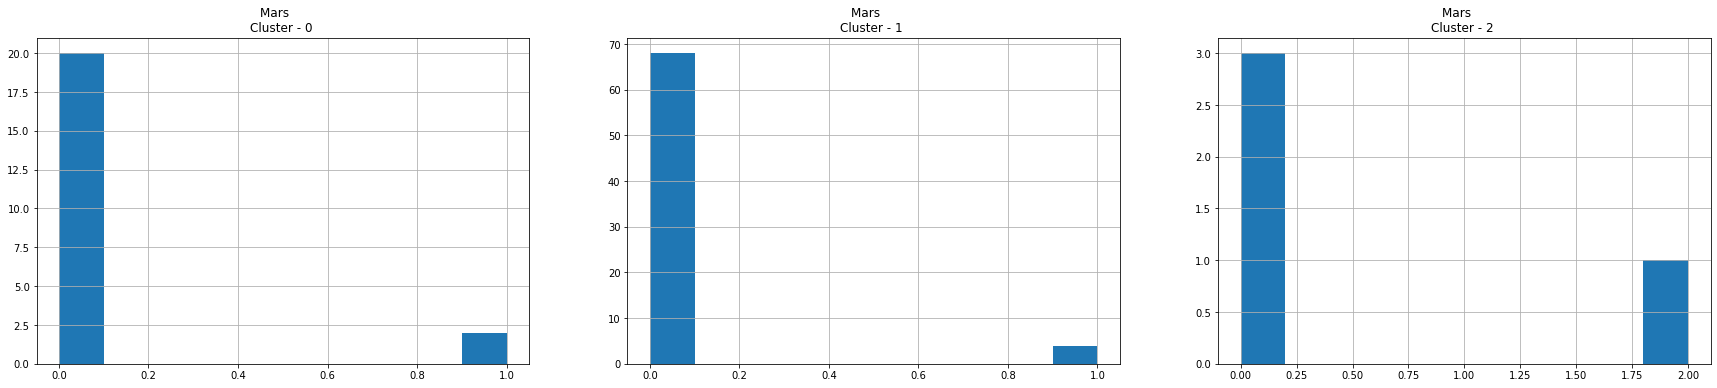

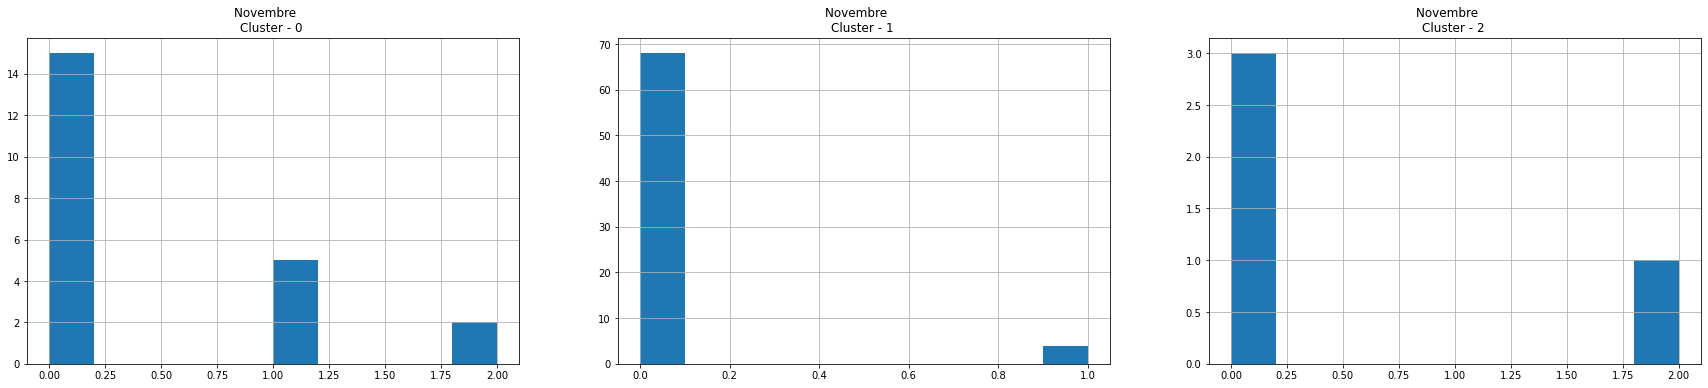

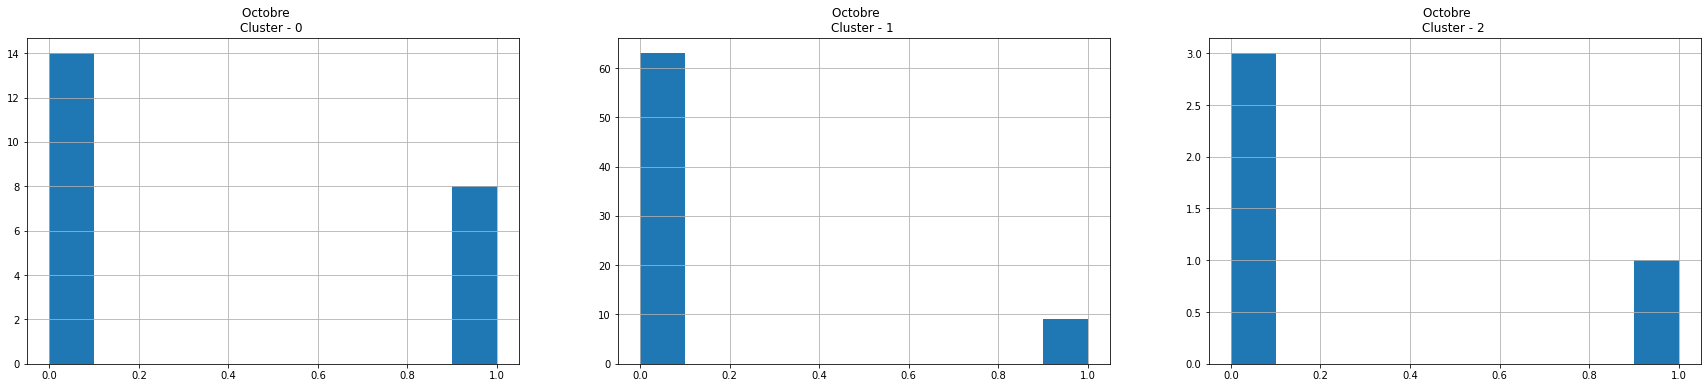

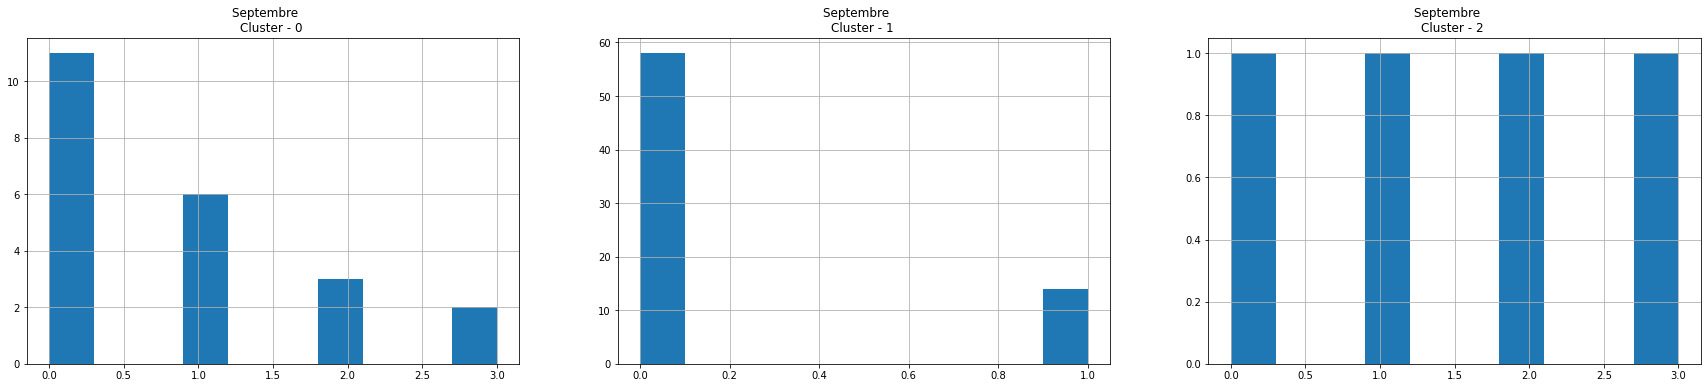

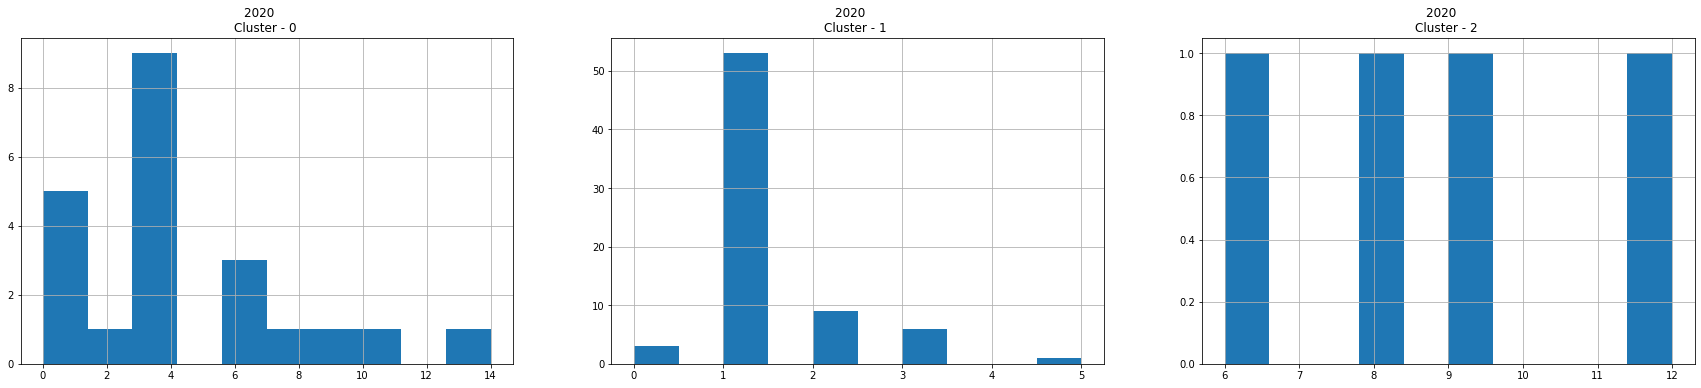

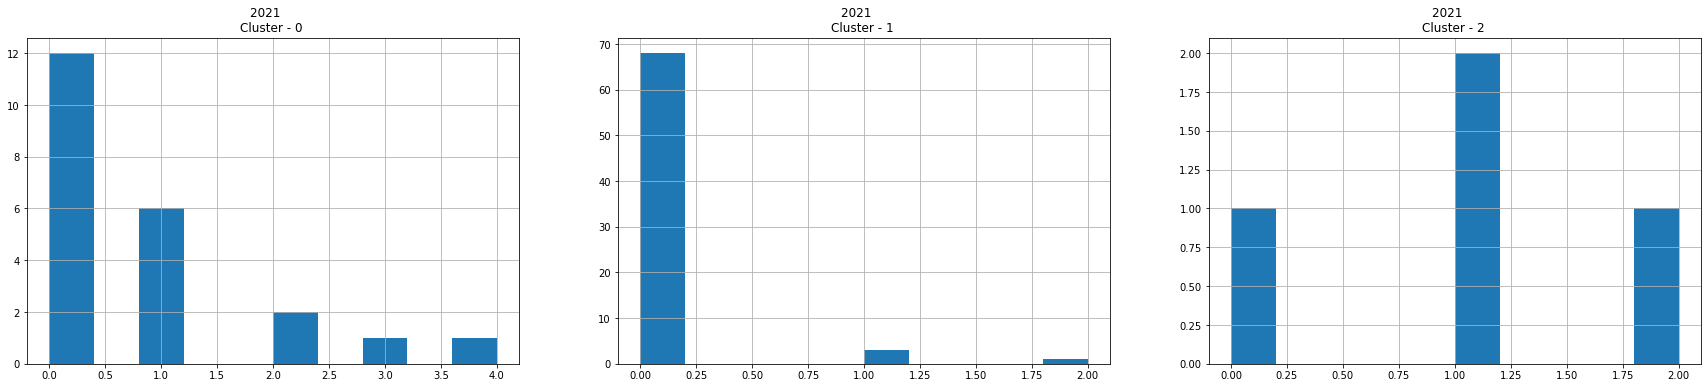

In [ ]:
# Représenter un histogramme pour chaque variable en fonction des clusters 
for i in new_sales_df_group.columns[:]:
  plt.figure(figsize = (30, 6))
  for j in range(3):
    plt.subplot(1, 3, j+1)
    cluster = new_df_cluster_dr[new_df_cluster_dr['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()

In [ ]:
# On détermine les centroïdes ou les clients typiques
kmeans2 = KMeans(2)
kmeans2.fit(pred)
labels2 = kmeans2.labels_
y_kmeans2 = kmeans2.fit_predict(new_sales_df_scaled)

In [ ]:
# On insére les cluster de chaque client
new_df_cluster_dr2 = pd.concat([new_sales_df_group2, pd.DataFrame({'cluster':labels2})], axis = 1)
new_df_cluster_dr2

Clients  Montant total de la commande  ...  2021  cluster
0            AISSATOU DIEYE KELLY                         34950  ...     0        0
1              Adama Diagne DIEME                         51550  ...     0        0
2           Adja Khadidiatou Faye                         46700  ...     0        0
3                    Aminata Diop                         11650  ...     0        0
4                  Aminata Kaloga                         86935  ...     1        1
..                            ...                           ...  ...   ...      ...
93  Sokhna Sophie Isabelle Ndiaye                         23800  ...     0        0
94                    Wone Maguee                          8050  ...     0        0
95                   Yacine Ndour                         25650  ...     0        0
96                  Yasmin akhdar                         13100  ...     0        0
97                 Yasmina Akkouh                         79850  ...     0        0

[98 rows x 85 columns]

In [ ]:
# Les clusters
cluster_centers2 = pd.DataFrame(data = kmeans2.cluster_centers_, columns = [new_sales_df_group.columns])
cluster_centers2

Montant total de la commande Nbres Articles  ...      2020      2021
0                    -0.252916      -0.320334  ... -0.313656 -0.185394
1                     1.812566       2.295726  ...  2.247870  1.328659

[2 rows x 83 columns]

In [ ]:
# On effectuer une inversion pour retrouver les valeurs avant normalisation
cluster_centers2 = scaler.inverse_transform(cluster_centers2)
cluster_centers2 = pd.DataFrame(data = cluster_centers2, columns = [new_sales_df_group.columns])
cluster_centers2

Montant total de la commande Nbres Articles  ...      2020      2021
0                 32460.000000       1.616279  ...  1.476744  0.139535
1                216229.166667       9.166667  ...  8.000000  1.166667

[2 rows x 83 columns]

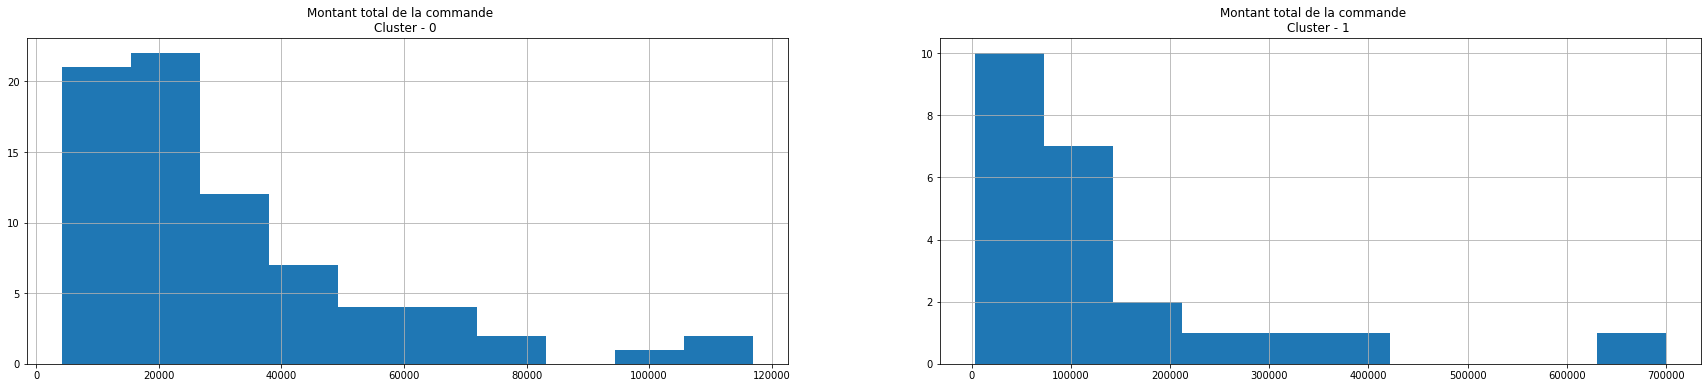

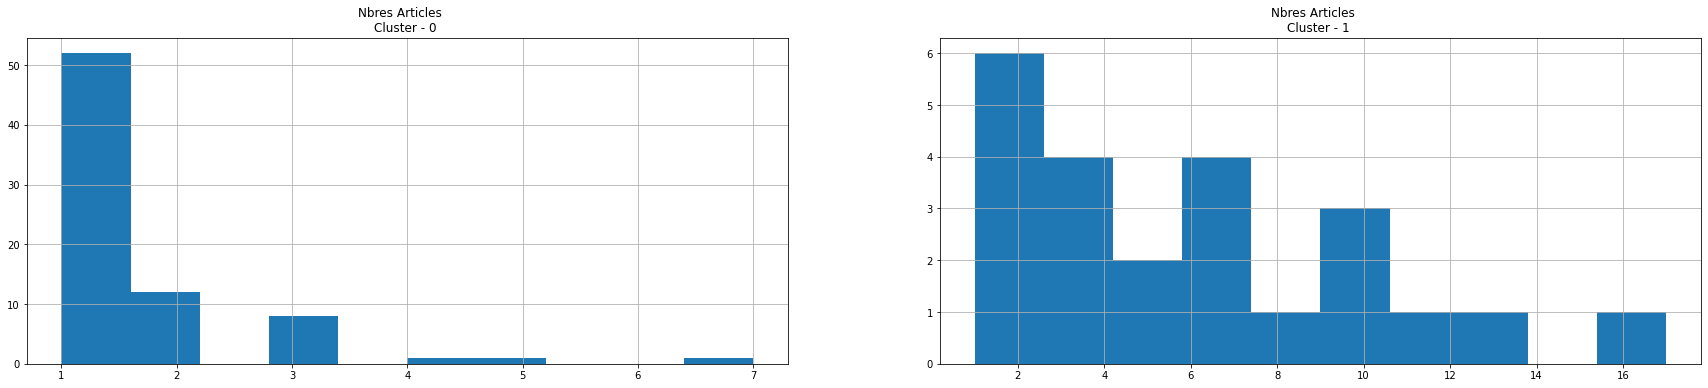

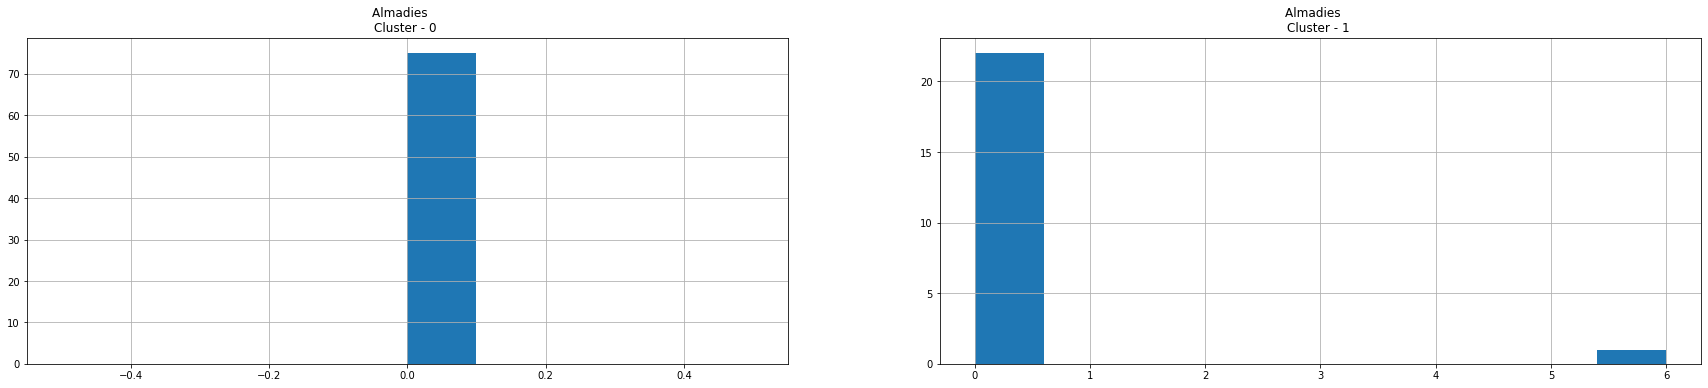

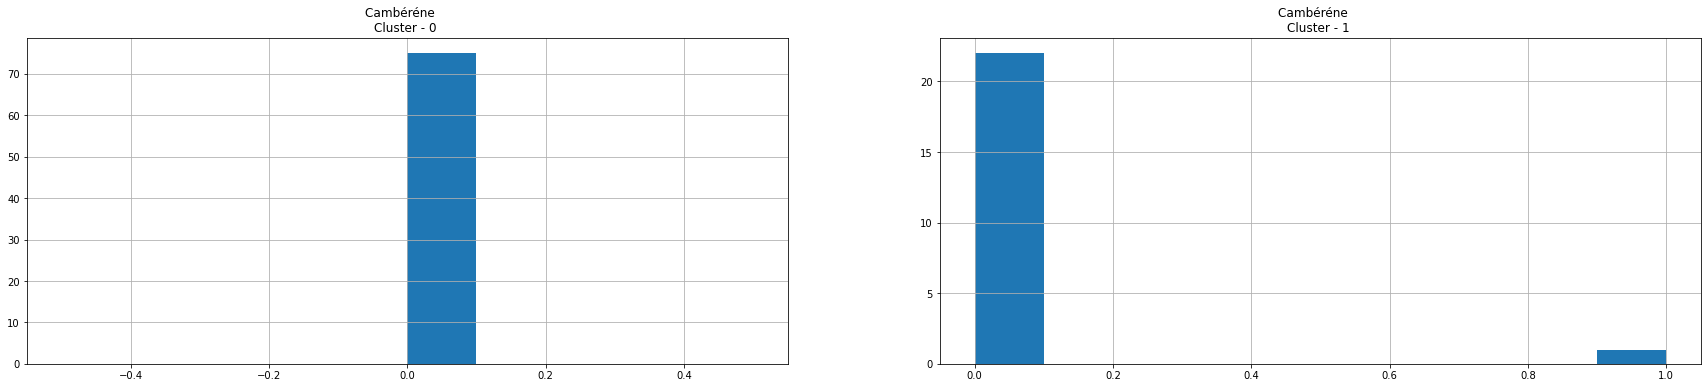

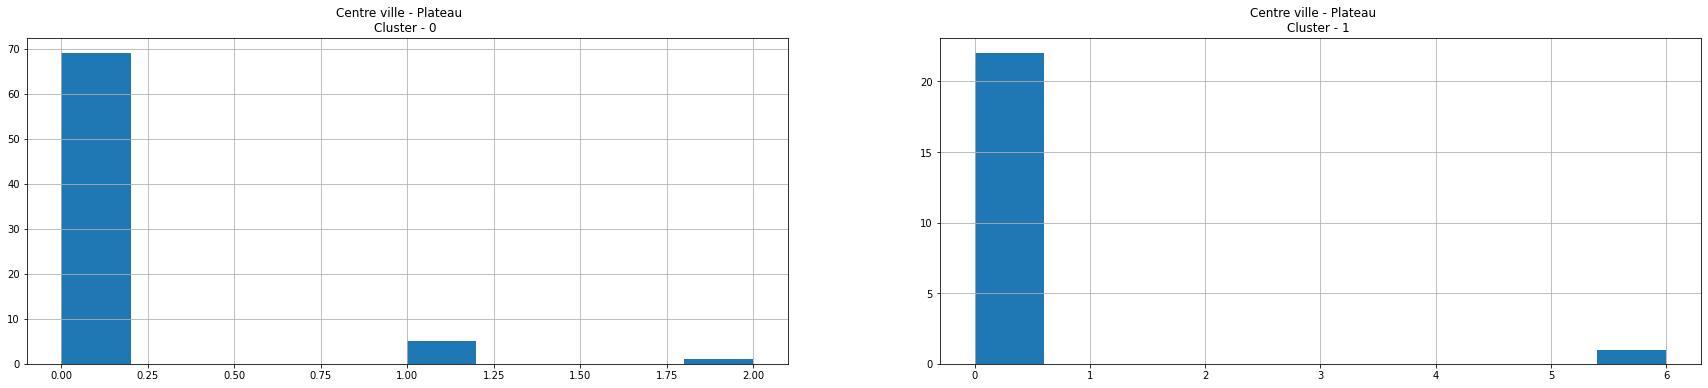

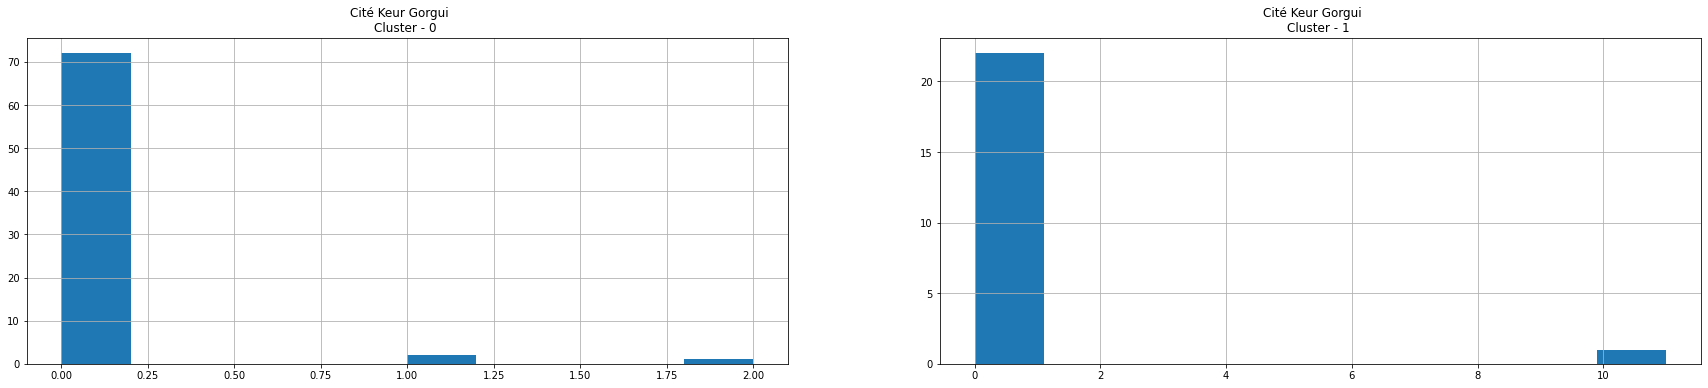

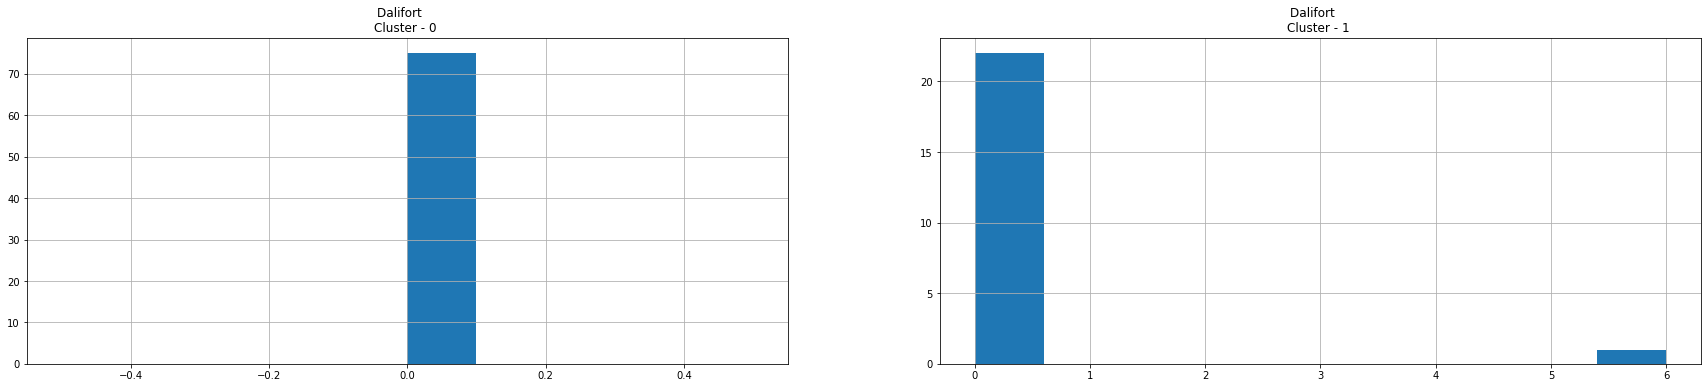

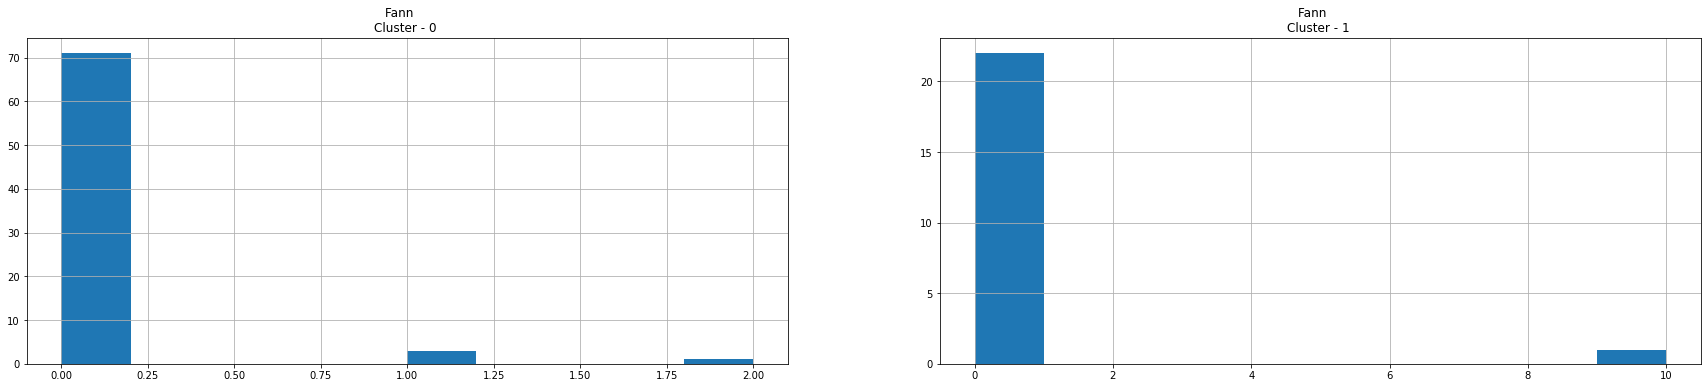

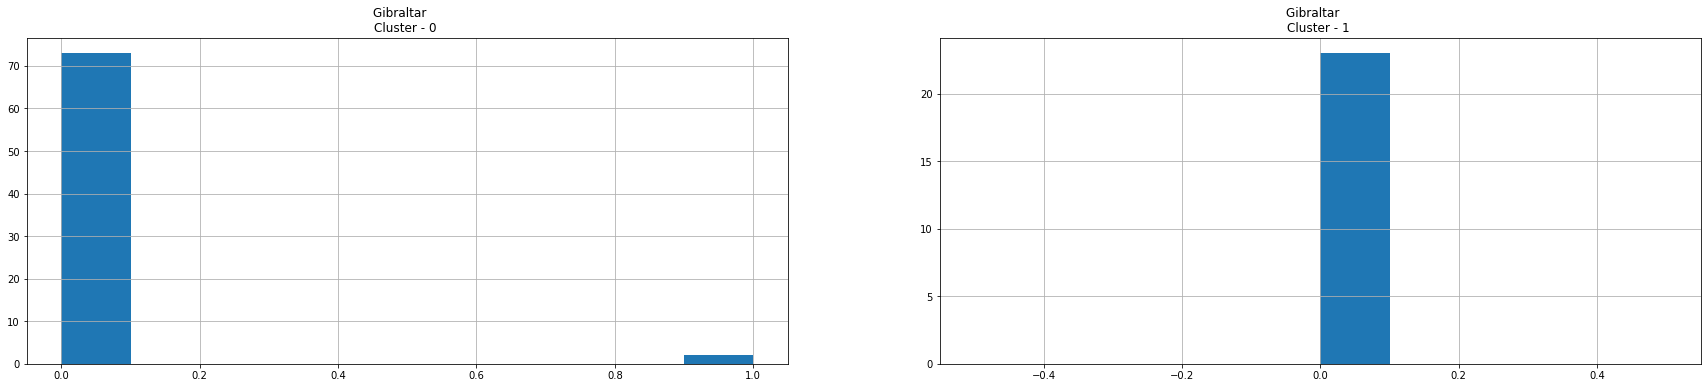

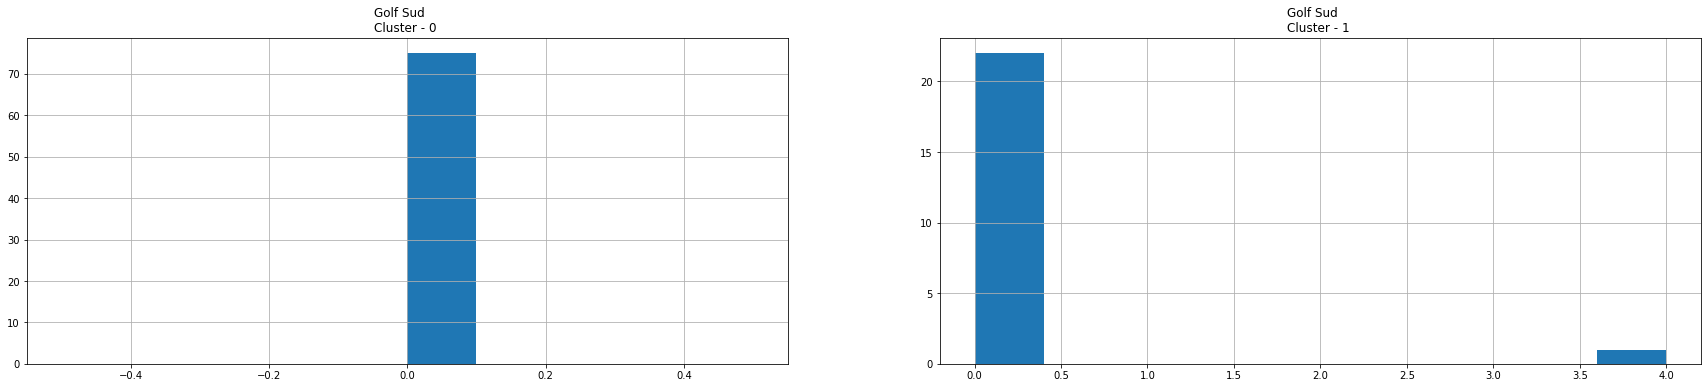

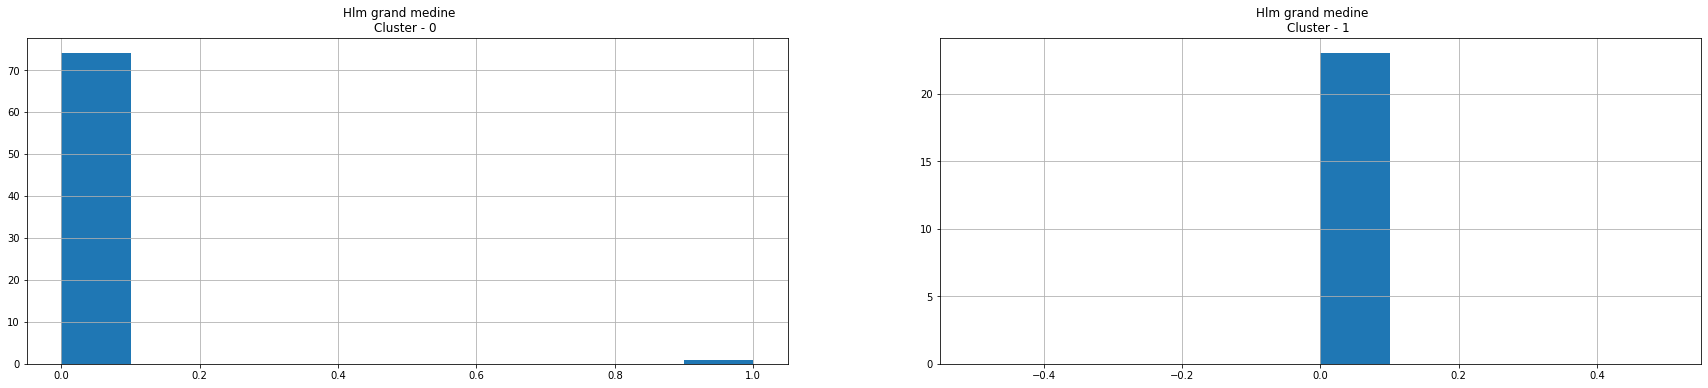

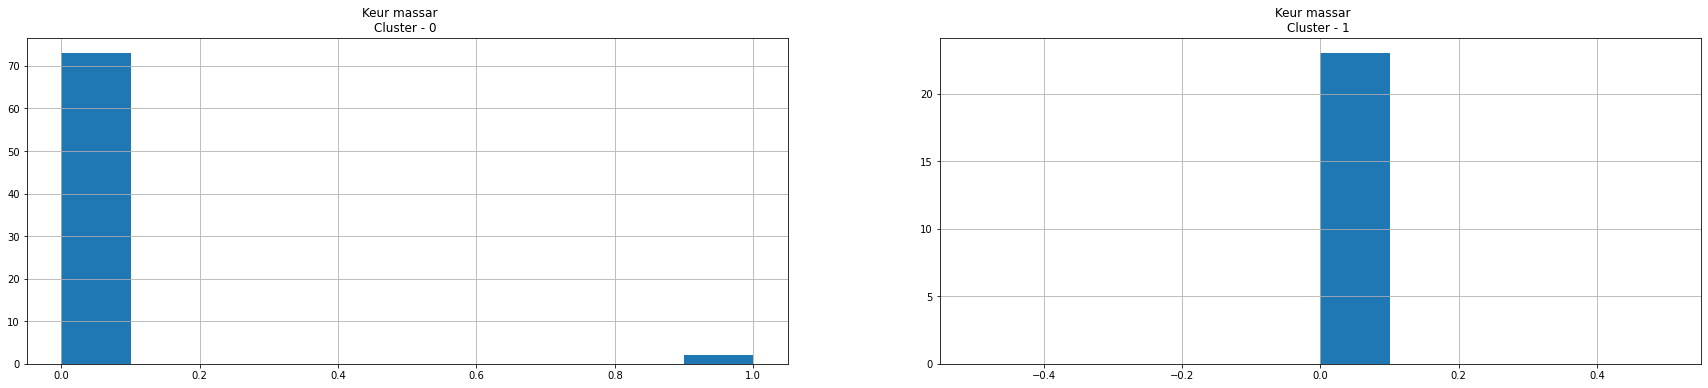

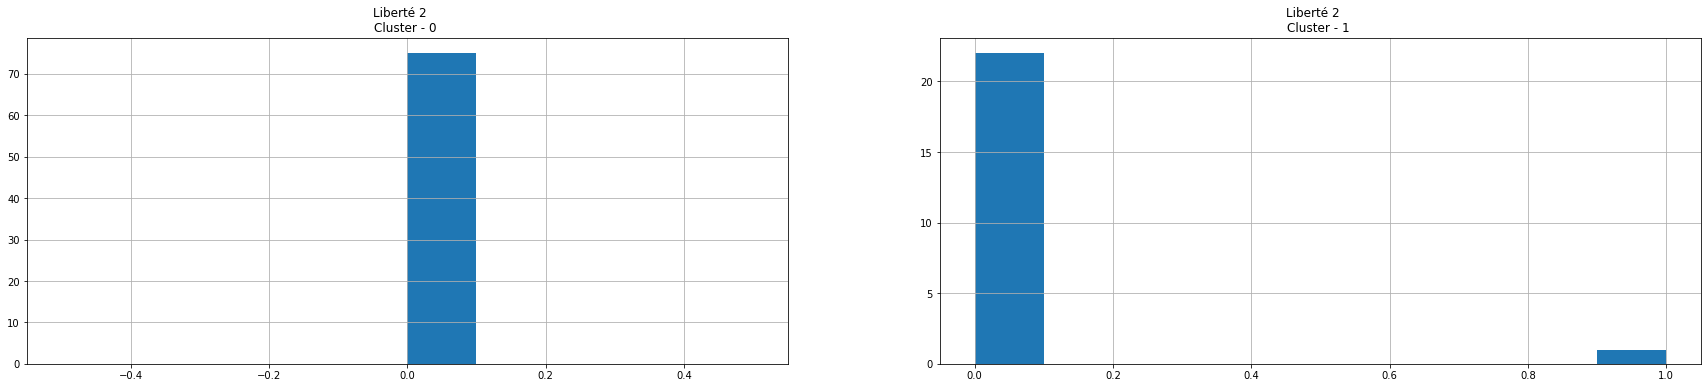

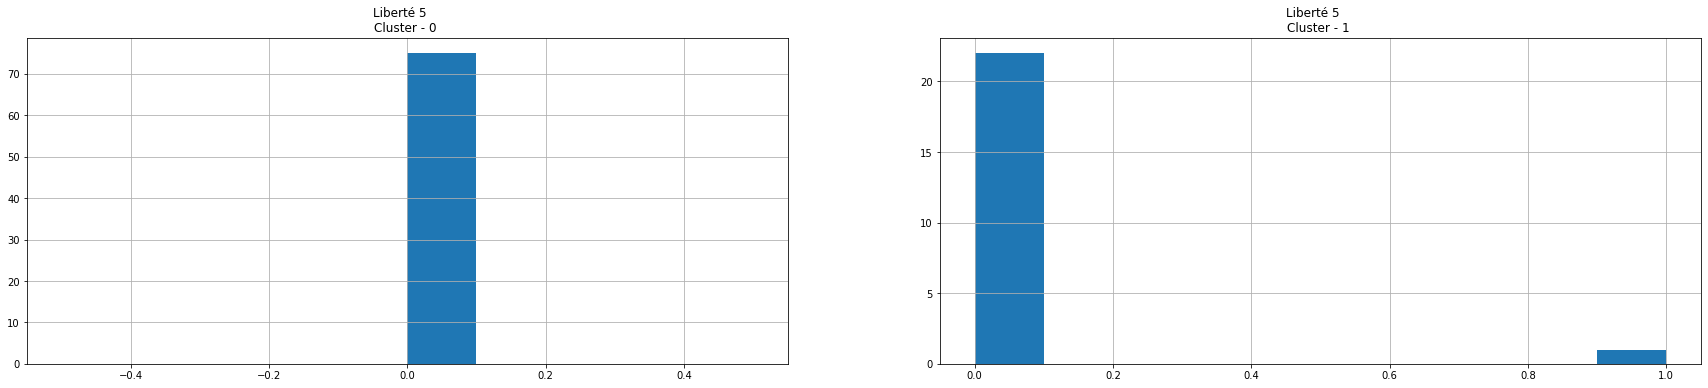

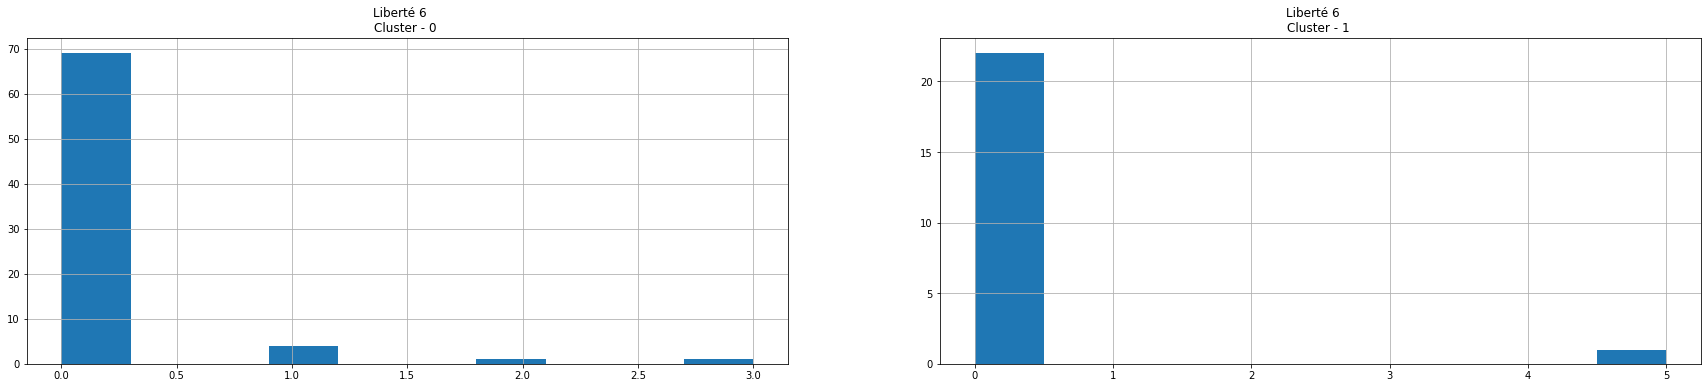

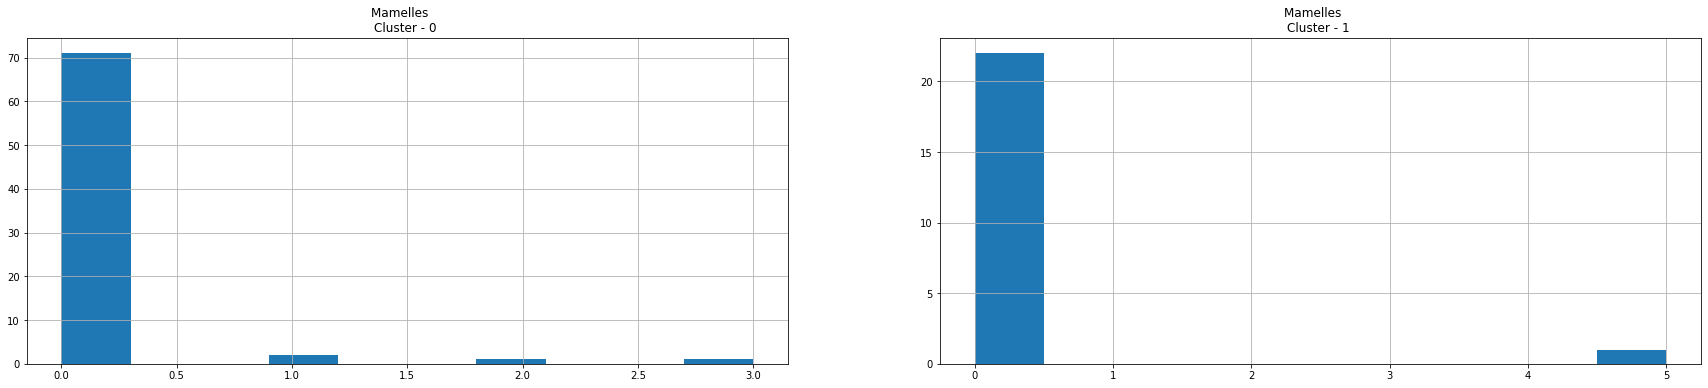

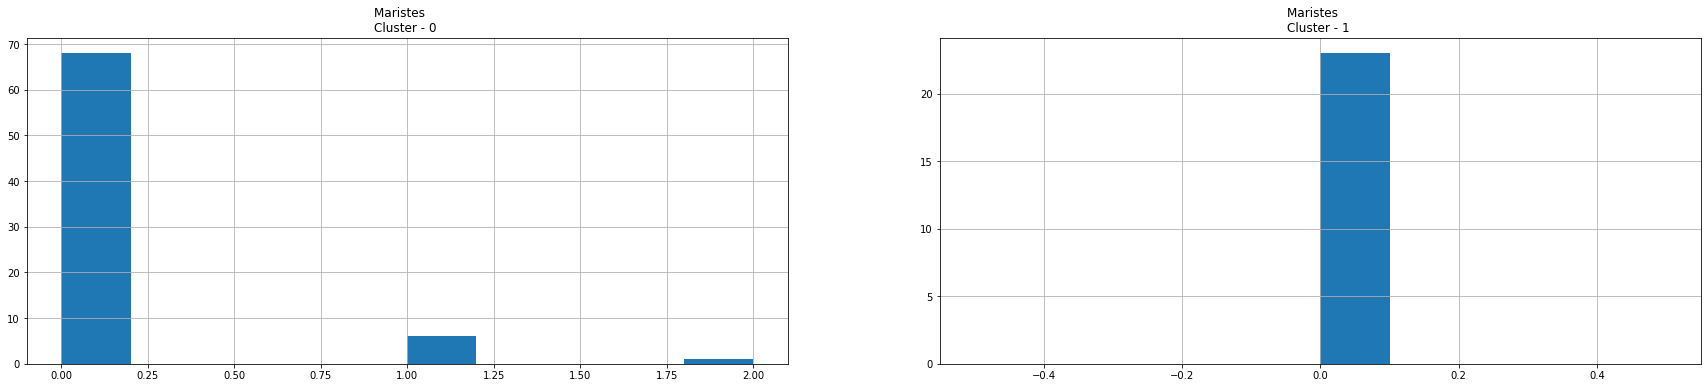

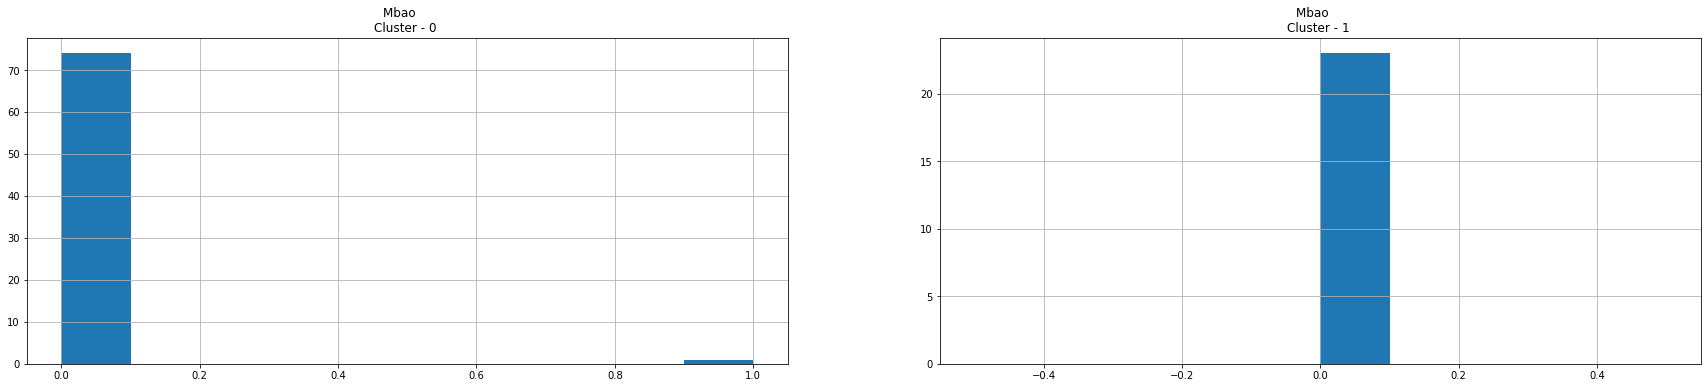

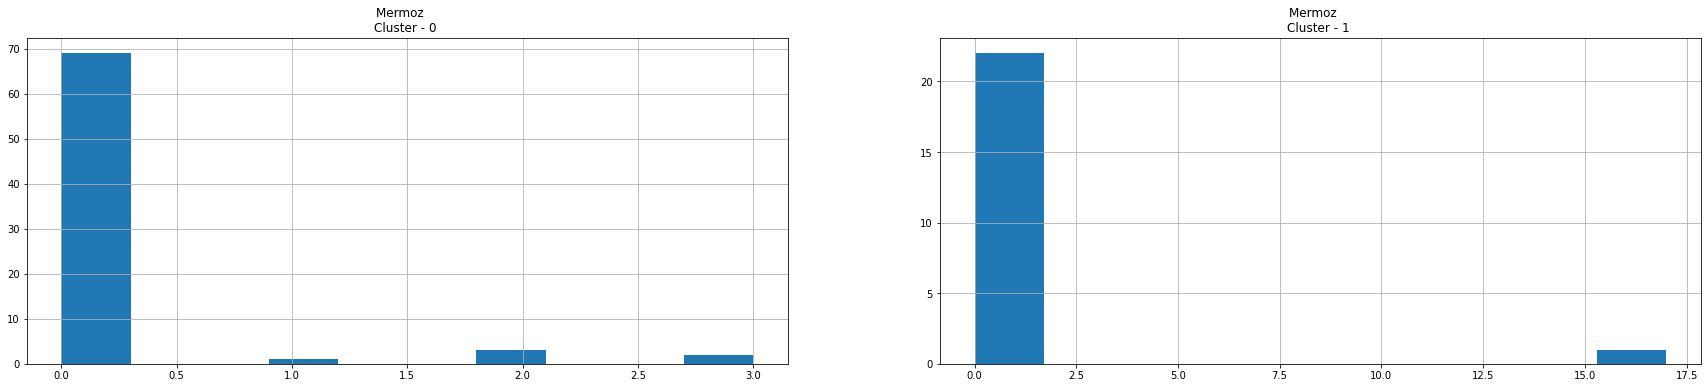

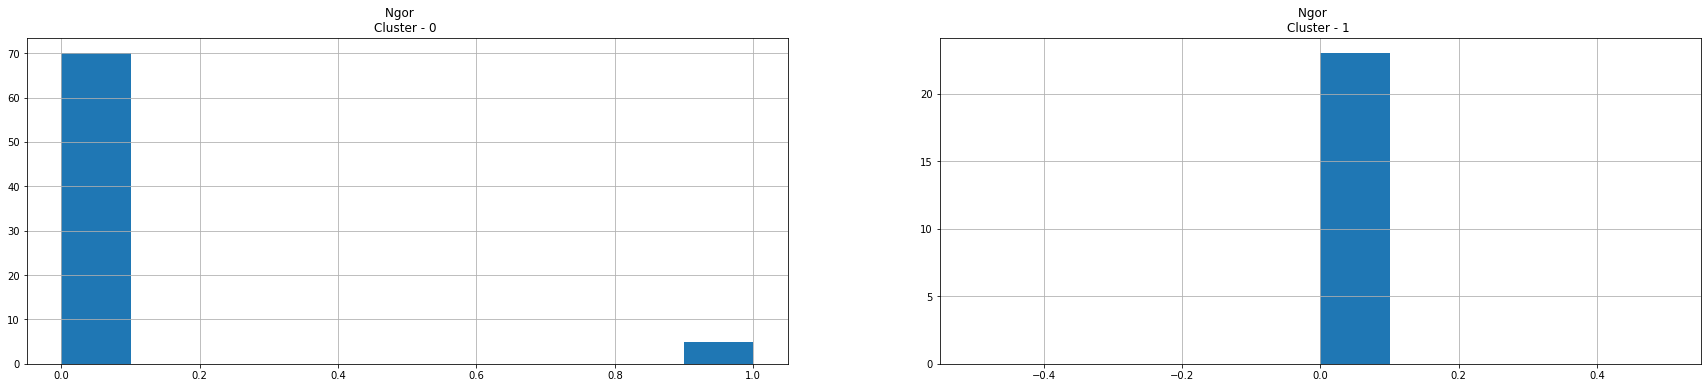

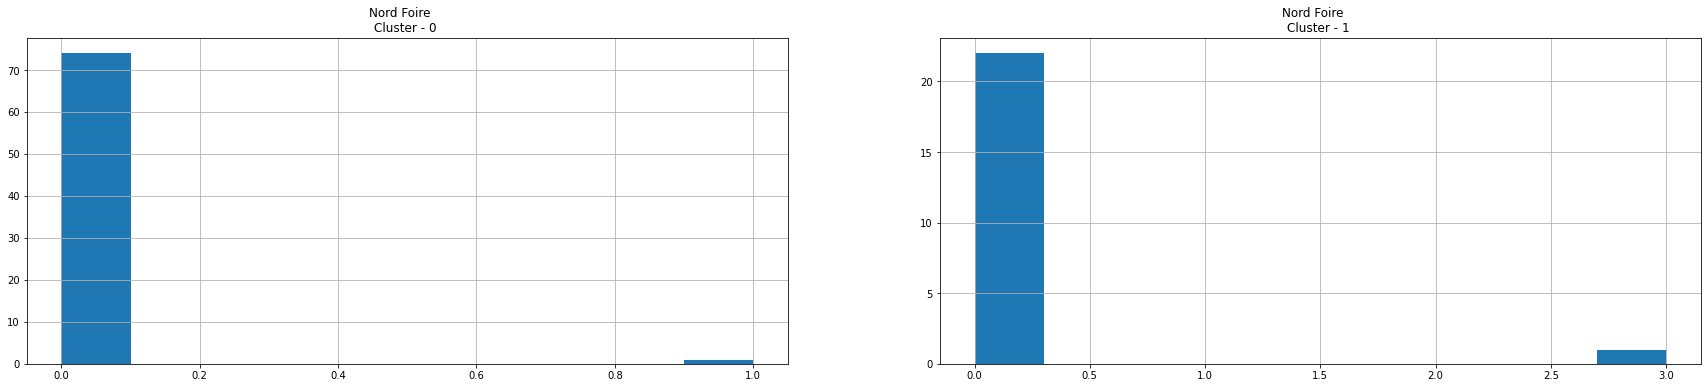

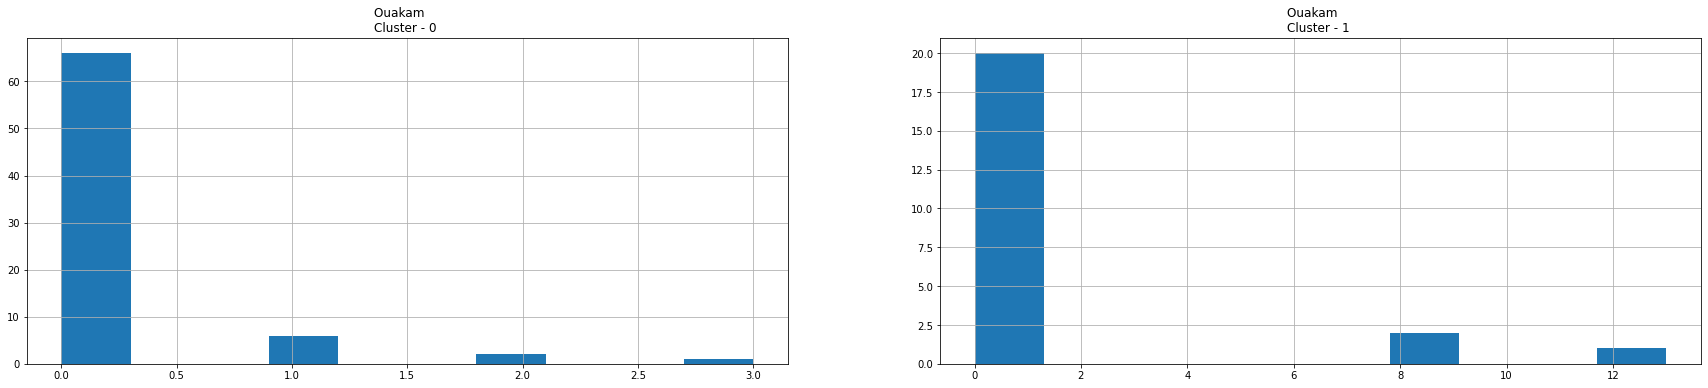

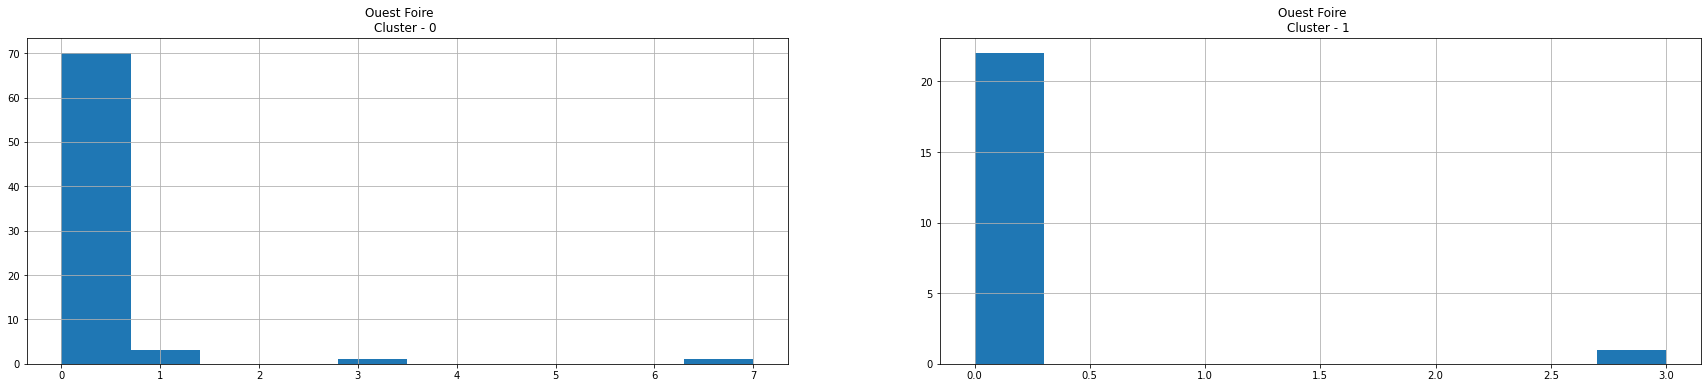

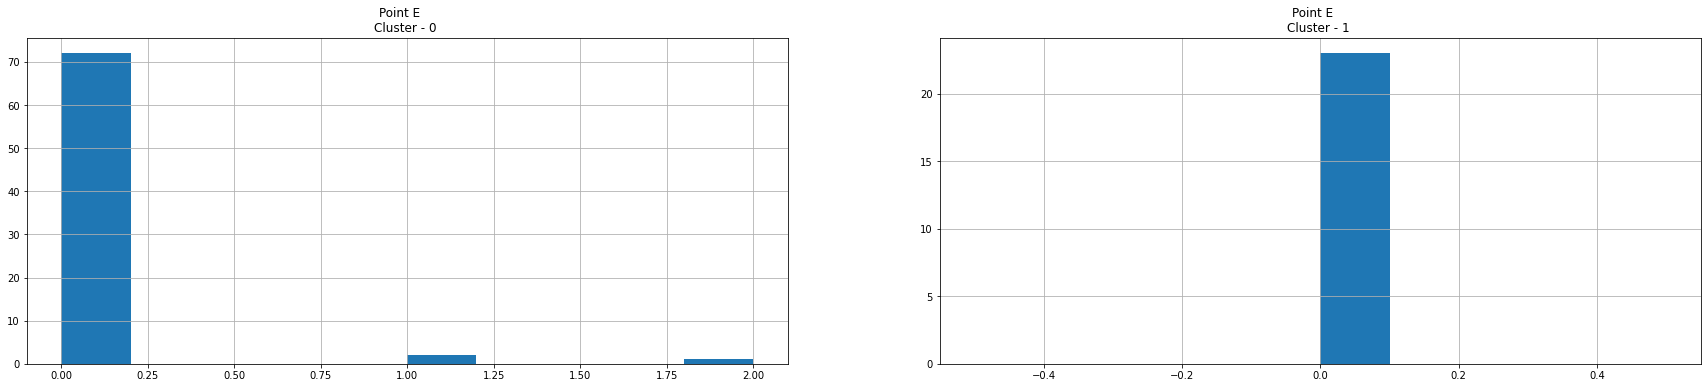

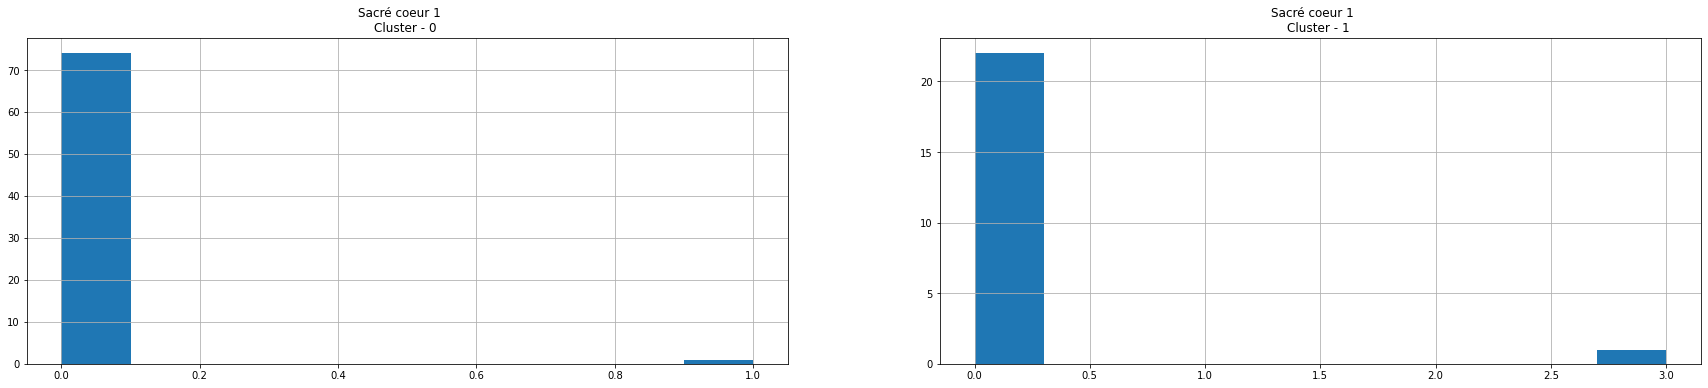

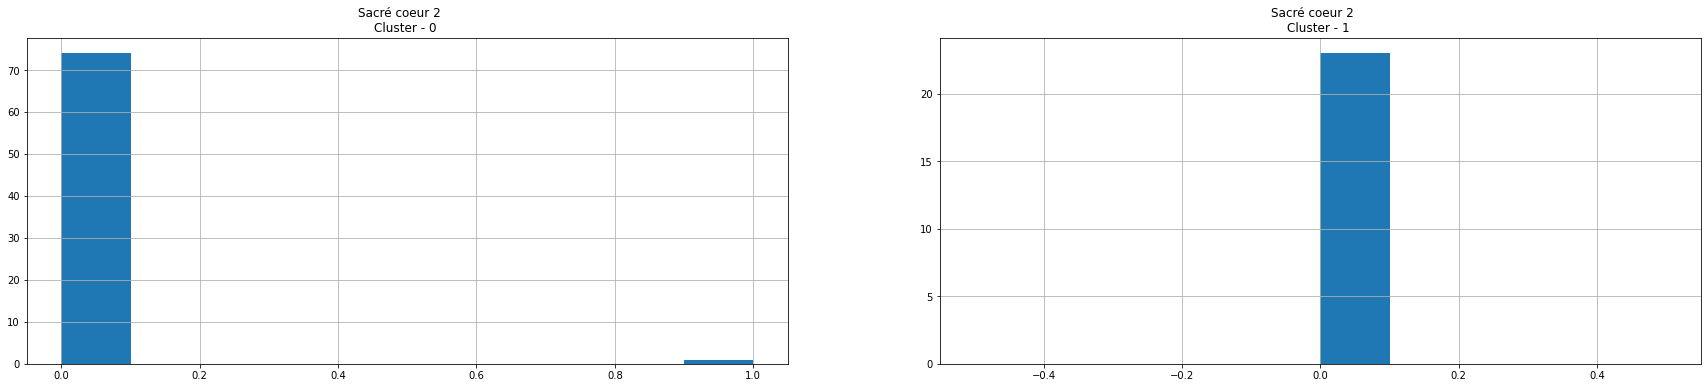

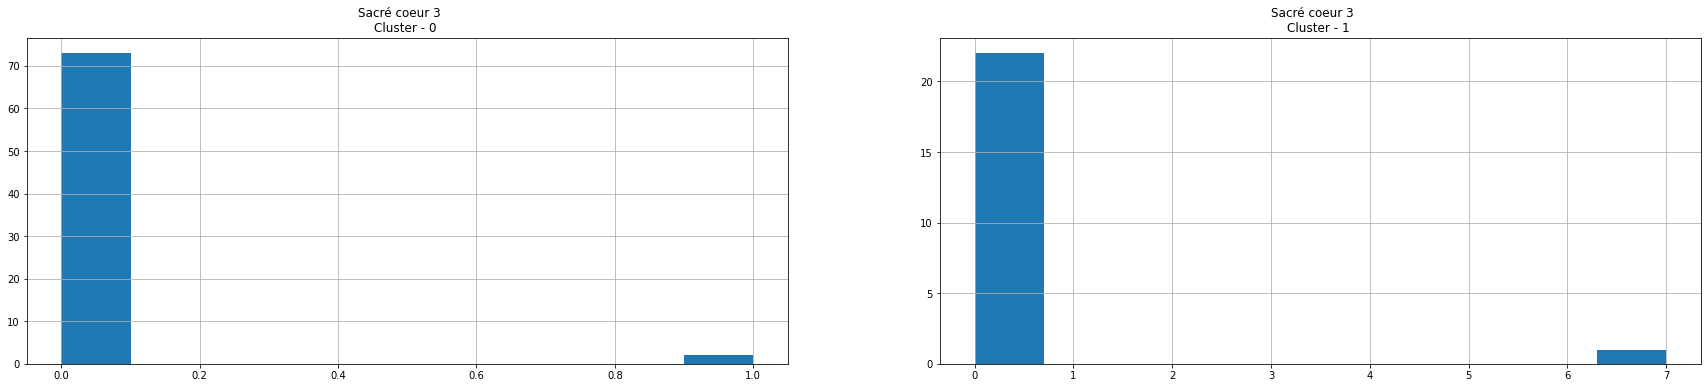

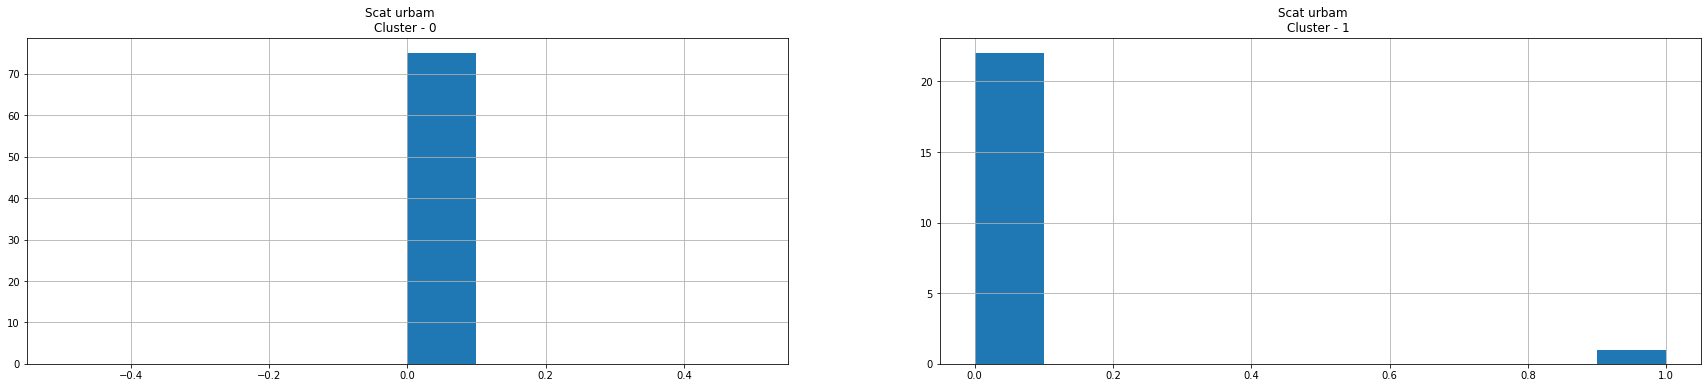

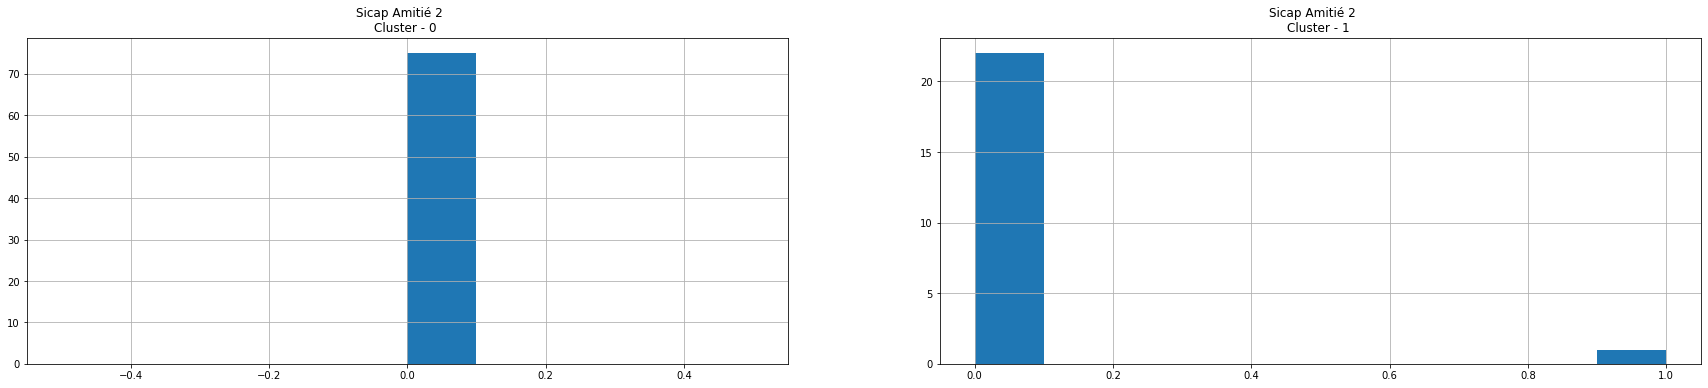

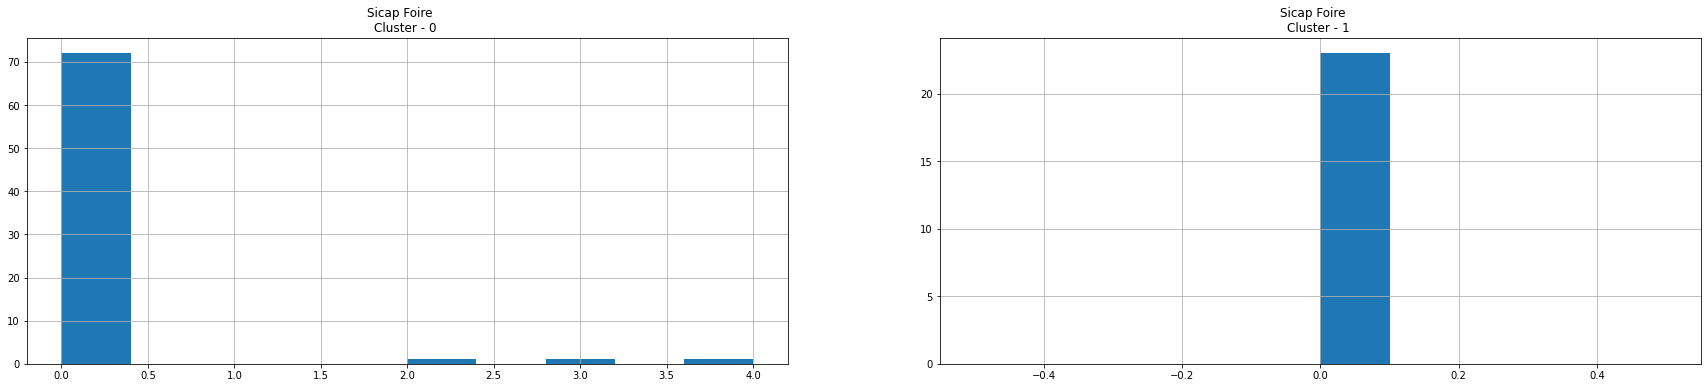

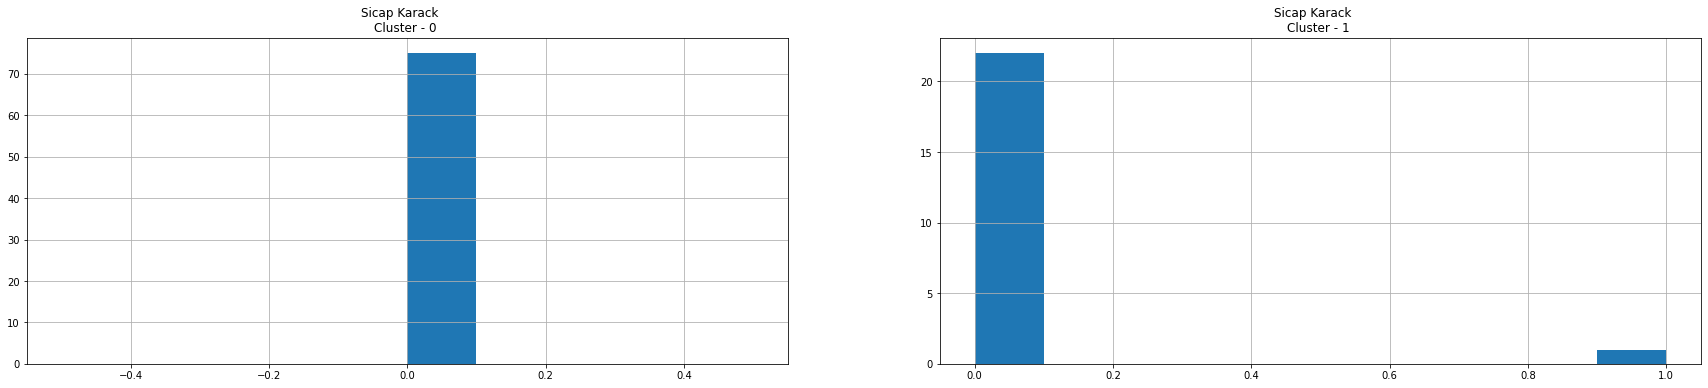

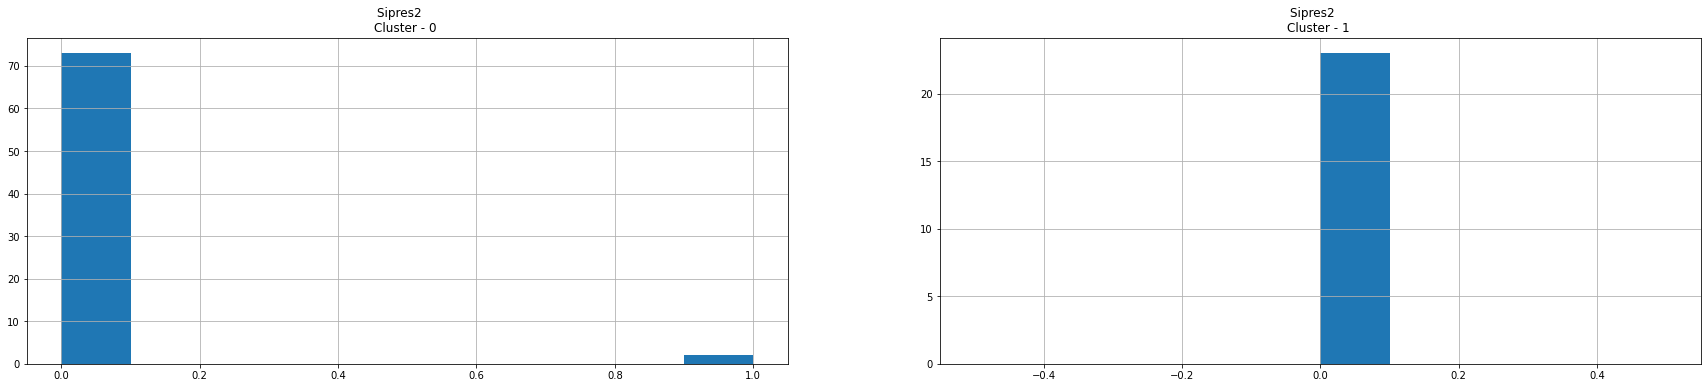

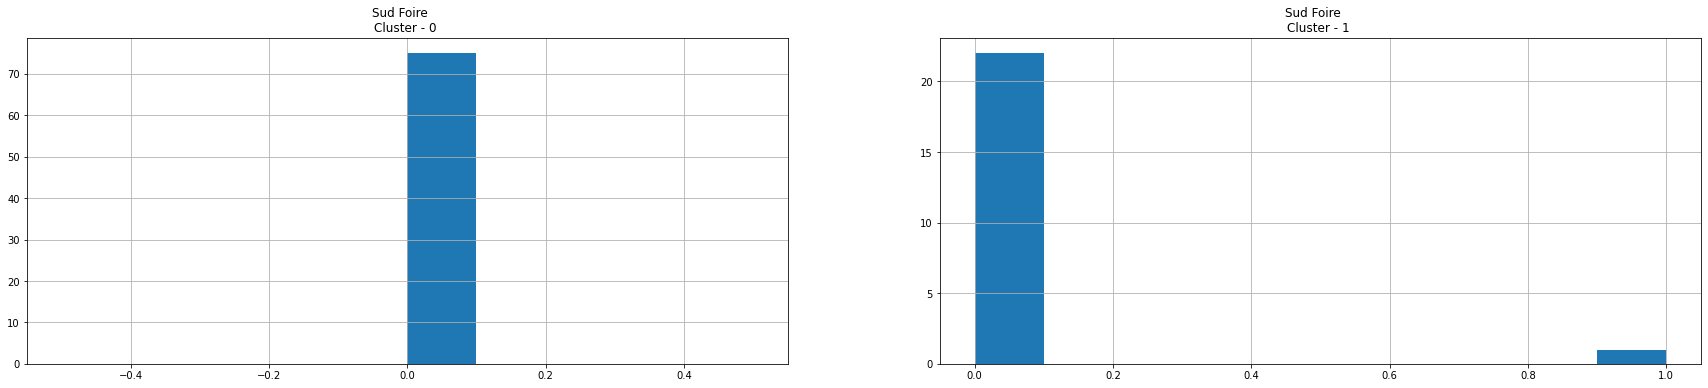

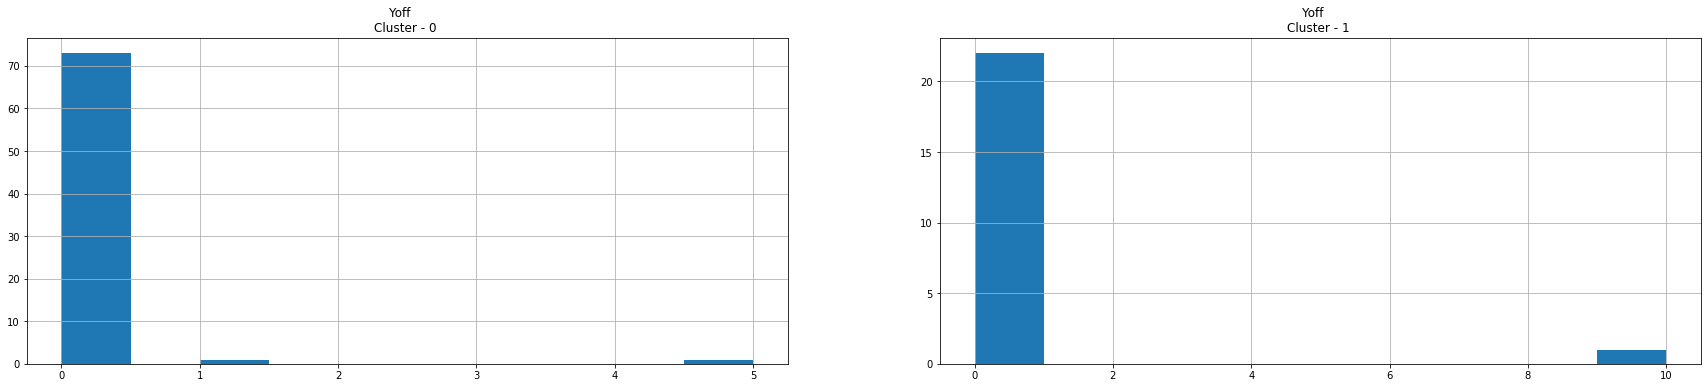

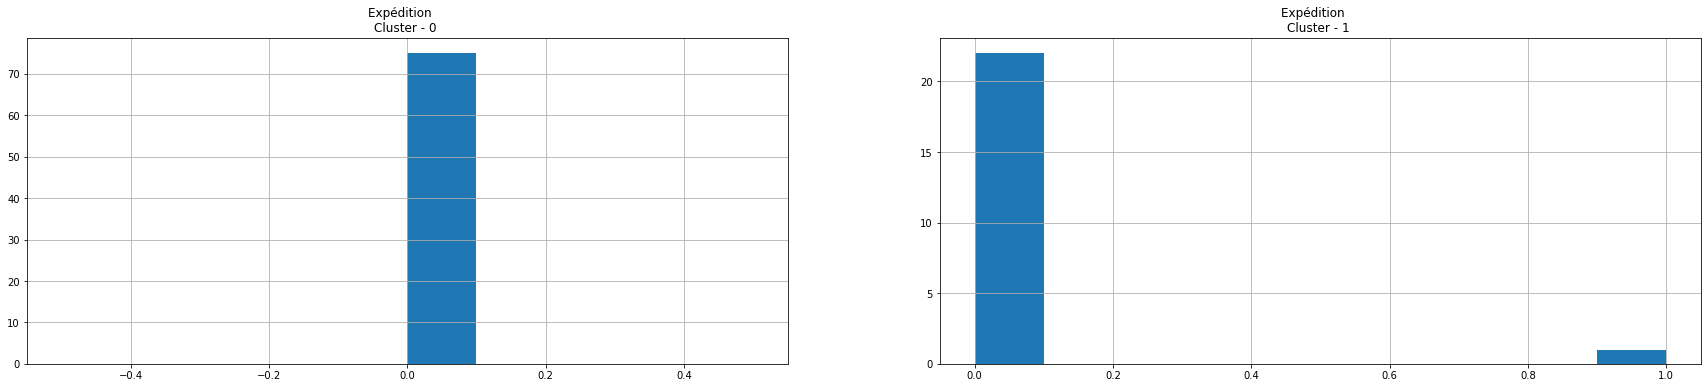

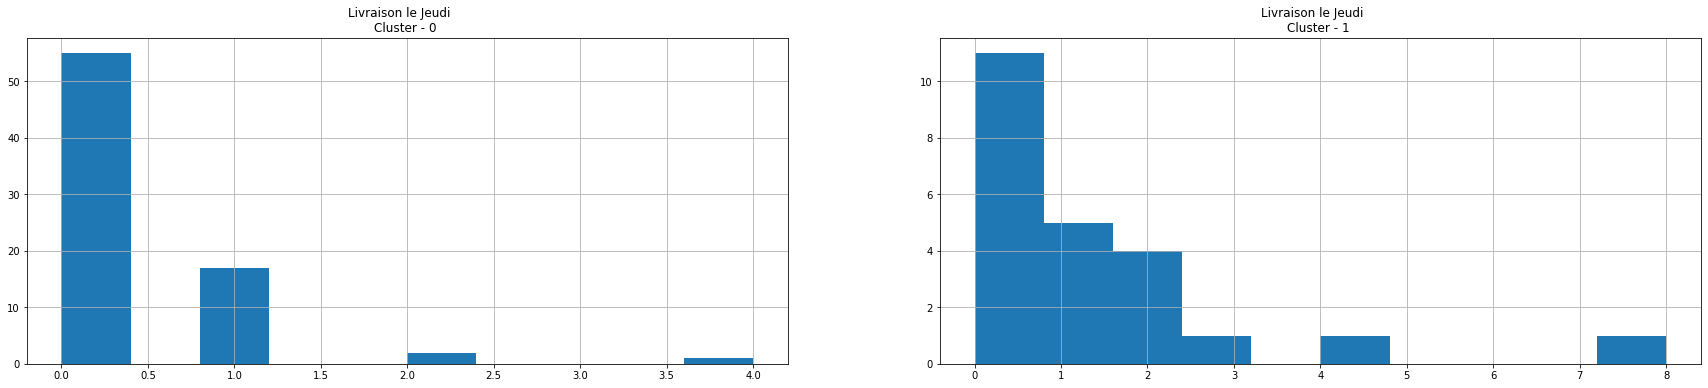

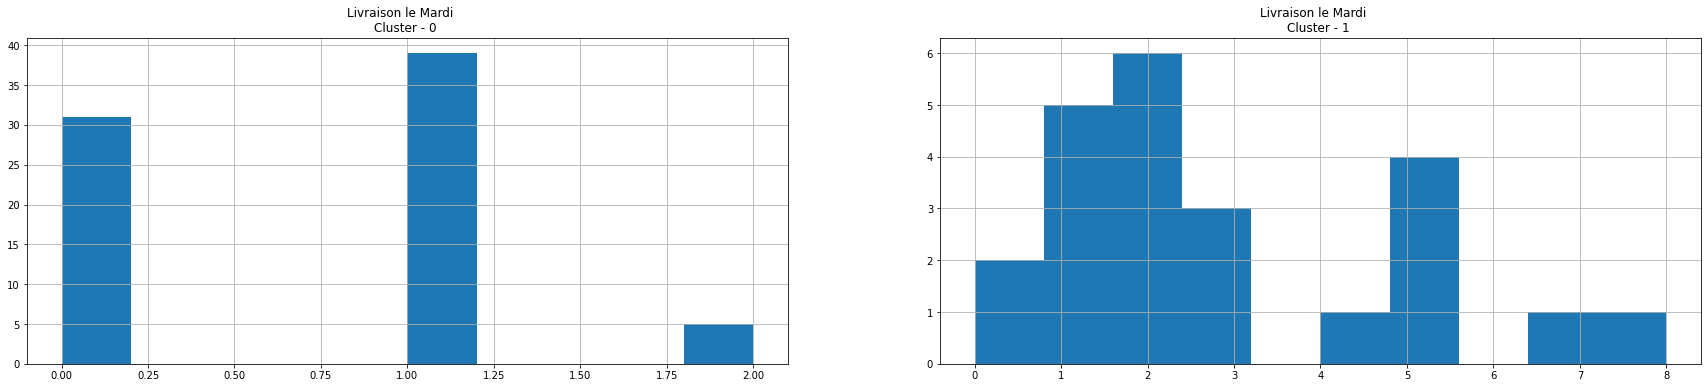

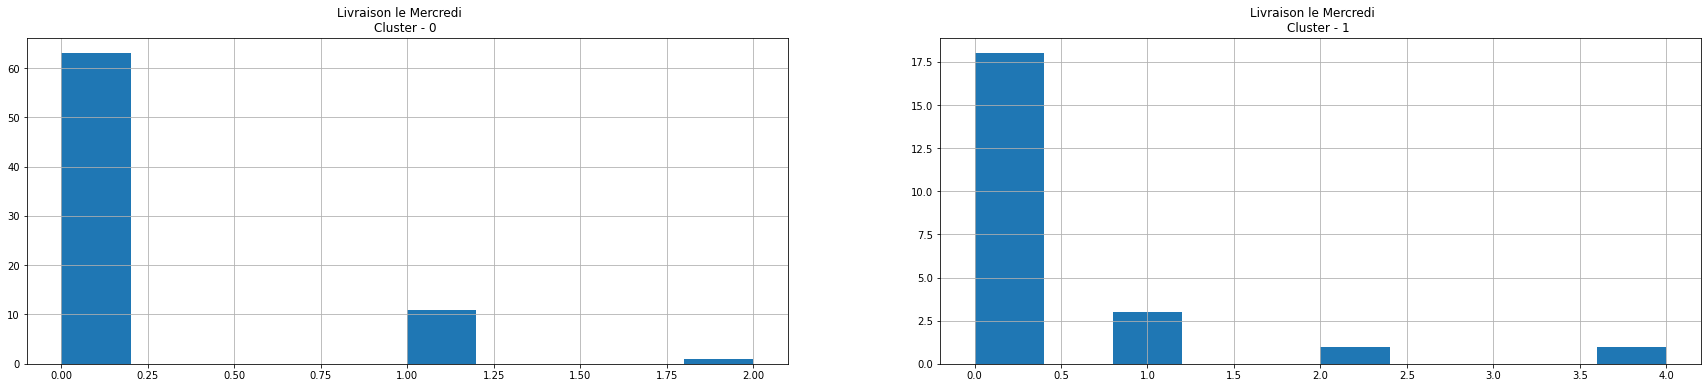

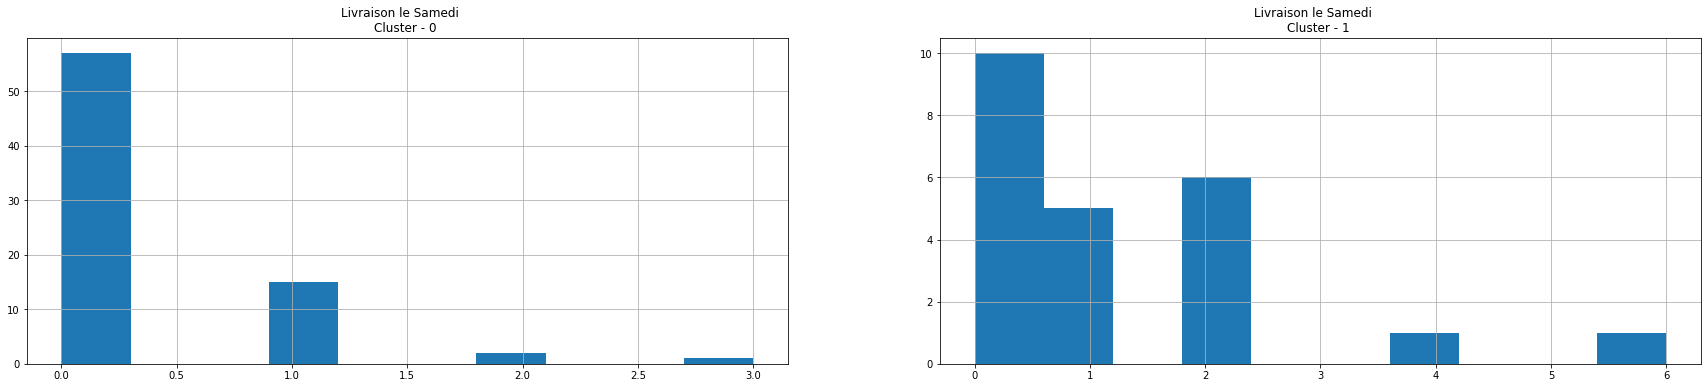

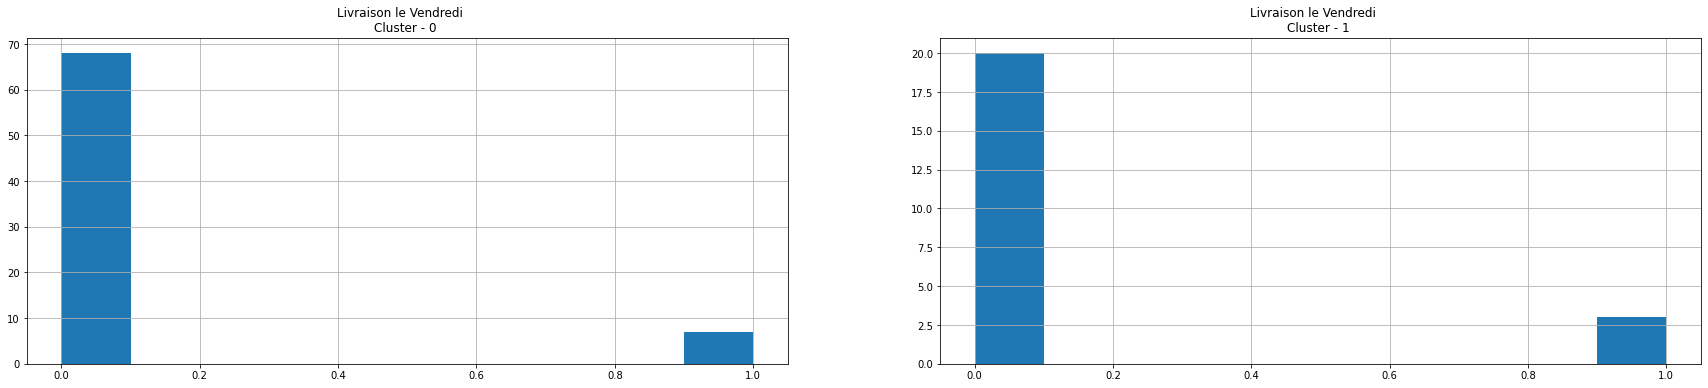

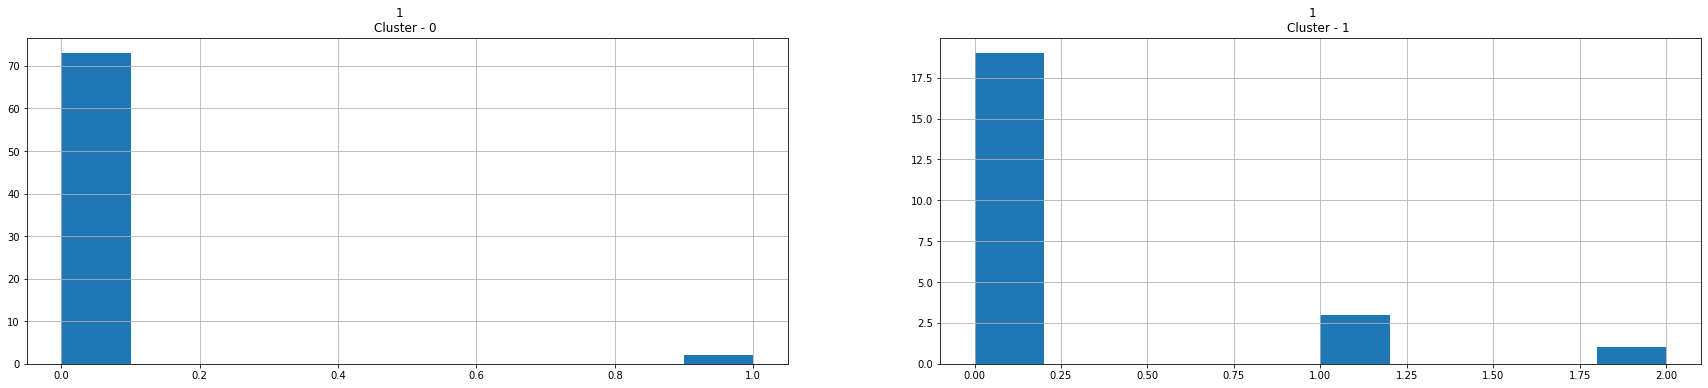

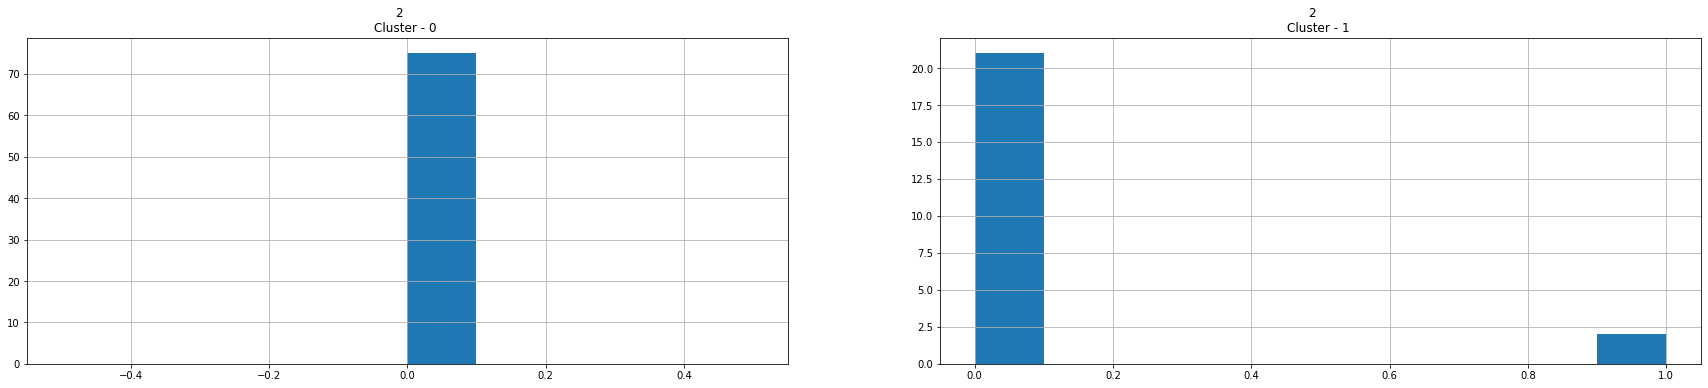

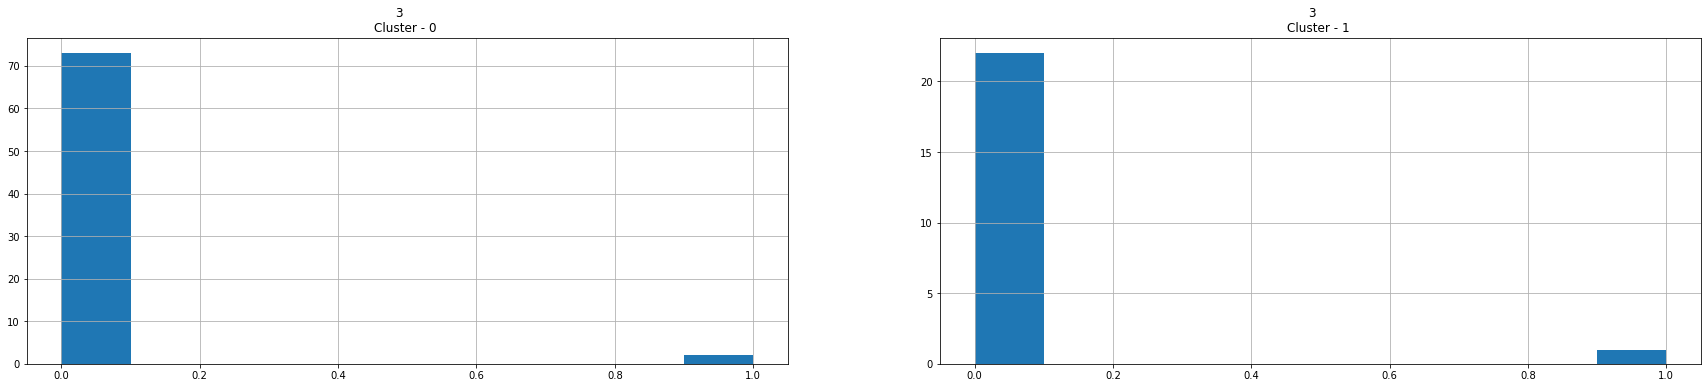

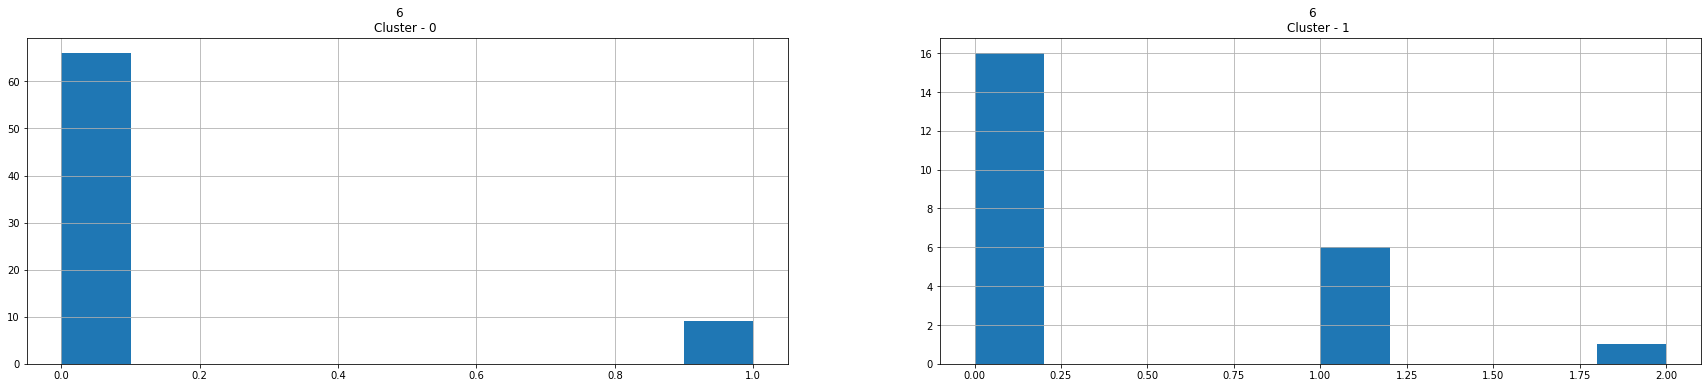

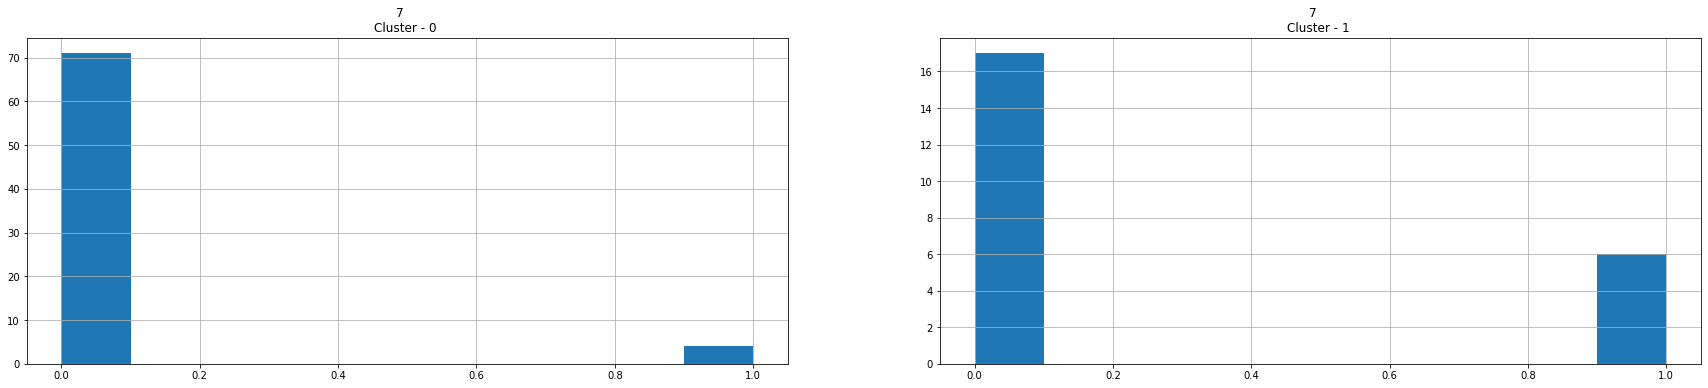

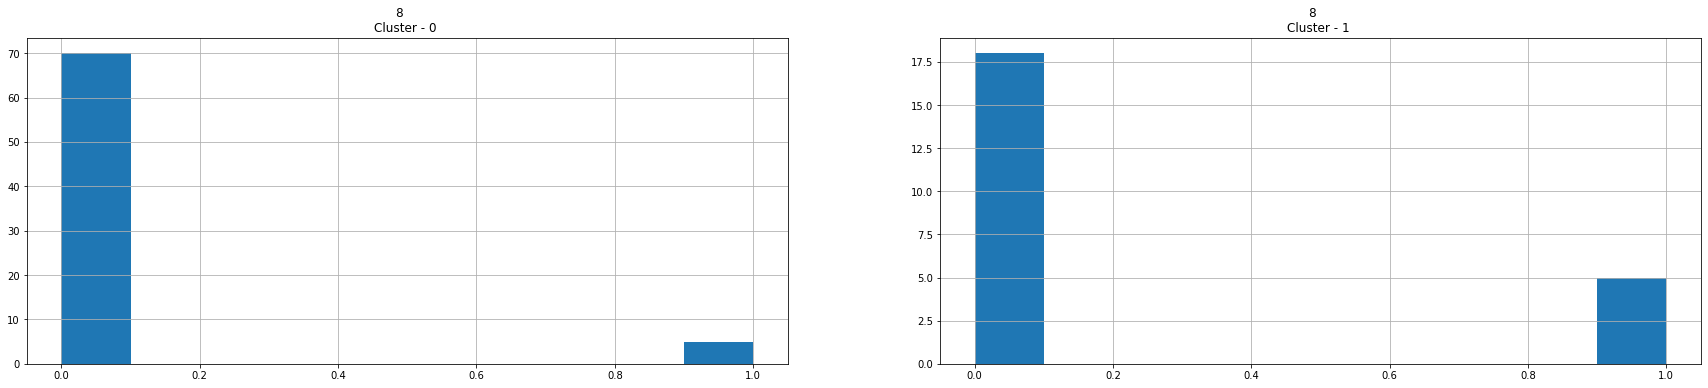

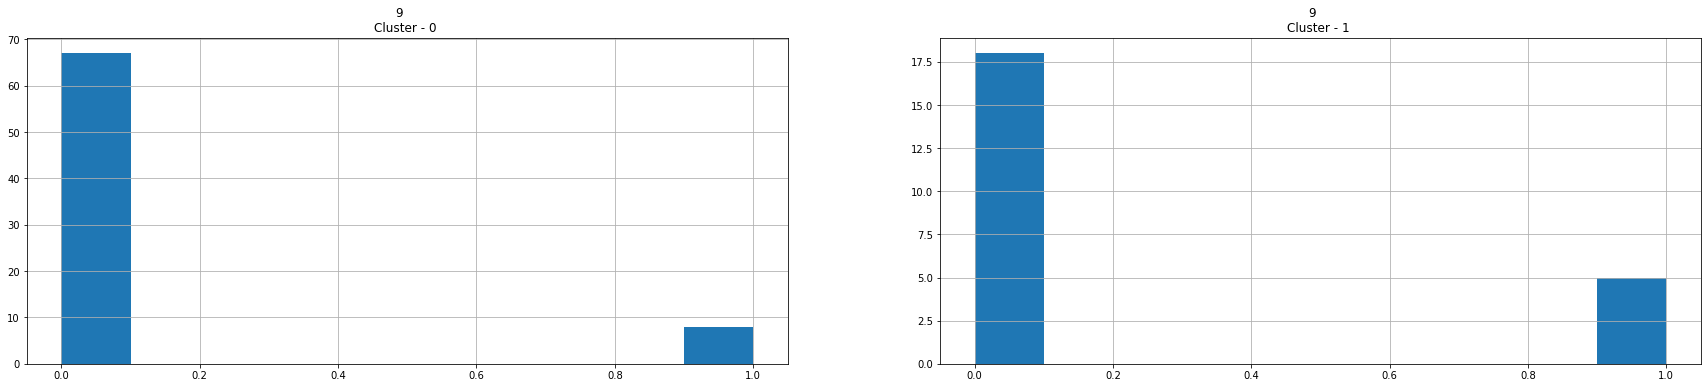

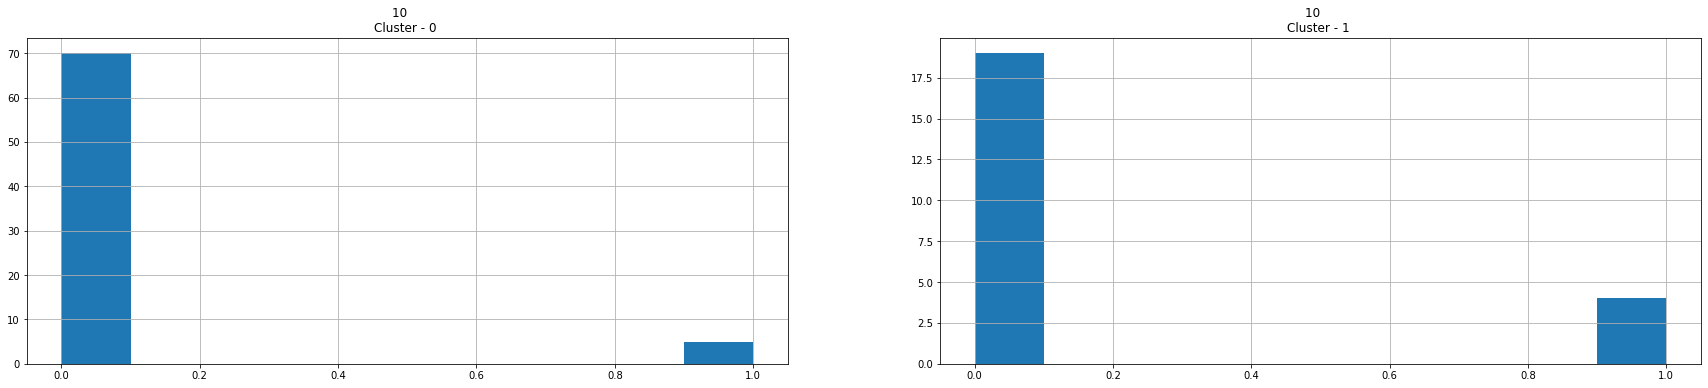

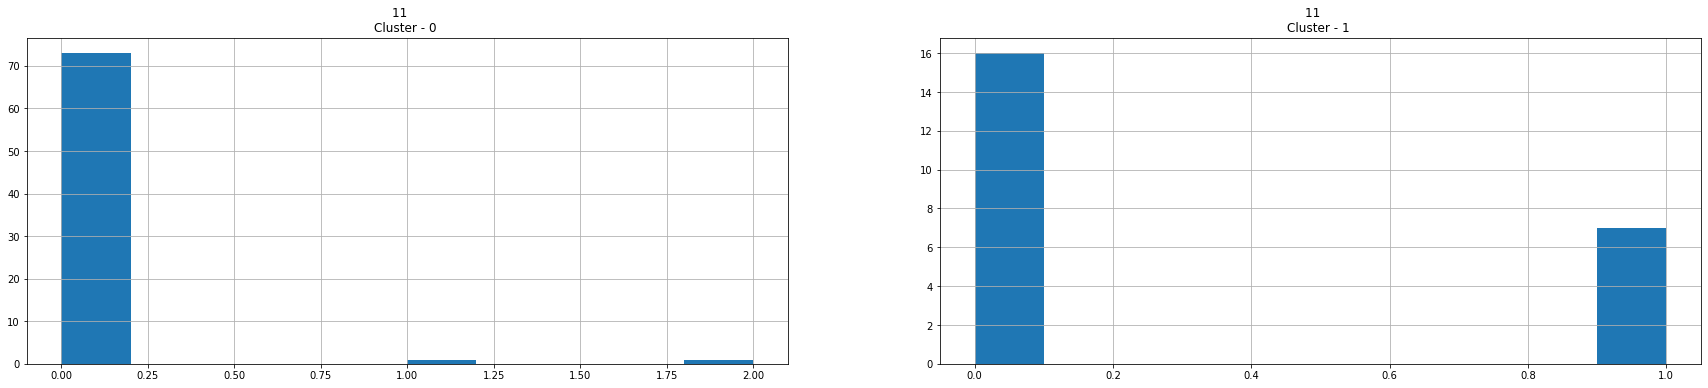

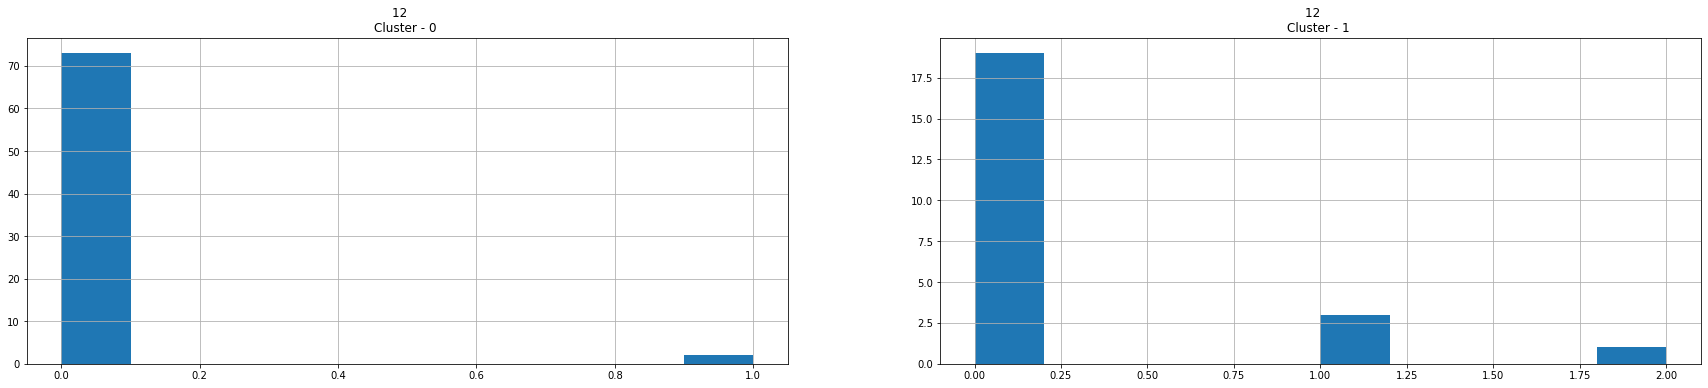

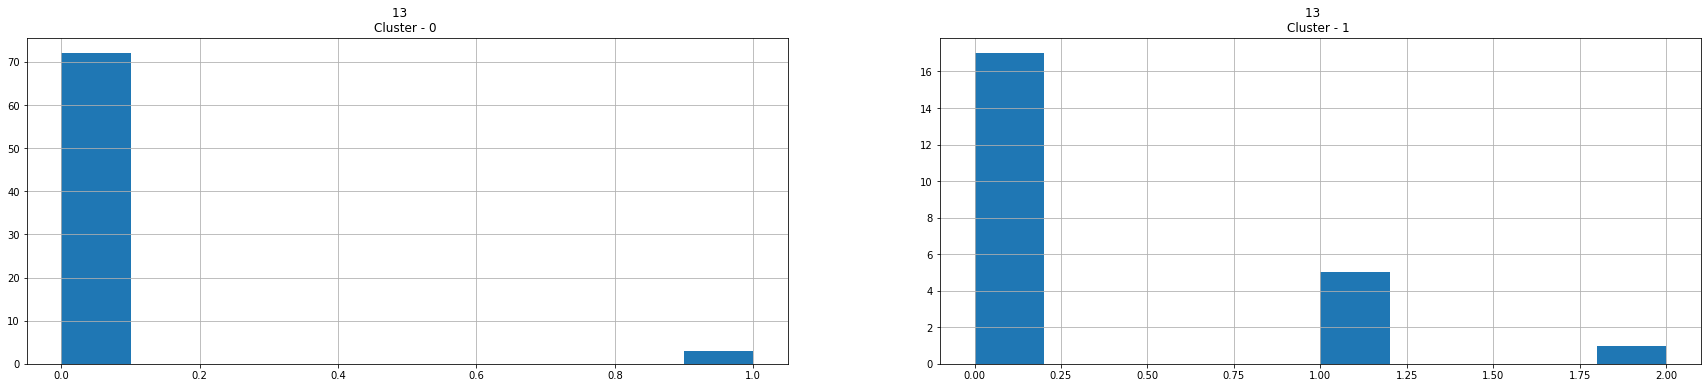

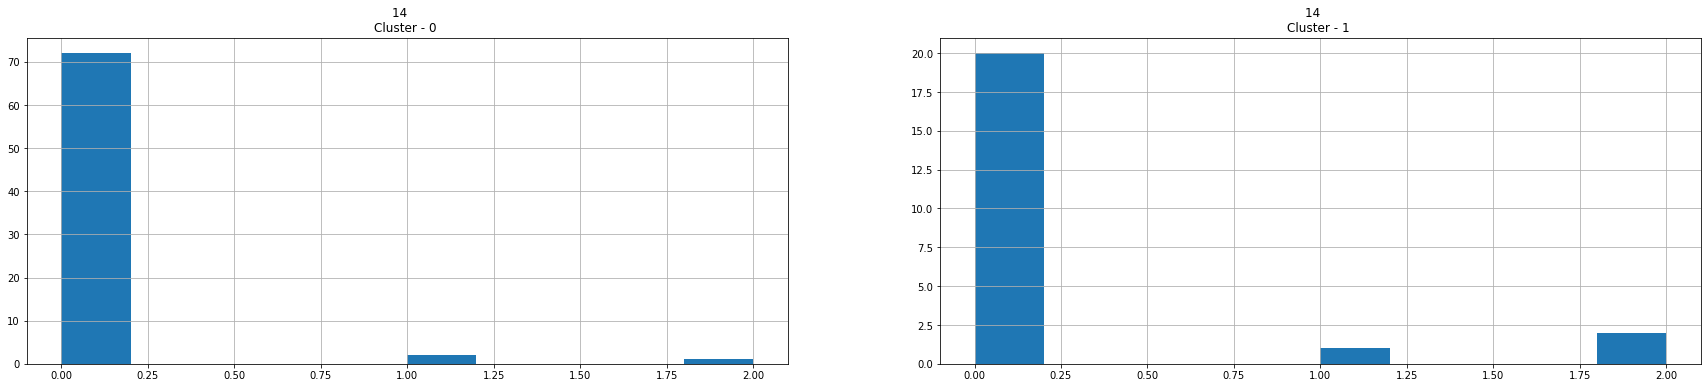

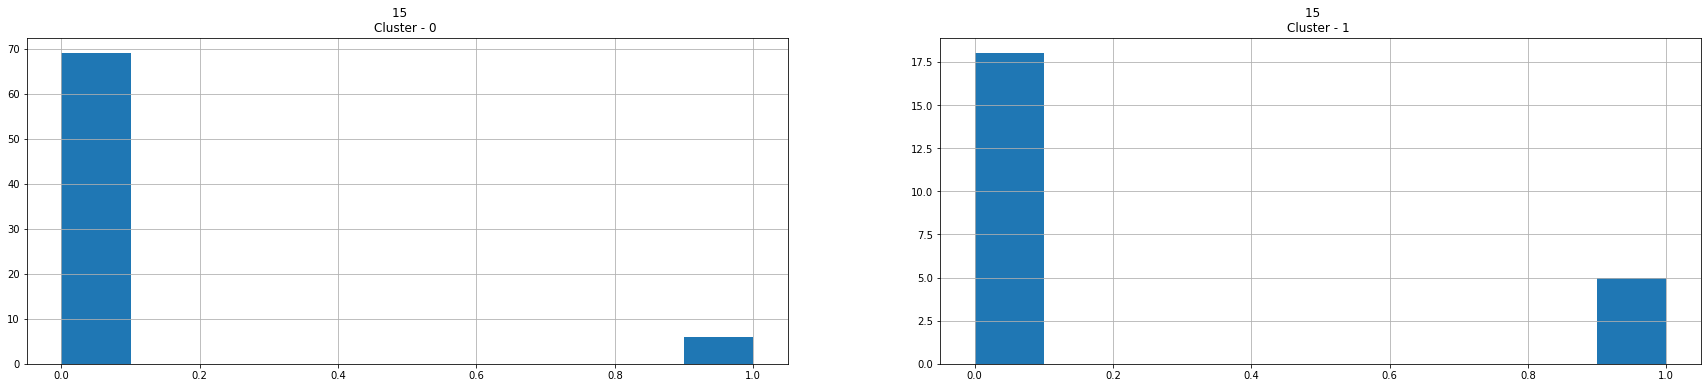

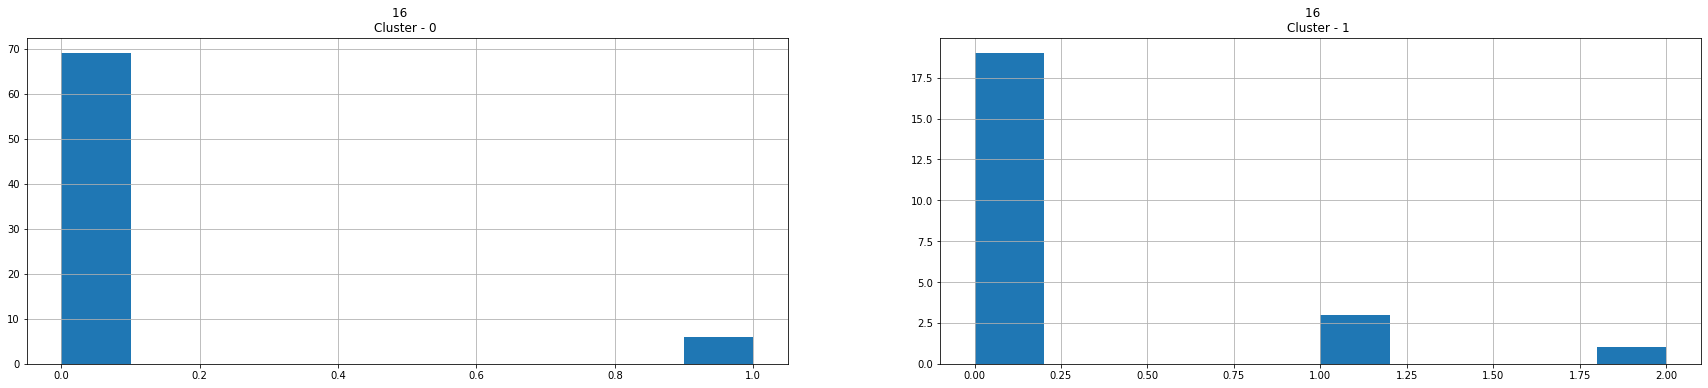

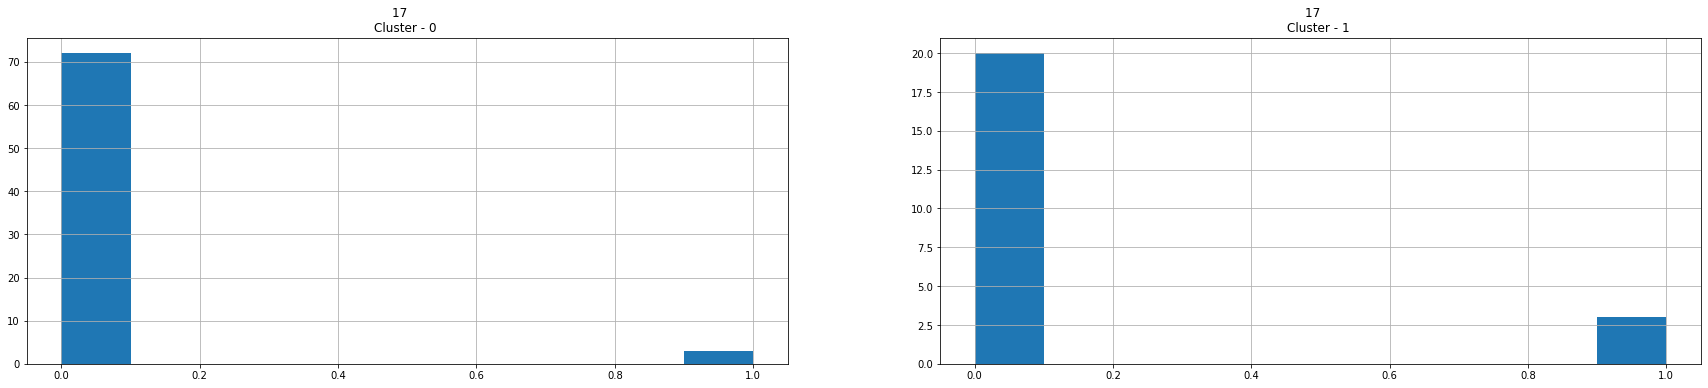

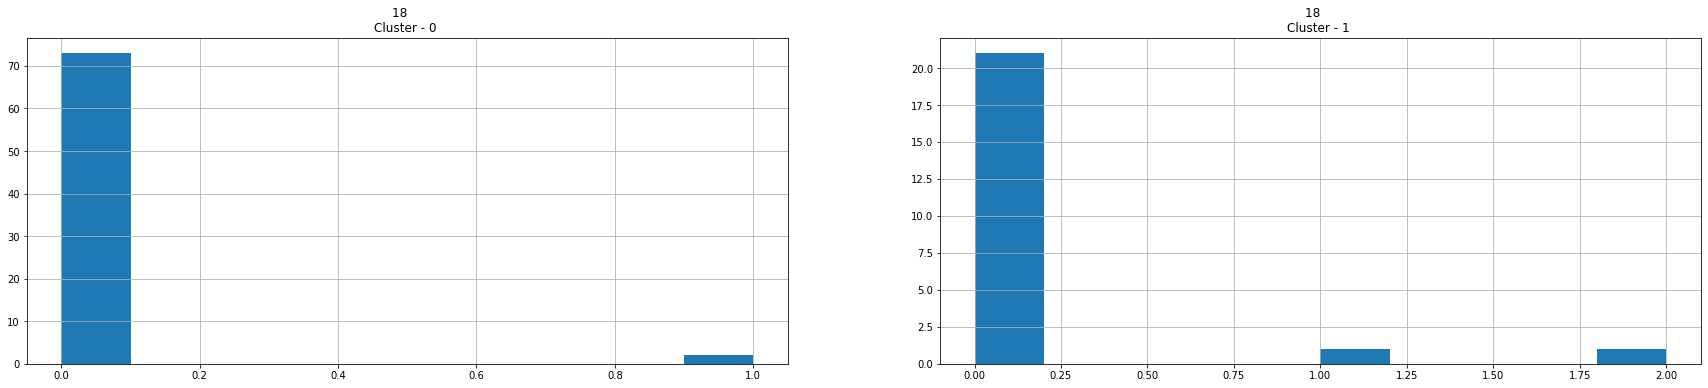

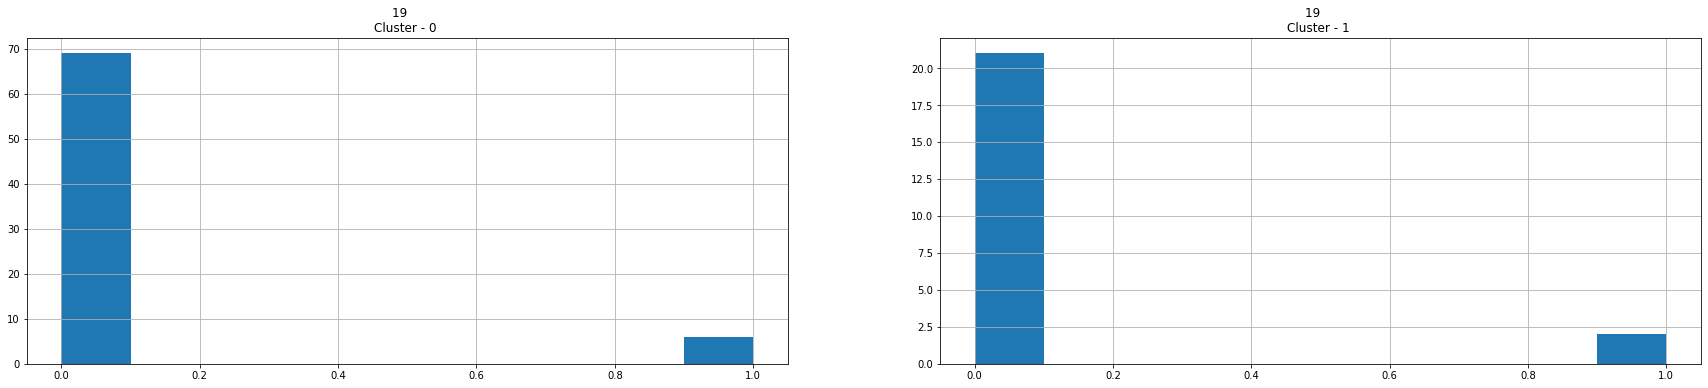

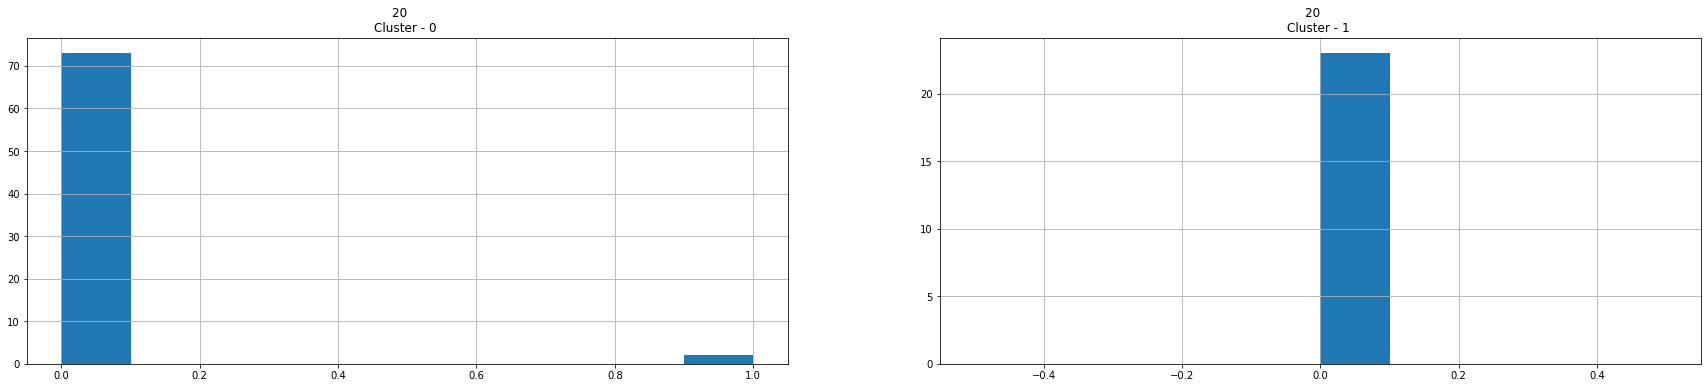

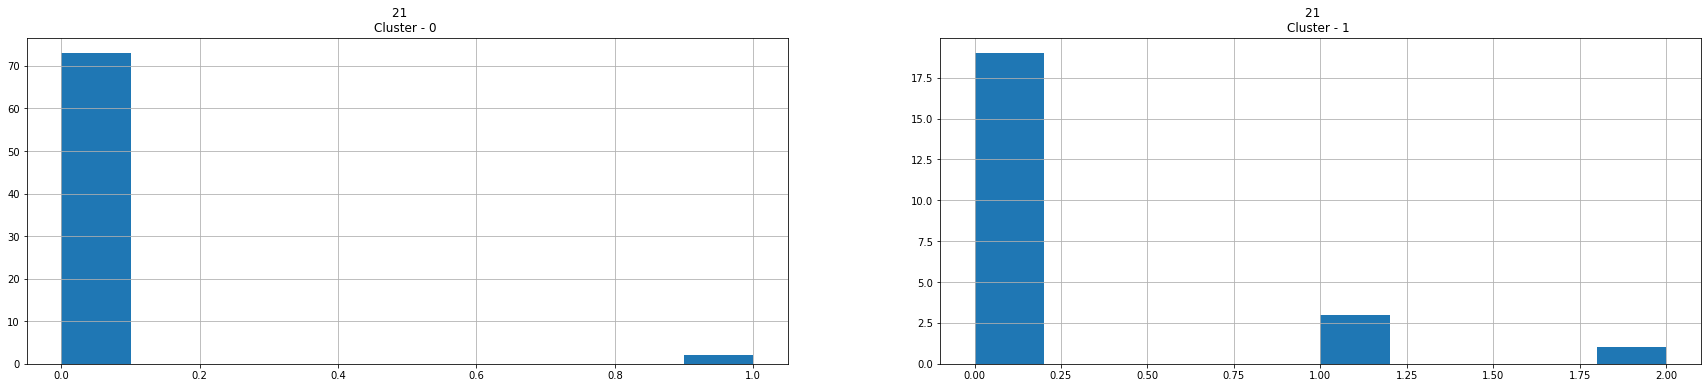

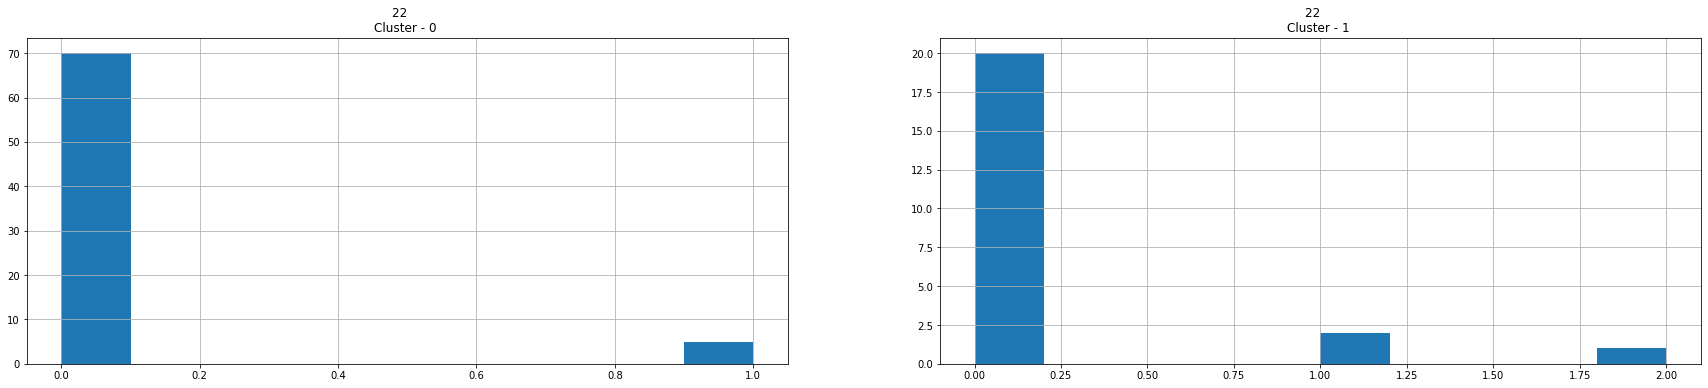

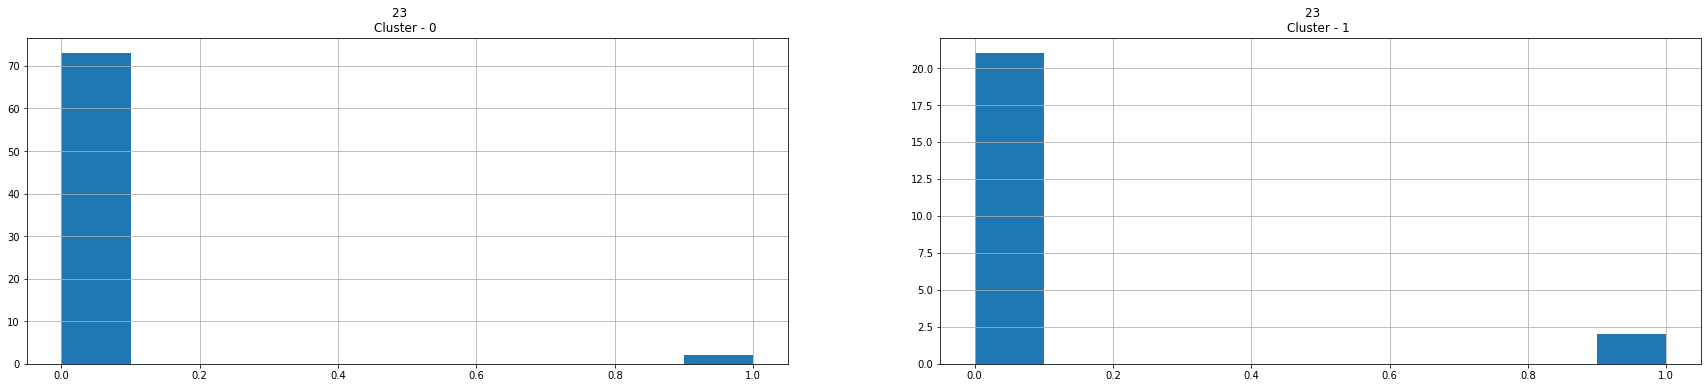

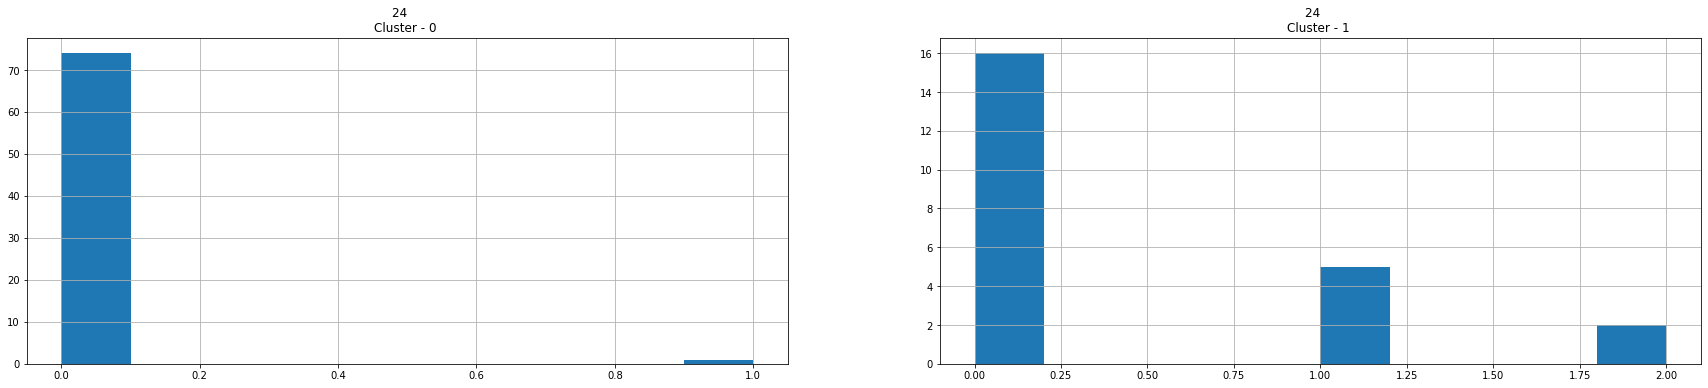

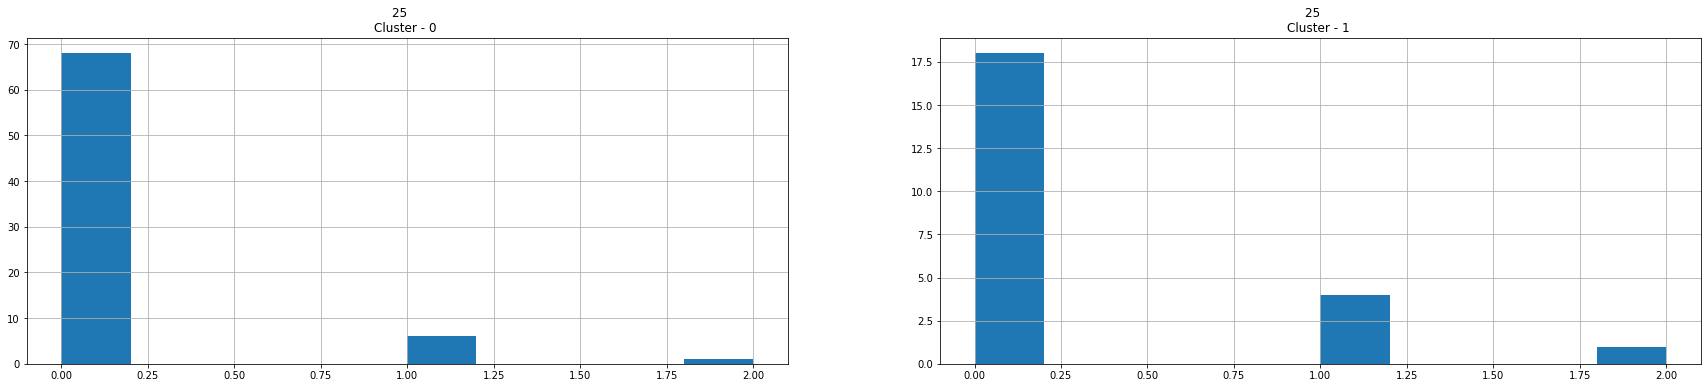

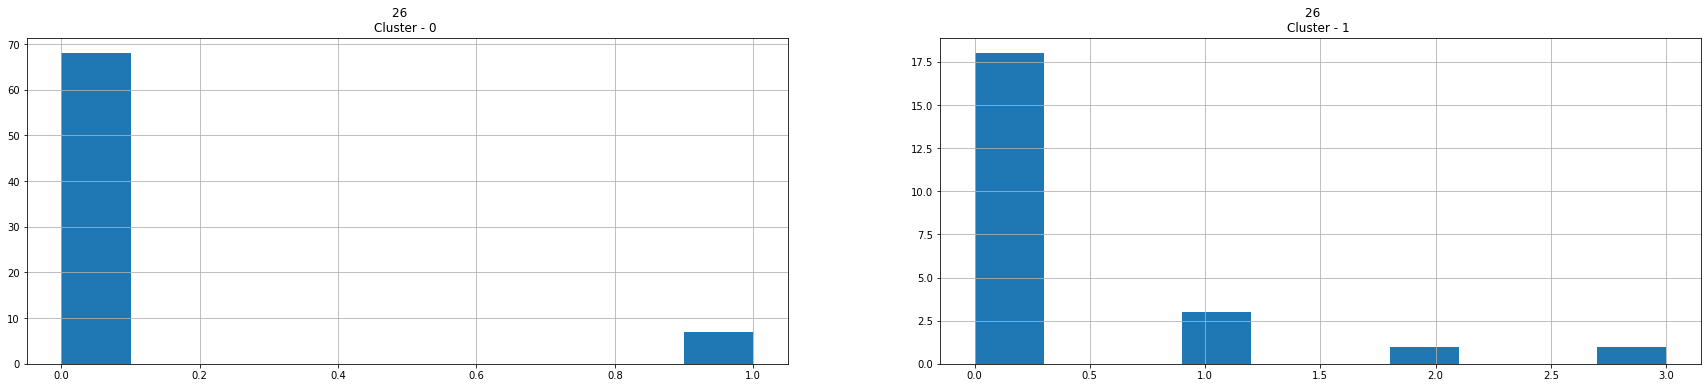

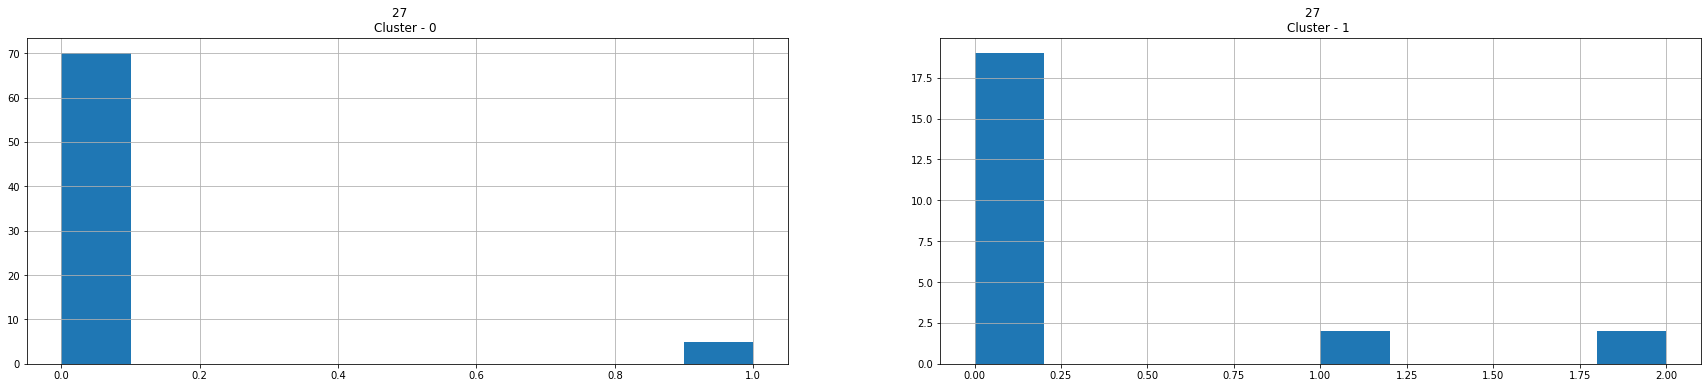

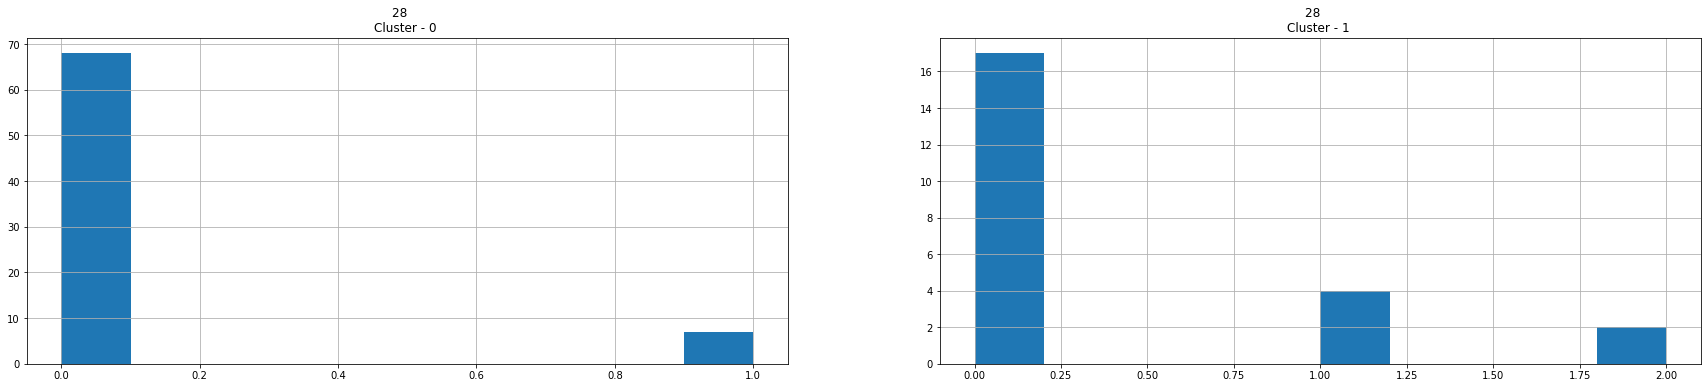

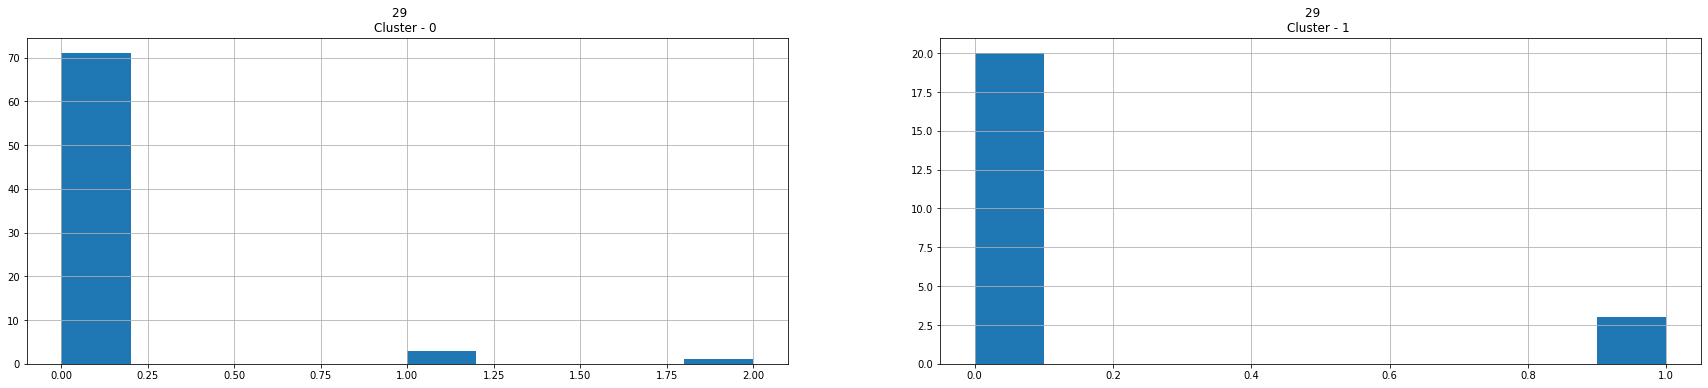

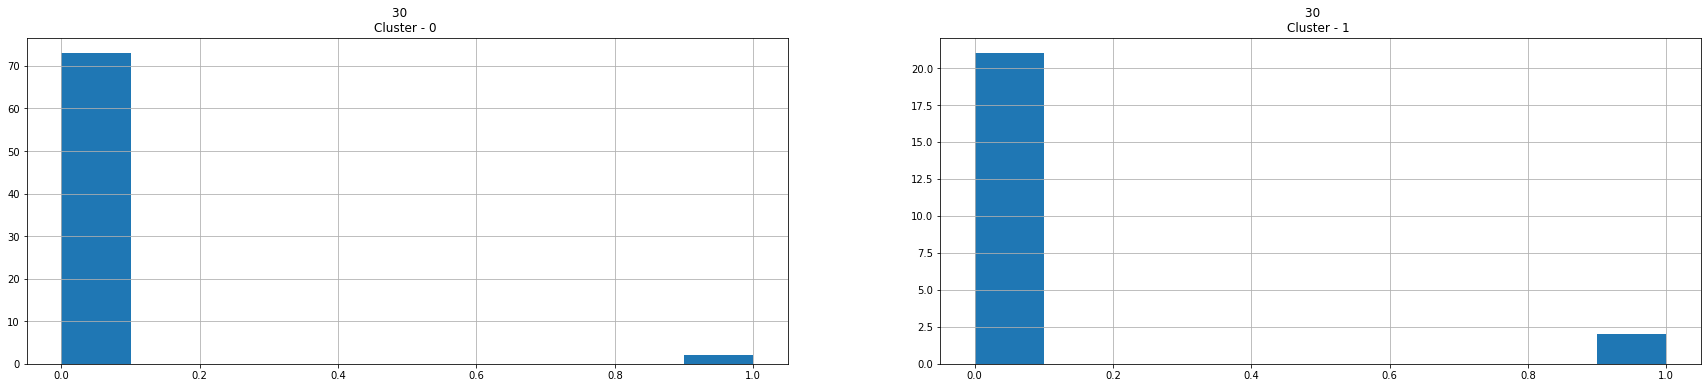

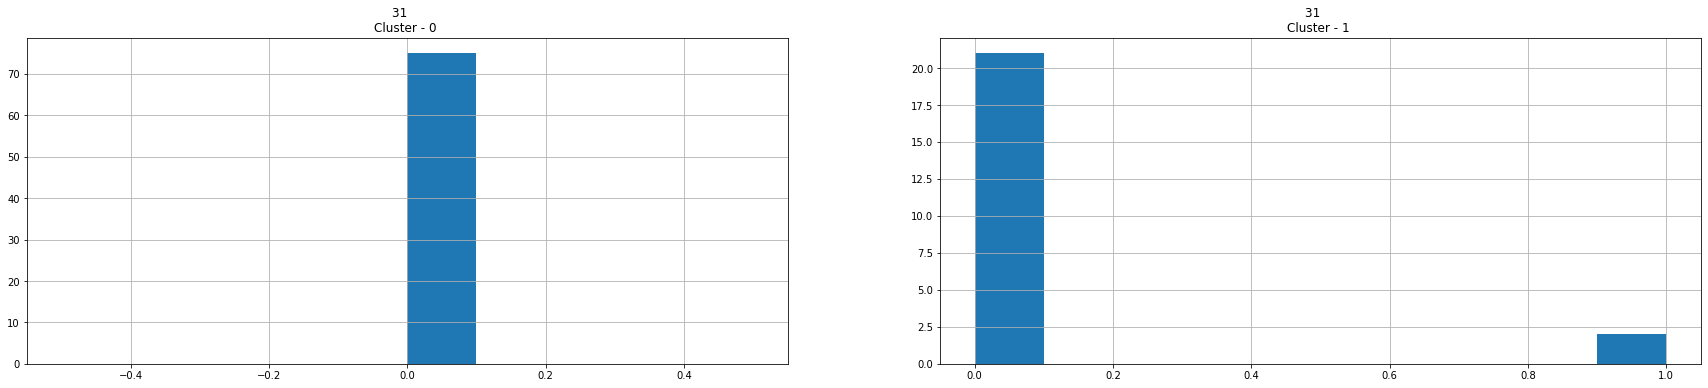

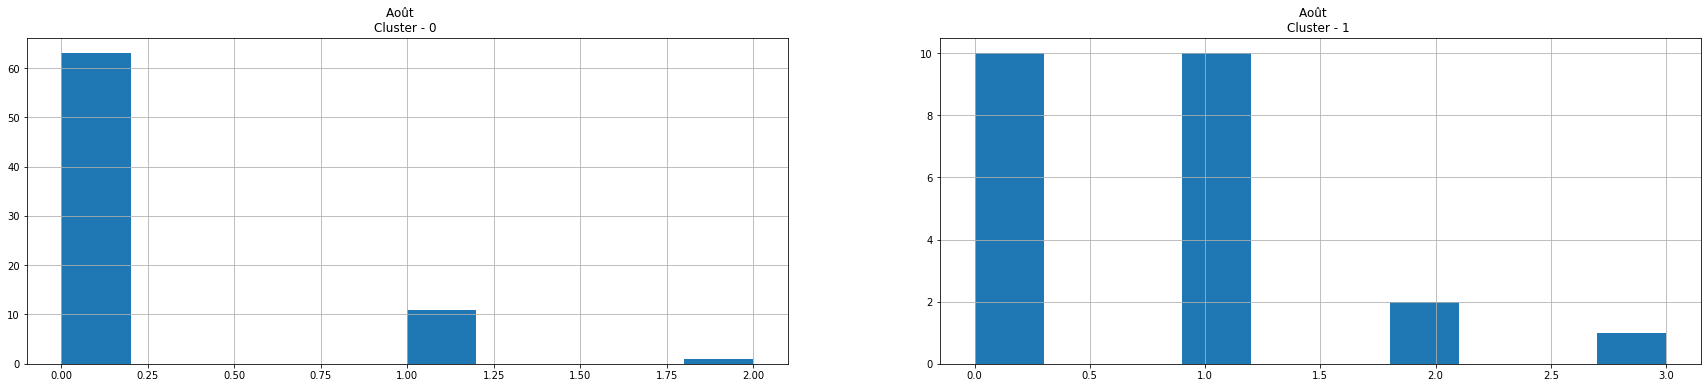

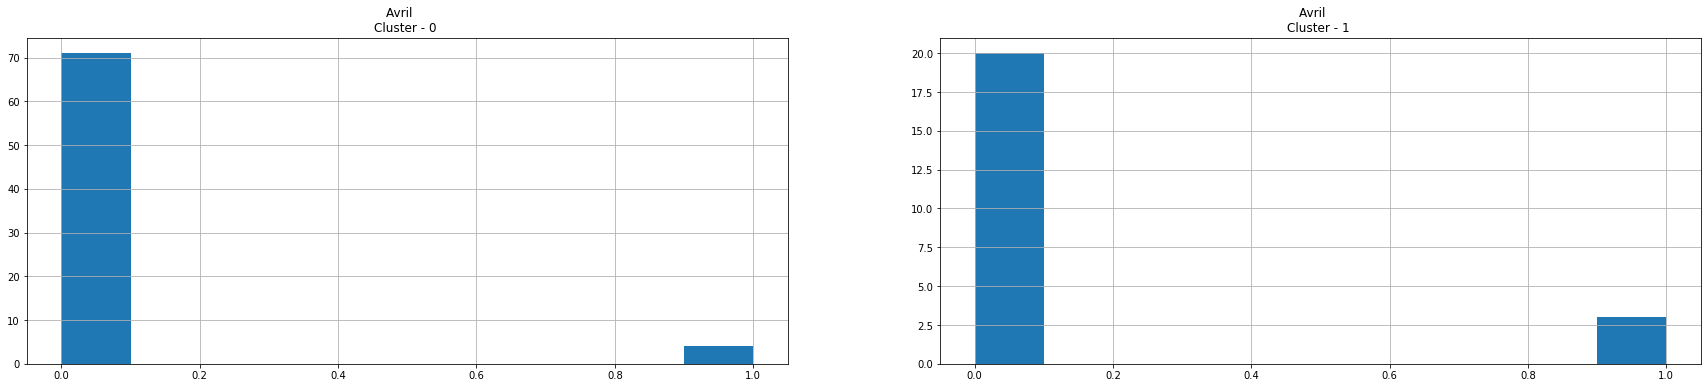

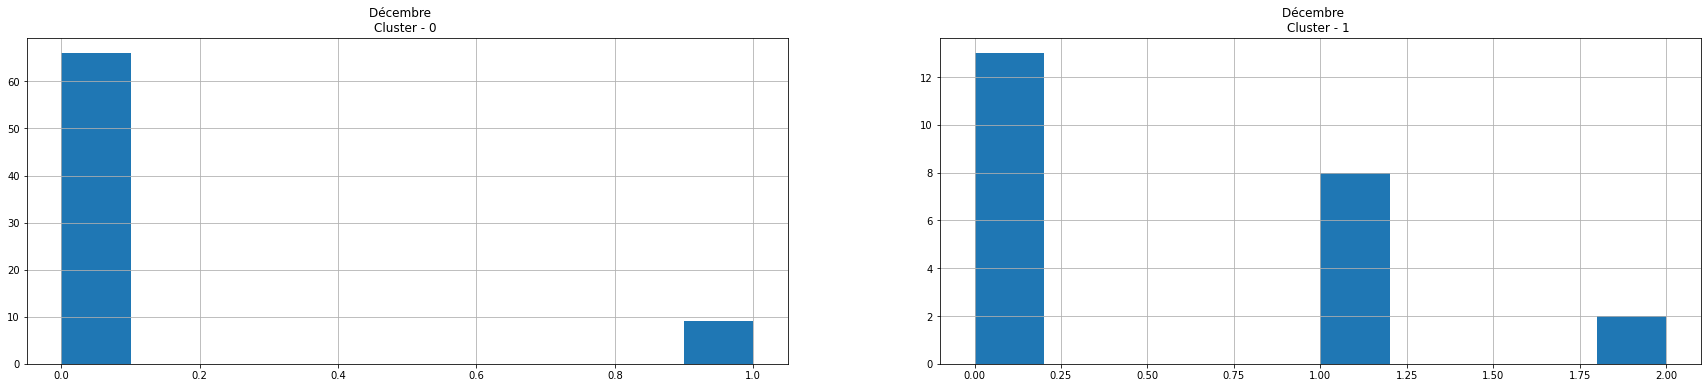

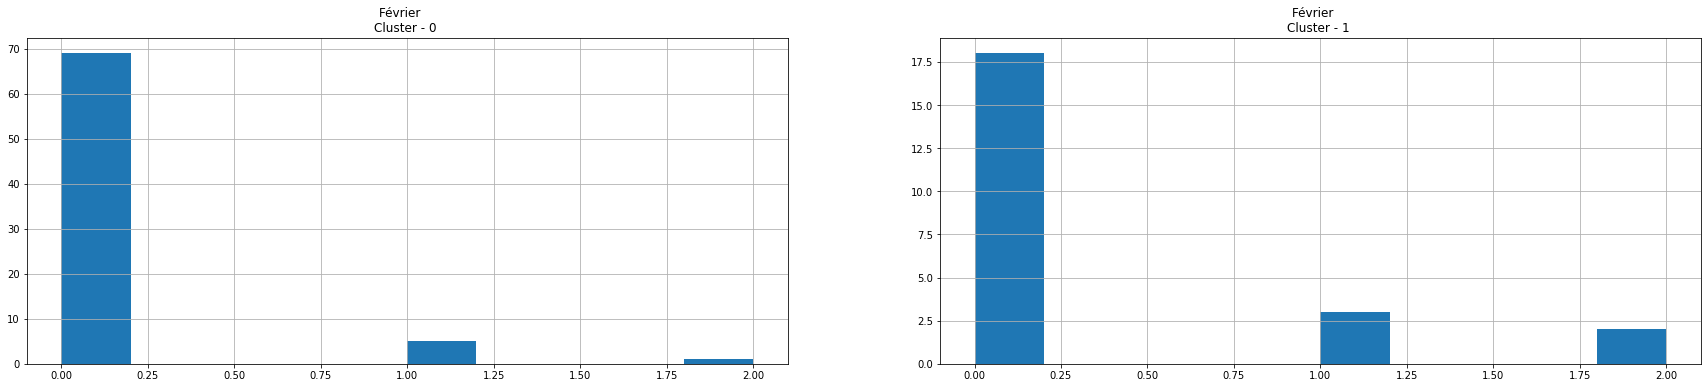

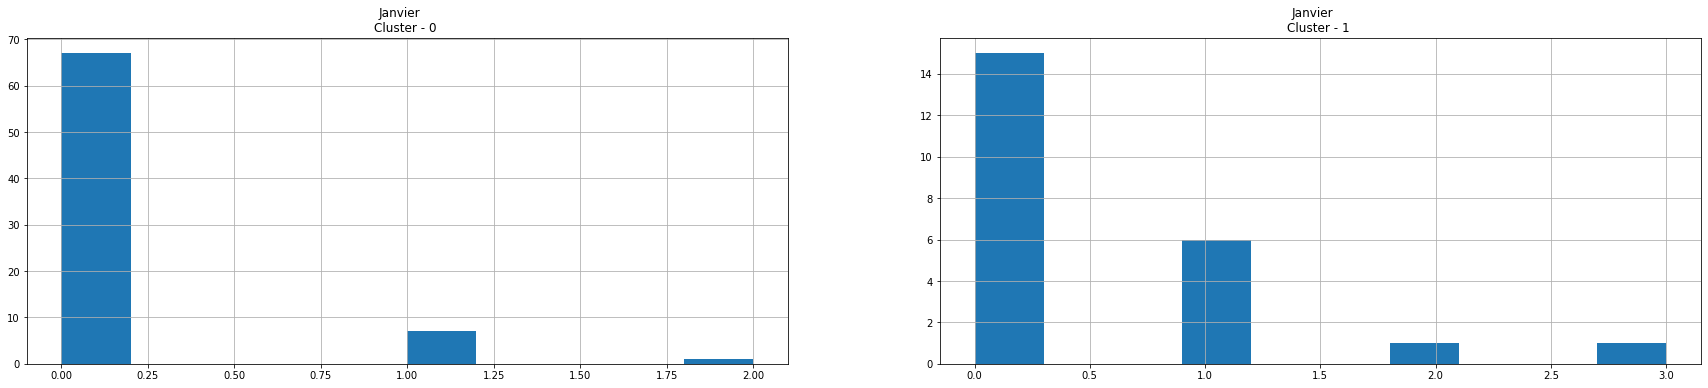

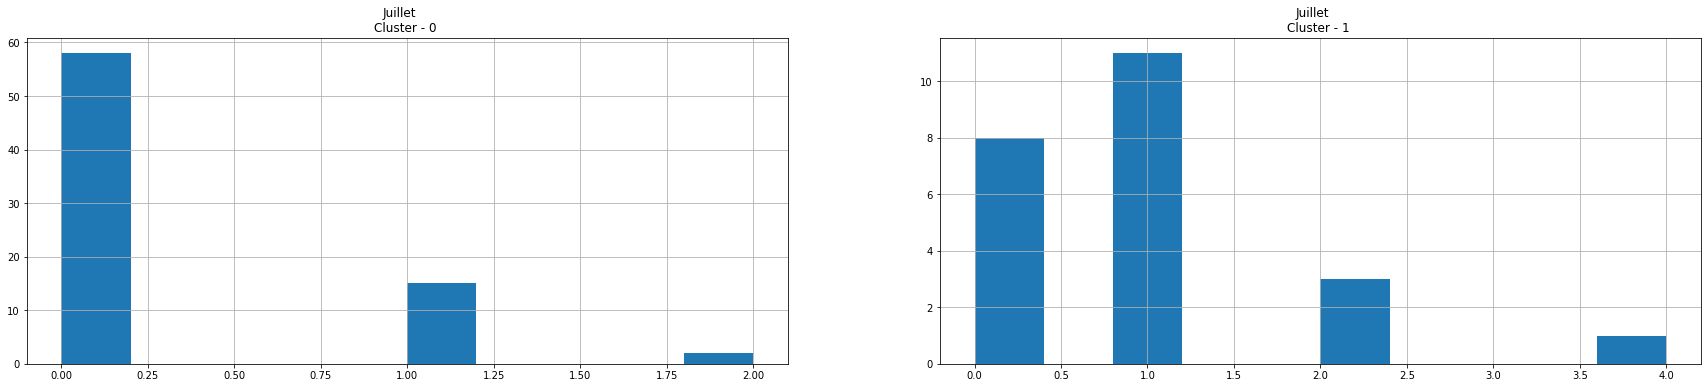

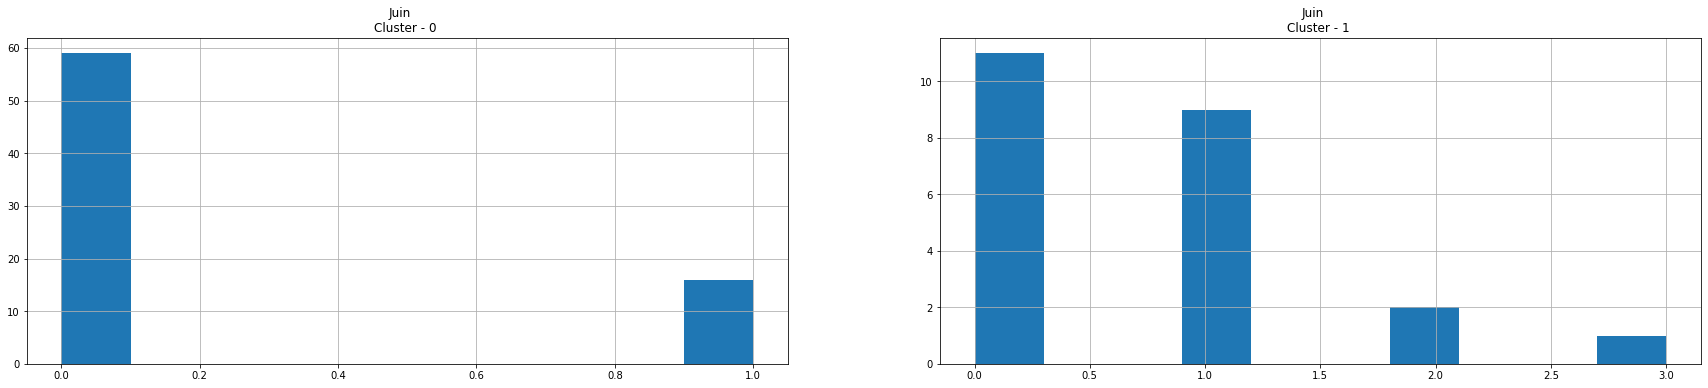

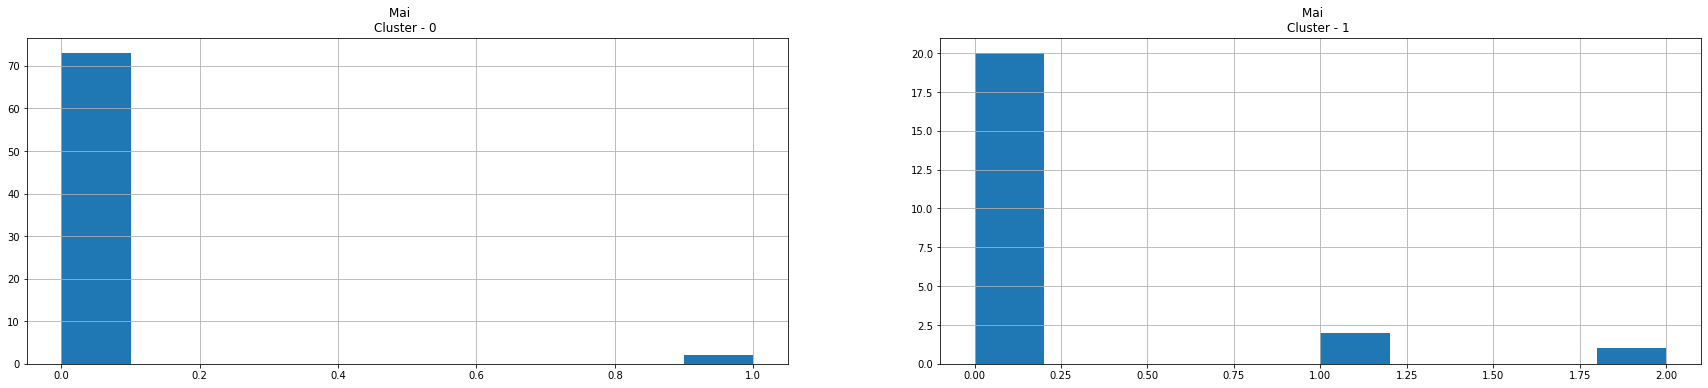

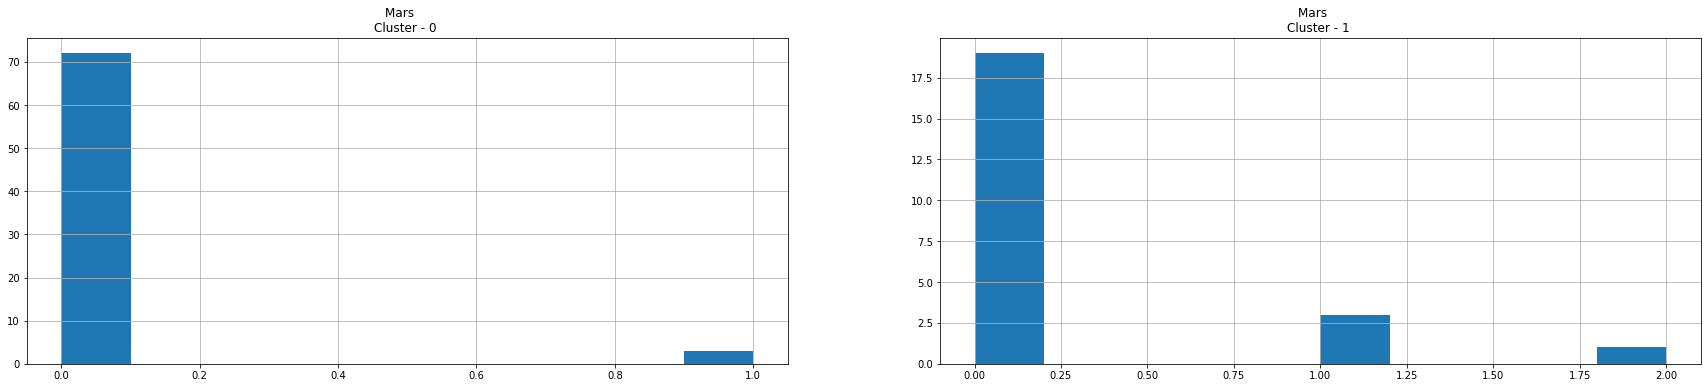

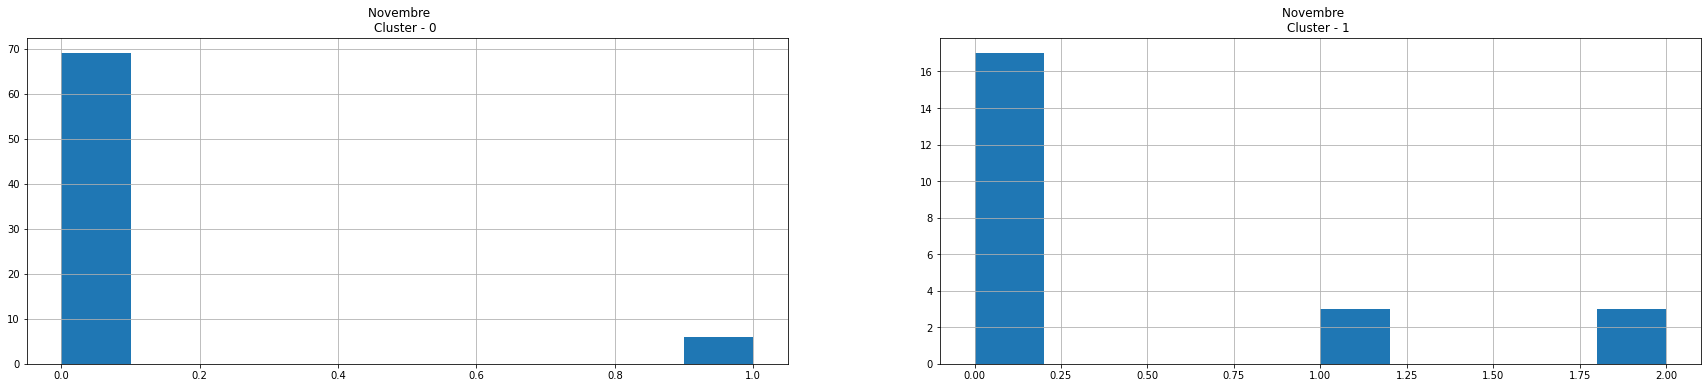

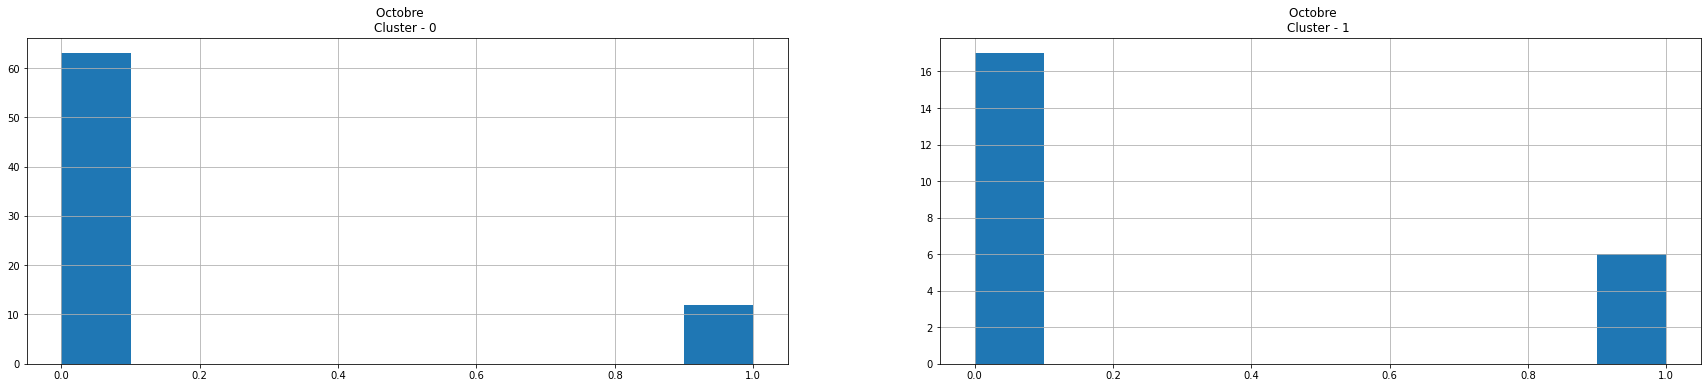

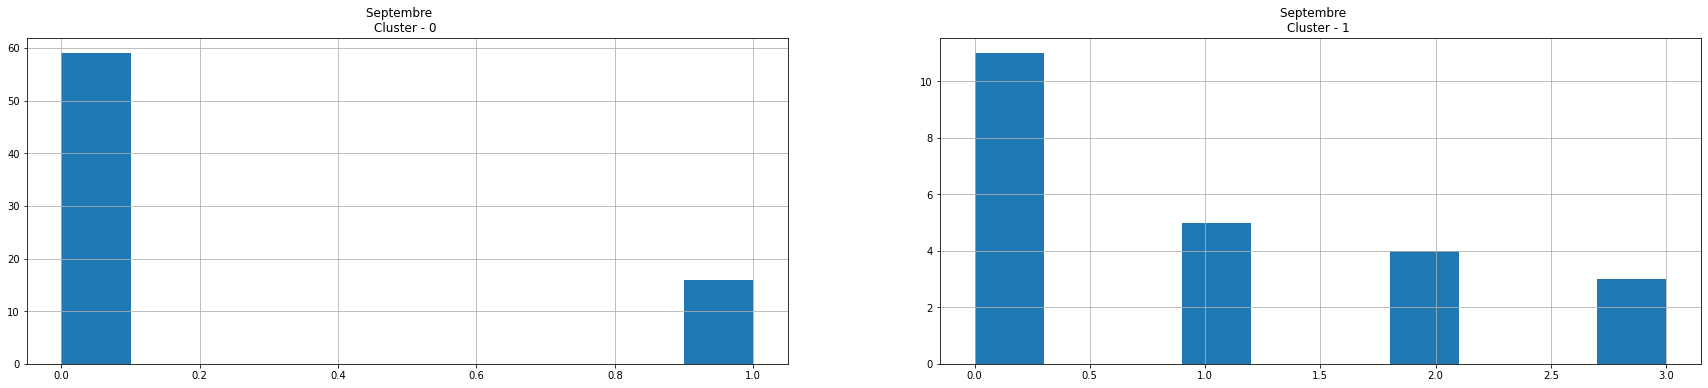

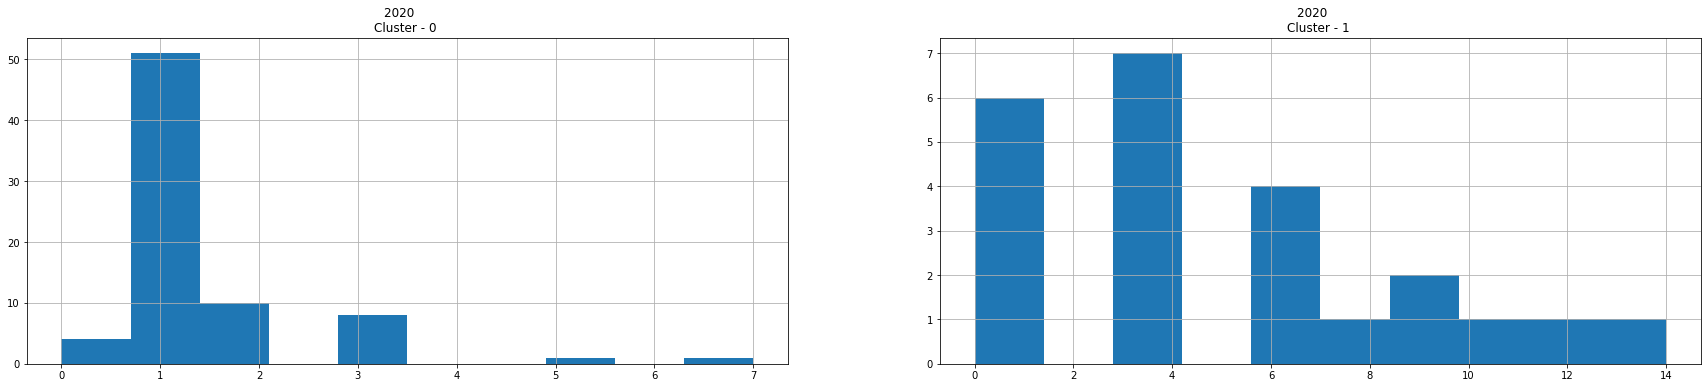

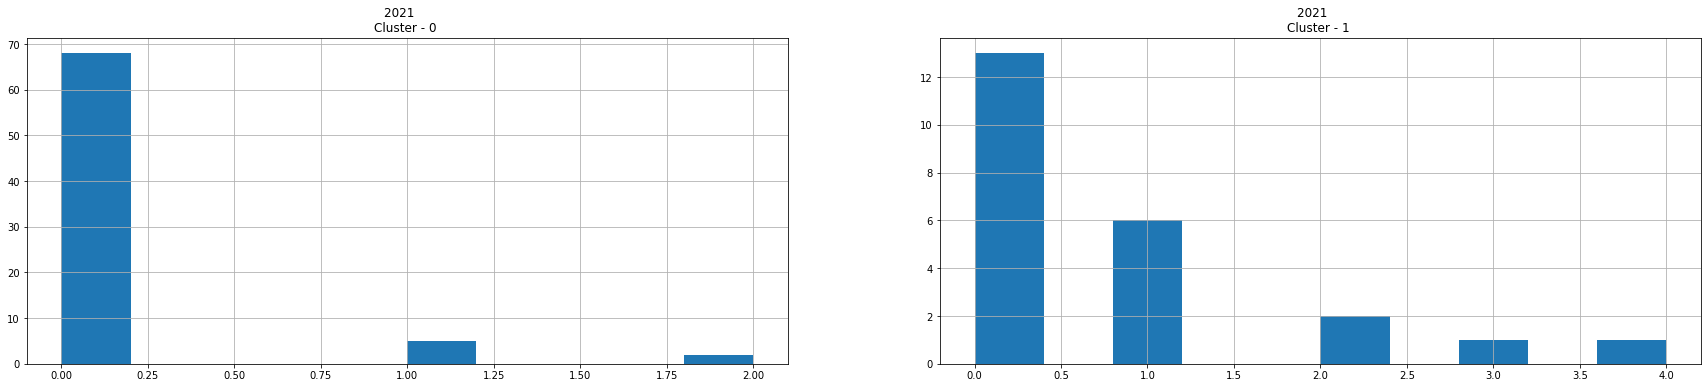

In [ ]:
# Représenter un histogramme pour chaque variable en fonction des clusters 
for i in new_sales_df_group.columns[:]:
  plt.figure(figsize = (30, 6))
  for j in range(2):
    plt.subplot(1, 2, j+1)
    cluster = new_df_cluster_dr2[new_df_cluster_dr2['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()

## Que peut-on déduire des clusteurs ?

###1. Cluster 0 : Client Silver

On peut dire que ce sont **les clients qui sont dans ce cluster, rapportent moins à l'entreprise.** Les montants totaux de leurs commandes sont grandement compris entre ***[0 et 39.000 FCFA]***, moyemment ils peuvent être compris entre ***[40.000 et 85.000 FCFA]*** et rarement ils peuvent atteindre la valeur de ***115.000 FCFA.*** Notamment on voit qu'ils n'ont pas commandé beaucoup d'articles durant les 2 dernières années; en d'autres termes le nombres d'articles commandés est faible par rapport aux clients de l'autre cluster. On les retrouve dans ***les communes de Cambéréne, de Gibraltar, de Golf Sud, d'HLM Grand Medine, de Keur Massar, de Maristes, de Ngor, de Nord Foire, de Point E, de Scat Urbam, de Amitié 2, de Sicap karack, de Sipres et parfois de Mermoz, de Ouakam, de Ouest Foire, de Sicap Foire et de Yoff.*** On remarque parmis les clients se sont les types de clients qui optent le plus, les types livraisons suivantes ***(la livraison du Mardi, du Mercredi et du Vendredi).*** Ils commandent, environ à partir du ***6 du mois*** et on tendance à faire moins de commande à partir du ***12 du mois*** ; ensuite vers ***la fin du mois, c'est-à-dire entre le 25 et le 29 du mois***, on remarque plus de commande par les clients de ce cluster. On voit également, que les clients présents dans ce cluster ont l'habitude d'acheter durant ***les périodes de vacances (Juin, Juillet, Août, Septembre)*** et en fin d'année ***(Décembre, Janvier)***. Enfin, on peut dire que les clients de ce cluster ont fait moins de commande durant les années 2020 et 2021, par rapport aux autres clients de l'autre cluster. 

###2. Cluster 1 : Client Gold

Ce sont les clients qui font des commandes avec de grosses sommes d'argent avec beaucoup plus d'articles. On peut dire qu'ils rapportent plus à l'entreprise et la valeur de leurs commandes est comprise en général entre **[100.000 et 350.000 FCFA]** parfois leurs valeurs peuvent atteindre ***700.000 Fcfa*** et défois peuvent être moins de ***100.000 Fcfa.***
Ainsi on remarque que ces types de clients se trouvent dans ***les communes des Almadies, de Centre ville - Plateau, de Dalifort, de Cité keur Gorgui, de Fann, de Liberté (2,5,6), des Mamelles, de Mbao, de Sacré coeur 1, de Sacré coeur 3 et de Sud Foire, dont parfois de Mermoz, de Ouakam, de Ouest Foire, de Sicap Foire et de Yoff.*** Les méthodes de livraisons que ces clients priviligient sont ***[l'expédition, la livraison le Jeudi, la livraison le Mardi et la livraison le Samedi].***
Contrairement aux clients du cluster 0, ces types de clients font des commandes tout au long du mois, néanmoins on note beaucoup plus de ventes dans un certain nombre de jours, par exemple entre le 6 et 15 du mois, puis vers la fin du mois ou entre le 24 et 28 du mois.
Maintenant lorsqu'on passe au niveau des mois, on remarqu'ils font des achats sur tous les mois de l'année, toutefois il y'a des mois qui se distinguent par de plus ventes dont **(Juin, Juillet, Août, Septembre, Octobre)** puis les ventes redescendent un peu vers Novembre et remonte **en Décembre et Janvier** avant de diminuer entre **Février et Mai.**
Pour conclure on peut dire que les les clients du cluster 1, non seulement apportent beaucoup plus de rentabilité à l'entreprise, mais reviennent souvent pour commander des produits et remarque déja beaucoup d'entre-eux sont déjà revenus plusieurs fois en 2021, donc il serait mieux de les fidéliser. 



In [ ]:
# Reduire les données originales sur 3 dimensions en utilisant le PCA pour visualiser les clusters
pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(new_sales_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

pca1      pca2      pca3
0 -0.419022 -0.104990 -0.352246
1 -0.958811  1.503126  0.484522
2 -0.591758  0.023101 -0.661900
3 -1.740356 -0.006428 -0.379826
4  2.229637 -0.133528 -3.144365

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

NameError: ignored

In [ ]:
# On visualise les clusteurs en 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
clients = new_sales_df_group2['Clients']
pca_df = pd.concat([pca_df, pd.DataFrame({'clients':clients})], axis = 1)
pca_df.head()

pca1      pca2      pca3  cluster                clients
0 -0.419022 -0.104990 -0.352246        1   AISSATOU DIEYE KELLY
1 -0.958811  1.503126  0.484522        1     Adama Diagne DIEME
2 -0.591758  0.023101 -0.661900        1  Adja Khadidiatou Faye
3 -1.740356 -0.006428 -0.379826        1           Aminata Diop
4  2.229637 -0.133528 -3.144365        0         Aminata Kaloga

In [ ]:
# On visualise les clusteurs en 3D-Scatterplot avec les clients
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='clients', symbol = 'cluster', size_max = 30, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
# Reduire les données originales sur 3 dimensions en utilisant le PCA pour visualiser les clusters
pca2 = PCA(n_components = 3)
prin_comp2 = pca2.fit_transform(new_sales_df_scaled)
pca_df2 = pd.DataFrame(data = prin_comp2, columns = ['pca1', 'pca2', 'pca3'])
pca_df2.head()

pca1      pca2      pca3
0 -0.419022 -0.104990 -0.352246
1 -0.958811  1.503126  0.484522
2 -0.591758  0.023101 -0.661900
3 -1.740356 -0.006428 -0.379826
4  2.229637 -0.133528 -3.144365

In [ ]:
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster':labels2})], axis = 1)
pca_df2.head()

pca1      pca2      pca3  cluster
0 -0.419022 -0.104990 -0.352246        0
1 -0.958811  1.503126  0.484522        0
2 -0.591758  0.023101 -0.661900        0
3 -1.740356 -0.006428 -0.379826        0
4  2.229637 -0.133528 -3.144365        1

In [ ]:
# On visualise les clusteurs en 3D-Scatterplot
fig_kmeans = px.scatter_3d(pca_df2, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig_kmeans.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
# On va pusher les graphiques dans mon compte Plotly
import chart_studio.plotly as py
chart_kmeans = py.plot(fig_kmeans, filename = 'graphique_aprés_kmeans', auto_open=True)
chart_kmeans 

'https://plotly.com/~taphadiop/10/'

In [ ]:
clients2 = new_sales_df_group2['Clients']
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'clients':clients2})], axis = 1)
pca_df2.head()

pca1      pca2      pca3  cluster                clients
0 -0.419022 -0.104990 -0.352246        0   AISSATOU DIEYE KELLY
1 -0.958811  1.503126  0.484522        0     Adama Diagne DIEME
2 -0.591758  0.023101 -0.661900        0  Adja Khadidiatou Faye
3 -1.740356 -0.006428 -0.379826        0           Aminata Diop
4  2.229637 -0.133528 -3.144365        1         Aminata Kaloga

In [ ]:
dict_cluster = {'0' : 'Client Silver', '1' : 'Client Gold'}
pca_df2['cluster'] = pca_df2['cluster'].astype(str) 
pca_df2['cluster'] = pca_df2['cluster'].replace('0', dict_cluster['0'])
pca_df2['cluster'] = pca_df2['cluster'].replace('1', dict_cluster['1'])

In [ ]:
# On visualise les clusteurs en 3D-Scatterplot avec les clients
fig_final = px.scatter_3d(pca_df2, x = 'pca1', y = 'pca2', z = 'pca3',
              color='clients', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig_final.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
import chart_studio.plotly as py
chart_final = py.plot(fig_final, filename = 'graphique_final', auto_open=True)
chart_final

'https://plotly.com/~taphadiop/12/'

In [ ]:
# On enregistre le dataset final contanant les clusteurs
compression_opts = dict(method='zip',
                        archive_name='out_sylla.csv')  
new_df_cluster_dr2.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [ ]:
new_sales_df_group2['Clients'].value_counts().index

Index(['Laffia Mbaye', 'Faly Sene', 'Junia Fernand',
       'Philomène khady Dos Santos', 'Ndeye Safietou Diop', 'Coulibaly Sira',
       'Adama Diagne DIEME', 'Raby Diop', 'Anta Kamara', 'Simon Sene',
       'Audrey COMPAORE', 'Maïmouna Dieng', 'Mme Rihana GAYE', 'Madame Koita',
       'Ndeye Anta Thiam', 'Sokhna Sophie Isabelle Ndiaye', 'Nana Mass',
       'Marie YAGUIBOU', 'NDEYE NDIAYE', 'Marieme Ndiaye', 'Bontou LO',
       'Nancy Mass', 'Rita Fall', 'Fatoumata Wassa', 'Mimi Kane',
       'Clémentine Crémer Issaka-Toure', 'Ndeye Fatou Kane',
       'AISSATOU DIEYE KELLY', 'MG Jims', 'Kemi Yayi', 'Sandrine Ndiaye',
       'Amy TRAORE', 'Marie rose Kudan', 'Aïssatou FALL', 'NIHMATOU NDAO',
       'PENDA DIOP', 'Khadijhatou Diop', 'Madeleine Ka Lo', 'Fatou Diouf',
       'Marieme Wade', 'Aminata Mbaye', 'Massou Camara', 'Helene ETOUGHE',
       'Wone Maguee', 'Mame Coumba Sow', 'Aminata Kaloga', 'Gisèle PREIRA',
       'Massou CAMARA', 'Fatou Sady Ndiaye DIENG', 'Khadija Dia',
      

In [ ]:
new_sales_df_group['Montant total de la commande']['Ndeye Fatou Kane']

188000.0

In [ ]:
new_sales_df_group['Nbres Articles']['Ndeye Fatou Kane']

17

In [ ]:
new_sales_df_group['Montant total de la commande']['Junia Fernand']

78300.0

In [ ]:
new_sales_df_group['Nbres Articles']['Junia Fernand']

7

In [ ]:
new_sales_df_group['Montant total de la commande']['Mme Koita']

272800.0

In [ ]:
new_sales_df_group['Nbres Articles']['Mme Koita']

11

In [ ]:
new_sales_df_group['Montant total de la commande']['Mathilde SARR']

36150.0

In [ ]:
new_sales_df_group['Nbres Articles']['Mathilde SARR']

2

In [ ]:
new_sales_df_group['Montant total de la commande']['Diama DIA']

57950.0

In [ ]:
new_sales_df_group['Nbres Articles']['Diama DIA']

3

## Mise en Place du rapport


In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.9MB/s 


In [ ]:
import chart_studio

In [ ]:
username = 'taphadiop' # your username
api_key = 'r6FdlVwB6R28r9hLkqU8' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [ ]:
def barplot_visualization2(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = new_sales_df[x].value_counts().index, y = new_sales_df[x].value_counts(), color = new_sales_df[x].value_counts().index, height = 600)
  fig.show()

In [ ]:
fig_livraison = plt.Figure(figsize = (12, 6))
fig_livraison = px.bar(x = new_sales_df['Titre de la méthode de livraison'].value_counts().index, y = new_sales_df['Titre de la méthode de livraison'].value_counts(), title = 'Les Titres des Méthodes de Livraison', color = new_sales_df['Titre de la méthode de livraison'].value_counts().index, height = 600)
fig_livraison.show()

In [ ]:
fig_ville = plt.Figure(figsize = (12, 6))
fig_ville = px.bar(x = new_sales_df['Ville (Livraison)'].value_counts().index, y = new_sales_df['Ville (Livraison)'].value_counts(), title = 'Les Villes de livraison', color = new_sales_df['Ville (Livraison)'].value_counts().index, height = 600)
fig_ville.show()

In [ ]:
# On va pusher les graphiques dans mon compte Plotly
import chart_studio.plotly as py
chart_livraison = py.plot(fig_livraison, filename = 'graphique_des_livraisons', auto_open=True)
chart_livraison 

'https://plotly.com/~taphadiop/6/'

In [ ]:
# On va pusher les graphiques dans mon compte Plotly
import chart_studio.plotly as py
chart_ville = py.plot(fig_ville, filename = 'graphique_des_villes', auto_open=True)
chart_ville

'https://plotly.com/~taphadiop/8/'

In [ ]:
# On écrit le rapport

html_string = '''
<html>
    <head>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css">
        <style>body{ margin:0 100; background:whitesmoke; }</style>
    </head>
    <body>
        <!-- *** Section 1 *** --->
        <h1>Section 1: Les enjeux des méthodes de segmentation ou de clustering dans le marketing</h1>
        <hr>
        <p>Avec le développement de la technologie de production, récupération, stockage des données, \
        la masse de l'information n'a jamais été aussi importante, et ainsi, elle n'a jamais été aussi difficile à expliquer. \
        C'est là que les méthodes de segmentation et de clustering entrent en jeu. \
        La segmentation est un processus de classification des clients en fonction des similitudes; \
        le clustering vise à trouver des similitudes entre les clients afin qu'ils puissent être regroupés. \
        Même si la finalité est la même, la méthode de séparation des clients est différente.</p> <br>
        <h3>1. La Segmentation</h3> <br>
        <p>Le principe d’une segmentation est de séparer les clients selon des critères déterministes. \
        Par exemple, dans l'industrie de la bijouterie, la segmentation (homme / femme) peut être pertinente tant pour l'analyse du comportement d'achat \
        (par exemple, des taux de conversion plus élevés entre femmes), \
        que pour l'ajustement des messages et des propositions clients \
        (exemple : campagnes par e-mail réservées exclusivement aux clients ou clientes).</p> <br>
        <p>L’avantage de la segmentation vient de sa simplicité de mise en place. \
        Identifier des segments d’individus est facile lorsque l’on sait ce que l’on cherche : \
        on peut imaginer regarder le segment des Femmes de 18 à 25 ans, habitant à Dakar qui sont venues sur mon site entre 20h et 22h. \
        En revanche, la segmentation souffre du principal inconvénient, qui suppose que les variables de segmentation sont déja connues au préalable. \
        En effet, si le facteur déterminant dans la classification des clients est l'utilisation de tablettes, et qu'on n'avait pas envisagé de cibler spécifiquement ce segment de marché, on risque de passer à côté d’un comportement d’achat. \
        Par exemple, il n'est pas forcément intuitif de penser que les acheteurs de bijoux utilisent majoritairement des tablettes ! \
        Avec la démocratisation du big data, les clients peuvent avoir des centaines de caractéristiques (temps passé sur le site, navigateurs utilisés, marques préférées, etc.), \
        donc pour une personne, c'est très difficile de trouver le lien entre tous ces caractéristiques. C’est là que le clustering prend toute son importance.</p> <br>
        <h3>2. Le Clustering</h3> <br>
        <p>Il existe de nombreuses méthodes de clustering, mais elles sont principalement basées sur des algorithmes d'apprentissage automatique \
        (ou Machine Learning), qui recherchent des relations étroites entre les individus, puis créent des groupes (ou clusters). \
        Par conséquent, le but de ces algorithmes est de créer des groupes hétérogénes et qui sont homogénes en leur sein.</p> <br>
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/Segmentation-et-clustering-de-la-data-methodes-et-enjeux.jpg" alt="Segmentation et Clustering" width="200" height="300"></div>
        <p>Le principal avantage de cette méthode est que les variables peuvent être distinguées sans à priori, en trouvant la réponse directement dans les données. \
        Telle est la valeur des méthodes de clustering, car elles vous permettent d'explorer des dizaines (et parfois des centaines) de variables et de révéler des comportements négligés et des relations insoupçonnées. \
        L'importance de ces modèles est cruciale pour les spécialistes du marketing, \
        car la découverte de nouveaux groupes de clients et des habitudes d'achat associées, peut leurs faire des économies en ciblant ces groupes plus précisément, \
        gagnant ainsi de nouveaux marchés et une meilleure compréhension de ses clients. Le clustering permet donc d’envisager le comportement client avec une approche 100% data driven.</p> <br>
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/Segmentation-et-clustering-de-la-data-methodes-et-enjeux2.jpg" alt="Segmentation et Clustering" width="200" height="300"></div>
        <h3>3. L'intérêt d'appliquer du clustering de client</h3> <br>
        <p>L'avancée des algorithmes de clustering, ouvre de nouveaux horizons dans le partitionnement et la gestion des données. \
        Le clustering est une méthode d'analyse statistique utilisée pour organiser les données brutes en silos uniformes. \
        Dans chaque cluster, les données sont regroupées selon des caractéristiques communes. \
        L'outil d'ordonnancement est un algorithme qui mesure la proximité entre chaque élément en fonction de critères définis. \
        Afin d'établir un équilibre, il minimise l'inertie au sein de la catégorie et maximise l'inertie entre les sous-groupes afin de bien les distinguer. \
        En français, on utilise généralement le terme regroupement ou l'expression partitionnement de données. \
        Le clustering est principalement utilisé pour segmenter ou classer la base de données (exemple : trier des données clients par type, âge, profession exercée, lieu de résidence, etc ; ou pour optimiser la gestion de la relation client) \
        ou pour extraire des connaissances afin de tenter d'identifier des sous-ensembles de données difficiles à identifier à l’œil nu. \
        En référencement naturel, on recourt au clustering pour structurer les mots clés d'un site et créer la base de son tissu sémantique à partir des intentions de recherche collectées sur les pages de résultats des moteurs de recherche. \
        Les images spatiales compressent leurs données en organisant différents éléments (par exemple, les forêts, les villes ou les zones agricoles) présents dans chaque image, sous forme de clusters, \
        cela permet de réduire la taille des paquets de données qui sont autrement trop lourds.</p> <br>
        <p><h5>a) Pour quelles raisons fait-on du clustering ?</h5> <br> \
        Son objectif initial est de décrire les données à partir des groupes qui les constituent. \
        Par conséquent, nous cherchons à faire émerger des groupes significatifs, tels que: les clients qui aiment un certain produit, les groupes virulents, les mauvais payeurs, etc.). \
        Ces méthodes de classification automatique peuvent traiter de grandes quantités de données qui ne peuvent pas être analysées manuellement. \
        Une analyse manuelle des résultats du regroupement peut être effectuée pour sélectionner un groupe, fusionner plusieurs groupes ou apporter des modifications. \
        Une segmentation peut également aider à une indexation intelligente des données. \
        En effet, certains groupes qui composent les données peuvent être sollicités par différents clients pour répondre à des besoins spécifiques. \
        En plaçant des sous-groupes dans différentes bases de données, les clusters peuvent faciliter le stockage et l'interrogation des données. \
        On peut, par exemple, créer autant de moteurs de recherche que de familles d’articles réunies (crawlées) : \
        Sport, finance, Mode… en évitant les mélanges de champs sémantiques.</p> <br>
        <p><h5>b) Les spécificités du clustering </h5> <br> \
        Lorsque nous parlons de clusters, le premier aspect qui résonne est sa nature non supervisée. \
        Contrairement à la classification, qui peut accepter des exemples du groupe comme entrée, \
        l'idée de clustering est de pouvoir apprendre la structure des données uniquement à partir de la distribution des données sans connaissance au préalable du groupe. \
        Il est souvent difficile de décrire à l’avance les groupes qui forment une base de données client à cause de l’hétérogénéité de leurs comportements, ni même de connaître le nombre de groupes dans cette base. \
        Le deuxième aspect important du clustering, est qu'il appartient au domaine de l'apprentissage automatique (Machine Learning). \
        Ses enseignements proviennent directement de données et très partiellement d'une connaissance métier préexistante. \
        Voici deux exemples qui illustrent que l’algorithme peut dégager des clusters selon des critères qui ne satisfont pas l’attente métier. \
        Exemple #1 : La demande de clustering où le métier attend qu’au moins un des clusters soit composé d’observations dans le littoral atlantique en france (parce qu’on veut réaliser des ciblages géographiques). \
        Or un clustering effectué avec un algorithme classique qui n’apprend que des données, peut partitionner ces derniers sur d’autres dimensions que leur position géographique. \
        Exemple #2 : Clustering de données sociales (exemple : Twitter) qui a pour objectif de faire ressortir des groupes selon les thèmes qui les intéressent, mais qui génère des clusters géographiques (On interagit souvent avec des personnes à faible proximité géographique). \
        Ces deux aspects régissent la plupart des méthodes de clustering. \
        Cependant, ils doivent répondre aux attentes exprimées par les décideurs d'entreprise: \
        des connaissances doivent être injectées, voire même la génération de clusters acceptables.</p> <br>
        
        <!-- *** Section 2 *** --->
        <h1>Section 2: Business Case - Segmentation des clients de l'entreprise Sylla</h1>
        <hr>
        <p>Ce rapport fait l'object du clustering des clients de Monsieur Sylla. \
        Tout d'abord, il existe différents types de segmentation: géographie, démographique, psychologique, comportementale, etc. \
        Dans notre cas, nous utiliserons les informations d'achats des clients, d'une durée d'un an et demi (2020 à 2021) dans le but de comprendre le comportement des clients. \
        Par conséquent, on va donc essayer de définir des typologies de client par rapport à leurs comportement. \
        Pour cela, il existe différentes techniques pour faire de la segmentation ou du clustering. \
        Pour ce qui s'agit de la segmentation, la technique la plus utilisée est la segmentation RFM (Récence, Fréquence et Montant d'achats). \
        En effet, la méthode du scoring par RFM est utilisé en marketing. \
        Chaque client reçoit un score basé sur la récence de son achat, sa fréquence d'achat et la valeur en Fcfa, qu'il dépense au cours d'une période donnée. \
        Cette technique nous permet d'identifier 9 types de clients. \
        Malheureusement, puisqu'on peut n'utiliser que ces trois variables, cette technique peut être limitée. \
        En fait, plus on a de variables, plus notre analyse est proche de la réalité. \
        À l'aide de la science des données, des algorithmes simples tels que CAH, TSNE, Kmeans, etc ; peuvent être utilisés pour créer des clusters (ou groupes) de clients.\
        Afin de prendre en compte les exigences métier, plusieurs étapes doivent être effectuées en amont et en aval du cluster: \
        - Recueillir la vision du métier ; \
        - Nettoyer et sélectionner les données à segmenter ; \
        - Normaliser les données ; \
        - Réduire les dimensions ; \
        - Sélectionner l’algorithme de clustering ; \
        - Exploiter les résultats </p> <br>
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/process_clustering.png" alt="Dataset" width="200" height="300"></div>
        <h3>1. Le jeu de données et le pré-traitement du dataset</h3> <br>
        <p>a) Le dataset \ <br>
        Le jeu de données mis a disposition par Monsieur Sylla, \
        recense les informations de 249 clients liés à leurs données d'achats en ligne pendant 1 an et demi. \
        Ces informations permettent de comprendre leurs comportements grâce à 8 variables : \
        - Numéro de la commande ; \
        - Etat de la commande ; \
        - Date et heure de la commande ; \
        - Nom et prénom du client ; \
        - Adresse de livraison ; \
        - Jour de livraison ; \
        - Prix de la livraison (1300F) ; \
        - Valeur de la commande total <br>
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/dataset.jpg" alt="Dataset" width="200" height="300"></div>
        b) Le nettoyage des données <br>
        Contrairement à ce que l'on peut imaginer, mon travail en tant que data scientist n'est pas seulement d'appliquer des algorithmes. \
        En fait, 80% de mon temps est utilisé pour la préparation des ensembles de données. \
        En d'autres termes, on va les nettoyer, en vue d’appliquer l’algorithme. \
        Ne pas dépouissièrer un ensemble de données peut être risqué, car on pourrait avoir de mauvaise surprise lors de l’apprentissage de notre modèle. \
        Par conséquent, avant de faire du machine learning, on a effectué un travail d'analyse sur les données. \
        Dans le cas de mon dataset , la variable << Ville (Facturation)>> avaient des valeurs manquantes, \
        alors j'ai dû la supprimer du dataset, car finalement on va juster garder la variable <<Ville (Livraison)>> qui va faire office de données de géolocalisation. \
        Mais également, j'ai vu qu'il y avait des variables contenant des valeurs uniques comme le montant de la livraison, qui est lui invariable, alors je l'ai enlevé du dataset. \
        Finalement aprés nettoyage, le jeu de données contenait plus que 6 variables dont : \
        le nom des clients, la date de la commande, le titre de la méthode livraison, la ville de livraison, le montant total de la commande et le nombres d'articles (qu'on a créé manuellement). \
        En effet, j'ai dû créer une nouvelle variable << Nbres d'articles >>, afin d'avoir l'information sur le nombre d'articles que chaque client avait commandé durant la période d'étude. \
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/dataset2.jpg" alt="Dataset" width="200" height="300"></div>
        c) Analyse des données
        À l'aide du langage Python, on a pu effectuer quelques analyses et produire quelques visuels pour extraire des informations utiles sur les données. \
        On va commencer par analyser les titres des méthodes de livraison qui sont plus présentes lors des commandes, \
        puis on va représenter graphiquement les villes, afin d'identifier les quartiers qui ont enregistrés plus de ventes. \ 
        Enfin, on vera l'ensemble des ventes sur le période totale enregistrée, dans le but d'observer les périodes durant lesquelles l'entreprise a fait beaucoup plus de ventes </p> <br>
        <iframe width="1000" height="550" frameborder="0" seamless="seamless" scrolling="no" \
        src="''' + chart_livraison + '''.embed?width=800&height=550"></iframe>
        <p>Apple stock price rose steadily through 2014.</p> <br>
        <p></p> <br>
        <iframe width="1000" height="550" frameborder="0" seamless="seamless" scrolling="no" \
        src="''' + chart_ville + '''.embed?width=800&height=550"></iframe>
        <p>Apple stock price rose steadily through 2014.</p> <br>
        <p></p> <br>
        <iframe width="1000" height="550" frameborder="0" seamless="seamless" scrolling="no" \
        src="''' + chart_ventes_url + '''.embed?width=800&height=550"></iframe>
        <p>Apple stock price rose steadily through 2014.</p> <br>
        <p></p> <br>
        <h5>d) La normalisation des données</h5>
        <p> Avant de rentrer de rentrer dans le sujet, on va d'abord transformer nos variables catégorielles comme le titre de la méthode de livraison ou la ville de livraison.
        Ainsi la valeur de ces variables seront encodées et mis en colonne, \
        par exemple si un client choisit la livraison du Mardi, alors la valeur de la colonne qui croise le client sera de 1 sinon sa valeur est 0. Comme l'illustre l'image suivante : </p> <br>
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/dataset3.jpg" alt="Dataset" width="200" height="300"></div>
        <p>Maintenant on peut normaliser nos données, qui s’agit de mettre à la même échelle toutes les variables. \
        Comme on l’a vu précédemment il y a des variables avec des valeurs en Fcfa, d’autres en valeurs binaires (0 ou 1), etc. \
        Il est dur pour l’algorithme de comparer toutes ces valeurs, il faut donc les mettre sur une même unité de mesure. \
        StandardScaler() est une fonction sur Python qui le permet. Au final on aura des données qui ressemblent à ca.</p> <br>
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/dataset4.jpg" alt="Dataset" width="200" height="300"></div>
        <h3>2. Sélection de l'algorithme de clustering et Réduction des données</h3>
        <p>Dans mon étude j’ai décidé d’utiliser le "K-means". Pourquoi? \
        C’est un algorithme qui est souvent utilisé dans la segmentation client, moins précis que le CAH (Classification Ascendante Hiérarchique) mais plus rapide et simple. \
        “K-means” est un algorithme de clustering qui permet d’identifier les patterns d’individus que l’on va regrouper selon des similarités, donc c'est parfait pour le clustering</p> <br>
        <h5>a)Les Clusters du K-means</<h5>
        <p>Le clustering est un sujet particulier de l'apprentissage automatique qui vise à diviser vos données en groupes homogènes avec des caractéristiques communes. \
        C’est un domaine très apprécié en marketing, par exemple, où l’on cherche souvent à segmenter les bases clients pour détecter des comportements particuliers. \
        L’algorithme des K-moyennes (ou K-means) est un algorithme non supervisé très connu en matière de clustering. </p> <br>
        <p>Le clustering K-Means vise à répartir le nombre "n" d'observations (les clients) en un nombre donné de "k" clusters (qui produisent des clusters en forme de sphère). \
        Le K-Means est un algorithme d'apprentissage non supervisé et l'un des algorithmes les plus simples utilisés pour les tâches de clustering. \
        Le K-Means divise les données en sous-ensembles non chevauchants, sans aucune structure interne de cluster. \
        Les valeurs qui se trouvent à l'intérieur d'un cluster sont très similaires les unes aux autres, mais les valeurs entre les différents clusters varient énormément. \
        Le clustering K-Means fonctionne très bien avec des données de taille moyenne et grande. \
        Étant donnés des points et un entier k, l’algorithme vise à diviser les points en k groupes, appelés clusters, homogènes et compacts. Regardons l’exemple ci-dessous :</p> <br>
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/dataset4.jpg" alt="Dataset" width="200" height="300"></div>
        <p>Sur ce jeu de données en 2D il apparaît clair que l’on peut le diviser en 3 groupes. \
        L’idée est assez simple et intuitive. \
        La première étape consiste à définir 3 centroïdes aléatoirement auxquels on associe 3 étiquettes ( par exemple : 0, 1 et 2 ). \
        Ensuite nous allons pour chaque point regarder leur distance aux 3 centroïdes et nous associons le point au centroïde le plus proche et l’étiquette correspondante. \
        Cela revient à étiquéter nos données. \
        Enfin on recalcule 3 nouveaux centroïdes qui seront les centres de gravité de chaque nuage de points labellisés. \
        On répète ces étapes jusqu’à ce que les nouveaux centroïdes ne bougent plus des précédents. \
        De ce fait, lorsque j'ai décidé de choisir le nombre de cluster à prendre en considération pour ce projet, \
        je me suis servi d'une méthode statistique, nommée la méthode << Elbow >> ou la méthode du coude. \
        Elle s’appuie sur la notion d’inertie, et j'ai également développé un réseau de neurones artificiel, pour avoir une précision optimale lors du calcul des clusters. \
        On définit cette dernière comme ceci : la somme des distances euclidiennes entre chaque point (ou chaque client) et son centroïde associé ( qui représente le client typique dans chaque cluster). \
        Evidemment plus on fixe un nombre initial de clusters élevés et plus on réduit l’inertie : les points ont plus de chance d’être à côté d’un centroïde. \
        Regardons ce que cela donne sur notre exemple<p/> <br>
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/clusters_nbres.jpg" alt="Nombres de clusteurs" width="200" height="300"></div>
        <p>Comme on le remarque sur le graphique, on voit clairement que l’inertie stagne à partir de 2 clusters, \
        et comme son nom l'indique on voit que le point (2) représente là où le coude se forme sur le graphique. Cette méthode permet  de déceler le nombre de clusters idéal c’est-à-dire 2. \
        Il est également primordial en plus de ces deux méthodes de faire une analyse poussée des clusters créés. J’entends par là une analyse descriptive précise et approfondie pour déterminer les caractéristiques communes de chaque cluster. \
        Cela nous permet de comprendre les profils types de chaque cluster ou groupe de clients.</p> <br>
        <h5>b)La Réduction de dimensions</h5>
        <p>Une fois qu'on a déterminé le nombre clusters optimales à prendre en compte, on peut maintenant effectuer de la réduction de dimension de notre jeu de données initial. \
        La réduction de la taille nous permet de faire plusieurs choses, notamment d'éviter le surentraînement du modèle. \
        Dans mon cas, il me faut faire cette simplification pour visualiser les clusters. \
        En effet, on peut considérer que chaque variable représente 1 dimension. \
        Par conséquent, j'ai 6 variables, donc il y a 6 dimensions. \
        Sauf que pour plus de 3 variables, il est difficile de les visualiser dans un espace multidimensionnel. \
        Alors, on devra faire recourt à la réduction, mêm généralement il peut y avoir des pertes d’informations lors de la synthétisation, \
        mais cet algorithme arrive à garder un maximum de données. Voici comment l'illustre l'image suivante :</p> <br>
        <div><img src="/content/drive/My Drive/Colab Notebooks/e_commerce project/img/pca.jpg" alt="PCA" width="200" height="300"></div>
        <h5>c)Le K-means</h5>
        <p>Maintenant que nous avons nos 3 variables, nous allons appliquer l’algorithme de clustering K-means. \
        J’ai décidé de créer 2 groupes de clients pour pouvoir mieux analyser ces segments, \
        tout en ayant une vue globale des 2 groupes de clients qu'on a ci-dessous dans le graphique en 3D. </p> <br>
        <iframe width="1000" height="550" frameborder="0" seamless="seamless" scrolling="no" \
        src="''' + chart_kmeans + '''.embed?width=800&height=550"></iframe>
        <h3>3. Exploitation des résultats</h3>
        <p>Enfin on arrive au terme du projet, car on a pu déterminer les 2 groupes de clients qui existent en fonction des données qui nous ont été présentées. \
        Dés lors, on est en mesure de faire la représentation en 3D, mais cet fois ci avec les noms des clients, permettant ainsi à l'entreprise d'avoir une vue plus poussée des clients, qui la fournissent une plus grande rentabilité financière</p> <br>
        <iframe width="1000" height="1000" frameborder="0" seamless="seamless" scrolling="no" \
        src="''' + chart_final + '''.embed?width=1000&height=1000"></iframe>
        <p>GE had the most predictable stock price in 2014. IBM had the highest mean stock price. \
        The red lines are kernel density estimations of each stock price - the peak of each red lines \
        corresponds to its mean stock price for 2014 on the x axis.</p>
    </body>
</html>'''

In [ ]:
<h3>Reference table: stock tickers</h3>
        ''' + summary_table_2 + '''
        <h3>Summary table: 2014 stock statistics</h3>
        ''' + summary_table_1 + '''

In [ ]:
f = open('report.html','w')
f.write(html_string)
f.close()

In [ ]:
import pandas as pd
dk_cities = pd.read_csv("/content/drive/My Drive/Colab Notebooks/e_commerce project/coordonnées_ville.csv")
dk_cities

Region                    Zone        Lat       Long
0   Dakar                Almadies  14.745635 -17.522741
1   Dakar               Cambéréne  14.771658 -17.422664
2   Dakar  Centre ville - Plateau  14.662880 -17.438196
3   Dakar        Cité Keur Gorgui  14.711973 -17.466281
4   Dakar                Dalifort  14.740797 -17.410830
5   Dakar                    Fann  14.692714 -17.462052
6   Dakar               Gibraltar  14.687036 -17.443300
7   Dakar                Golf Sud  14.775502 -17.407683
8   Dakar        Hlm grand medine  14.759290 -17.449614
9   Dakar             Keur massar  14.786215 -17.310392
10  Dakar               Liberté 2  14.712285 -17.459983
11  Dakar               Liberté 5  14.723703 -17.459499
12  Dakar               Liberté 6  14.726688 -17.463132
13  Dakar                Mamelles  14.740962 -17.529974
14  Dakar                Maristes  14.697867 -17.433836
15  Dakar                    Mbao  14.729769 -17.325002
16  Dakar                  Mermoz  14.705595 -17.462037
17  Dakar                    Ngor  14.744079 -17.511629
18  Dakar              Nord Foire  14.752342 -17.460489
19  Dakar                  Ouakam  14.723729 -17.493895
20  Dakar             Ouest Foire  14.750474 -17.470401
21  Dakar                 Point E  14.696218 -17.459788
22  Dakar           Sacré coeur 1  14.713725 -17.464441
23  Dakar           Sacré coeur 2  14.720910 -17.462101
24  Dakar            Sacré cœur 3  14.722527 -17.472642
25  Dakar              Scat urbam  14.734736 -17.457710
26  Dakar          Sicap Amitié 2  14.705325 -17.463084
27  Dakar             Sicap Foire  14.742145 -17.464633
28  Dakar            Sicap Karack  14.704058 -17.465716
29  Dakar                 Sipres2  14.731397 -17.472422
30  Dakar               Sud Foire  14.741306 -17.469552
31  Dakar                    Yoff  14.747127 -17.489780

In [ ]:
dk_cities = pd.concat([dk_cities, pd.DataFrame({'Qté Commandé':val_ville})], axis = 1)
dk_cities

Region                    Zone        Lat       Long  Qté Commandé
0   Dakar                Almadies  14.745635 -17.522741             6
1   Dakar               Cambéréne  14.771658 -17.422664             1
2   Dakar  Centre ville - Plateau  14.662880 -17.438196            13
3   Dakar        Cité Keur Gorgui  14.711973 -17.466281            15
4   Dakar                Dalifort  14.740797 -17.410830             6
5   Dakar                    Fann  14.692714 -17.462052            15
6   Dakar               Gibraltar  14.687036 -17.443300             2
7   Dakar                Golf Sud  14.775502 -17.407683             4
8   Dakar        Hlm grand medine  14.759290 -17.449614             1
9   Dakar             Keur massar  14.786215 -17.310392             2
10  Dakar               Liberté 2  14.712285 -17.459983             1
11  Dakar               Liberté 5  14.723703 -17.459499             1
12  Dakar               Liberté 6  14.726688 -17.463132            14
13  Dakar                Mamelles  14.740962 -17.529974            12
14  Dakar                Maristes  14.697867 -17.433836             8
15  Dakar                    Mbao  14.729769 -17.325002             1
16  Dakar                  Mermoz  14.705595 -17.462037            30
17  Dakar                    Ngor  14.744079 -17.511629             5
18  Dakar              Nord Foire  14.752342 -17.460489             4
19  Dakar                  Ouakam  14.723729 -17.493895            43
20  Dakar             Ouest Foire  14.750474 -17.470401            16
21  Dakar                 Point E  14.696218 -17.459788             4
22  Dakar           Sacré coeur 1  14.713725 -17.464441             4
23  Dakar           Sacré coeur 2  14.720910 -17.462101             1
24  Dakar            Sacré cœur 3  14.722527 -17.472642             9
25  Dakar              Scat urbam  14.734736 -17.457710             1
26  Dakar          Sicap Amitié 2  14.705325 -17.463084             1
27  Dakar             Sicap Foire  14.742145 -17.464633             9
28  Dakar            Sicap Karack  14.704058 -17.465716             1
29  Dakar                 Sipres2  14.731397 -17.472422             2
30  Dakar               Sud Foire  14.741306 -17.469552             1
31  Dakar                    Yoff  14.747127 -17.489780            16

In [ ]:
#import plotly.express as px

fig = px.scatter_mapbox(dk_cities, lat="Lat", lon="Long", hover_name="Zone", color="Zone",size="Qté Commandé",
                        color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, size_max=15)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# On va pusher les graphiques dans mon compte Plotly
import chart_studio.plotly as py
chart_kmeans = py.plot(fig, filename = 'carte_dakar_ventes', auto_open=True)
chart_kmeans 

'https://plotly.com/~taphadiop/14/'